In [1]:
import flaml
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import time
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, train_test_split
from flaml import tune
from flaml.tune.searcher import BlendSearch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import logging
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    average_precision_score
)
from xgboost.callback import EarlyStopping
import os
os.makedirs("./modelb", exist_ok=True)

In [2]:
# !pip install ace-tools-open --user

In [3]:
X_train = pd.read_csv("/home/jovyan/work/juningpar/onsp/xgb_june/data/X_train.csv")
y_train  = pd.read_csv("/home/jovyan/work/juningpar/onsp/xgb_june/data/y_train.csv")
X_test = pd.read_csv("/home/jovyan/work/juningpar/onsp/xgb_june/data/X_test.csv")
y_test = pd.read_csv("/home/jovyan/work/juningpar/onsp/xgb_june/data/y_test.csv")

In [4]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

Rounds:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-04-01 02:06:18,887] A new study created in memory with name: optuna



======== Round 1 of 10 ========
[flaml.tune.tune: 04-01 02:06:25] {796} INFO - Number of trials: 1/1500, 1 RUNNING, 0 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:06:28] {819} INFO - Brief result: {'val_score': 0.005335469963597593}
[flaml.tune.tune: 04-01 02:06:28] {796} INFO - Number of trials: 2/1500, 1 RUNNING, 1 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[flaml.tune.tune: 04-01 02:06:36] {819} INFO - Brief result: {'val_score': 0.005406048441926233}
[flaml.tune.tune: 04-01 02:06:36] {796} INFO - Number of trials: 3/1500, 1 RUNNING, 2 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.2s
[flaml.tune.tune: 04-01 02:06:49] {819} INFO - Brief result: {'val_score': 0.006437472157748243}
[flaml.tune.tune: 04-01 02:06:49] {796} INFO - Number of trials: 4/1500, 1 RUNNING, 3 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   18.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   18.3s
[flaml.tune.tune: 04-01 02:07:07] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:07:07] {796} INFO - Number of trials: 5/1500, 1 RUNNING, 4 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   26.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   26.4s
[flaml.tune.tune: 04-01 02:07:34] {819} INFO - Brief result: {'val_score': 0.004101861669184884}
[flaml.tune.tune: 04-01 02:07:34] {796} INFO - Number of trials: 6/1500, 1 RUNNING, 5 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 02:07:38] {819} INFO - Brief result: {'val_score': 0.0034383929744072907}
[flaml.tune.tune: 04-01 02:07:38] {796} INFO - Number of trials: 7/1500, 1 RUNNING, 6 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:07:40] {819} INFO - Brief result: {'val_score': 0.006543658666146196}
[flaml.tune.tune: 04-01 02:07:40] {796} INFO - Number of trials: 8/1500, 1 RUNNING, 7 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:07:43] {819} INFO - Brief result: {'val_score': 0.005768654236518643}
[flaml.tune.tune: 04-01 02:07:43] {796} INFO - Number of trials: 9/1500, 1 RUNNING, 8 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.1s
[flaml.tune.tune: 04-01 02:07:44] {819} INFO - Brief result: {'val_score': 0.0065358848322148635}
[flaml.tune.tune: 04-01 02:07:44] {796} INFO - Number of trials: 10/1500, 1 RUNNING, 9 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 02:07:46] {819} INFO - Brief result: {'val_score': 0.008742189485497763}
[flaml.tune.tune: 04-01 02:07:46] {796} INFO - Number of trials: 11/1500, 1 RUNNING, 10 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[flaml.tune.tune: 04-01 02:07:48] {819} INFO - Brief result: {'val_score': 0.005712213175269699}
[flaml.tune.tune: 04-01 02:07:48] {796} INFO - Number of trials: 12/1500, 1 RUNNING, 11 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 02:07:50] {819} INFO - Brief result: {'val_score': 0.006889044783528005}
[flaml.tune.tune: 04-01 02:07:50] {796} INFO - Number of trials: 13/1500, 1 RUNNING, 12 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:07:53] {819} INFO - Brief result: {'val_score': 0.010796589361727896}
[flaml.tune.tune: 04-01 02:07:53] {796} INFO - Number of trials: 14/1500, 1 RUNNING, 13 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:07:56] {819} INFO - Brief result: {'val_score': 0.004609216397906916}
[flaml.tune.tune: 04-01 02:07:56] {796} INFO - Number of trials: 15/1500, 1 RUNNING, 14 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:07:58] {819} INFO - Brief result: {'val_score': 0.005283433323685957}
[flaml.tune.tune: 04-01 02:07:58] {796} INFO - Number of trials: 16/1500, 1 RUNNING, 15 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 02:08:02] {819} INFO - Brief result: {'val_score': 0.00904072619123267}
[flaml.tune.tune: 04-01 02:08:02] {796} INFO - Number of trials: 17/1500, 1 RUNNING, 16 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:08:05] {819} INFO - Brief result: {'val_score': 0.012038347309542213}
[flaml.tune.tune: 04-01 02:08:05] {796} INFO - Number of trials: 18/1500, 1 RUNNING, 17 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:08:09] {819} INFO - Brief result: {'val_score': 0.00879217206551908}
[flaml.tune.tune: 04-01 02:08:09] {796} INFO - Number of trials: 19/1500, 1 RUNNING, 18 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:08:12] {819} INFO - Brief result: {'val_score': 0.0023057908028197645}
[flaml.tune.tune: 04-01 02:08:12] {796} INFO - Number of trials: 20/1500, 1 RUNNING, 19 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:08:14] {819} INFO - Brief result: {'val_score': 0.002734159879917951}
[flaml.tune.tune: 04-01 02:08:14] {796} INFO - Number of trials: 21/1500, 1 RUNNING, 20 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:08:18] {819} INFO - Brief result: {'val_score': 0.007261535665971451}
[flaml.tune.tune: 04-01 02:08:18] {796} INFO - Number of trials: 22/1500, 1 RUNNING, 21 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:08:22] {819} INFO - Brief result: {'val_score': 0.007538668535555709}
[flaml.tune.tune: 04-01 02:08:22] {796} INFO - Number of trials: 23/1500, 1 RUNNING, 22 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:08:25] {819} INFO - Brief result: {'val_score': 0.0028510408107018997}
[flaml.tune.tune: 04-01 02:08:25] {796} INFO - Number of trials: 24/1500, 1 RUNNING, 23 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:08:27] {819} INFO - Brief result: {'val_score': 0.0033512832459743507}
[flaml.tune.tune: 04-01 02:08:27] {796} INFO - Number of trials: 25/1500, 1 RUNNING, 24 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:08:31] {819} INFO - Brief result: {'val_score': 0.006006717149670172}
[flaml.tune.tune: 04-01 02:08:31] {796} INFO - Number of trials: 26/1500, 1 RUNNING, 25 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 02:08:35] {819} INFO - Brief result: {'val_score': 0.007214446618269206}
[flaml.tune.tune: 04-01 02:08:35] {796} INFO - Number of trials: 27/1500, 1 RUNNING, 26 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:08:37] {819} INFO - Brief result: {'val_score': 0.002486601002181939}
[flaml.tune.tune: 04-01 02:08:37] {796} INFO - Number of trials: 28/1500, 1 RUNNING, 27 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:08:40] {819} INFO - Brief result: {'val_score': 0.011292805817583284}
[flaml.tune.tune: 04-01 02:08:40] {796} INFO - Number of trials: 29/1500, 1 RUNNING, 28 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 02:08:44] {819} INFO - Brief result: {'val_score': 0.009224188818781016}
[flaml.tune.tune: 04-01 02:08:44] {796} INFO - Number of trials: 30/1500, 1 RUNNING, 29 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:08:47] {819} INFO - Brief result: {'val_score': 0.002895519770457254}
[flaml.tune.tune: 04-01 02:08:47] {796} INFO - Number of trials: 31/1500, 1 RUNNING, 30 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:08:50] {819} INFO - Brief result: {'val_score': 0.007541244003890122}
[flaml.tune.tune: 04-01 02:08:50] {796} INFO - Number of trials: 32/1500, 1 RUNNING, 31 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:08:52] {819} INFO - Brief result: {'val_score': 0.016114163002086408}
[flaml.tune.tune: 04-01 02:08:52] {796} INFO - Number of trials: 33/1500, 1 RUNNING, 32 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 02:08:56] {819} INFO - Brief result: {'val_score': 0.012038347309542213}
[flaml.tune.tune: 04-01 02:08:56] {796} INFO - Number of trials: 34/1500, 1 RUNNING, 33 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:08:59] {819} INFO - Brief result: {'val_score': 0.0037279241141576053}
[flaml.tune.tune: 04-01 02:08:59] {796} INFO - Number of trials: 35/1500, 1 RUNNING, 34 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.4s
[flaml.tune.tune: 04-01 02:09:00] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:09:00] {796} INFO - Number of trials: 36/1500, 1 RUNNING, 35 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 02:09:05] {819} INFO - Brief result: {'val_score': 0.004109989225940991}
[flaml.tune.tune: 04-01 02:09:05] {796} INFO - Number of trials: 37/1500, 1 RUNNING, 36 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.3s
[flaml.tune.tune: 04-01 02:09:07] {819} INFO - Brief result: {'val_score': 0.001937657588404763}
[flaml.tune.tune: 04-01 02:09:07] {796} INFO - Number of trials: 38/1500, 1 RUNNING, 37 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 02:09:09] {819} INFO - Brief result: {'val_score': 0.006938332698436495}
[flaml.tune.tune: 04-01 02:09:09] {796} INFO - Number of trials: 39/1500, 1 RUNNING, 38 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.3s
[flaml.tune.tune: 04-01 02:09:10] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:09:10] {796} INFO - Number of trials: 40/1500, 1 RUNNING, 39 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 02:09:12] {819} INFO - Brief result: {'val_score': 0.003094034014327905}
[flaml.tune.tune: 04-01 02:09:12] {796} INFO - Number of trials: 41/1500, 1 RUNNING, 40 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:09:15] {819} INFO - Brief result: {'val_score': 0.004474913339394694}
[flaml.tune.tune: 04-01 02:09:15] {796} INFO - Number of trials: 42/1500, 1 RUNNING, 41 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:09:17] {819} INFO - Brief result: {'val_score': 0.007452642199396059}
[flaml.tune.tune: 04-01 02:09:17] {796} INFO - Number of trials: 43/1500, 1 RUNNING, 42 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:09:20] {819} INFO - Brief result: {'val_score': 0.0031732671001927664}
[flaml.tune.tune: 04-01 02:09:20] {796} INFO - Number of trials: 44/1500, 1 RUNNING, 43 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.1s
[flaml.tune.tune: 04-01 02:09:21] {819} INFO - Brief result: {'val_score': 0.0019763513801739673}
[flaml.tune.tune: 04-01 02:09:21] {796} INFO - Number of trials: 45/1500, 1 RUNNING, 44 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 02:09:26] {819} INFO - Brief result: {'val_score': 0.0033227510846573598}
[flaml.tune.tune: 04-01 02:09:26] {796} INFO - Number of trials: 46/1500, 1 RUNNING, 45 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 02:09:27] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:09:27] {796} INFO - Number of trials: 47/1500, 1 RUNNING, 46 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:09:30] {819} INFO - Brief result: {'val_score': 0.005596865513576117}
[flaml.tune.tune: 04-01 02:09:30] {796} INFO - Number of trials: 48/1500, 1 RUNNING, 47 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:09:33] {819} INFO - Brief result: {'val_score': 0.005116501487513305}
[flaml.tune.tune: 04-01 02:09:33] {796} INFO - Number of trials: 49/1500, 1 RUNNING, 48 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:09:35] {819} INFO - Brief result: {'val_score': 0.013643041840323722}
[flaml.tune.tune: 04-01 02:09:35] {796} INFO - Number of trials: 50/1500, 1 RUNNING, 49 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.1s
[flaml.tune.tune: 04-01 02:09:36] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:09:36] {796} INFO - Number of trials: 51/1500, 1 RUNNING, 50 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:09:38] {819} INFO - Brief result: {'val_score': 0.0057452622421275855}
[flaml.tune.tune: 04-01 02:09:38] {796} INFO - Number of trials: 52/1500, 1 RUNNING, 51 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:09:40] {819} INFO - Brief result: {'val_score': 0.007334119748060255}
[flaml.tune.tune: 04-01 02:09:40] {796} INFO - Number of trials: 53/1500, 1 RUNNING, 52 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 02:09:42] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:09:42] {796} INFO - Number of trials: 54/1500, 1 RUNNING, 53 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[flaml.tune.tune: 04-01 02:09:43] {819} INFO - Brief result: {'val_score': 0.003772180590816606}
[flaml.tune.tune: 04-01 02:09:43] {796} INFO - Number of trials: 55/1500, 1 RUNNING, 54 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:09:46] {819} INFO - Brief result: {'val_score': 0.008566762422244193}
[flaml.tune.tune: 04-01 02:09:46] {796} INFO - Number of trials: 56/1500, 1 RUNNING, 55 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:09:50] {819} INFO - Brief result: {'val_score': 0.005531879707859935}
[flaml.tune.tune: 04-01 02:09:50] {796} INFO - Number of trials: 57/1500, 1 RUNNING, 56 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:09:53] {819} INFO - Brief result: {'val_score': 0.002012622098658701}
[flaml.tune.tune: 04-01 02:09:53] {796} INFO - Number of trials: 58/1500, 1 RUNNING, 57 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 02:09:58] {819} INFO - Brief result: {'val_score': 0.007180478735412665}
[flaml.tune.tune: 04-01 02:09:58] {796} INFO - Number of trials: 59/1500, 1 RUNNING, 58 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 02:09:59] {819} INFO - Brief result: {'val_score': 0.0024576054138843303}
[flaml.tune.tune: 04-01 02:09:59] {796} INFO - Number of trials: 60/1500, 1 RUNNING, 59 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:10:02] {819} INFO - Brief result: {'val_score': 0.004700632032036147}
[flaml.tune.tune: 04-01 02:10:02] {796} INFO - Number of trials: 61/1500, 1 RUNNING, 60 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 02:10:07] {819} INFO - Brief result: {'val_score': 0.004582001109202767}
[flaml.tune.tune: 04-01 02:10:07] {796} INFO - Number of trials: 62/1500, 1 RUNNING, 61 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.9s
[flaml.tune.tune: 04-01 02:10:17] {819} INFO - Brief result: {'val_score': 0.007208312290551515}
[flaml.tune.tune: 04-01 02:10:17] {796} INFO - Number of trials: 63/1500, 1 RUNNING, 62 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.9s
[flaml.tune.tune: 04-01 02:10:32] {819} INFO - Brief result: {'val_score': 0.00511096804603367}
[flaml.tune.tune: 04-01 02:10:32] {796} INFO - Number of trials: 64/1500, 1 RUNNING, 63 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 02:10:39] {819} INFO - Brief result: {'val_score': 0.00874294036283981}
[flaml.tune.tune: 04-01 02:10:39] {796} INFO - Number of trials: 65/1500, 1 RUNNING, 64 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 02:10:45] {819} INFO - Brief result: {'val_score': 0.00589249297860729}
[flaml.tune.tune: 04-01 02:10:45] {796} INFO - Number of trials: 66/1500, 1 RUNNING, 65 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 02:10:50] {819} INFO - Brief result: {'val_score': 0.004317995960286329}
[flaml.tune.tune: 04-01 02:10:50] {796} INFO - Number of trials: 67/1500, 1 RUNNING, 66 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:10:54] {819} INFO - Brief result: {'val_score': 0.004924056093160132}
[flaml.tune.tune: 04-01 02:10:54] {796} INFO - Number of trials: 68/1500, 1 RUNNING, 67 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:10:57] {819} INFO - Brief result: {'val_score': 0.003957421586524939}
[flaml.tune.tune: 04-01 02:10:57] {796} INFO - Number of trials: 69/1500, 1 RUNNING, 68 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[flaml.tune.tune: 04-01 02:10:58] {819} INFO - Brief result: {'val_score': 0.003470966015717425}
[flaml.tune.tune: 04-01 02:10:58] {796} INFO - Number of trials: 70/1500, 1 RUNNING, 69 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:11:01] {819} INFO - Brief result: {'val_score': 0.02061454281553967}
[flaml.tune.tune: 04-01 02:11:01] {796} INFO - Number of trials: 71/1500, 1 RUNNING, 70 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 02:11:02] {819} INFO - Brief result: {'val_score': 0.004362881338261079}
[flaml.tune.tune: 04-01 02:11:03] {796} INFO - Number of trials: 72/1500, 1 RUNNING, 71 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 02:11:04] {819} INFO - Brief result: {'val_score': 0.0020458674154338195}
[flaml.tune.tune: 04-01 02:11:04] {796} INFO - Number of trials: 73/1500, 1 RUNNING, 72 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 02:11:08] {819} INFO - Brief result: {'val_score': 0.01076001882666798}
[flaml.tune.tune: 04-01 02:11:08] {796} INFO - Number of trials: 74/1500, 1 RUNNING, 73 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 02:11:10] {819} INFO - Brief result: {'val_score': 0.007753878981960402}
[flaml.tune.tune: 04-01 02:11:10] {796} INFO - Number of trials: 75/1500, 1 RUNNING, 74 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:11:13] {819} INFO - Brief result: {'val_score': 0.005287003625608784}
[flaml.tune.tune: 04-01 02:11:13] {796} INFO - Number of trials: 76/1500, 1 RUNNING, 75 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:11:15] {819} INFO - Brief result: {'val_score': 0.0019940932214082075}
[flaml.tune.tune: 04-01 02:11:15] {796} INFO - Number of trials: 77/1500, 1 RUNNING, 76 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:11:17] {819} INFO - Brief result: {'val_score': 0.005806806388167569}
[flaml.tune.tune: 04-01 02:11:17] {796} INFO - Number of trials: 78/1500, 1 RUNNING, 77 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:11:20] {819} INFO - Brief result: {'val_score': 0.005819278347475648}
[flaml.tune.tune: 04-01 02:11:20] {796} INFO - Number of trials: 79/1500, 1 RUNNING, 78 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:11:22] {819} INFO - Brief result: {'val_score': 0.018278908174935878}
[flaml.tune.tune: 04-01 02:11:22] {796} INFO - Number of trials: 80/1500, 1 RUNNING, 79 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:11:25] {819} INFO - Brief result: {'val_score': 0.0031033933350724176}
[flaml.tune.tune: 04-01 02:11:25] {796} INFO - Number of trials: 81/1500, 1 RUNNING, 80 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:11:27] {819} INFO - Brief result: {'val_score': 0.01516695574455545}
[flaml.tune.tune: 04-01 02:11:27] {796} INFO - Number of trials: 82/1500, 1 RUNNING, 81 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:11:31] {819} INFO - Brief result: {'val_score': 0.004312658967923179}
[flaml.tune.tune: 04-01 02:11:31] {796} INFO - Number of trials: 83/1500, 1 RUNNING, 82 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:11:33] {819} INFO - Brief result: {'val_score': 0.017514395529381978}
[flaml.tune.tune: 04-01 02:11:33] {796} INFO - Number of trials: 84/1500, 1 RUNNING, 83 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:11:35] {819} INFO - Brief result: {'val_score': 0.013459372248249824}
[flaml.tune.tune: 04-01 02:11:35] {796} INFO - Number of trials: 85/1500, 1 RUNNING, 84 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:11:38] {819} INFO - Brief result: {'val_score': 0.001830632642992263}
[flaml.tune.tune: 04-01 02:11:38] {796} INFO - Number of trials: 86/1500, 1 RUNNING, 85 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:11:40] {819} INFO - Brief result: {'val_score': 0.008317933022916063}
[flaml.tune.tune: 04-01 02:11:40] {796} INFO - Number of trials: 87/1500, 1 RUNNING, 86 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 02:11:42] {819} INFO - Brief result: {'val_score': 0.016122643339934302}
[flaml.tune.tune: 04-01 02:11:42] {796} INFO - Number of trials: 88/1500, 1 RUNNING, 87 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:11:44] {819} INFO - Brief result: {'val_score': 0.009635278263073938}
[flaml.tune.tune: 04-01 02:11:44] {796} INFO - Number of trials: 89/1500, 1 RUNNING, 88 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 02:11:47] {819} INFO - Brief result: {'val_score': 0.006447469049707212}
[flaml.tune.tune: 04-01 02:11:47] {796} INFO - Number of trials: 90/1500, 1 RUNNING, 89 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[flaml.tune.tune: 04-01 02:11:49] {819} INFO - Brief result: {'val_score': 0.0017978988090440295}
[flaml.tune.tune: 04-01 02:11:49] {796} INFO - Number of trials: 91/1500, 1 RUNNING, 90 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 02:11:53] {819} INFO - Brief result: {'val_score': 0.007613404466347275}
[flaml.tune.tune: 04-01 02:11:53] {796} INFO - Number of trials: 92/1500, 1 RUNNING, 91 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:11:55] {819} INFO - Brief result: {'val_score': 0.01256644540622819}
[flaml.tune.tune: 04-01 02:11:55] {796} INFO - Number of trials: 93/1500, 1 RUNNING, 92 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[flaml.tune.tune: 04-01 02:11:57] {819} INFO - Brief result: {'val_score': 0.002429931957645481}
[flaml.tune.tune: 04-01 02:11:57] {796} INFO - Number of trials: 94/1500, 1 RUNNING, 93 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:12:00] {819} INFO - Brief result: {'val_score': 0.010326586133351506}
[flaml.tune.tune: 04-01 02:12:00] {796} INFO - Number of trials: 95/1500, 1 RUNNING, 94 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:12:02] {819} INFO - Brief result: {'val_score': 0.004982324717835455}
[flaml.tune.tune: 04-01 02:12:02] {796} INFO - Number of trials: 96/1500, 1 RUNNING, 95 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:12:06] {819} INFO - Brief result: {'val_score': 0.005781549654590016}
[flaml.tune.tune: 04-01 02:12:06] {796} INFO - Number of trials: 97/1500, 1 RUNNING, 96 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:12:09] {819} INFO - Brief result: {'val_score': 0.02123972534653002}
[flaml.tune.tune: 04-01 02:12:09] {796} INFO - Number of trials: 98/1500, 1 RUNNING, 97 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:12:13] {819} INFO - Brief result: {'val_score': 0.02228009374920919}
[flaml.tune.tune: 04-01 02:12:13] {796} INFO - Number of trials: 99/1500, 1 RUNNING, 98 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 02:12:14] {819} INFO - Brief result: {'val_score': 0.02123972534653002}
[flaml.tune.tune: 04-01 02:12:14] {796} INFO - Number of trials: 100/1500, 1 RUNNING, 99 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:12:17] {819} INFO - Brief result: {'val_score': 0.0065569438316481115}
[flaml.tune.tune: 04-01 02:12:17] {796} INFO - Number of trials: 101/1500, 1 RUNNING, 100 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.4s
[flaml.tune.tune: 04-01 02:12:19] {819} INFO - Brief result: {'val_score': 0.0024527568500221303}
[flaml.tune.tune: 04-01 02:12:19] {796} INFO - Number of trials: 102/1500, 1 RUNNING, 101 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 02:12:22] {819} INFO - Brief result: {'val_score': 0.009879191214207656}
[flaml.tune.tune: 04-01 02:12:22] {796} INFO - Number of trials: 103/1500, 1 RUNNING, 102 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:12:24] {819} INFO - Brief result: {'val_score': 0.007604601903831926}
[flaml.tune.tune: 04-01 02:12:24] {796} INFO - Number of trials: 104/1500, 1 RUNNING, 103 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:12:26] {819} INFO - Brief result: {'val_score': 0.00799818362505592}
[flaml.tune.tune: 04-01 02:12:27] {796} INFO - Number of trials: 105/1500, 1 RUNNING, 104 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 02:12:28] {819} INFO - Brief result: {'val_score': 0.006510440554142091}
[flaml.tune.tune: 04-01 02:12:28] {796} INFO - Number of trials: 106/1500, 1 RUNNING, 105 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:12:31] {819} INFO - Brief result: {'val_score': 0.008856623933284345}
[flaml.tune.tune: 04-01 02:12:31] {796} INFO - Number of trials: 107/1500, 1 RUNNING, 106 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 02:12:32] {819} INFO - Brief result: {'val_score': 0.013590086980925611}
[flaml.tune.tune: 04-01 02:12:32] {796} INFO - Number of trials: 108/1500, 1 RUNNING, 107 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:12:36] {819} INFO - Brief result: {'val_score': 0.028298827715564967}
[flaml.tune.tune: 04-01 02:12:36] {796} INFO - Number of trials: 109/1500, 1 RUNNING, 108 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:12:39] {819} INFO - Brief result: {'val_score': 0.005606846630271507}
[flaml.tune.tune: 04-01 02:12:39] {796} INFO - Number of trials: 110/1500, 1 RUNNING, 109 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[flaml.tune.tune: 04-01 02:12:45] {819} INFO - Brief result: {'val_score': 0.005713973028894607}
[flaml.tune.tune: 04-01 02:12:45] {796} INFO - Number of trials: 111/1500, 1 RUNNING, 110 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 02:12:46] {819} INFO - Brief result: {'val_score': 0.006913460832792613}
[flaml.tune.tune: 04-01 02:12:46] {796} INFO - Number of trials: 112/1500, 1 RUNNING, 111 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:12:49] {819} INFO - Brief result: {'val_score': 0.021292140626203212}
[flaml.tune.tune: 04-01 02:12:49] {796} INFO - Number of trials: 113/1500, 1 RUNNING, 112 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:12:52] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:12:52] {796} INFO - Number of trials: 114/1500, 1 RUNNING, 113 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:12:54] {819} INFO - Brief result: {'val_score': 0.009926697520779642}
[flaml.tune.tune: 04-01 02:12:54] {796} INFO - Number of trials: 115/1500, 1 RUNNING, 114 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 02:12:59] {819} INFO - Brief result: {'val_score': 0.006142223528023657}
[flaml.tune.tune: 04-01 02:12:59] {796} INFO - Number of trials: 116/1500, 1 RUNNING, 115 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:13:02] {819} INFO - Brief result: {'val_score': 0.0031539479527578295}
[flaml.tune.tune: 04-01 02:13:02] {796} INFO - Number of trials: 117/1500, 1 RUNNING, 116 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:13:04] {819} INFO - Brief result: {'val_score': 0.006983087894268587}
[flaml.tune.tune: 04-01 02:13:04] {796} INFO - Number of trials: 118/1500, 1 RUNNING, 117 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 02:13:11] {819} INFO - Brief result: {'val_score': 0.022843832104464182}
[flaml.tune.tune: 04-01 02:13:11] {796} INFO - Number of trials: 119/1500, 1 RUNNING, 118 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 02:13:15] {819} INFO - Brief result: {'val_score': 0.003605137891134804}
[flaml.tune.tune: 04-01 02:13:15] {796} INFO - Number of trials: 120/1500, 1 RUNNING, 119 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:13:18] {819} INFO - Brief result: {'val_score': 0.0028819939662174366}
[flaml.tune.tune: 04-01 02:13:18] {796} INFO - Number of trials: 121/1500, 1 RUNNING, 120 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 02:13:22] {819} INFO - Brief result: {'val_score': 0.012582917203072235}
[flaml.tune.tune: 04-01 02:13:22] {796} INFO - Number of trials: 122/1500, 1 RUNNING, 121 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 02:13:28] {819} INFO - Brief result: {'val_score': 0.00842236656919701}
[flaml.tune.tune: 04-01 02:13:28] {796} INFO - Number of trials: 123/1500, 1 RUNNING, 122 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:13:31] {819} INFO - Brief result: {'val_score': 0.027480586760988624}
[flaml.tune.tune: 04-01 02:13:31] {796} INFO - Number of trials: 124/1500, 1 RUNNING, 123 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 02:13:38] {819} INFO - Brief result: {'val_score': 0.0047304933882585274}
[flaml.tune.tune: 04-01 02:13:38] {796} INFO - Number of trials: 125/1500, 1 RUNNING, 124 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 02:13:41] {819} INFO - Brief result: {'val_score': 0.0021994316032541905}
[flaml.tune.tune: 04-01 02:13:41] {796} INFO - Number of trials: 126/1500, 1 RUNNING, 125 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:13:45] {819} INFO - Brief result: {'val_score': 0.018258810607296106}
[flaml.tune.tune: 04-01 02:13:45] {796} INFO - Number of trials: 127/1500, 1 RUNNING, 126 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:13:47] {819} INFO - Brief result: {'val_score': 0.005340342382827989}
[flaml.tune.tune: 04-01 02:13:47] {796} INFO - Number of trials: 128/1500, 1 RUNNING, 127 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:13:52] {819} INFO - Brief result: {'val_score': 0.010535216105853075}
[flaml.tune.tune: 04-01 02:13:52] {796} INFO - Number of trials: 129/1500, 1 RUNNING, 128 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 02:13:53] {819} INFO - Brief result: {'val_score': 0.0034384530589660492}
[flaml.tune.tune: 04-01 02:13:53] {796} INFO - Number of trials: 130/1500, 1 RUNNING, 129 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 02:13:58] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:13:58] {796} INFO - Number of trials: 131/1500, 1 RUNNING, 130 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:14:01] {819} INFO - Brief result: {'val_score': 0.005042325302694343}
[flaml.tune.tune: 04-01 02:14:01] {796} INFO - Number of trials: 132/1500, 1 RUNNING, 131 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 02:14:06] {819} INFO - Brief result: {'val_score': 0.003859149575061123}
[flaml.tune.tune: 04-01 02:14:06] {796} INFO - Number of trials: 133/1500, 1 RUNNING, 132 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 02:14:08] {819} INFO - Brief result: {'val_score': 0.019205475358766773}
[flaml.tune.tune: 04-01 02:14:08] {796} INFO - Number of trials: 134/1500, 1 RUNNING, 133 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 02:14:12] {819} INFO - Brief result: {'val_score': 0.012296872468182101}
[flaml.tune.tune: 04-01 02:14:12] {796} INFO - Number of trials: 135/1500, 1 RUNNING, 134 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[flaml.tune.tune: 04-01 02:14:20] {819} INFO - Brief result: {'val_score': 0.010165673786871941}
[flaml.tune.tune: 04-01 02:14:20] {796} INFO - Number of trials: 136/1500, 1 RUNNING, 135 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 02:14:26] {819} INFO - Brief result: {'val_score': 0.00823087350298959}
[flaml.tune.tune: 04-01 02:14:26] {796} INFO - Number of trials: 137/1500, 1 RUNNING, 136 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 02:14:31] {819} INFO - Brief result: {'val_score': 0.010296571845790768}
[flaml.tune.tune: 04-01 02:14:31] {796} INFO - Number of trials: 138/1500, 1 RUNNING, 137 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 02:14:34] {819} INFO - Brief result: {'val_score': 0.0025763222553742003}
[flaml.tune.tune: 04-01 02:14:34] {796} INFO - Number of trials: 139/1500, 1 RUNNING, 138 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:14:37] {819} INFO - Brief result: {'val_score': 0.00841620989655374}
[flaml.tune.tune: 04-01 02:14:37] {796} INFO - Number of trials: 140/1500, 1 RUNNING, 139 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 02:14:44] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:14:44] {796} INFO - Number of trials: 141/1500, 1 RUNNING, 140 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:14:46] {819} INFO - Brief result: {'val_score': 0.01868382585959192}
[flaml.tune.tune: 04-01 02:14:46] {796} INFO - Number of trials: 142/1500, 1 RUNNING, 141 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:14:50] {819} INFO - Brief result: {'val_score': 0.0021726505799064518}
[flaml.tune.tune: 04-01 02:14:50] {796} INFO - Number of trials: 143/1500, 1 RUNNING, 142 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 02:14:54] {819} INFO - Brief result: {'val_score': 0.013777270693145544}
[flaml.tune.tune: 04-01 02:14:54] {796} INFO - Number of trials: 144/1500, 1 RUNNING, 143 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:14:56] {819} INFO - Brief result: {'val_score': 0.022946642586650395}
[flaml.tune.tune: 04-01 02:14:56] {796} INFO - Number of trials: 145/1500, 1 RUNNING, 144 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.2s
[flaml.tune.tune: 04-01 02:15:06] {819} INFO - Brief result: {'val_score': 0.0066506864933996625}
[flaml.tune.tune: 04-01 02:15:06] {796} INFO - Number of trials: 146/1500, 1 RUNNING, 145 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.0s
[flaml.tune.tune: 04-01 02:15:16] {819} INFO - Brief result: {'val_score': 0.010298098784767807}
[flaml.tune.tune: 04-01 02:15:16] {796} INFO - Number of trials: 147/1500, 1 RUNNING, 146 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 02:15:22] {819} INFO - Brief result: {'val_score': 0.014877035915529612}
[flaml.tune.tune: 04-01 02:15:22] {796} INFO - Number of trials: 148/1500, 1 RUNNING, 147 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:15:25] {819} INFO - Brief result: {'val_score': 0.015944820342085626}
[flaml.tune.tune: 04-01 02:15:25] {796} INFO - Number of trials: 149/1500, 1 RUNNING, 148 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:15:28] {819} INFO - Brief result: {'val_score': 0.00437532479057868}
[flaml.tune.tune: 04-01 02:15:28] {796} INFO - Number of trials: 150/1500, 1 RUNNING, 149 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:15:31] {819} INFO - Brief result: {'val_score': 0.009926675454812132}
[flaml.tune.tune: 04-01 02:15:31] {796} INFO - Number of trials: 151/1500, 1 RUNNING, 150 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 02:15:37] {819} INFO - Brief result: {'val_score': 0.00455807797713232}
[flaml.tune.tune: 04-01 02:15:37] {796} INFO - Number of trials: 152/1500, 1 RUNNING, 151 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:15:40] {819} INFO - Brief result: {'val_score': 0.00646209979442502}
[flaml.tune.tune: 04-01 02:15:40] {796} INFO - Number of trials: 153/1500, 1 RUNNING, 152 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 02:15:45] {819} INFO - Brief result: {'val_score': 0.003926554209097611}
[flaml.tune.tune: 04-01 02:15:45] {796} INFO - Number of trials: 154/1500, 1 RUNNING, 153 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:15:48] {819} INFO - Brief result: {'val_score': 0.008437859643881034}
[flaml.tune.tune: 04-01 02:15:48] {796} INFO - Number of trials: 155/1500, 1 RUNNING, 154 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:15:51] {819} INFO - Brief result: {'val_score': 0.011659106056371337}
[flaml.tune.tune: 04-01 02:15:51] {796} INFO - Number of trials: 156/1500, 1 RUNNING, 155 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:15:54] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:15:55] {796} INFO - Number of trials: 157/1500, 1 RUNNING, 156 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:15:58] {819} INFO - Brief result: {'val_score': 0.005811609186703724}
[flaml.tune.tune: 04-01 02:15:58] {796} INFO - Number of trials: 158/1500, 1 RUNNING, 157 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 02:16:03] {819} INFO - Brief result: {'val_score': 0.004029257686768807}
[flaml.tune.tune: 04-01 02:16:03] {796} INFO - Number of trials: 159/1500, 1 RUNNING, 158 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:16:06] {819} INFO - Brief result: {'val_score': 0.015805098810627652}
[flaml.tune.tune: 04-01 02:16:06] {796} INFO - Number of trials: 160/1500, 1 RUNNING, 159 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 02:16:08] {819} INFO - Brief result: {'val_score': 0.03588041146379179}
[flaml.tune.tune: 04-01 02:16:08] {796} INFO - Number of trials: 161/1500, 1 RUNNING, 160 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:16:11] {819} INFO - Brief result: {'val_score': 0.004056266928325401}
[flaml.tune.tune: 04-01 02:16:11] {796} INFO - Number of trials: 162/1500, 1 RUNNING, 161 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.5s
[flaml.tune.tune: 04-01 02:16:20] {819} INFO - Brief result: {'val_score': 0.008243833862604024}
[flaml.tune.tune: 04-01 02:16:20] {796} INFO - Number of trials: 163/1500, 1 RUNNING, 162 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[flaml.tune.tune: 04-01 02:16:22] {819} INFO - Brief result: {'val_score': 0.00422764064219954}
[flaml.tune.tune: 04-01 02:16:22] {796} INFO - Number of trials: 164/1500, 1 RUNNING, 163 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 02:16:25] {819} INFO - Brief result: {'val_score': 0.023387436657214454}
[flaml.tune.tune: 04-01 02:16:25] {796} INFO - Number of trials: 165/1500, 1 RUNNING, 164 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 02:16:29] {819} INFO - Brief result: {'val_score': 0.004122485460885547}
[flaml.tune.tune: 04-01 02:16:29] {796} INFO - Number of trials: 166/1500, 1 RUNNING, 165 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:16:32] {819} INFO - Brief result: {'val_score': 0.00625380849292827}
[flaml.tune.tune: 04-01 02:16:32] {796} INFO - Number of trials: 167/1500, 1 RUNNING, 166 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:16:35] {819} INFO - Brief result: {'val_score': 0.005532738921094777}
[flaml.tune.tune: 04-01 02:16:35] {796} INFO - Number of trials: 168/1500, 1 RUNNING, 167 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:16:38] {819} INFO - Brief result: {'val_score': 0.00548506537555654}
[flaml.tune.tune: 04-01 02:16:38] {796} INFO - Number of trials: 169/1500, 1 RUNNING, 168 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:16:42] {819} INFO - Brief result: {'val_score': 0.009886807408720222}
[flaml.tune.tune: 04-01 02:16:42] {796} INFO - Number of trials: 170/1500, 1 RUNNING, 169 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:16:45] {819} INFO - Brief result: {'val_score': 0.02850367944271486}
[flaml.tune.tune: 04-01 02:16:45] {796} INFO - Number of trials: 171/1500, 1 RUNNING, 170 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 02:16:52] {819} INFO - Brief result: {'val_score': 0.004797906930809233}
[flaml.tune.tune: 04-01 02:16:52] {796} INFO - Number of trials: 172/1500, 1 RUNNING, 171 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 02:16:57] {819} INFO - Brief result: {'val_score': 0.003658797893966678}
[flaml.tune.tune: 04-01 02:16:57] {796} INFO - Number of trials: 173/1500, 1 RUNNING, 172 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 02:16:58] {819} INFO - Brief result: {'val_score': 0.02453774046336568}
[flaml.tune.tune: 04-01 02:16:58] {796} INFO - Number of trials: 174/1500, 1 RUNNING, 173 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 02:17:02] {819} INFO - Brief result: {'val_score': 0.02377615403145862}
[flaml.tune.tune: 04-01 02:17:02] {796} INFO - Number of trials: 175/1500, 1 RUNNING, 174 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:17:06] {819} INFO - Brief result: {'val_score': 0.018325772723038005}
[flaml.tune.tune: 04-01 02:17:06] {796} INFO - Number of trials: 176/1500, 1 RUNNING, 175 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:17:08] {819} INFO - Brief result: {'val_score': 0.0054660190657099894}
[flaml.tune.tune: 04-01 02:17:08] {796} INFO - Number of trials: 177/1500, 1 RUNNING, 176 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:17:11] {819} INFO - Brief result: {'val_score': 0.027759859716404316}
[flaml.tune.tune: 04-01 02:17:11] {796} INFO - Number of trials: 178/1500, 1 RUNNING, 177 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:17:13] {819} INFO - Brief result: {'val_score': 0.0066126721546354}
[flaml.tune.tune: 04-01 02:17:13] {796} INFO - Number of trials: 179/1500, 1 RUNNING, 178 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.8s
[flaml.tune.tune: 04-01 02:17:23] {819} INFO - Brief result: {'val_score': 0.0040005534195162356}
[flaml.tune.tune: 04-01 02:17:23] {796} INFO - Number of trials: 180/1500, 1 RUNNING, 179 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:17:26] {819} INFO - Brief result: {'val_score': 0.01747373524153212}
[flaml.tune.tune: 04-01 02:17:26] {796} INFO - Number of trials: 181/1500, 1 RUNNING, 180 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 02:17:30] {819} INFO - Brief result: {'val_score': 0.010592694637669865}
[flaml.tune.tune: 04-01 02:17:30] {796} INFO - Number of trials: 182/1500, 1 RUNNING, 181 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:17:33] {819} INFO - Brief result: {'val_score': 0.004982637554761338}
[flaml.tune.tune: 04-01 02:17:33] {796} INFO - Number of trials: 183/1500, 1 RUNNING, 182 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:17:35] {819} INFO - Brief result: {'val_score': 0.014168815203490937}
[flaml.tune.tune: 04-01 02:17:35] {796} INFO - Number of trials: 184/1500, 1 RUNNING, 183 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:17:38] {819} INFO - Brief result: {'val_score': 0.017323434983469464}
[flaml.tune.tune: 04-01 02:17:38] {796} INFO - Number of trials: 185/1500, 1 RUNNING, 184 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 02:17:44] {819} INFO - Brief result: {'val_score': 0.052094966315188986}
[flaml.tune.tune: 04-01 02:17:44] {796} INFO - Number of trials: 186/1500, 1 RUNNING, 185 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:17:48] {819} INFO - Brief result: {'val_score': 0.010829139399785378}
[flaml.tune.tune: 04-01 02:17:48] {796} INFO - Number of trials: 187/1500, 1 RUNNING, 186 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[flaml.tune.tune: 04-01 02:17:59] {819} INFO - Brief result: {'val_score': 0.0035421769138880405}
[flaml.tune.tune: 04-01 02:17:59] {796} INFO - Number of trials: 188/1500, 1 RUNNING, 187 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:18:02] {819} INFO - Brief result: {'val_score': 0.006370513820049261}
[flaml.tune.tune: 04-01 02:18:02] {796} INFO - Number of trials: 189/1500, 1 RUNNING, 188 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 02:18:07] {819} INFO - Brief result: {'val_score': 0.008061772670902786}
[flaml.tune.tune: 04-01 02:18:07] {796} INFO - Number of trials: 190/1500, 1 RUNNING, 189 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.0s
[flaml.tune.tune: 04-01 02:18:15] {819} INFO - Brief result: {'val_score': 0.003973711507707242}
[flaml.tune.tune: 04-01 02:18:15] {796} INFO - Number of trials: 191/1500, 1 RUNNING, 190 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 02:18:21] {819} INFO - Brief result: {'val_score': 0.004613055475736265}
[flaml.tune.tune: 04-01 02:18:21] {796} INFO - Number of trials: 192/1500, 1 RUNNING, 191 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 02:18:25] {819} INFO - Brief result: {'val_score': 0.007541458997547807}
[flaml.tune.tune: 04-01 02:18:25] {796} INFO - Number of trials: 193/1500, 1 RUNNING, 192 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:18:30] {819} INFO - Brief result: {'val_score': 0.004014263681917673}
[flaml.tune.tune: 04-01 02:18:30] {796} INFO - Number of trials: 194/1500, 1 RUNNING, 193 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 02:18:37] {819} INFO - Brief result: {'val_score': 0.00999243938970467}
[flaml.tune.tune: 04-01 02:18:37] {796} INFO - Number of trials: 195/1500, 1 RUNNING, 194 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:18:40] {819} INFO - Brief result: {'val_score': 0.013314748522962517}
[flaml.tune.tune: 04-01 02:18:40] {796} INFO - Number of trials: 196/1500, 1 RUNNING, 195 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[flaml.tune.tune: 04-01 02:18:48] {819} INFO - Brief result: {'val_score': 0.0033490837356103726}
[flaml.tune.tune: 04-01 02:18:48] {796} INFO - Number of trials: 197/1500, 1 RUNNING, 196 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:18:50] {819} INFO - Brief result: {'val_score': 0.036739331411627066}
[flaml.tune.tune: 04-01 02:18:50] {796} INFO - Number of trials: 198/1500, 1 RUNNING, 197 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 02:18:54] {819} INFO - Brief result: {'val_score': 0.002629949981450276}
[flaml.tune.tune: 04-01 02:18:54] {796} INFO - Number of trials: 199/1500, 1 RUNNING, 198 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 02:18:59] {819} INFO - Brief result: {'val_score': 0.0030417767427309865}
[flaml.tune.tune: 04-01 02:18:59] {796} INFO - Number of trials: 200/1500, 1 RUNNING, 199 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:19:02] {819} INFO - Brief result: {'val_score': 0.007070503070664244}
[flaml.tune.tune: 04-01 02:19:02] {796} INFO - Number of trials: 201/1500, 1 RUNNING, 200 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 02:19:08] {819} INFO - Brief result: {'val_score': 0.003099460564693961}
[flaml.tune.tune: 04-01 02:19:08] {796} INFO - Number of trials: 202/1500, 1 RUNNING, 201 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[flaml.tune.tune: 04-01 02:19:17] {819} INFO - Brief result: {'val_score': 0.0037968458579584565}
[flaml.tune.tune: 04-01 02:19:17] {796} INFO - Number of trials: 203/1500, 1 RUNNING, 202 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 02:19:23] {819} INFO - Brief result: {'val_score': 0.012967230476403632}
[flaml.tune.tune: 04-01 02:19:23] {796} INFO - Number of trials: 204/1500, 1 RUNNING, 203 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[flaml.tune.tune: 04-01 02:19:31] {819} INFO - Brief result: {'val_score': 0.004258002775229862}
[flaml.tune.tune: 04-01 02:19:31] {796} INFO - Number of trials: 205/1500, 1 RUNNING, 204 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:19:34] {819} INFO - Brief result: {'val_score': 0.02955714313071181}
[flaml.tune.tune: 04-01 02:19:34] {796} INFO - Number of trials: 206/1500, 1 RUNNING, 205 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:19:37] {819} INFO - Brief result: {'val_score': 0.006813761169658884}
[flaml.tune.tune: 04-01 02:19:37] {796} INFO - Number of trials: 207/1500, 1 RUNNING, 206 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 02:19:42] {819} INFO - Brief result: {'val_score': 0.017218409264718897}
[flaml.tune.tune: 04-01 02:19:42] {796} INFO - Number of trials: 208/1500, 1 RUNNING, 207 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[flaml.tune.tune: 04-01 02:19:51] {819} INFO - Brief result: {'val_score': 0.005172566538826753}
[flaml.tune.tune: 04-01 02:19:51] {796} INFO - Number of trials: 209/1500, 1 RUNNING, 208 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 02:19:57] {819} INFO - Brief result: {'val_score': 0.012610138111943711}
[flaml.tune.tune: 04-01 02:19:57] {796} INFO - Number of trials: 210/1500, 1 RUNNING, 209 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.0s
[flaml.tune.tune: 04-01 02:20:07] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:20:07] {796} INFO - Number of trials: 211/1500, 1 RUNNING, 210 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 02:20:11] {819} INFO - Brief result: {'val_score': 0.010588546303862748}
[flaml.tune.tune: 04-01 02:20:11] {796} INFO - Number of trials: 212/1500, 1 RUNNING, 211 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[flaml.tune.tune: 04-01 02:20:19] {819} INFO - Brief result: {'val_score': 0.0042232086204739006}
[flaml.tune.tune: 04-01 02:20:19] {796} INFO - Number of trials: 213/1500, 1 RUNNING, 212 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.9s
[flaml.tune.tune: 04-01 02:20:30] {819} INFO - Brief result: {'val_score': 0.004087243297467399}
[flaml.tune.tune: 04-01 02:20:30] {796} INFO - Number of trials: 214/1500, 1 RUNNING, 213 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.4s
[flaml.tune.tune: 04-01 02:20:39] {819} INFO - Brief result: {'val_score': 0.007060999565726693}
[flaml.tune.tune: 04-01 02:20:39] {796} INFO - Number of trials: 215/1500, 1 RUNNING, 214 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:20:43] {819} INFO - Brief result: {'val_score': 0.013475570810746653}
[flaml.tune.tune: 04-01 02:20:43] {796} INFO - Number of trials: 216/1500, 1 RUNNING, 215 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.4s
[flaml.tune.tune: 04-01 02:20:51] {819} INFO - Brief result: {'val_score': 0.010551465097774732}
[flaml.tune.tune: 04-01 02:20:51] {796} INFO - Number of trials: 217/1500, 1 RUNNING, 216 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:20:54] {819} INFO - Brief result: {'val_score': 0.0073312664222793785}
[flaml.tune.tune: 04-01 02:20:54] {796} INFO - Number of trials: 218/1500, 1 RUNNING, 217 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 02:20:59] {819} INFO - Brief result: {'val_score': 0.028258291812475116}
[flaml.tune.tune: 04-01 02:20:59] {796} INFO - Number of trials: 219/1500, 1 RUNNING, 218 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.7s
[flaml.tune.tune: 04-01 02:21:09] {819} INFO - Brief result: {'val_score': 0.004096751138127305}
[flaml.tune.tune: 04-01 02:21:09] {796} INFO - Number of trials: 220/1500, 1 RUNNING, 219 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[flaml.tune.tune: 04-01 02:21:17] {819} INFO - Brief result: {'val_score': 0.007360315117874529}
[flaml.tune.tune: 04-01 02:21:17] {796} INFO - Number of trials: 221/1500, 1 RUNNING, 220 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:21:20] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:21:20] {796} INFO - Number of trials: 222/1500, 1 RUNNING, 221 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:21:23] {819} INFO - Brief result: {'val_score': 0.00608036339933886}
[flaml.tune.tune: 04-01 02:21:23] {796} INFO - Number of trials: 223/1500, 1 RUNNING, 222 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[flaml.tune.tune: 04-01 02:21:31] {819} INFO - Brief result: {'val_score': 0.00642846015444523}
[flaml.tune.tune: 04-01 02:21:31] {796} INFO - Number of trials: 224/1500, 1 RUNNING, 223 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 02:21:35] {819} INFO - Brief result: {'val_score': 0.004716913053661914}
[flaml.tune.tune: 04-01 02:21:35] {796} INFO - Number of trials: 225/1500, 1 RUNNING, 224 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:21:39] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:21:39] {796} INFO - Number of trials: 226/1500, 1 RUNNING, 225 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:21:42] {819} INFO - Brief result: {'val_score': 0.007432121727653951}
[flaml.tune.tune: 04-01 02:21:42] {796} INFO - Number of trials: 227/1500, 1 RUNNING, 226 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[flaml.tune.tune: 04-01 02:21:49] {819} INFO - Brief result: {'val_score': 0.005136579254902192}
[flaml.tune.tune: 04-01 02:21:49] {796} INFO - Number of trials: 228/1500, 1 RUNNING, 227 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.6s
[flaml.tune.tune: 04-01 02:22:00] {819} INFO - Brief result: {'val_score': 0.0059029815082931305}
[flaml.tune.tune: 04-01 02:22:00] {796} INFO - Number of trials: 229/1500, 1 RUNNING, 228 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:22:04] {819} INFO - Brief result: {'val_score': 0.012945043256368688}
[flaml.tune.tune: 04-01 02:22:04] {796} INFO - Number of trials: 230/1500, 1 RUNNING, 229 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[flaml.tune.tune: 04-01 02:22:06] {819} INFO - Brief result: {'val_score': 0.008902687944473613}
[flaml.tune.tune: 04-01 02:22:06] {796} INFO - Number of trials: 231/1500, 1 RUNNING, 230 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.2s
[flaml.tune.tune: 04-01 02:22:15] {819} INFO - Brief result: {'val_score': 0.004222043910371584}
[flaml.tune.tune: 04-01 02:22:15] {796} INFO - Number of trials: 232/1500, 1 RUNNING, 231 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:22:17] {819} INFO - Brief result: {'val_score': 0.01948537533092452}
[flaml.tune.tune: 04-01 02:22:17] {796} INFO - Number of trials: 233/1500, 1 RUNNING, 232 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.8s
[flaml.tune.tune: 04-01 02:22:27] {819} INFO - Brief result: {'val_score': 0.0071240732943338}
[flaml.tune.tune: 04-01 02:22:27] {796} INFO - Number of trials: 234/1500, 1 RUNNING, 233 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 02:22:32] {819} INFO - Brief result: {'val_score': 0.003433401489001596}
[flaml.tune.tune: 04-01 02:22:32] {796} INFO - Number of trials: 235/1500, 1 RUNNING, 234 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:22:35] {819} INFO - Brief result: {'val_score': 0.0028934589639482175}
[flaml.tune.tune: 04-01 02:22:35] {796} INFO - Number of trials: 236/1500, 1 RUNNING, 235 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 02:22:40] {819} INFO - Brief result: {'val_score': 0.010502488369693527}
[flaml.tune.tune: 04-01 02:22:40] {796} INFO - Number of trials: 237/1500, 1 RUNNING, 236 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:22:43] {819} INFO - Brief result: {'val_score': 0.011159184292778516}
[flaml.tune.tune: 04-01 02:22:43] {796} INFO - Number of trials: 238/1500, 1 RUNNING, 237 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 02:22:49] {819} INFO - Brief result: {'val_score': 0.00299243938970467}
[flaml.tune.tune: 04-01 02:22:49] {796} INFO - Number of trials: 239/1500, 1 RUNNING, 238 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:22:52] {819} INFO - Brief result: {'val_score': 0.02448165726314985}
[flaml.tune.tune: 04-01 02:22:52] {796} INFO - Number of trials: 240/1500, 1 RUNNING, 239 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 02:22:57] {819} INFO - Brief result: {'val_score': 0.007493303843369954}
[flaml.tune.tune: 04-01 02:22:57] {796} INFO - Number of trials: 241/1500, 1 RUNNING, 240 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:23:01] {819} INFO - Brief result: {'val_score': 0.004582221105195062}
[flaml.tune.tune: 04-01 02:23:01] {796} INFO - Number of trials: 242/1500, 1 RUNNING, 241 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:23:03] {819} INFO - Brief result: {'val_score': 0.008911954637020748}
[flaml.tune.tune: 04-01 02:23:03] {796} INFO - Number of trials: 243/1500, 1 RUNNING, 242 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   26.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   26.8s
[flaml.tune.tune: 04-01 02:23:30] {819} INFO - Brief result: {'val_score': 0.005182045092599014}
[flaml.tune.tune: 04-01 02:23:30] {796} INFO - Number of trials: 244/1500, 1 RUNNING, 243 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   26.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   26.0s
[flaml.tune.tune: 04-01 02:23:56] {819} INFO - Brief result: {'val_score': 0.008690594908747207}
[flaml.tune.tune: 04-01 02:23:56] {796} INFO - Number of trials: 245/1500, 1 RUNNING, 244 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.2s
[flaml.tune.tune: 04-01 02:24:09] {819} INFO - Brief result: {'val_score': 0.0036353159583730637}
[flaml.tune.tune: 04-01 02:24:09] {796} INFO - Number of trials: 246/1500, 1 RUNNING, 245 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:24:14] {819} INFO - Brief result: {'val_score': 0.006705037187958297}
[flaml.tune.tune: 04-01 02:24:14] {796} INFO - Number of trials: 247/1500, 1 RUNNING, 246 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:24:17] {819} INFO - Brief result: {'val_score': 0.021368286954513406}
[flaml.tune.tune: 04-01 02:24:17] {796} INFO - Number of trials: 248/1500, 1 RUNNING, 247 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 02:24:21] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:24:21] {796} INFO - Number of trials: 249/1500, 1 RUNNING, 248 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.6s
[flaml.tune.tune: 04-01 02:24:35] {819} INFO - Brief result: {'val_score': 0.007201074253643876}
[flaml.tune.tune: 04-01 02:24:35] {796} INFO - Number of trials: 250/1500, 1 RUNNING, 249 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 02:24:40] {819} INFO - Brief result: {'val_score': 0.006532961232063236}
[flaml.tune.tune: 04-01 02:24:40] {796} INFO - Number of trials: 251/1500, 1 RUNNING, 250 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:24:42] {819} INFO - Brief result: {'val_score': 0.002533430263783659}
[flaml.tune.tune: 04-01 02:24:42] {796} INFO - Number of trials: 252/1500, 1 RUNNING, 251 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[flaml.tune.tune: 04-01 02:24:52] {819} INFO - Brief result: {'val_score': 0.005875074894126136}
[flaml.tune.tune: 04-01 02:24:52] {796} INFO - Number of trials: 253/1500, 1 RUNNING, 252 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[flaml.tune.tune: 04-01 02:24:53] {819} INFO - Brief result: {'val_score': 0.002853917581203126}
[flaml.tune.tune: 04-01 02:24:53] {796} INFO - Number of trials: 254/1500, 1 RUNNING, 253 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:24:56] {819} INFO - Brief result: {'val_score': 0.003959730708578584}
[flaml.tune.tune: 04-01 02:24:56] {796} INFO - Number of trials: 255/1500, 1 RUNNING, 254 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 02:25:01] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:25:01] {796} INFO - Number of trials: 256/1500, 1 RUNNING, 255 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:25:04] {819} INFO - Brief result: {'val_score': 0.0038740858117684517}
[flaml.tune.tune: 04-01 02:25:04] {796} INFO - Number of trials: 257/1500, 1 RUNNING, 256 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 02:25:10] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:25:10] {796} INFO - Number of trials: 258/1500, 1 RUNNING, 257 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 02:25:16] {819} INFO - Brief result: {'val_score': 0.003640329511835244}
[flaml.tune.tune: 04-01 02:25:16] {796} INFO - Number of trials: 259/1500, 1 RUNNING, 258 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:25:19] {819} INFO - Brief result: {'val_score': 0.002144327955917533}
[flaml.tune.tune: 04-01 02:25:19] {796} INFO - Number of trials: 260/1500, 1 RUNNING, 259 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   46.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   46.6s
[flaml.tune.tune: 04-01 02:26:05] {819} INFO - Brief result: {'val_score': 0.008967459961513415}
[flaml.tune.tune: 04-01 02:26:05] {796} INFO - Number of trials: 261/1500, 1 RUNNING, 260 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.7s
[flaml.tune.tune: 04-01 02:26:17] {819} INFO - Brief result: {'val_score': 0.00773176713998488}
[flaml.tune.tune: 04-01 02:26:17] {796} INFO - Number of trials: 262/1500, 1 RUNNING, 261 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 02:26:23] {819} INFO - Brief result: {'val_score': 0.00266899207281466}
[flaml.tune.tune: 04-01 02:26:23] {796} INFO - Number of trials: 263/1500, 1 RUNNING, 262 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[flaml.tune.tune: 04-01 02:26:30] {819} INFO - Brief result: {'val_score': 0.008830247074277079}
[flaml.tune.tune: 04-01 02:26:30] {796} INFO - Number of trials: 264/1500, 1 RUNNING, 263 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[flaml.tune.tune: 04-01 02:26:40] {819} INFO - Brief result: {'val_score': 0.004233279689969213}
[flaml.tune.tune: 04-01 02:26:40] {796} INFO - Number of trials: 265/1500, 1 RUNNING, 264 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 02:26:44] {819} INFO - Brief result: {'val_score': 0.00297468053639786}
[flaml.tune.tune: 04-01 02:26:44] {796} INFO - Number of trials: 266/1500, 1 RUNNING, 265 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:26:49] {819} INFO - Brief result: {'val_score': 0.005760744129969077}
[flaml.tune.tune: 04-01 02:26:49] {796} INFO - Number of trials: 267/1500, 1 RUNNING, 266 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:26:52] {819} INFO - Brief result: {'val_score': 0.00531253035228268}
[flaml.tune.tune: 04-01 02:26:52] {796} INFO - Number of trials: 268/1500, 1 RUNNING, 267 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:26:54] {819} INFO - Brief result: {'val_score': 0.008725916551361169}
[flaml.tune.tune: 04-01 02:26:54] {796} INFO - Number of trials: 269/1500, 1 RUNNING, 268 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 02:27:00] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:27:00] {796} INFO - Number of trials: 270/1500, 1 RUNNING, 269 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 02:27:02] {819} INFO - Brief result: {'val_score': 0.007801493287537706}
[flaml.tune.tune: 04-01 02:27:02] {796} INFO - Number of trials: 271/1500, 1 RUNNING, 270 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[flaml.tune.tune: 04-01 02:27:10] {819} INFO - Brief result: {'val_score': 0.007403157369805978}
[flaml.tune.tune: 04-01 02:27:10] {796} INFO - Number of trials: 272/1500, 1 RUNNING, 271 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:27:14] {819} INFO - Brief result: {'val_score': 0.004128385834614912}
[flaml.tune.tune: 04-01 02:27:14] {796} INFO - Number of trials: 273/1500, 1 RUNNING, 272 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 02:27:16] {819} INFO - Brief result: {'val_score': 0.010962120418593294}
[flaml.tune.tune: 04-01 02:27:16] {796} INFO - Number of trials: 274/1500, 1 RUNNING, 273 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 02:27:20] {819} INFO - Brief result: {'val_score': 0.002878403257835601}
[flaml.tune.tune: 04-01 02:27:20] {796} INFO - Number of trials: 275/1500, 1 RUNNING, 274 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:27:24] {819} INFO - Brief result: {'val_score': 0.009331006672167916}
[flaml.tune.tune: 04-01 02:27:24] {796} INFO - Number of trials: 276/1500, 1 RUNNING, 275 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 02:27:30] {819} INFO - Brief result: {'val_score': 0.006821500190401918}
[flaml.tune.tune: 04-01 02:27:30] {796} INFO - Number of trials: 277/1500, 1 RUNNING, 276 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:27:33] {819} INFO - Brief result: {'val_score': 0.004315882555990457}
[flaml.tune.tune: 04-01 02:27:33] {796} INFO - Number of trials: 278/1500, 1 RUNNING, 277 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 02:27:38] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:27:38] {796} INFO - Number of trials: 279/1500, 1 RUNNING, 278 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:27:41] {819} INFO - Brief result: {'val_score': 0.008567855954124206}
[flaml.tune.tune: 04-01 02:27:41] {796} INFO - Number of trials: 280/1500, 1 RUNNING, 279 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 02:27:44] {819} INFO - Brief result: {'val_score': 0.0033255577293803164}
[flaml.tune.tune: 04-01 02:27:44] {796} INFO - Number of trials: 281/1500, 1 RUNNING, 280 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 02:27:48] {819} INFO - Brief result: {'val_score': 0.0036626930441839554}
[flaml.tune.tune: 04-01 02:27:48] {796} INFO - Number of trials: 282/1500, 1 RUNNING, 281 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 02:27:51] {819} INFO - Brief result: {'val_score': 0.0035271252463808704}
[flaml.tune.tune: 04-01 02:27:51] {796} INFO - Number of trials: 283/1500, 1 RUNNING, 282 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:27:56] {819} INFO - Brief result: {'val_score': 0.003993608677371278}
[flaml.tune.tune: 04-01 02:27:56] {796} INFO - Number of trials: 284/1500, 1 RUNNING, 283 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:27:59] {819} INFO - Brief result: {'val_score': 0.017655495381269308}
[flaml.tune.tune: 04-01 02:27:59] {796} INFO - Number of trials: 285/1500, 1 RUNNING, 284 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   30.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   30.6s
[flaml.tune.tune: 04-01 02:28:30] {819} INFO - Brief result: {'val_score': 0.0032391745973168818}
[flaml.tune.tune: 04-01 02:28:30] {796} INFO - Number of trials: 286/1500, 1 RUNNING, 285 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.3s
[flaml.tune.tune: 04-01 02:28:40] {819} INFO - Brief result: {'val_score': 0.004093525190737814}
[flaml.tune.tune: 04-01 02:28:40] {796} INFO - Number of trials: 287/1500, 1 RUNNING, 286 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 02:28:44] {819} INFO - Brief result: {'val_score': 0.011659106056371337}
[flaml.tune.tune: 04-01 02:28:44] {796} INFO - Number of trials: 288/1500, 1 RUNNING, 287 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 02:28:50] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:28:50] {796} INFO - Number of trials: 289/1500, 1 RUNNING, 288 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:28:53] {819} INFO - Brief result: {'val_score': 0.014576567860995293}
[flaml.tune.tune: 04-01 02:28:53] {796} INFO - Number of trials: 290/1500, 1 RUNNING, 289 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:28:57] {819} INFO - Brief result: {'val_score': 0.007541458997547807}
[flaml.tune.tune: 04-01 02:28:57] {796} INFO - Number of trials: 291/1500, 1 RUNNING, 290 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 02:29:03] {819} INFO - Brief result: {'val_score': 0.003137199311589344}
[flaml.tune.tune: 04-01 02:29:03] {796} INFO - Number of trials: 292/1500, 1 RUNNING, 291 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:29:06] {819} INFO - Brief result: {'val_score': 0.0057647211754860315}
[flaml.tune.tune: 04-01 02:29:06] {796} INFO - Number of trials: 293/1500, 1 RUNNING, 292 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:29:09] {819} INFO - Brief result: {'val_score': 0.034992439389704665}
[flaml.tune.tune: 04-01 02:29:09] {796} INFO - Number of trials: 294/1500, 1 RUNNING, 293 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 02:29:16] {819} INFO - Brief result: {'val_score': 0.004784106056371336}
[flaml.tune.tune: 04-01 02:29:16] {796} INFO - Number of trials: 295/1500, 1 RUNNING, 294 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 02:29:19] {819} INFO - Brief result: {'val_score': 0.009566156684529394}
[flaml.tune.tune: 04-01 02:29:19] {796} INFO - Number of trials: 296/1500, 1 RUNNING, 295 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:29:21] {819} INFO - Brief result: {'val_score': 0.014104458343349951}
[flaml.tune.tune: 04-01 02:29:21] {796} INFO - Number of trials: 297/1500, 1 RUNNING, 296 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 02:29:28] {819} INFO - Brief result: {'val_score': 0.0032781173117698856}
[flaml.tune.tune: 04-01 02:29:28] {796} INFO - Number of trials: 298/1500, 1 RUNNING, 297 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:29:31] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:29:31] {796} INFO - Number of trials: 299/1500, 1 RUNNING, 298 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:29:35] {819} INFO - Brief result: {'val_score': 0.01156357533768147}
[flaml.tune.tune: 04-01 02:29:35] {796} INFO - Number of trials: 300/1500, 1 RUNNING, 299 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:29:37] {819} INFO - Brief result: {'val_score': 0.006435697761026144}
[flaml.tune.tune: 04-01 02:29:37] {796} INFO - Number of trials: 301/1500, 1 RUNNING, 300 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.1s
[flaml.tune.tune: 04-01 02:29:50] {819} INFO - Brief result: {'val_score': 0.007788660559875542}
[flaml.tune.tune: 04-01 02:29:50] {796} INFO - Number of trials: 302/1500, 1 RUNNING, 301 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.6s
[flaml.tune.tune: 04-01 02:29:59] {819} INFO - Brief result: {'val_score': 0.0036985586803813786}
[flaml.tune.tune: 04-01 02:29:59] {796} INFO - Number of trials: 303/1500, 1 RUNNING, 302 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[flaml.tune.tune: 04-01 02:30:07] {819} INFO - Brief result: {'val_score': 0.015134267838112652}
[flaml.tune.tune: 04-01 02:30:07] {796} INFO - Number of trials: 304/1500, 1 RUNNING, 303 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:30:12] {819} INFO - Brief result: {'val_score': 0.007842442424901324}
[flaml.tune.tune: 04-01 02:30:12] {796} INFO - Number of trials: 305/1500, 1 RUNNING, 304 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 02:30:17] {819} INFO - Brief result: {'val_score': 0.004792136406038181}
[flaml.tune.tune: 04-01 02:30:17] {796} INFO - Number of trials: 306/1500, 1 RUNNING, 305 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.3s
[flaml.tune.tune: 04-01 02:30:25] {819} INFO - Brief result: {'val_score': 0.003676059107363277}
[flaml.tune.tune: 04-01 02:30:25] {796} INFO - Number of trials: 307/1500, 1 RUNNING, 306 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:30:27] {819} INFO - Brief result: {'val_score': 0.013931046372456757}
[flaml.tune.tune: 04-01 02:30:27] {796} INFO - Number of trials: 308/1500, 1 RUNNING, 307 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:30:29] {819} INFO - Brief result: {'val_score': 0.03571239356515654}
[flaml.tune.tune: 04-01 02:30:29] {796} INFO - Number of trials: 309/1500, 1 RUNNING, 308 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[flaml.tune.tune: 04-01 02:30:37] {819} INFO - Brief result: {'val_score': 0.0040021586617620016}
[flaml.tune.tune: 04-01 02:30:37] {796} INFO - Number of trials: 310/1500, 1 RUNNING, 309 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 02:30:42] {819} INFO - Brief result: {'val_score': 0.008916805369061595}
[flaml.tune.tune: 04-01 02:30:42] {796} INFO - Number of trials: 311/1500, 1 RUNNING, 310 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:30:45] {819} INFO - Brief result: {'val_score': 0.006880383581203811}
[flaml.tune.tune: 04-01 02:30:45] {796} INFO - Number of trials: 312/1500, 1 RUNNING, 311 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:30:47] {819} INFO - Brief result: {'val_score': 0.024386823952195026}
[flaml.tune.tune: 04-01 02:30:47] {796} INFO - Number of trials: 313/1500, 1 RUNNING, 312 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[flaml.tune.tune: 04-01 02:30:54] {819} INFO - Brief result: {'val_score': 0.0065158339227221265}
[flaml.tune.tune: 04-01 02:30:54] {796} INFO - Number of trials: 314/1500, 1 RUNNING, 313 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 02:30:58] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:30:58] {796} INFO - Number of trials: 315/1500, 1 RUNNING, 314 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:31:01] {819} INFO - Brief result: {'val_score': 0.018423921611467713}
[flaml.tune.tune: 04-01 02:31:01] {796} INFO - Number of trials: 316/1500, 1 RUNNING, 315 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 02:31:02] {819} INFO - Brief result: {'val_score': 0.006922263951108179}
[flaml.tune.tune: 04-01 02:31:02] {796} INFO - Number of trials: 317/1500, 1 RUNNING, 316 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:31:06] {819} INFO - Brief result: {'val_score': 0.002813214460539784}
[flaml.tune.tune: 04-01 02:31:06] {796} INFO - Number of trials: 318/1500, 1 RUNNING, 317 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:31:09] {819} INFO - Brief result: {'val_score': 0.006465010383981241}
[flaml.tune.tune: 04-01 02:31:09] {796} INFO - Number of trials: 319/1500, 1 RUNNING, 318 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 02:31:14] {819} INFO - Brief result: {'val_score': 0.004783378083373972}
[flaml.tune.tune: 04-01 02:31:14] {796} INFO - Number of trials: 320/1500, 1 RUNNING, 319 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:31:16] {819} INFO - Brief result: {'val_score': 0.010883254982300606}
[flaml.tune.tune: 04-01 02:31:16] {796} INFO - Number of trials: 321/1500, 1 RUNNING, 320 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 02:31:23] {819} INFO - Brief result: {'val_score': 0.003482217194770006}
[flaml.tune.tune: 04-01 02:31:23] {796} INFO - Number of trials: 322/1500, 1 RUNNING, 321 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:31:26] {819} INFO - Brief result: {'val_score': 0.006389781243309331}
[flaml.tune.tune: 04-01 02:31:26] {796} INFO - Number of trials: 323/1500, 1 RUNNING, 322 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 02:31:30] {819} INFO - Brief result: {'val_score': 0.003881328278593559}
[flaml.tune.tune: 04-01 02:31:30] {796} INFO - Number of trials: 324/1500, 1 RUNNING, 323 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 02:31:38] {819} INFO - Brief result: {'val_score': 0.0034257109854370247}
[flaml.tune.tune: 04-01 02:31:38] {796} INFO - Number of trials: 325/1500, 1 RUNNING, 324 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:31:40] {819} INFO - Brief result: {'val_score': 0.019068042305399425}
[flaml.tune.tune: 04-01 02:31:40] {796} INFO - Number of trials: 326/1500, 1 RUNNING, 325 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 02:31:46] {819} INFO - Brief result: {'val_score': 0.004696094000341862}
[flaml.tune.tune: 04-01 02:31:46] {796} INFO - Number of trials: 327/1500, 1 RUNNING, 326 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 02:31:52] {819} INFO - Brief result: {'val_score': 0.011406840334484383}
[flaml.tune.tune: 04-01 02:31:52] {796} INFO - Number of trials: 328/1500, 1 RUNNING, 327 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 02:31:58] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:31:58] {796} INFO - Number of trials: 329/1500, 1 RUNNING, 328 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:32:02] {819} INFO - Brief result: {'val_score': 0.018907488942527417}
[flaml.tune.tune: 04-01 02:32:02] {796} INFO - Number of trials: 330/1500, 1 RUNNING, 329 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 02:32:07] {819} INFO - Brief result: {'val_score': 0.007754755663199195}
[flaml.tune.tune: 04-01 02:32:07] {796} INFO - Number of trials: 331/1500, 1 RUNNING, 330 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 02:32:11] {819} INFO - Brief result: {'val_score': 0.004695194990598536}
[flaml.tune.tune: 04-01 02:32:11] {796} INFO - Number of trials: 332/1500, 1 RUNNING, 331 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 02:32:16] {819} INFO - Brief result: {'val_score': 0.0033984093958657558}
[flaml.tune.tune: 04-01 02:32:16] {796} INFO - Number of trials: 333/1500, 1 RUNNING, 332 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 02:32:22] {819} INFO - Brief result: {'val_score': 0.01574579406983457}
[flaml.tune.tune: 04-01 02:32:22] {796} INFO - Number of trials: 334/1500, 1 RUNNING, 333 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[flaml.tune.tune: 04-01 02:32:30] {819} INFO - Brief result: {'val_score': 0.014830980096969532}
[flaml.tune.tune: 04-01 02:32:30] {796} INFO - Number of trials: 335/1500, 1 RUNNING, 334 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:32:34] {819} INFO - Brief result: {'val_score': 0.02043972282533587}
[flaml.tune.tune: 04-01 02:32:34] {796} INFO - Number of trials: 336/1500, 1 RUNNING, 335 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 02:32:39] {819} INFO - Brief result: {'val_score': 0.005857581157266386}
[flaml.tune.tune: 04-01 02:32:39] {796} INFO - Number of trials: 337/1500, 1 RUNNING, 336 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[flaml.tune.tune: 04-01 02:32:47] {819} INFO - Brief result: {'val_score': 0.004761993599965072}
[flaml.tune.tune: 04-01 02:32:47] {796} INFO - Number of trials: 338/1500, 1 RUNNING, 337 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:32:51] {819} INFO - Brief result: {'val_score': 0.010138963548167101}
[flaml.tune.tune: 04-01 02:32:51] {796} INFO - Number of trials: 339/1500, 1 RUNNING, 338 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[flaml.tune.tune: 04-01 02:32:58] {819} INFO - Brief result: {'val_score': 0.0040229963990034}
[flaml.tune.tune: 04-01 02:32:58] {796} INFO - Number of trials: 340/1500, 1 RUNNING, 339 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:33:03] {819} INFO - Brief result: {'val_score': 0.004090573742960582}
[flaml.tune.tune: 04-01 02:33:03] {796} INFO - Number of trials: 341/1500, 1 RUNNING, 340 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 02:33:07] {819} INFO - Brief result: {'val_score': 0.015944820342085626}
[flaml.tune.tune: 04-01 02:33:07] {796} INFO - Number of trials: 342/1500, 1 RUNNING, 341 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 02:33:11] {819} INFO - Brief result: {'val_score': 0.006982795043813284}
[flaml.tune.tune: 04-01 02:33:11] {796} INFO - Number of trials: 343/1500, 1 RUNNING, 342 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 02:33:18] {819} INFO - Brief result: {'val_score': 0.0039026490989460226}
[flaml.tune.tune: 04-01 02:33:18] {796} INFO - Number of trials: 344/1500, 1 RUNNING, 343 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:33:20] {819} INFO - Brief result: {'val_score': 0.00761433082265676}
[flaml.tune.tune: 04-01 02:33:20] {796} INFO - Number of trials: 345/1500, 1 RUNNING, 344 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.4s
[flaml.tune.tune: 04-01 02:33:31] {819} INFO - Brief result: {'val_score': 0.01081332548113416}
[flaml.tune.tune: 04-01 02:33:31] {796} INFO - Number of trials: 346/1500, 1 RUNNING, 345 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[flaml.tune.tune: 04-01 02:33:38] {819} INFO - Brief result: {'val_score': 0.00891016946205214}
[flaml.tune.tune: 04-01 02:33:38] {796} INFO - Number of trials: 347/1500, 1 RUNNING, 346 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:33:41] {819} INFO - Brief result: {'val_score': 0.0060884170507824985}
[flaml.tune.tune: 04-01 02:33:41] {796} INFO - Number of trials: 348/1500, 1 RUNNING, 347 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[flaml.tune.tune: 04-01 02:33:49] {819} INFO - Brief result: {'val_score': 0.004368303843369953}
[flaml.tune.tune: 04-01 02:33:49] {796} INFO - Number of trials: 349/1500, 1 RUNNING, 348 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 02:33:53] {819} INFO - Brief result: {'val_score': 0.02246992327613444}
[flaml.tune.tune: 04-01 02:33:53] {796} INFO - Number of trials: 350/1500, 1 RUNNING, 349 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 02:34:00] {819} INFO - Brief result: {'val_score': 0.0074343366517688175}
[flaml.tune.tune: 04-01 02:34:00] {796} INFO - Number of trials: 351/1500, 1 RUNNING, 350 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:34:03] {819} INFO - Brief result: {'val_score': 0.03890808211912969}
[flaml.tune.tune: 04-01 02:34:03] {796} INFO - Number of trials: 352/1500, 1 RUNNING, 351 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:34:06] {819} INFO - Brief result: {'val_score': 0.0018841162879388751}
[flaml.tune.tune: 04-01 02:34:06] {796} INFO - Number of trials: 353/1500, 1 RUNNING, 352 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 02:34:10] {819} INFO - Brief result: {'val_score': 0.003226885404609038}
[flaml.tune.tune: 04-01 02:34:10] {796} INFO - Number of trials: 354/1500, 1 RUNNING, 353 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:34:14] {819} INFO - Brief result: {'val_score': 0.0022506070390450107}
[flaml.tune.tune: 04-01 02:34:14] {796} INFO - Number of trials: 355/1500, 1 RUNNING, 354 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[flaml.tune.tune: 04-01 02:34:22] {819} INFO - Brief result: {'val_score': 0.0040735954704913405}
[flaml.tune.tune: 04-01 02:34:22] {796} INFO - Number of trials: 356/1500, 1 RUNNING, 355 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:34:24] {819} INFO - Brief result: {'val_score': 0.016065863907426765}
[flaml.tune.tune: 04-01 02:34:24] {796} INFO - Number of trials: 357/1500, 1 RUNNING, 356 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.8s
[flaml.tune.tune: 04-01 02:34:32] {819} INFO - Brief result: {'val_score': 0.0029409423447649317}
[flaml.tune.tune: 04-01 02:34:32] {796} INFO - Number of trials: 358/1500, 1 RUNNING, 357 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:34:36] {819} INFO - Brief result: {'val_score': 0.003720654206012365}
[flaml.tune.tune: 04-01 02:34:36] {796} INFO - Number of trials: 359/1500, 1 RUNNING, 358 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 02:34:40] {819} INFO - Brief result: {'val_score': 0.009460149527028715}
[flaml.tune.tune: 04-01 02:34:40] {796} INFO - Number of trials: 360/1500, 1 RUNNING, 359 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:34:44] {819} INFO - Brief result: {'val_score': 0.004186582166853806}
[flaml.tune.tune: 04-01 02:34:44] {796} INFO - Number of trials: 361/1500, 1 RUNNING, 360 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 02:34:47] {819} INFO - Brief result: {'val_score': 0.01017289107636575}
[flaml.tune.tune: 04-01 02:34:47] {796} INFO - Number of trials: 362/1500, 1 RUNNING, 361 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:34:51] {819} INFO - Brief result: {'val_score': 0.05188736702419783}
[flaml.tune.tune: 04-01 02:34:51] {796} INFO - Number of trials: 363/1500, 1 RUNNING, 362 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 02:34:58] {819} INFO - Brief result: {'val_score': 0.005057587123689478}
[flaml.tune.tune: 04-01 02:34:58] {796} INFO - Number of trials: 364/1500, 1 RUNNING, 363 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:35:00] {819} INFO - Brief result: {'val_score': 0.022882640271199132}
[flaml.tune.tune: 04-01 02:35:00] {796} INFO - Number of trials: 365/1500, 1 RUNNING, 364 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 02:35:06] {819} INFO - Brief result: {'val_score': 0.003383028993748132}
[flaml.tune.tune: 04-01 02:35:06] {796} INFO - Number of trials: 366/1500, 1 RUNNING, 365 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:35:08] {819} INFO - Brief result: {'val_score': 0.01807435363503009}
[flaml.tune.tune: 04-01 02:35:08] {796} INFO - Number of trials: 367/1500, 1 RUNNING, 366 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 02:35:15] {819} INFO - Brief result: {'val_score': 0.007099612020041826}
[flaml.tune.tune: 04-01 02:35:15] {796} INFO - Number of trials: 368/1500, 1 RUNNING, 367 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:35:17] {819} INFO - Brief result: {'val_score': 0.009734491164781207}
[flaml.tune.tune: 04-01 02:35:17] {796} INFO - Number of trials: 369/1500, 1 RUNNING, 368 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 02:35:22] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:35:22] {796} INFO - Number of trials: 370/1500, 1 RUNNING, 369 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 02:35:27] {819} INFO - Brief result: {'val_score': 0.006722563511060963}
[flaml.tune.tune: 04-01 02:35:28] {796} INFO - Number of trials: 371/1500, 1 RUNNING, 370 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:35:30] {819} INFO - Brief result: {'val_score': 0.013100961010859247}
[flaml.tune.tune: 04-01 02:35:30] {796} INFO - Number of trials: 372/1500, 1 RUNNING, 371 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[flaml.tune.tune: 04-01 02:35:31] {819} INFO - Brief result: {'val_score': 0.021976736207366943}
[flaml.tune.tune: 04-01 02:35:31] {796} INFO - Number of trials: 373/1500, 1 RUNNING, 372 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[flaml.tune.tune: 04-01 02:35:39] {819} INFO - Brief result: {'val_score': 0.0035047413380429196}
[flaml.tune.tune: 04-01 02:35:39] {796} INFO - Number of trials: 374/1500, 1 RUNNING, 373 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.8s
[flaml.tune.tune: 04-01 02:35:48] {819} INFO - Brief result: {'val_score': 0.008843879000511286}
[flaml.tune.tune: 04-01 02:35:48] {796} INFO - Number of trials: 375/1500, 1 RUNNING, 374 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 02:35:52] {819} INFO - Brief result: {'val_score': 0.01963881230225622}
[flaml.tune.tune: 04-01 02:35:52] {796} INFO - Number of trials: 376/1500, 1 RUNNING, 375 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:35:55] {819} INFO - Brief result: {'val_score': 0.0026204295242521114}
[flaml.tune.tune: 04-01 02:35:55] {796} INFO - Number of trials: 377/1500, 1 RUNNING, 376 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 02:35:57] {819} INFO - Brief result: {'val_score': 0.03808054809040047}
[flaml.tune.tune: 04-01 02:35:57] {796} INFO - Number of trials: 378/1500, 1 RUNNING, 377 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[flaml.tune.tune: 04-01 02:36:06] {819} INFO - Brief result: {'val_score': 0.004386420258597231}
[flaml.tune.tune: 04-01 02:36:06] {796} INFO - Number of trials: 379/1500, 1 RUNNING, 378 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:36:10] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:36:10] {796} INFO - Number of trials: 380/1500, 1 RUNNING, 379 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:36:13] {819} INFO - Brief result: {'val_score': 0.00447812983434496}
[flaml.tune.tune: 04-01 02:36:13] {796} INFO - Number of trials: 381/1500, 1 RUNNING, 380 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:36:15] {819} INFO - Brief result: {'val_score': 0.006807826681233994}
[flaml.tune.tune: 04-01 02:36:15] {796} INFO - Number of trials: 382/1500, 1 RUNNING, 381 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 02:36:22] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:36:22] {796} INFO - Number of trials: 383/1500, 1 RUNNING, 382 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:36:25] {819} INFO - Brief result: {'val_score': 0.005230534627799908}
[flaml.tune.tune: 04-01 02:36:25] {796} INFO - Number of trials: 384/1500, 1 RUNNING, 383 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 02:36:29] {819} INFO - Brief result: {'val_score': 0.004927536273453469}
[flaml.tune.tune: 04-01 02:36:29] {796} INFO - Number of trials: 385/1500, 1 RUNNING, 384 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 02:36:32] {819} INFO - Brief result: {'val_score': 0.005880588171788695}
[flaml.tune.tune: 04-01 02:36:32] {796} INFO - Number of trials: 386/1500, 1 RUNNING, 385 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 02:36:38] {819} INFO - Brief result: {'val_score': 0.002528456280104954}
[flaml.tune.tune: 04-01 02:36:38] {796} INFO - Number of trials: 387/1500, 1 RUNNING, 386 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:36:40] {819} INFO - Brief result: {'val_score': 0.004761667470143258}
[flaml.tune.tune: 04-01 02:36:40] {796} INFO - Number of trials: 388/1500, 1 RUNNING, 387 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 02:36:45] {819} INFO - Brief result: {'val_score': 0.008793038443109085}
[flaml.tune.tune: 04-01 02:36:45] {796} INFO - Number of trials: 389/1500, 1 RUNNING, 388 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:36:48] {819} INFO - Brief result: {'val_score': 0.0065105388704393505}
[flaml.tune.tune: 04-01 02:36:48] {796} INFO - Number of trials: 390/1500, 1 RUNNING, 389 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 02:36:54] {819} INFO - Brief result: {'val_score': 0.0035457688524788435}
[flaml.tune.tune: 04-01 02:36:54] {796} INFO - Number of trials: 391/1500, 1 RUNNING, 390 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:36:57] {819} INFO - Brief result: {'val_score': 0.01041139225889057}
[flaml.tune.tune: 04-01 02:36:57] {796} INFO - Number of trials: 392/1500, 1 RUNNING, 391 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 02:37:03] {819} INFO - Brief result: {'val_score': 0.005913740523961019}
[flaml.tune.tune: 04-01 02:37:03] {796} INFO - Number of trials: 393/1500, 1 RUNNING, 392 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 02:37:09] {819} INFO - Brief result: {'val_score': 0.003156241259141333}
[flaml.tune.tune: 04-01 02:37:09] {796} INFO - Number of trials: 394/1500, 1 RUNNING, 393 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:37:12] {819} INFO - Brief result: {'val_score': 0.0021283746307887673}
[flaml.tune.tune: 04-01 02:37:12] {796} INFO - Number of trials: 395/1500, 1 RUNNING, 394 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:37:14] {819} INFO - Brief result: {'val_score': 0.02075496255671798}
[flaml.tune.tune: 04-01 02:37:14] {796} INFO - Number of trials: 396/1500, 1 RUNNING, 395 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:37:19] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:37:19] {796} INFO - Number of trials: 397/1500, 1 RUNNING, 396 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:37:22] {819} INFO - Brief result: {'val_score': 0.0052179752654507045}
[flaml.tune.tune: 04-01 02:37:22] {796} INFO - Number of trials: 398/1500, 1 RUNNING, 397 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:37:27] {819} INFO - Brief result: {'val_score': 0.004713316517581197}
[flaml.tune.tune: 04-01 02:37:27] {796} INFO - Number of trials: 399/1500, 1 RUNNING, 398 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 02:37:32] {819} INFO - Brief result: {'val_score': 0.0038714493024226415}
[flaml.tune.tune: 04-01 02:37:32] {796} INFO - Number of trials: 400/1500, 1 RUNNING, 399 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:37:36] {819} INFO - Brief result: {'val_score': 0.005865834931284628}
[flaml.tune.tune: 04-01 02:37:36] {796} INFO - Number of trials: 401/1500, 1 RUNNING, 400 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:37:38] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:37:38] {796} INFO - Number of trials: 402/1500, 1 RUNNING, 401 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:37:41] {819} INFO - Brief result: {'val_score': 0.009972187160553682}
[flaml.tune.tune: 04-01 02:37:41] {796} INFO - Number of trials: 403/1500, 1 RUNNING, 402 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[flaml.tune.tune: 04-01 02:37:47] {819} INFO - Brief result: {'val_score': 0.004268642554740523}
[flaml.tune.tune: 04-01 02:37:47] {796} INFO - Number of trials: 404/1500, 1 RUNNING, 403 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 02:37:52] {819} INFO - Brief result: {'val_score': 0.007258088789606513}
[flaml.tune.tune: 04-01 02:37:52] {796} INFO - Number of trials: 405/1500, 1 RUNNING, 404 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:37:57] {819} INFO - Brief result: {'val_score': 0.02757213370604759}
[flaml.tune.tune: 04-01 02:37:57] {796} INFO - Number of trials: 406/1500, 1 RUNNING, 405 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 02:38:03] {819} INFO - Brief result: {'val_score': 0.003735466606727486}
[flaml.tune.tune: 04-01 02:38:03] {796} INFO - Number of trials: 407/1500, 1 RUNNING, 406 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:38:05] {819} INFO - Brief result: {'val_score': 0.024270377767986843}
[flaml.tune.tune: 04-01 02:38:05] {796} INFO - Number of trials: 408/1500, 1 RUNNING, 407 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 02:38:12] {819} INFO - Brief result: {'val_score': 0.0057051759161115675}
[flaml.tune.tune: 04-01 02:38:12] {796} INFO - Number of trials: 409/1500, 1 RUNNING, 408 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 02:38:17] {819} INFO - Brief result: {'val_score': 0.004406357465448428}
[flaml.tune.tune: 04-01 02:38:17] {796} INFO - Number of trials: 410/1500, 1 RUNNING, 409 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:38:20] {819} INFO - Brief result: {'val_score': 0.022828830044788896}
[flaml.tune.tune: 04-01 02:38:20] {796} INFO - Number of trials: 411/1500, 1 RUNNING, 410 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[flaml.tune.tune: 04-01 02:38:21] {819} INFO - Brief result: {'val_score': 0.0042810845087277016}
[flaml.tune.tune: 04-01 02:38:21] {796} INFO - Number of trials: 412/1500, 1 RUNNING, 411 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.5s
[flaml.tune.tune: 04-01 02:38:30] {819} INFO - Brief result: {'val_score': 0.00999119180709332}
[flaml.tune.tune: 04-01 02:38:30] {796} INFO - Number of trials: 413/1500, 1 RUNNING, 412 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 02:38:34] {819} INFO - Brief result: {'val_score': 0.012065134109218625}
[flaml.tune.tune: 04-01 02:38:34] {796} INFO - Number of trials: 414/1500, 1 RUNNING, 413 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 02:38:38] {819} INFO - Brief result: {'val_score': 0.004304938253816086}
[flaml.tune.tune: 04-01 02:38:38] {796} INFO - Number of trials: 415/1500, 1 RUNNING, 414 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:38:41] {819} INFO - Brief result: {'val_score': 0.016386702111768223}
[flaml.tune.tune: 04-01 02:38:41] {796} INFO - Number of trials: 416/1500, 1 RUNNING, 415 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:38:44] {819} INFO - Brief result: {'val_score': 0.011279050634958512}
[flaml.tune.tune: 04-01 02:38:44] {796} INFO - Number of trials: 417/1500, 1 RUNNING, 416 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:38:46] {819} INFO - Brief result: {'val_score': 0.004293774622813471}
[flaml.tune.tune: 04-01 02:38:46] {796} INFO - Number of trials: 418/1500, 1 RUNNING, 417 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 02:38:52] {819} INFO - Brief result: {'val_score': 0.010750015147280429}
[flaml.tune.tune: 04-01 02:38:52] {796} INFO - Number of trials: 419/1500, 1 RUNNING, 418 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 02:38:54] {819} INFO - Brief result: {'val_score': 0.013370573728495164}
[flaml.tune.tune: 04-01 02:38:54] {796} INFO - Number of trials: 420/1500, 1 RUNNING, 419 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.9s
[flaml.tune.tune: 04-01 02:39:03] {819} INFO - Brief result: {'val_score': 0.003711808515243288}
[flaml.tune.tune: 04-01 02:39:03] {796} INFO - Number of trials: 421/1500, 1 RUNNING, 420 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:39:07] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:39:07] {796} INFO - Number of trials: 422/1500, 1 RUNNING, 421 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:39:09] {819} INFO - Brief result: {'val_score': 0.003868016674872093}
[flaml.tune.tune: 04-01 02:39:09] {796} INFO - Number of trials: 423/1500, 1 RUNNING, 422 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[flaml.tune.tune: 04-01 02:39:17] {819} INFO - Brief result: {'val_score': 0.004494324482241291}
[flaml.tune.tune: 04-01 02:39:17] {796} INFO - Number of trials: 424/1500, 1 RUNNING, 423 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 02:39:21] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:39:21] {796} INFO - Number of trials: 425/1500, 1 RUNNING, 424 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 02:39:27] {819} INFO - Brief result: {'val_score': 0.007144493269409365}
[flaml.tune.tune: 04-01 02:39:27] {796} INFO - Number of trials: 426/1500, 1 RUNNING, 425 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:39:29] {819} INFO - Brief result: {'val_score': 0.007179219519299678}
[flaml.tune.tune: 04-01 02:39:29] {796} INFO - Number of trials: 427/1500, 1 RUNNING, 426 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 02:39:36] {819} INFO - Brief result: {'val_score': 0.0030913650667350845}
[flaml.tune.tune: 04-01 02:39:36] {796} INFO - Number of trials: 428/1500, 1 RUNNING, 427 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:39:39] {819} INFO - Brief result: {'val_score': 0.014638751667286723}
[flaml.tune.tune: 04-01 02:39:39] {796} INFO - Number of trials: 429/1500, 1 RUNNING, 428 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:39:42] {819} INFO - Brief result: {'val_score': 0.01516475873616065}
[flaml.tune.tune: 04-01 02:39:42] {796} INFO - Number of trials: 430/1500, 1 RUNNING, 429 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 02:39:49] {819} INFO - Brief result: {'val_score': 0.006815387726019043}
[flaml.tune.tune: 04-01 02:39:49] {796} INFO - Number of trials: 431/1500, 1 RUNNING, 430 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:39:52] {819} INFO - Brief result: {'val_score': 0.053830471437190754}
[flaml.tune.tune: 04-01 02:39:52] {796} INFO - Number of trials: 432/1500, 1 RUNNING, 431 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 02:39:59] {819} INFO - Brief result: {'val_score': 0.0072852153965785055}
[flaml.tune.tune: 04-01 02:39:59] {796} INFO - Number of trials: 433/1500, 1 RUNNING, 432 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 02:40:04] {819} INFO - Brief result: {'val_score': 0.005773212456513443}
[flaml.tune.tune: 04-01 02:40:04] {796} INFO - Number of trials: 434/1500, 1 RUNNING, 433 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 02:40:07] {819} INFO - Brief result: {'val_score': 0.014358649810666433}
[flaml.tune.tune: 04-01 02:40:07] {796} INFO - Number of trials: 435/1500, 1 RUNNING, 434 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 02:40:11] {819} INFO - Brief result: {'val_score': 0.009021524978273432}
[flaml.tune.tune: 04-01 02:40:11] {796} INFO - Number of trials: 436/1500, 1 RUNNING, 435 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:40:14] {819} INFO - Brief result: {'val_score': 0.007552787713481427}
[flaml.tune.tune: 04-01 02:40:14] {796} INFO - Number of trials: 437/1500, 1 RUNNING, 436 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:40:18] {819} INFO - Brief result: {'val_score': 0.008283366064668878}
[flaml.tune.tune: 04-01 02:40:18] {796} INFO - Number of trials: 438/1500, 1 RUNNING, 437 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:40:20] {819} INFO - Brief result: {'val_score': 0.027683069047788094}
[flaml.tune.tune: 04-01 02:40:20] {796} INFO - Number of trials: 439/1500, 1 RUNNING, 438 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:40:24] {819} INFO - Brief result: {'val_score': 0.008064498524521818}
[flaml.tune.tune: 04-01 02:40:24] {796} INFO - Number of trials: 440/1500, 1 RUNNING, 439 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 02:40:28] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:40:28] {796} INFO - Number of trials: 441/1500, 1 RUNNING, 440 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 02:40:32] {819} INFO - Brief result: {'val_score': 0.005011576589001155}
[flaml.tune.tune: 04-01 02:40:32] {796} INFO - Number of trials: 442/1500, 1 RUNNING, 441 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 02:40:38] {819} INFO - Brief result: {'val_score': 0.01814763083408098}
[flaml.tune.tune: 04-01 02:40:38] {796} INFO - Number of trials: 443/1500, 1 RUNNING, 442 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:40:40] {819} INFO - Brief result: {'val_score': 0.005204502975540342}
[flaml.tune.tune: 04-01 02:40:40] {796} INFO - Number of trials: 444/1500, 1 RUNNING, 443 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:40:43] {819} INFO - Brief result: {'val_score': 0.009291928047682696}
[flaml.tune.tune: 04-01 02:40:43] {796} INFO - Number of trials: 445/1500, 1 RUNNING, 444 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:40:46] {819} INFO - Brief result: {'val_score': 0.0031797167893982846}
[flaml.tune.tune: 04-01 02:40:46] {796} INFO - Number of trials: 446/1500, 1 RUNNING, 445 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:40:49] {819} INFO - Brief result: {'val_score': 0.012912186611581541}
[flaml.tune.tune: 04-01 02:40:49] {796} INFO - Number of trials: 447/1500, 1 RUNNING, 446 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:40:51] {819} INFO - Brief result: {'val_score': 0.010781597329950637}
[flaml.tune.tune: 04-01 02:40:51] {796} INFO - Number of trials: 448/1500, 1 RUNNING, 447 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:40:55] {819} INFO - Brief result: {'val_score': 0.00522131676984963}
[flaml.tune.tune: 04-01 02:40:55] {796} INFO - Number of trials: 449/1500, 1 RUNNING, 448 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 02:41:00] {819} INFO - Brief result: {'val_score': 0.003728386634988759}
[flaml.tune.tune: 04-01 02:41:00] {796} INFO - Number of trials: 450/1500, 1 RUNNING, 449 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 02:41:02] {819} INFO - Brief result: {'val_score': 0.017996496666865428}
[flaml.tune.tune: 04-01 02:41:02] {796} INFO - Number of trials: 451/1500, 1 RUNNING, 450 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:41:04] {819} INFO - Brief result: {'val_score': 0.004764387756172782}
[flaml.tune.tune: 04-01 02:41:04] {796} INFO - Number of trials: 452/1500, 1 RUNNING, 451 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 02:41:08] {819} INFO - Brief result: {'val_score': 0.007031140217113284}
[flaml.tune.tune: 04-01 02:41:08] {796} INFO - Number of trials: 453/1500, 1 RUNNING, 452 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:41:10] {819} INFO - Brief result: {'val_score': 0.024785255291172127}
[flaml.tune.tune: 04-01 02:41:10] {796} INFO - Number of trials: 454/1500, 1 RUNNING, 453 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:41:13] {819} INFO - Brief result: {'val_score': 0.005998114216250215}
[flaml.tune.tune: 04-01 02:41:13] {796} INFO - Number of trials: 455/1500, 1 RUNNING, 454 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 02:41:19] {819} INFO - Brief result: {'val_score': 0.004259329484395595}
[flaml.tune.tune: 04-01 02:41:19] {796} INFO - Number of trials: 456/1500, 1 RUNNING, 455 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:41:22] {819} INFO - Brief result: {'val_score': 0.023367526571172827}
[flaml.tune.tune: 04-01 02:41:22] {796} INFO - Number of trials: 457/1500, 1 RUNNING, 456 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:41:24] {819} INFO - Brief result: {'val_score': 0.0045661133387458535}
[flaml.tune.tune: 04-01 02:41:24] {796} INFO - Number of trials: 458/1500, 1 RUNNING, 457 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[flaml.tune.tune: 04-01 02:41:26] {819} INFO - Brief result: {'val_score': 0.02786482105341153}
[flaml.tune.tune: 04-01 02:41:26] {796} INFO - Number of trials: 459/1500, 1 RUNNING, 458 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:41:28] {819} INFO - Brief result: {'val_score': 0.021295699349524102}
[flaml.tune.tune: 04-01 02:41:28] {796} INFO - Number of trials: 460/1500, 1 RUNNING, 459 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:41:30] {819} INFO - Brief result: {'val_score': 0.007449026671946107}
[flaml.tune.tune: 04-01 02:41:30] {796} INFO - Number of trials: 461/1500, 1 RUNNING, 460 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:41:33] {819} INFO - Brief result: {'val_score': 0.005127898402064621}
[flaml.tune.tune: 04-01 02:41:33] {796} INFO - Number of trials: 462/1500, 1 RUNNING, 461 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:41:37] {819} INFO - Brief result: {'val_score': 0.0522851265040228}
[flaml.tune.tune: 04-01 02:41:37] {796} INFO - Number of trials: 463/1500, 1 RUNNING, 462 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:41:40] {819} INFO - Brief result: {'val_score': 0.005145248030898767}
[flaml.tune.tune: 04-01 02:41:40] {796} INFO - Number of trials: 464/1500, 1 RUNNING, 463 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:41:45] {819} INFO - Brief result: {'val_score': 0.002264951668774256}
[flaml.tune.tune: 04-01 02:41:45] {796} INFO - Number of trials: 465/1500, 1 RUNNING, 464 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:41:47] {819} INFO - Brief result: {'val_score': 0.008485099255445171}
[flaml.tune.tune: 04-01 02:41:47] {796} INFO - Number of trials: 466/1500, 1 RUNNING, 465 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:41:49] {819} INFO - Brief result: {'val_score': 0.01903705089146307}
[flaml.tune.tune: 04-01 02:41:49] {796} INFO - Number of trials: 467/1500, 1 RUNNING, 466 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:41:52] {819} INFO - Brief result: {'val_score': 0.005496488037272462}
[flaml.tune.tune: 04-01 02:41:52] {796} INFO - Number of trials: 468/1500, 1 RUNNING, 467 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:41:55] {819} INFO - Brief result: {'val_score': 0.0038599974373376505}
[flaml.tune.tune: 04-01 02:41:55] {796} INFO - Number of trials: 469/1500, 1 RUNNING, 468 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:41:57] {819} INFO - Brief result: {'val_score': 0.016894596112301943}
[flaml.tune.tune: 04-01 02:41:58] {796} INFO - Number of trials: 470/1500, 1 RUNNING, 469 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 02:42:04] {819} INFO - Brief result: {'val_score': 0.004027269465243783}
[flaml.tune.tune: 04-01 02:42:04] {796} INFO - Number of trials: 471/1500, 1 RUNNING, 470 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:42:06] {819} INFO - Brief result: {'val_score': 0.005903972885155618}
[flaml.tune.tune: 04-01 02:42:06] {796} INFO - Number of trials: 472/1500, 1 RUNNING, 471 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:42:09] {819} INFO - Brief result: {'val_score': 0.004668274087518675}
[flaml.tune.tune: 04-01 02:42:09] {796} INFO - Number of trials: 473/1500, 1 RUNNING, 472 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 02:42:11] {819} INFO - Brief result: {'val_score': 0.007831754965092131}
[flaml.tune.tune: 04-01 02:42:11] {796} INFO - Number of trials: 474/1500, 1 RUNNING, 473 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:42:14] {819} INFO - Brief result: {'val_score': 0.01152308068890999}
[flaml.tune.tune: 04-01 02:42:14] {796} INFO - Number of trials: 475/1500, 1 RUNNING, 474 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 02:42:18] {819} INFO - Brief result: {'val_score': 0.004352793246497269}
[flaml.tune.tune: 04-01 02:42:18] {796} INFO - Number of trials: 476/1500, 1 RUNNING, 475 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 02:42:23] {819} INFO - Brief result: {'val_score': 0.015256247339523308}
[flaml.tune.tune: 04-01 02:42:23] {796} INFO - Number of trials: 477/1500, 1 RUNNING, 476 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 02:42:27] {819} INFO - Brief result: {'val_score': 0.0042135415690263914}
[flaml.tune.tune: 04-01 02:42:27] {796} INFO - Number of trials: 478/1500, 1 RUNNING, 477 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:42:32] {819} INFO - Brief result: {'val_score': 0.011293993468623923}
[flaml.tune.tune: 04-01 02:42:32] {796} INFO - Number of trials: 479/1500, 1 RUNNING, 478 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 02:42:36] {819} INFO - Brief result: {'val_score': 0.005623036930646902}
[flaml.tune.tune: 04-01 02:42:36] {796} INFO - Number of trials: 480/1500, 1 RUNNING, 479 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:42:40] {819} INFO - Brief result: {'val_score': 0.015763080930719323}
[flaml.tune.tune: 04-01 02:42:40] {796} INFO - Number of trials: 481/1500, 1 RUNNING, 480 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:42:42] {819} INFO - Brief result: {'val_score': 0.02210695762180869}
[flaml.tune.tune: 04-01 02:42:42] {796} INFO - Number of trials: 482/1500, 1 RUNNING, 481 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 02:42:47] {819} INFO - Brief result: {'val_score': 0.004019911650120526}
[flaml.tune.tune: 04-01 02:42:47] {796} INFO - Number of trials: 483/1500, 1 RUNNING, 482 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:42:50] {819} INFO - Brief result: {'val_score': 0.0036220022375500196}
[flaml.tune.tune: 04-01 02:42:50] {796} INFO - Number of trials: 484/1500, 1 RUNNING, 483 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.7s
[flaml.tune.tune: 04-01 02:42:59] {819} INFO - Brief result: {'val_score': 0.01177226972795249}
[flaml.tune.tune: 04-01 02:42:59] {796} INFO - Number of trials: 485/1500, 1 RUNNING, 484 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 02:43:04] {819} INFO - Brief result: {'val_score': 0.012531741437703924}
[flaml.tune.tune: 04-01 02:43:04] {796} INFO - Number of trials: 486/1500, 1 RUNNING, 485 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 02:43:09] {819} INFO - Brief result: {'val_score': 0.004039078206738803}
[flaml.tune.tune: 04-01 02:43:09] {796} INFO - Number of trials: 487/1500, 1 RUNNING, 486 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 02:43:12] {819} INFO - Brief result: {'val_score': 0.0537481746211106}
[flaml.tune.tune: 04-01 02:43:12] {796} INFO - Number of trials: 488/1500, 1 RUNNING, 487 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[flaml.tune.tune: 04-01 02:43:20] {819} INFO - Brief result: {'val_score': 0.004960025866588396}
[flaml.tune.tune: 04-01 02:43:20] {796} INFO - Number of trials: 489/1500, 1 RUNNING, 488 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:43:24] {819} INFO - Brief result: {'val_score': 0.02456186616912865}
[flaml.tune.tune: 04-01 02:43:24] {796} INFO - Number of trials: 490/1500, 1 RUNNING, 489 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:43:26] {819} INFO - Brief result: {'val_score': 0.004516033919856507}
[flaml.tune.tune: 04-01 02:43:26] {796} INFO - Number of trials: 491/1500, 1 RUNNING, 490 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:43:30] {819} INFO - Brief result: {'val_score': 0.004884697514326553}
[flaml.tune.tune: 04-01 02:43:30] {796} INFO - Number of trials: 492/1500, 1 RUNNING, 491 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 02:43:34] {819} INFO - Brief result: {'val_score': 0.005113798798484513}
[flaml.tune.tune: 04-01 02:43:34] {796} INFO - Number of trials: 493/1500, 1 RUNNING, 492 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:43:36] {819} INFO - Brief result: {'val_score': 0.01028497051003662}
[flaml.tune.tune: 04-01 02:43:36] {796} INFO - Number of trials: 494/1500, 1 RUNNING, 493 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:43:39] {819} INFO - Brief result: {'val_score': 0.0049060738228924065}
[flaml.tune.tune: 04-01 02:43:39] {796} INFO - Number of trials: 495/1500, 1 RUNNING, 494 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:43:42] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:43:42] {796} INFO - Number of trials: 496/1500, 1 RUNNING, 495 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:43:44] {819} INFO - Brief result: {'val_score': 0.006418356984312408}
[flaml.tune.tune: 04-01 02:43:44] {796} INFO - Number of trials: 497/1500, 1 RUNNING, 496 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:43:47] {819} INFO - Brief result: {'val_score': 0.012984034366385977}
[flaml.tune.tune: 04-01 02:43:47] {796} INFO - Number of trials: 498/1500, 1 RUNNING, 497 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:43:50] {819} INFO - Brief result: {'val_score': 0.008915098093895662}
[flaml.tune.tune: 04-01 02:43:50] {796} INFO - Number of trials: 499/1500, 1 RUNNING, 498 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 02:43:56] {819} INFO - Brief result: {'val_score': 0.01415910605637134}
[flaml.tune.tune: 04-01 02:43:56] {796} INFO - Number of trials: 500/1500, 1 RUNNING, 499 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:43:59] {819} INFO - Brief result: {'val_score': 0.021103520535847287}
[flaml.tune.tune: 04-01 02:43:59] {796} INFO - Number of trials: 501/1500, 1 RUNNING, 500 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[flaml.tune.tune: 04-01 02:44:08] {819} INFO - Brief result: {'val_score': 0.0037496638407317068}
[flaml.tune.tune: 04-01 02:44:08] {796} INFO - Number of trials: 502/1500, 1 RUNNING, 501 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:44:11] {819} INFO - Brief result: {'val_score': 0.013205781747333964}
[flaml.tune.tune: 04-01 02:44:11] {796} INFO - Number of trials: 503/1500, 1 RUNNING, 502 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 02:44:17] {819} INFO - Brief result: {'val_score': 0.007756330814343548}
[flaml.tune.tune: 04-01 02:44:17] {796} INFO - Number of trials: 504/1500, 1 RUNNING, 503 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 02:44:21] {819} INFO - Brief result: {'val_score': 0.007004282540768243}
[flaml.tune.tune: 04-01 02:44:21] {796} INFO - Number of trials: 505/1500, 1 RUNNING, 504 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:44:24] {819} INFO - Brief result: {'val_score': 0.005673719245258236}
[flaml.tune.tune: 04-01 02:44:24] {796} INFO - Number of trials: 506/1500, 1 RUNNING, 505 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 02:44:27] {819} INFO - Brief result: {'val_score': 0.023021167995416075}
[flaml.tune.tune: 04-01 02:44:27] {796} INFO - Number of trials: 507/1500, 1 RUNNING, 506 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   25.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   25.7s
[flaml.tune.tune: 04-01 02:44:53] {819} INFO - Brief result: {'val_score': 0.003303366736646178}
[flaml.tune.tune: 04-01 02:44:53] {796} INFO - Number of trials: 508/1500, 1 RUNNING, 507 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:44:55] {819} INFO - Brief result: {'val_score': 0.019645401983672522}
[flaml.tune.tune: 04-01 02:44:55] {796} INFO - Number of trials: 509/1500, 1 RUNNING, 508 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:44:57] {819} INFO - Brief result: {'val_score': 0.009914949556972643}
[flaml.tune.tune: 04-01 02:44:57] {796} INFO - Number of trials: 510/1500, 1 RUNNING, 509 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 02:45:03] {819} INFO - Brief result: {'val_score': 0.027755514963956462}
[flaml.tune.tune: 04-01 02:45:03] {796} INFO - Number of trials: 511/1500, 1 RUNNING, 510 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 02:45:09] {819} INFO - Brief result: {'val_score': 0.006432398972325425}
[flaml.tune.tune: 04-01 02:45:09] {796} INFO - Number of trials: 512/1500, 1 RUNNING, 511 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:45:13] {819} INFO - Brief result: {'val_score': 0.020860115629109197}
[flaml.tune.tune: 04-01 02:45:13] {796} INFO - Number of trials: 513/1500, 1 RUNNING, 512 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:45:16] {819} INFO - Brief result: {'val_score': 0.010798700580306993}
[flaml.tune.tune: 04-01 02:45:16] {796} INFO - Number of trials: 514/1500, 1 RUNNING, 513 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 02:45:21] {819} INFO - Brief result: {'val_score': 0.01563846607239208}
[flaml.tune.tune: 04-01 02:45:21] {796} INFO - Number of trials: 515/1500, 1 RUNNING, 514 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:45:23] {819} INFO - Brief result: {'val_score': 0.015221061133596763}
[flaml.tune.tune: 04-01 02:45:23] {796} INFO - Number of trials: 516/1500, 1 RUNNING, 515 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:45:26] {819} INFO - Brief result: {'val_score': 0.0023347817320470126}
[flaml.tune.tune: 04-01 02:45:26] {796} INFO - Number of trials: 517/1500, 1 RUNNING, 516 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:45:30] {819} INFO - Brief result: {'val_score': 0.007403531935049712}
[flaml.tune.tune: 04-01 02:45:30] {796} INFO - Number of trials: 518/1500, 1 RUNNING, 517 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 02:45:36] {819} INFO - Brief result: {'val_score': 0.004276557501524765}
[flaml.tune.tune: 04-01 02:45:36] {796} INFO - Number of trials: 519/1500, 1 RUNNING, 518 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 02:45:40] {819} INFO - Brief result: {'val_score': 0.022397531084105693}
[flaml.tune.tune: 04-01 02:45:40] {796} INFO - Number of trials: 520/1500, 1 RUNNING, 519 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 02:45:44] {819} INFO - Brief result: {'val_score': 0.01220710092800004}
[flaml.tune.tune: 04-01 02:45:44] {796} INFO - Number of trials: 521/1500, 1 RUNNING, 520 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 02:45:50] {819} INFO - Brief result: {'val_score': 0.002223862814126079}
[flaml.tune.tune: 04-01 02:45:50] {796} INFO - Number of trials: 522/1500, 1 RUNNING, 521 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:45:53] {819} INFO - Brief result: {'val_score': 0.03693025510330101}
[flaml.tune.tune: 04-01 02:45:53] {796} INFO - Number of trials: 523/1500, 1 RUNNING, 522 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:45:56] {819} INFO - Brief result: {'val_score': 0.018593881014183057}
[flaml.tune.tune: 04-01 02:45:56] {796} INFO - Number of trials: 524/1500, 1 RUNNING, 523 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:46:00] {819} INFO - Brief result: {'val_score': 0.005107381918440302}
[flaml.tune.tune: 04-01 02:46:00] {796} INFO - Number of trials: 525/1500, 1 RUNNING, 524 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 02:46:04] {819} INFO - Brief result: {'val_score': 0.011414305960615594}
[flaml.tune.tune: 04-01 02:46:04] {796} INFO - Number of trials: 526/1500, 1 RUNNING, 525 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 02:46:09] {819} INFO - Brief result: {'val_score': 0.008447351705286089}
[flaml.tune.tune: 04-01 02:46:09] {796} INFO - Number of trials: 527/1500, 1 RUNNING, 526 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[flaml.tune.tune: 04-01 02:46:18] {819} INFO - Brief result: {'val_score': 0.003587339648939345}
[flaml.tune.tune: 04-01 02:46:18] {796} INFO - Number of trials: 528/1500, 1 RUNNING, 527 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 02:46:24] {819} INFO - Brief result: {'val_score': 0.01974556114243728}
[flaml.tune.tune: 04-01 02:46:24] {796} INFO - Number of trials: 529/1500, 1 RUNNING, 528 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 02:46:31] {819} INFO - Brief result: {'val_score': 0.004623175286488791}
[flaml.tune.tune: 04-01 02:46:31] {796} INFO - Number of trials: 530/1500, 1 RUNNING, 529 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[flaml.tune.tune: 04-01 02:46:38] {819} INFO - Brief result: {'val_score': 0.016869419378653955}
[flaml.tune.tune: 04-01 02:46:38] {796} INFO - Number of trials: 531/1500, 1 RUNNING, 530 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:46:41] {819} INFO - Brief result: {'val_score': 0.013698143470352036}
[flaml.tune.tune: 04-01 02:46:41] {796} INFO - Number of trials: 532/1500, 1 RUNNING, 531 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:46:45] {819} INFO - Brief result: {'val_score': 0.004721811170057886}
[flaml.tune.tune: 04-01 02:46:45] {796} INFO - Number of trials: 533/1500, 1 RUNNING, 532 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:46:49] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:46:49] {796} INFO - Number of trials: 534/1500, 1 RUNNING, 533 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:46:52] {819} INFO - Brief result: {'val_score': 0.03464201969843743}
[flaml.tune.tune: 04-01 02:46:52] {796} INFO - Number of trials: 535/1500, 1 RUNNING, 534 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 02:46:56] {819} INFO - Brief result: {'val_score': 0.0292684125105222}
[flaml.tune.tune: 04-01 02:46:56] {796} INFO - Number of trials: 536/1500, 1 RUNNING, 535 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:46:59] {819} INFO - Brief result: {'val_score': 0.005303263869471911}
[flaml.tune.tune: 04-01 02:46:59] {796} INFO - Number of trials: 537/1500, 1 RUNNING, 536 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:47:03] {819} INFO - Brief result: {'val_score': 0.03584290735248635}
[flaml.tune.tune: 04-01 02:47:03] {796} INFO - Number of trials: 538/1500, 1 RUNNING, 537 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 02:47:08] {819} INFO - Brief result: {'val_score': 0.003427528717851516}
[flaml.tune.tune: 04-01 02:47:08] {796} INFO - Number of trials: 539/1500, 1 RUNNING, 538 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[flaml.tune.tune: 04-01 02:47:15] {819} INFO - Brief result: {'val_score': 0.004294570072988281}
[flaml.tune.tune: 04-01 02:47:15] {796} INFO - Number of trials: 540/1500, 1 RUNNING, 539 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:47:18] {819} INFO - Brief result: {'val_score': 0.014946270627356298}
[flaml.tune.tune: 04-01 02:47:18] {796} INFO - Number of trials: 541/1500, 1 RUNNING, 540 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:47:22] {819} INFO - Brief result: {'val_score': 0.004213753228891509}
[flaml.tune.tune: 04-01 02:47:22] {796} INFO - Number of trials: 542/1500, 1 RUNNING, 541 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:47:24] {819} INFO - Brief result: {'val_score': 0.0075481966843368165}
[flaml.tune.tune: 04-01 02:47:24] {796} INFO - Number of trials: 543/1500, 1 RUNNING, 542 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:47:27] {819} INFO - Brief result: {'val_score': 0.014251367846438712}
[flaml.tune.tune: 04-01 02:47:27] {796} INFO - Number of trials: 544/1500, 1 RUNNING, 543 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 02:47:33] {819} INFO - Brief result: {'val_score': 0.003486018216271998}
[flaml.tune.tune: 04-01 02:47:33] {796} INFO - Number of trials: 545/1500, 1 RUNNING, 544 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 02:47:38] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:47:38] {796} INFO - Number of trials: 546/1500, 1 RUNNING, 545 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[flaml.tune.tune: 04-01 02:47:39] {819} INFO - Brief result: {'val_score': 0.02297732634221681}
[flaml.tune.tune: 04-01 02:47:39] {796} INFO - Number of trials: 547/1500, 1 RUNNING, 546 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 02:47:43] {819} INFO - Brief result: {'val_score': 0.0051927700527452875}
[flaml.tune.tune: 04-01 02:47:43] {796} INFO - Number of trials: 548/1500, 1 RUNNING, 547 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:47:45] {819} INFO - Brief result: {'val_score': 0.0130524717236775}
[flaml.tune.tune: 04-01 02:47:45] {796} INFO - Number of trials: 549/1500, 1 RUNNING, 548 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:47:48] {819} INFO - Brief result: {'val_score': 0.007876060705762153}
[flaml.tune.tune: 04-01 02:47:48] {796} INFO - Number of trials: 550/1500, 1 RUNNING, 549 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:47:50] {819} INFO - Brief result: {'val_score': 0.007640850652681605}
[flaml.tune.tune: 04-01 02:47:50] {796} INFO - Number of trials: 551/1500, 1 RUNNING, 550 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 02:47:57] {819} INFO - Brief result: {'val_score': 0.007541244003890122}
[flaml.tune.tune: 04-01 02:47:57] {796} INFO - Number of trials: 552/1500, 1 RUNNING, 551 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 02:48:00] {819} INFO - Brief result: {'val_score': 0.0537732811596832}
[flaml.tune.tune: 04-01 02:48:00] {796} INFO - Number of trials: 553/1500, 1 RUNNING, 552 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:48:03] {819} INFO - Brief result: {'val_score': 0.0037645389200695193}
[flaml.tune.tune: 04-01 02:48:03] {796} INFO - Number of trials: 554/1500, 1 RUNNING, 553 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:48:05] {819} INFO - Brief result: {'val_score': 0.02354479589481691}
[flaml.tune.tune: 04-01 02:48:05] {796} INFO - Number of trials: 555/1500, 1 RUNNING, 554 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:48:07] {819} INFO - Brief result: {'val_score': 0.015481989841113205}
[flaml.tune.tune: 04-01 02:48:07] {796} INFO - Number of trials: 556/1500, 1 RUNNING, 555 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 02:48:13] {819} INFO - Brief result: {'val_score': 0.003724159435743199}
[flaml.tune.tune: 04-01 02:48:13] {796} INFO - Number of trials: 557/1500, 1 RUNNING, 556 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[flaml.tune.tune: 04-01 02:48:20] {819} INFO - Brief result: {'val_score': 0.0041776407195750894}
[flaml.tune.tune: 04-01 02:48:20] {796} INFO - Number of trials: 558/1500, 1 RUNNING, 557 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:48:23] {819} INFO - Brief result: {'val_score': 0.013464440802599209}
[flaml.tune.tune: 04-01 02:48:23] {796} INFO - Number of trials: 559/1500, 1 RUNNING, 558 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:48:26] {819} INFO - Brief result: {'val_score': 0.007770551510884798}
[flaml.tune.tune: 04-01 02:48:26] {796} INFO - Number of trials: 560/1500, 1 RUNNING, 559 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 02:48:33] {819} INFO - Brief result: {'val_score': 0.006190572496730012}
[flaml.tune.tune: 04-01 02:48:33] {796} INFO - Number of trials: 561/1500, 1 RUNNING, 560 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.6s
[flaml.tune.tune: 04-01 02:48:42] {819} INFO - Brief result: {'val_score': 0.01649113887038705}
[flaml.tune.tune: 04-01 02:48:42] {796} INFO - Number of trials: 562/1500, 1 RUNNING, 561 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[flaml.tune.tune: 04-01 02:48:51] {819} INFO - Brief result: {'val_score': 0.00979753964025281}
[flaml.tune.tune: 04-01 02:48:51] {796} INFO - Number of trials: 563/1500, 1 RUNNING, 562 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:48:55] {819} INFO - Brief result: {'val_score': 0.016069719999538157}
[flaml.tune.tune: 04-01 02:48:55] {796} INFO - Number of trials: 564/1500, 1 RUNNING, 563 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:48:57] {819} INFO - Brief result: {'val_score': 0.007255788216726161}
[flaml.tune.tune: 04-01 02:48:57] {796} INFO - Number of trials: 565/1500, 1 RUNNING, 564 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:49:00] {819} INFO - Brief result: {'val_score': 0.03615345922447203}
[flaml.tune.tune: 04-01 02:49:00] {796} INFO - Number of trials: 566/1500, 1 RUNNING, 565 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 02:49:06] {819} INFO - Brief result: {'val_score': 0.005246915105623428}
[flaml.tune.tune: 04-01 02:49:06] {796} INFO - Number of trials: 567/1500, 1 RUNNING, 566 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:49:10] {819} INFO - Brief result: {'val_score': 0.0232924748056388}
[flaml.tune.tune: 04-01 02:49:10] {796} INFO - Number of trials: 568/1500, 1 RUNNING, 567 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[flaml.tune.tune: 04-01 02:49:17] {819} INFO - Brief result: {'val_score': 0.01111397483904095}
[flaml.tune.tune: 04-01 02:49:17] {796} INFO - Number of trials: 569/1500, 1 RUNNING, 568 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 02:49:21] {819} INFO - Brief result: {'val_score': 0.015934768904302517}
[flaml.tune.tune: 04-01 02:49:21] {796} INFO - Number of trials: 570/1500, 1 RUNNING, 569 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[flaml.tune.tune: 04-01 02:49:28] {819} INFO - Brief result: {'val_score': 0.029064147156531057}
[flaml.tune.tune: 04-01 02:49:29] {796} INFO - Number of trials: 571/1500, 1 RUNNING, 570 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:49:32] {819} INFO - Brief result: {'val_score': 0.004889927705093019}
[flaml.tune.tune: 04-01 02:49:32] {796} INFO - Number of trials: 572/1500, 1 RUNNING, 571 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 02:49:37] {819} INFO - Brief result: {'val_score': 0.006072726795740658}
[flaml.tune.tune: 04-01 02:49:37] {796} INFO - Number of trials: 573/1500, 1 RUNNING, 572 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:49:41] {819} INFO - Brief result: {'val_score': 0.004519149609052675}
[flaml.tune.tune: 04-01 02:49:41] {796} INFO - Number of trials: 574/1500, 1 RUNNING, 573 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:49:43] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:49:43] {796} INFO - Number of trials: 575/1500, 1 RUNNING, 574 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:49:46] {819} INFO - Brief result: {'val_score': 0.005300785322235292}
[flaml.tune.tune: 04-01 02:49:46] {796} INFO - Number of trials: 576/1500, 1 RUNNING, 575 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 02:49:50] {819} INFO - Brief result: {'val_score': 0.0037641039536870846}
[flaml.tune.tune: 04-01 02:49:50] {796} INFO - Number of trials: 577/1500, 1 RUNNING, 576 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:49:53] {819} INFO - Brief result: {'val_score': 0.0024587505471944555}
[flaml.tune.tune: 04-01 02:49:53] {796} INFO - Number of trials: 578/1500, 1 RUNNING, 577 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:49:55] {819} INFO - Brief result: {'val_score': 0.018514670087747605}
[flaml.tune.tune: 04-01 02:49:55] {796} INFO - Number of trials: 579/1500, 1 RUNNING, 578 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:49:58] {819} INFO - Brief result: {'val_score': 0.004992053967592996}
[flaml.tune.tune: 04-01 02:49:58] {796} INFO - Number of trials: 580/1500, 1 RUNNING, 579 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 02:49:59] {819} INFO - Brief result: {'val_score': 0.005659106056371337}
[flaml.tune.tune: 04-01 02:49:59] {796} INFO - Number of trials: 581/1500, 1 RUNNING, 580 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:50:02] {819} INFO - Brief result: {'val_score': 0.0041398384314029835}
[flaml.tune.tune: 04-01 02:50:02] {796} INFO - Number of trials: 582/1500, 1 RUNNING, 581 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:50:04] {819} INFO - Brief result: {'val_score': 0.008942335412351763}
[flaml.tune.tune: 04-01 02:50:04] {796} INFO - Number of trials: 583/1500, 1 RUNNING, 582 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:50:06] {819} INFO - Brief result: {'val_score': 0.013458950484933382}
[flaml.tune.tune: 04-01 02:50:07] {796} INFO - Number of trials: 584/1500, 1 RUNNING, 583 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:50:10] {819} INFO - Brief result: {'val_score': 0.007860305907353442}
[flaml.tune.tune: 04-01 02:50:10] {796} INFO - Number of trials: 585/1500, 1 RUNNING, 584 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:50:12] {819} INFO - Brief result: {'val_score': 0.017320181021831787}
[flaml.tune.tune: 04-01 02:50:12] {796} INFO - Number of trials: 586/1500, 1 RUNNING, 585 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[flaml.tune.tune: 04-01 02:50:19] {819} INFO - Brief result: {'val_score': 0.0048817970736159625}
[flaml.tune.tune: 04-01 02:50:19] {796} INFO - Number of trials: 587/1500, 1 RUNNING, 586 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:50:23] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:50:23] {796} INFO - Number of trials: 588/1500, 1 RUNNING, 587 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 02:50:27] {819} INFO - Brief result: {'val_score': 0.007763032535799279}
[flaml.tune.tune: 04-01 02:50:27] {796} INFO - Number of trials: 589/1500, 1 RUNNING, 588 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:50:30] {819} INFO - Brief result: {'val_score': 0.01694704872212085}
[flaml.tune.tune: 04-01 02:50:30] {796} INFO - Number of trials: 590/1500, 1 RUNNING, 589 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:50:32] {819} INFO - Brief result: {'val_score': 0.03724012735549661}
[flaml.tune.tune: 04-01 02:50:32] {796} INFO - Number of trials: 591/1500, 1 RUNNING, 590 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:50:35] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:50:35] {796} INFO - Number of trials: 592/1500, 1 RUNNING, 591 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:50:38] {819} INFO - Brief result: {'val_score': 0.005423853002703365}
[flaml.tune.tune: 04-01 02:50:38] {796} INFO - Number of trials: 593/1500, 1 RUNNING, 592 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:50:41] {819} INFO - Brief result: {'val_score': 0.006498048340201254}
[flaml.tune.tune: 04-01 02:50:41] {796} INFO - Number of trials: 594/1500, 1 RUNNING, 593 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:50:44] {819} INFO - Brief result: {'val_score': 0.022748943915602105}
[flaml.tune.tune: 04-01 02:50:44] {796} INFO - Number of trials: 595/1500, 1 RUNNING, 594 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:50:49] {819} INFO - Brief result: {'val_score': 0.011407436427635836}
[flaml.tune.tune: 04-01 02:50:49] {796} INFO - Number of trials: 596/1500, 1 RUNNING, 595 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:50:52] {819} INFO - Brief result: {'val_score': 0.020177583004481463}
[flaml.tune.tune: 04-01 02:50:52] {796} INFO - Number of trials: 597/1500, 1 RUNNING, 596 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:50:55] {819} INFO - Brief result: {'val_score': 0.003268425551197607}
[flaml.tune.tune: 04-01 02:50:55] {796} INFO - Number of trials: 598/1500, 1 RUNNING, 597 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:50:57] {819} INFO - Brief result: {'val_score': 0.0213142636084618}
[flaml.tune.tune: 04-01 02:50:57] {796} INFO - Number of trials: 599/1500, 1 RUNNING, 598 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:51:00] {819} INFO - Brief result: {'val_score': 0.0033431899683345817}
[flaml.tune.tune: 04-01 02:51:00] {796} INFO - Number of trials: 600/1500, 1 RUNNING, 599 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:51:04] {819} INFO - Brief result: {'val_score': 0.0043338902079876895}
[flaml.tune.tune: 04-01 02:51:04] {796} INFO - Number of trials: 601/1500, 1 RUNNING, 600 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:51:07] {819} INFO - Brief result: {'val_score': 0.008739062943566338}
[flaml.tune.tune: 04-01 02:51:07] {796} INFO - Number of trials: 602/1500, 1 RUNNING, 601 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 02:51:12] {819} INFO - Brief result: {'val_score': 0.018325772723038005}
[flaml.tune.tune: 04-01 02:51:12] {796} INFO - Number of trials: 603/1500, 1 RUNNING, 602 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 02:51:17] {819} INFO - Brief result: {'val_score': 0.006827652580694177}
[flaml.tune.tune: 04-01 02:51:17] {796} INFO - Number of trials: 604/1500, 1 RUNNING, 603 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:51:20] {819} INFO - Brief result: {'val_score': 0.02810828322896991}
[flaml.tune.tune: 04-01 02:51:20] {796} INFO - Number of trials: 605/1500, 1 RUNNING, 604 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:51:22] {819} INFO - Brief result: {'val_score': 0.02379249379512158}
[flaml.tune.tune: 04-01 02:51:22] {796} INFO - Number of trials: 606/1500, 1 RUNNING, 605 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 02:51:26] {819} INFO - Brief result: {'val_score': 0.05347127511846941}
[flaml.tune.tune: 04-01 02:51:26] {796} INFO - Number of trials: 607/1500, 1 RUNNING, 606 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[flaml.tune.tune: 04-01 02:51:34] {819} INFO - Brief result: {'val_score': 0.01192126055105296}
[flaml.tune.tune: 04-01 02:51:34] {796} INFO - Number of trials: 608/1500, 1 RUNNING, 607 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 02:51:39] {819} INFO - Brief result: {'val_score': 0.0053559249821979495}
[flaml.tune.tune: 04-01 02:51:39] {796} INFO - Number of trials: 609/1500, 1 RUNNING, 608 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:51:42] {819} INFO - Brief result: {'val_score': 0.019496414442721495}
[flaml.tune.tune: 04-01 02:51:42] {796} INFO - Number of trials: 610/1500, 1 RUNNING, 609 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 02:51:47] {819} INFO - Brief result: {'val_score': 0.0047031007978206455}
[flaml.tune.tune: 04-01 02:51:47] {796} INFO - Number of trials: 611/1500, 1 RUNNING, 610 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:51:51] {819} INFO - Brief result: {'val_score': 0.006378223780407007}
[flaml.tune.tune: 04-01 02:51:51] {796} INFO - Number of trials: 612/1500, 1 RUNNING, 611 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:51:54] {819} INFO - Brief result: {'val_score': 0.018445333426414936}
[flaml.tune.tune: 04-01 02:51:54] {796} INFO - Number of trials: 613/1500, 1 RUNNING, 612 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:51:58] {819} INFO - Brief result: {'val_score': 0.006009996286593567}
[flaml.tune.tune: 04-01 02:51:58] {796} INFO - Number of trials: 614/1500, 1 RUNNING, 613 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:52:01] {819} INFO - Brief result: {'val_score': 0.006768707563856729}
[flaml.tune.tune: 04-01 02:52:01] {796} INFO - Number of trials: 615/1500, 1 RUNNING, 614 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 02:52:05] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:52:05] {796} INFO - Number of trials: 616/1500, 1 RUNNING, 615 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:52:07] {819} INFO - Brief result: {'val_score': 0.019951131739405464}
[flaml.tune.tune: 04-01 02:52:07] {796} INFO - Number of trials: 617/1500, 1 RUNNING, 616 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 02:52:09] {819} INFO - Brief result: {'val_score': 0.0226862604155157}
[flaml.tune.tune: 04-01 02:52:09] {796} INFO - Number of trials: 618/1500, 1 RUNNING, 617 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:52:13] {819} INFO - Brief result: {'val_score': 0.004329661200814213}
[flaml.tune.tune: 04-01 02:52:13] {796} INFO - Number of trials: 619/1500, 1 RUNNING, 618 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 02:52:17] {819} INFO - Brief result: {'val_score': 0.005426738845001941}
[flaml.tune.tune: 04-01 02:52:17] {796} INFO - Number of trials: 620/1500, 1 RUNNING, 619 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 02:52:23] {819} INFO - Brief result: {'val_score': 0.005456202808641694}
[flaml.tune.tune: 04-01 02:52:23] {796} INFO - Number of trials: 621/1500, 1 RUNNING, 620 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:52:26] {819} INFO - Brief result: {'val_score': 0.004754257346161517}
[flaml.tune.tune: 04-01 02:52:26] {796} INFO - Number of trials: 622/1500, 1 RUNNING, 621 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:52:28] {819} INFO - Brief result: {'val_score': 0.018325772723038005}
[flaml.tune.tune: 04-01 02:52:28] {796} INFO - Number of trials: 623/1500, 1 RUNNING, 622 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:52:30] {819} INFO - Brief result: {'val_score': 0.012306307126782113}
[flaml.tune.tune: 04-01 02:52:30] {796} INFO - Number of trials: 624/1500, 1 RUNNING, 623 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:52:33] {819} INFO - Brief result: {'val_score': 0.011793095568618314}
[flaml.tune.tune: 04-01 02:52:33] {796} INFO - Number of trials: 625/1500, 1 RUNNING, 624 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 02:52:36] {819} INFO - Brief result: {'val_score': 0.0040306792231758325}
[flaml.tune.tune: 04-01 02:52:36] {796} INFO - Number of trials: 626/1500, 1 RUNNING, 625 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 02:52:38] {819} INFO - Brief result: {'val_score': 0.02303821958538673}
[flaml.tune.tune: 04-01 02:52:38] {796} INFO - Number of trials: 627/1500, 1 RUNNING, 626 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:52:41] {819} INFO - Brief result: {'val_score': 0.007523040384412065}
[flaml.tune.tune: 04-01 02:52:41] {796} INFO - Number of trials: 628/1500, 1 RUNNING, 627 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:52:44] {819} INFO - Brief result: {'val_score': 0.01561185306013724}
[flaml.tune.tune: 04-01 02:52:44] {796} INFO - Number of trials: 629/1500, 1 RUNNING, 628 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:52:46] {819} INFO - Brief result: {'val_score': 0.014064201690639258}
[flaml.tune.tune: 04-01 02:52:46] {796} INFO - Number of trials: 630/1500, 1 RUNNING, 629 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:52:49] {819} INFO - Brief result: {'val_score': 0.005658248746951221}
[flaml.tune.tune: 04-01 02:52:49] {796} INFO - Number of trials: 631/1500, 1 RUNNING, 630 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:52:52] {819} INFO - Brief result: {'val_score': 0.005579716604695634}
[flaml.tune.tune: 04-01 02:52:52] {796} INFO - Number of trials: 632/1500, 1 RUNNING, 631 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 02:52:56] {819} INFO - Brief result: {'val_score': 0.005464403537545874}
[flaml.tune.tune: 04-01 02:52:56] {796} INFO - Number of trials: 633/1500, 1 RUNNING, 632 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:52:59] {819} INFO - Brief result: {'val_score': 0.003473388131352441}
[flaml.tune.tune: 04-01 02:52:59] {796} INFO - Number of trials: 634/1500, 1 RUNNING, 633 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:53:03] {819} INFO - Brief result: {'val_score': 0.005962051646294516}
[flaml.tune.tune: 04-01 02:53:03] {796} INFO - Number of trials: 635/1500, 1 RUNNING, 634 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:53:05] {819} INFO - Brief result: {'val_score': 0.014350255979416665}
[flaml.tune.tune: 04-01 02:53:05] {796} INFO - Number of trials: 636/1500, 1 RUNNING, 635 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:53:07] {819} INFO - Brief result: {'val_score': 0.00898057028036626}
[flaml.tune.tune: 04-01 02:53:07] {796} INFO - Number of trials: 637/1500, 1 RUNNING, 636 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:53:10] {819} INFO - Brief result: {'val_score': 0.005920211755386998}
[flaml.tune.tune: 04-01 02:53:10] {796} INFO - Number of trials: 638/1500, 1 RUNNING, 637 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:53:13] {819} INFO - Brief result: {'val_score': 0.01980884133322636}
[flaml.tune.tune: 04-01 02:53:13] {796} INFO - Number of trials: 639/1500, 1 RUNNING, 638 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:53:16] {819} INFO - Brief result: {'val_score': 0.0051723092383278765}
[flaml.tune.tune: 04-01 02:53:16] {796} INFO - Number of trials: 640/1500, 1 RUNNING, 639 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 02:53:18] {819} INFO - Brief result: {'val_score': 0.019628901945233725}
[flaml.tune.tune: 04-01 02:53:18] {796} INFO - Number of trials: 641/1500, 1 RUNNING, 640 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 02:53:24] {819} INFO - Brief result: {'val_score': 0.005146562403974026}
[flaml.tune.tune: 04-01 02:53:24] {796} INFO - Number of trials: 642/1500, 1 RUNNING, 641 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:53:27] {819} INFO - Brief result: {'val_score': 0.012973287197411879}
[flaml.tune.tune: 04-01 02:53:27] {796} INFO - Number of trials: 643/1500, 1 RUNNING, 642 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:53:29] {819} INFO - Brief result: {'val_score': 0.051826871698279264}
[flaml.tune.tune: 04-01 02:53:29] {796} INFO - Number of trials: 644/1500, 1 RUNNING, 643 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 02:53:34] {819} INFO - Brief result: {'val_score': 0.0041081236316224175}
[flaml.tune.tune: 04-01 02:53:34] {796} INFO - Number of trials: 645/1500, 1 RUNNING, 644 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 02:53:37] {819} INFO - Brief result: {'val_score': 0.005843011502942879}
[flaml.tune.tune: 04-01 02:53:37] {796} INFO - Number of trials: 646/1500, 1 RUNNING, 645 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:53:39] {819} INFO - Brief result: {'val_score': 0.010882414218757935}
[flaml.tune.tune: 04-01 02:53:39] {796} INFO - Number of trials: 647/1500, 1 RUNNING, 646 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:53:42] {819} INFO - Brief result: {'val_score': 0.012480553279920615}
[flaml.tune.tune: 04-01 02:53:42] {796} INFO - Number of trials: 648/1500, 1 RUNNING, 647 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:53:45] {819} INFO - Brief result: {'val_score': 0.018659254190382002}
[flaml.tune.tune: 04-01 02:53:45] {796} INFO - Number of trials: 649/1500, 1 RUNNING, 648 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:53:47] {819} INFO - Brief result: {'val_score': 0.006444624553982389}
[flaml.tune.tune: 04-01 02:53:47] {796} INFO - Number of trials: 650/1500, 1 RUNNING, 649 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:53:49] {819} INFO - Brief result: {'val_score': 0.022670777139865882}
[flaml.tune.tune: 04-01 02:53:49] {796} INFO - Number of trials: 651/1500, 1 RUNNING, 650 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:53:52] {819} INFO - Brief result: {'val_score': 0.014007490822168886}
[flaml.tune.tune: 04-01 02:53:52] {796} INFO - Number of trials: 652/1500, 1 RUNNING, 651 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:53:54] {819} INFO - Brief result: {'val_score': 0.0123719626318188}
[flaml.tune.tune: 04-01 02:53:54] {796} INFO - Number of trials: 653/1500, 1 RUNNING, 652 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:53:57] {819} INFO - Brief result: {'val_score': 0.02302696506827804}
[flaml.tune.tune: 04-01 02:53:57] {796} INFO - Number of trials: 654/1500, 1 RUNNING, 653 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:54:01] {819} INFO - Brief result: {'val_score': 0.003217269507601894}
[flaml.tune.tune: 04-01 02:54:01] {796} INFO - Number of trials: 655/1500, 1 RUNNING, 654 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:54:03] {819} INFO - Brief result: {'val_score': 0.0043697500838459245}
[flaml.tune.tune: 04-01 02:54:03] {796} INFO - Number of trials: 656/1500, 1 RUNNING, 655 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 02:54:07] {819} INFO - Brief result: {'val_score': 0.004326315501838611}
[flaml.tune.tune: 04-01 02:54:07] {796} INFO - Number of trials: 657/1500, 1 RUNNING, 656 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:54:09] {819} INFO - Brief result: {'val_score': 0.013841661766648939}
[flaml.tune.tune: 04-01 02:54:09] {796} INFO - Number of trials: 658/1500, 1 RUNNING, 657 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:54:12] {819} INFO - Brief result: {'val_score': 0.0073884311816106345}
[flaml.tune.tune: 04-01 02:54:12] {796} INFO - Number of trials: 659/1500, 1 RUNNING, 658 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 02:54:14] {819} INFO - Brief result: {'val_score': 0.017083365884877556}
[flaml.tune.tune: 04-01 02:54:14] {796} INFO - Number of trials: 660/1500, 1 RUNNING, 659 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:54:17] {819} INFO - Brief result: {'val_score': 0.006459837816396983}
[flaml.tune.tune: 04-01 02:54:17] {796} INFO - Number of trials: 661/1500, 1 RUNNING, 660 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:54:21] {819} INFO - Brief result: {'val_score': 0.008570350995081253}
[flaml.tune.tune: 04-01 02:54:21] {796} INFO - Number of trials: 662/1500, 1 RUNNING, 661 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:54:25] {819} INFO - Brief result: {'val_score': 0.0041899627828783014}
[flaml.tune.tune: 04-01 02:54:25] {796} INFO - Number of trials: 663/1500, 1 RUNNING, 662 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:54:28] {819} INFO - Brief result: {'val_score': 0.0038340927310821617}
[flaml.tune.tune: 04-01 02:54:28] {796} INFO - Number of trials: 664/1500, 1 RUNNING, 663 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 02:54:33] {819} INFO - Brief result: {'val_score': 0.004752319829076018}
[flaml.tune.tune: 04-01 02:54:33] {796} INFO - Number of trials: 665/1500, 1 RUNNING, 664 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:54:35] {819} INFO - Brief result: {'val_score': 0.025113139325429763}
[flaml.tune.tune: 04-01 02:54:35] {796} INFO - Number of trials: 666/1500, 1 RUNNING, 665 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[flaml.tune.tune: 04-01 02:54:43] {819} INFO - Brief result: {'val_score': 0.0035742566134343372}
[flaml.tune.tune: 04-01 02:54:43] {796} INFO - Number of trials: 667/1500, 1 RUNNING, 666 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:54:46] {819} INFO - Brief result: {'val_score': 0.0050386198397150035}
[flaml.tune.tune: 04-01 02:54:46] {796} INFO - Number of trials: 668/1500, 1 RUNNING, 667 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:54:48] {819} INFO - Brief result: {'val_score': 0.008545244768103756}
[flaml.tune.tune: 04-01 02:54:48] {796} INFO - Number of trials: 669/1500, 1 RUNNING, 668 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:54:52] {819} INFO - Brief result: {'val_score': 0.006273592017993539}
[flaml.tune.tune: 04-01 02:54:52] {796} INFO - Number of trials: 670/1500, 1 RUNNING, 669 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:54:55] {819} INFO - Brief result: {'val_score': 0.027558100654969754}
[flaml.tune.tune: 04-01 02:54:55] {796} INFO - Number of trials: 671/1500, 1 RUNNING, 670 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 02:54:58] {819} INFO - Brief result: {'val_score': 0.005100753296971503}
[flaml.tune.tune: 04-01 02:54:58] {796} INFO - Number of trials: 672/1500, 1 RUNNING, 671 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.3s
[flaml.tune.tune: 04-01 02:55:11] {819} INFO - Brief result: {'val_score': 0.0035709829861607194}
[flaml.tune.tune: 04-01 02:55:11] {796} INFO - Number of trials: 673/1500, 1 RUNNING, 672 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 02:55:16] {819} INFO - Brief result: {'val_score': 0.008155642466138407}
[flaml.tune.tune: 04-01 02:55:16] {796} INFO - Number of trials: 674/1500, 1 RUNNING, 673 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:55:20] {819} INFO - Brief result: {'val_score': 0.026659106056371333}
[flaml.tune.tune: 04-01 02:55:20] {796} INFO - Number of trials: 675/1500, 1 RUNNING, 674 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 02:55:27] {819} INFO - Brief result: {'val_score': 0.007353233022477408}
[flaml.tune.tune: 04-01 02:55:27] {796} INFO - Number of trials: 676/1500, 1 RUNNING, 675 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:55:29] {819} INFO - Brief result: {'val_score': 0.0234789592662761}
[flaml.tune.tune: 04-01 02:55:29] {796} INFO - Number of trials: 677/1500, 1 RUNNING, 676 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 02:55:36] {819} INFO - Brief result: {'val_score': 0.005267940219412761}
[flaml.tune.tune: 04-01 02:55:36] {796} INFO - Number of trials: 678/1500, 1 RUNNING, 677 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:55:39] {819} INFO - Brief result: {'val_score': 0.036161375702926254}
[flaml.tune.tune: 04-01 02:55:39] {796} INFO - Number of trials: 679/1500, 1 RUNNING, 678 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:55:44] {819} INFO - Brief result: {'val_score': 0.006112505172125157}
[flaml.tune.tune: 04-01 02:55:44] {796} INFO - Number of trials: 680/1500, 1 RUNNING, 679 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:55:47] {819} INFO - Brief result: {'val_score': 0.006062482481468614}
[flaml.tune.tune: 04-01 02:55:47] {796} INFO - Number of trials: 681/1500, 1 RUNNING, 680 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 02:55:51] {819} INFO - Brief result: {'val_score': 0.006006932143327858}
[flaml.tune.tune: 04-01 02:55:51] {796} INFO - Number of trials: 682/1500, 1 RUNNING, 681 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:55:54] {819} INFO - Brief result: {'val_score': 0.027848167823483365}
[flaml.tune.tune: 04-01 02:55:54] {796} INFO - Number of trials: 683/1500, 1 RUNNING, 682 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:55:56] {819} INFO - Brief result: {'val_score': 0.02133615516112119}
[flaml.tune.tune: 04-01 02:55:56] {796} INFO - Number of trials: 684/1500, 1 RUNNING, 683 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 02:56:00] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:56:00] {796} INFO - Number of trials: 685/1500, 1 RUNNING, 684 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 02:56:03] {819} INFO - Brief result: {'val_score': 0.004092403902667459}
[flaml.tune.tune: 04-01 02:56:03] {796} INFO - Number of trials: 686/1500, 1 RUNNING, 685 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 02:56:05] {819} INFO - Brief result: {'val_score': 0.025615336313994506}
[flaml.tune.tune: 04-01 02:56:05] {796} INFO - Number of trials: 687/1500, 1 RUNNING, 686 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:56:08] {819} INFO - Brief result: {'val_score': 0.003582117380569949}
[flaml.tune.tune: 04-01 02:56:08] {796} INFO - Number of trials: 688/1500, 1 RUNNING, 687 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 02:56:12] {819} INFO - Brief result: {'val_score': 0.007649778760739144}
[flaml.tune.tune: 04-01 02:56:12] {796} INFO - Number of trials: 689/1500, 1 RUNNING, 688 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 02:56:19] {819} INFO - Brief result: {'val_score': 0.004519767861227484}
[flaml.tune.tune: 04-01 02:56:19] {796} INFO - Number of trials: 690/1500, 1 RUNNING, 689 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 02:56:22] {819} INFO - Brief result: {'val_score': 0.020207947703617418}
[flaml.tune.tune: 04-01 02:56:22] {796} INFO - Number of trials: 691/1500, 1 RUNNING, 690 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:56:25] {819} INFO - Brief result: {'val_score': 0.014744824958156317}
[flaml.tune.tune: 04-01 02:56:25] {796} INFO - Number of trials: 692/1500, 1 RUNNING, 691 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.9s
[flaml.tune.tune: 04-01 02:56:34] {819} INFO - Brief result: {'val_score': 0.027671209013964908}
[flaml.tune.tune: 04-01 02:56:34] {796} INFO - Number of trials: 693/1500, 1 RUNNING, 692 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 02:56:40] {819} INFO - Brief result: {'val_score': 0.0035109579082231884}
[flaml.tune.tune: 04-01 02:56:40] {796} INFO - Number of trials: 694/1500, 1 RUNNING, 693 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:56:43] {819} INFO - Brief result: {'val_score': 0.015316305976326102}
[flaml.tune.tune: 04-01 02:56:43] {796} INFO - Number of trials: 695/1500, 1 RUNNING, 694 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:56:47] {819} INFO - Brief result: {'val_score': 0.006262962296694488}
[flaml.tune.tune: 04-01 02:56:47] {796} INFO - Number of trials: 696/1500, 1 RUNNING, 695 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 02:56:50] {819} INFO - Brief result: {'val_score': 0.0037737462231407053}
[flaml.tune.tune: 04-01 02:56:50] {796} INFO - Number of trials: 697/1500, 1 RUNNING, 696 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 02:56:56] {819} INFO - Brief result: {'val_score': 0.02380563441998686}
[flaml.tune.tune: 04-01 02:56:56] {796} INFO - Number of trials: 698/1500, 1 RUNNING, 697 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:56:59] {819} INFO - Brief result: {'val_score': 0.008330842485293522}
[flaml.tune.tune: 04-01 02:57:00] {796} INFO - Number of trials: 699/1500, 1 RUNNING, 698 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 02:57:04] {819} INFO - Brief result: {'val_score': 0.007013726328134967}
[flaml.tune.tune: 04-01 02:57:04] {796} INFO - Number of trials: 700/1500, 1 RUNNING, 699 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[flaml.tune.tune: 04-01 02:57:11] {819} INFO - Brief result: {'val_score': 0.0028144073677394735}
[flaml.tune.tune: 04-01 02:57:11] {796} INFO - Number of trials: 701/1500, 1 RUNNING, 700 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 02:57:14] {819} INFO - Brief result: {'val_score': 0.01756844614350508}
[flaml.tune.tune: 04-01 02:57:14] {796} INFO - Number of trials: 702/1500, 1 RUNNING, 701 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:57:17] {819} INFO - Brief result: {'val_score': 0.020393714425208265}
[flaml.tune.tune: 04-01 02:57:17] {796} INFO - Number of trials: 703/1500, 1 RUNNING, 702 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 02:57:21] {819} INFO - Brief result: {'val_score': 0.013216343059056227}
[flaml.tune.tune: 04-01 02:57:21] {796} INFO - Number of trials: 704/1500, 1 RUNNING, 703 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:57:23] {819} INFO - Brief result: {'val_score': 0.01158764849668069}
[flaml.tune.tune: 04-01 02:57:23] {796} INFO - Number of trials: 705/1500, 1 RUNNING, 704 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:57:27] {819} INFO - Brief result: {'val_score': 0.005779358518064032}
[flaml.tune.tune: 04-01 02:57:27] {796} INFO - Number of trials: 706/1500, 1 RUNNING, 705 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 02:57:31] {819} INFO - Brief result: {'val_score': 0.003987174647945561}
[flaml.tune.tune: 04-01 02:57:31] {796} INFO - Number of trials: 707/1500, 1 RUNNING, 706 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:57:33] {819} INFO - Brief result: {'val_score': 0.004984813473834867}
[flaml.tune.tune: 04-01 02:57:33] {796} INFO - Number of trials: 708/1500, 1 RUNNING, 707 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 02:57:35] {819} INFO - Brief result: {'val_score': 0.007432502470034857}
[flaml.tune.tune: 04-01 02:57:35] {796} INFO - Number of trials: 709/1500, 1 RUNNING, 708 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:57:38] {819} INFO - Brief result: {'val_score': 0.028138107052525303}
[flaml.tune.tune: 04-01 02:57:38] {796} INFO - Number of trials: 710/1500, 1 RUNNING, 709 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 02:57:40] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:57:40] {796} INFO - Number of trials: 711/1500, 1 RUNNING, 710 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:57:42] {819} INFO - Brief result: {'val_score': 0.036617951529794454}
[flaml.tune.tune: 04-01 02:57:42] {796} INFO - Number of trials: 712/1500, 1 RUNNING, 711 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:57:45] {819} INFO - Brief result: {'val_score': 0.0050541164886378975}
[flaml.tune.tune: 04-01 02:57:45] {796} INFO - Number of trials: 713/1500, 1 RUNNING, 712 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:57:47] {819} INFO - Brief result: {'val_score': 0.013443196276907484}
[flaml.tune.tune: 04-01 02:57:47] {796} INFO - Number of trials: 714/1500, 1 RUNNING, 713 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:57:50] {819} INFO - Brief result: {'val_score': 0.007488546134738185}
[flaml.tune.tune: 04-01 02:57:50] {796} INFO - Number of trials: 715/1500, 1 RUNNING, 714 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 02:57:52] {819} INFO - Brief result: {'val_score': 0.023785803450788616}
[flaml.tune.tune: 04-01 02:57:52] {796} INFO - Number of trials: 716/1500, 1 RUNNING, 715 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:57:54] {819} INFO - Brief result: {'val_score': 0.0018298312336538208}
[flaml.tune.tune: 04-01 02:57:54] {796} INFO - Number of trials: 717/1500, 1 RUNNING, 716 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 02:57:58] {819} INFO - Brief result: {'val_score': 0.02489295705410854}
[flaml.tune.tune: 04-01 02:57:58] {796} INFO - Number of trials: 718/1500, 1 RUNNING, 717 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[flaml.tune.tune: 04-01 02:58:05] {819} INFO - Brief result: {'val_score': 0.0037889382453078686}
[flaml.tune.tune: 04-01 02:58:05] {796} INFO - Number of trials: 719/1500, 1 RUNNING, 718 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 02:58:08] {819} INFO - Brief result: {'val_score': 0.00728310181608538}
[flaml.tune.tune: 04-01 02:58:08] {796} INFO - Number of trials: 720/1500, 1 RUNNING, 719 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:58:11] {819} INFO - Brief result: {'val_score': 0.02080245238613799}
[flaml.tune.tune: 04-01 02:58:11] {796} INFO - Number of trials: 721/1500, 1 RUNNING, 720 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 02:58:15] {819} INFO - Brief result: {'val_score': 0.007554162147905998}
[flaml.tune.tune: 04-01 02:58:15] {796} INFO - Number of trials: 722/1500, 1 RUNNING, 721 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 02:58:20] {819} INFO - Brief result: {'val_score': 0.0029292297292038286}
[flaml.tune.tune: 04-01 02:58:20] {796} INFO - Number of trials: 723/1500, 1 RUNNING, 722 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 02:58:22] {819} INFO - Brief result: {'val_score': 0.018969012164018147}
[flaml.tune.tune: 04-01 02:58:22] {796} INFO - Number of trials: 724/1500, 1 RUNNING, 723 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 02:58:25] {819} INFO - Brief result: {'val_score': 0.013711994000066494}
[flaml.tune.tune: 04-01 02:58:25] {796} INFO - Number of trials: 725/1500, 1 RUNNING, 724 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 02:58:27] {819} INFO - Brief result: {'val_score': 0.015193151433811544}
[flaml.tune.tune: 04-01 02:58:27] {796} INFO - Number of trials: 726/1500, 1 RUNNING, 725 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 02:58:32] {819} INFO - Brief result: {'val_score': 0.0175730935720058}
[flaml.tune.tune: 04-01 02:58:32] {796} INFO - Number of trials: 727/1500, 1 RUNNING, 726 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 02:58:33] {819} INFO - Brief result: {'val_score': 0.020487772865527727}
[flaml.tune.tune: 04-01 02:58:33] {796} INFO - Number of trials: 728/1500, 1 RUNNING, 727 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[flaml.tune.tune: 04-01 02:58:43] {819} INFO - Brief result: {'val_score': 0.0038055778946031946}
[flaml.tune.tune: 04-01 02:58:43] {796} INFO - Number of trials: 729/1500, 1 RUNNING, 728 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 02:58:46] {819} INFO - Brief result: {'val_score': 0.027738817615330924}
[flaml.tune.tune: 04-01 02:58:46] {796} INFO - Number of trials: 730/1500, 1 RUNNING, 729 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 02:58:49] {819} INFO - Brief result: {'val_score': 0.013050801529501757}
[flaml.tune.tune: 04-01 02:58:49] {796} INFO - Number of trials: 731/1500, 1 RUNNING, 730 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 02:58:51] {819} INFO - Brief result: {'val_score': 0.025382024105891566}
[flaml.tune.tune: 04-01 02:58:51] {796} INFO - Number of trials: 732/1500, 1 RUNNING, 731 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:58:54] {819} INFO - Brief result: {'val_score': 0.0051276365869421855}
[flaml.tune.tune: 04-01 02:58:54] {796} INFO - Number of trials: 733/1500, 1 RUNNING, 732 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 02:58:56] {819} INFO - Brief result: {'val_score': 0.011055253022159945}
[flaml.tune.tune: 04-01 02:58:56] {796} INFO - Number of trials: 734/1500, 1 RUNNING, 733 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 02:58:59] {819} INFO - Brief result: {'val_score': 0.01185004355120528}
[flaml.tune.tune: 04-01 02:58:59] {796} INFO - Number of trials: 735/1500, 1 RUNNING, 734 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 02:59:06] {819} INFO - Brief result: {'val_score': 0.014651169412081475}
[flaml.tune.tune: 04-01 02:59:06] {796} INFO - Number of trials: 736/1500, 1 RUNNING, 735 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   18.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   18.9s
[flaml.tune.tune: 04-01 02:59:25] {819} INFO - Brief result: {'val_score': 0.00621685592497966}
[flaml.tune.tune: 04-01 02:59:25] {796} INFO - Number of trials: 737/1500, 1 RUNNING, 736 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 02:59:27] {819} INFO - Brief result: {'val_score': 0.0033638580671546923}
[flaml.tune.tune: 04-01 02:59:27] {796} INFO - Number of trials: 738/1500, 1 RUNNING, 737 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.3s
[flaml.tune.tune: 04-01 02:59:39] {819} INFO - Brief result: {'val_score': 0.012299414767958847}
[flaml.tune.tune: 04-01 02:59:39] {796} INFO - Number of trials: 739/1500, 1 RUNNING, 738 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 02:59:46] {819} INFO - Brief result: {'val_score': 0.02089517056217722}
[flaml.tune.tune: 04-01 02:59:46] {796} INFO - Number of trials: 740/1500, 1 RUNNING, 739 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 02:59:51] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 02:59:51] {796} INFO - Number of trials: 741/1500, 1 RUNNING, 740 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 02:59:58] {819} INFO - Brief result: {'val_score': 0.003298450318666419}
[flaml.tune.tune: 04-01 02:59:58] {796} INFO - Number of trials: 742/1500, 1 RUNNING, 741 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   22.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   22.8s
[flaml.tune.tune: 04-01 03:00:20] {819} INFO - Brief result: {'val_score': 0.021650366053950976}
[flaml.tune.tune: 04-01 03:00:20] {796} INFO - Number of trials: 743/1500, 1 RUNNING, 742 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.7s
[flaml.tune.tune: 04-01 03:00:30] {819} INFO - Brief result: {'val_score': 0.00997044858776294}
[flaml.tune.tune: 04-01 03:00:30] {796} INFO - Number of trials: 744/1500, 1 RUNNING, 743 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.4s
[flaml.tune.tune: 04-01 03:00:45] {819} INFO - Brief result: {'val_score': 0.006220263424736144}
[flaml.tune.tune: 04-01 03:00:45] {796} INFO - Number of trials: 745/1500, 1 RUNNING, 744 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:00:49] {819} INFO - Brief result: {'val_score': 0.019702736857022216}
[flaml.tune.tune: 04-01 03:00:49] {796} INFO - Number of trials: 746/1500, 1 RUNNING, 745 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.5s
[flaml.tune.tune: 04-01 03:01:01] {819} INFO - Brief result: {'val_score': 0.005365434264535777}
[flaml.tune.tune: 04-01 03:01:01] {796} INFO - Number of trials: 747/1500, 1 RUNNING, 746 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   22.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   22.1s
[flaml.tune.tune: 04-01 03:01:24] {819} INFO - Brief result: {'val_score': 0.003923095220661446}
[flaml.tune.tune: 04-01 03:01:24] {796} INFO - Number of trials: 748/1500, 1 RUNNING, 747 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[flaml.tune.tune: 04-01 03:01:33] {819} INFO - Brief result: {'val_score': 0.006169892401038545}
[flaml.tune.tune: 04-01 03:01:33] {796} INFO - Number of trials: 749/1500, 1 RUNNING, 748 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 03:01:39] {819} INFO - Brief result: {'val_score': 0.03687895405341056}
[flaml.tune.tune: 04-01 03:01:39] {796} INFO - Number of trials: 750/1500, 1 RUNNING, 749 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 03:01:45] {819} INFO - Brief result: {'val_score': 0.011404497904589677}
[flaml.tune.tune: 04-01 03:01:45] {796} INFO - Number of trials: 751/1500, 1 RUNNING, 750 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 03:01:50] {819} INFO - Brief result: {'val_score': 0.0045613691564895765}
[flaml.tune.tune: 04-01 03:01:50] {796} INFO - Number of trials: 752/1500, 1 RUNNING, 751 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:01:53] {819} INFO - Brief result: {'val_score': 0.018830689244211923}
[flaml.tune.tune: 04-01 03:01:53] {796} INFO - Number of trials: 753/1500, 1 RUNNING, 752 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 03:01:59] {819} INFO - Brief result: {'val_score': 0.004455460642505133}
[flaml.tune.tune: 04-01 03:01:59] {796} INFO - Number of trials: 754/1500, 1 RUNNING, 753 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[flaml.tune.tune: 04-01 03:02:05] {819} INFO - Brief result: {'val_score': 0.05214985555100303}
[flaml.tune.tune: 04-01 03:02:05] {796} INFO - Number of trials: 755/1500, 1 RUNNING, 754 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 03:02:10] {819} INFO - Brief result: {'val_score': 0.003085058207002457}
[flaml.tune.tune: 04-01 03:02:10] {796} INFO - Number of trials: 756/1500, 1 RUNNING, 755 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:02:14] {819} INFO - Brief result: {'val_score': 0.0212433720841083}
[flaml.tune.tune: 04-01 03:02:14] {796} INFO - Number of trials: 757/1500, 1 RUNNING, 756 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 03:02:18] {819} INFO - Brief result: {'val_score': 0.006180352283174402}
[flaml.tune.tune: 04-01 03:02:18] {796} INFO - Number of trials: 758/1500, 1 RUNNING, 757 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 03:02:23] {819} INFO - Brief result: {'val_score': 0.005892426650387497}
[flaml.tune.tune: 04-01 03:02:23] {796} INFO - Number of trials: 759/1500, 1 RUNNING, 758 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:02:27] {819} INFO - Brief result: {'val_score': 0.010262509217233286}
[flaml.tune.tune: 04-01 03:02:27] {796} INFO - Number of trials: 760/1500, 1 RUNNING, 759 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.2s
[flaml.tune.tune: 04-01 03:02:36] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:02:36] {796} INFO - Number of trials: 761/1500, 1 RUNNING, 760 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 03:02:42] {819} INFO - Brief result: {'val_score': 0.004555386419024179}
[flaml.tune.tune: 04-01 03:02:42] {796} INFO - Number of trials: 762/1500, 1 RUNNING, 761 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 03:02:47] {819} INFO - Brief result: {'val_score': 0.029773437605142783}
[flaml.tune.tune: 04-01 03:02:47] {796} INFO - Number of trials: 763/1500, 1 RUNNING, 762 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:02:51] {819} INFO - Brief result: {'val_score': 0.01044429159120407}
[flaml.tune.tune: 04-01 03:02:51] {796} INFO - Number of trials: 764/1500, 1 RUNNING, 763 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 03:02:56] {819} INFO - Brief result: {'val_score': 0.010828626068278537}
[flaml.tune.tune: 04-01 03:02:56] {796} INFO - Number of trials: 765/1500, 1 RUNNING, 764 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.8s
[flaml.tune.tune: 04-01 03:03:06] {819} INFO - Brief result: {'val_score': 0.002254129157951745}
[flaml.tune.tune: 04-01 03:03:06] {796} INFO - Number of trials: 766/1500, 1 RUNNING, 765 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 03:03:10] {819} INFO - Brief result: {'val_score': 0.004405872947300041}
[flaml.tune.tune: 04-01 03:03:10] {796} INFO - Number of trials: 767/1500, 1 RUNNING, 766 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:03:13] {819} INFO - Brief result: {'val_score': 0.024639074966939126}
[flaml.tune.tune: 04-01 03:03:13] {796} INFO - Number of trials: 768/1500, 1 RUNNING, 767 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.8s
[flaml.tune.tune: 04-01 03:03:25] {819} INFO - Brief result: {'val_score': 0.00234876122878513}
[flaml.tune.tune: 04-01 03:03:25] {796} INFO - Number of trials: 769/1500, 1 RUNNING, 768 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:03:29] {819} INFO - Brief result: {'val_score': 0.013813652275011598}
[flaml.tune.tune: 04-01 03:03:29] {796} INFO - Number of trials: 770/1500, 1 RUNNING, 769 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:03:33] {819} INFO - Brief result: {'val_score': 0.0050634582088841034}
[flaml.tune.tune: 04-01 03:03:33] {796} INFO - Number of trials: 771/1500, 1 RUNNING, 770 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   21.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   21.9s
[flaml.tune.tune: 04-01 03:03:55] {819} INFO - Brief result: {'val_score': 0.00738065343641712}
[flaml.tune.tune: 04-01 03:03:55] {796} INFO - Number of trials: 772/1500, 1 RUNNING, 771 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:03:59] {819} INFO - Brief result: {'val_score': 0.024603735060999662}
[flaml.tune.tune: 04-01 03:03:59] {796} INFO - Number of trials: 773/1500, 1 RUNNING, 772 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:04:03] {819} INFO - Brief result: {'val_score': 0.015602478205163278}
[flaml.tune.tune: 04-01 03:04:03] {796} INFO - Number of trials: 774/1500, 1 RUNNING, 773 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:04:07] {819} INFO - Brief result: {'val_score': 0.008107795261935532}
[flaml.tune.tune: 04-01 03:04:07] {796} INFO - Number of trials: 775/1500, 1 RUNNING, 774 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:04:10] {819} INFO - Brief result: {'val_score': 0.016240855361253286}
[flaml.tune.tune: 04-01 03:04:10] {796} INFO - Number of trials: 776/1500, 1 RUNNING, 775 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 03:04:15] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:04:15] {796} INFO - Number of trials: 777/1500, 1 RUNNING, 776 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 03:04:22] {819} INFO - Brief result: {'val_score': 0.005314755101653337}
[flaml.tune.tune: 04-01 03:04:22] {796} INFO - Number of trials: 778/1500, 1 RUNNING, 777 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:04:26] {819} INFO - Brief result: {'val_score': 0.004860238190272912}
[flaml.tune.tune: 04-01 03:04:26] {796} INFO - Number of trials: 779/1500, 1 RUNNING, 778 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 03:04:30] {819} INFO - Brief result: {'val_score': 0.007235053375384869}
[flaml.tune.tune: 04-01 03:04:30] {796} INFO - Number of trials: 780/1500, 1 RUNNING, 779 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 03:04:35] {819} INFO - Brief result: {'val_score': 0.004286921147602973}
[flaml.tune.tune: 04-01 03:04:35] {796} INFO - Number of trials: 781/1500, 1 RUNNING, 780 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 03:04:39] {819} INFO - Brief result: {'val_score': 0.00907589816523965}
[flaml.tune.tune: 04-01 03:04:39] {796} INFO - Number of trials: 782/1500, 1 RUNNING, 781 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.3s
[flaml.tune.tune: 04-01 03:04:47] {819} INFO - Brief result: {'val_score': 0.005443521398984622}
[flaml.tune.tune: 04-01 03:04:47] {796} INFO - Number of trials: 783/1500, 1 RUNNING, 782 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.9s
[flaml.tune.tune: 04-01 03:04:56] {819} INFO - Brief result: {'val_score': 0.004230784991314315}
[flaml.tune.tune: 04-01 03:04:56] {796} INFO - Number of trials: 784/1500, 1 RUNNING, 783 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:05:00] {819} INFO - Brief result: {'val_score': 0.008651548195285113}
[flaml.tune.tune: 04-01 03:05:00] {796} INFO - Number of trials: 785/1500, 1 RUNNING, 784 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 03:05:05] {819} INFO - Brief result: {'val_score': 0.021023588725636064}
[flaml.tune.tune: 04-01 03:05:05] {796} INFO - Number of trials: 786/1500, 1 RUNNING, 785 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 03:05:07] {819} INFO - Brief result: {'val_score': 0.019845947214137887}
[flaml.tune.tune: 04-01 03:05:07] {796} INFO - Number of trials: 787/1500, 1 RUNNING, 786 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 03:05:13] {819} INFO - Brief result: {'val_score': 0.0054584439407149}
[flaml.tune.tune: 04-01 03:05:13] {796} INFO - Number of trials: 788/1500, 1 RUNNING, 787 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 03:05:17] {819} INFO - Brief result: {'val_score': 0.05229240104919038}
[flaml.tune.tune: 04-01 03:05:17] {796} INFO - Number of trials: 789/1500, 1 RUNNING, 788 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:05:22] {819} INFO - Brief result: {'val_score': 0.03748646096418271}
[flaml.tune.tune: 04-01 03:05:22] {796} INFO - Number of trials: 790/1500, 1 RUNNING, 789 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.3s
[flaml.tune.tune: 04-01 03:05:32] {819} INFO - Brief result: {'val_score': 0.003802573110357294}
[flaml.tune.tune: 04-01 03:05:32] {796} INFO - Number of trials: 791/1500, 1 RUNNING, 790 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:05:35] {819} INFO - Brief result: {'val_score': 0.006063736345272992}
[flaml.tune.tune: 04-01 03:05:35] {796} INFO - Number of trials: 792/1500, 1 RUNNING, 791 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[flaml.tune.tune: 04-01 03:05:42] {819} INFO - Brief result: {'val_score': 0.004596728754603256}
[flaml.tune.tune: 04-01 03:05:42] {796} INFO - Number of trials: 793/1500, 1 RUNNING, 792 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 03:05:47] {819} INFO - Brief result: {'val_score': 0.05319483516328991}
[flaml.tune.tune: 04-01 03:05:47] {796} INFO - Number of trials: 794/1500, 1 RUNNING, 793 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 03:05:53] {819} INFO - Brief result: {'val_score': 0.004567306698183598}
[flaml.tune.tune: 04-01 03:05:53] {796} INFO - Number of trials: 795/1500, 1 RUNNING, 794 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:05:57] {819} INFO - Brief result: {'val_score': 0.005136370208801431}
[flaml.tune.tune: 04-01 03:05:57] {796} INFO - Number of trials: 796/1500, 1 RUNNING, 795 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:06:00] {819} INFO - Brief result: {'val_score': 0.004071348228435177}
[flaml.tune.tune: 04-01 03:06:00] {796} INFO - Number of trials: 797/1500, 1 RUNNING, 796 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 03:06:06] {819} INFO - Brief result: {'val_score': 0.0128161896255607}
[flaml.tune.tune: 04-01 03:06:06] {796} INFO - Number of trials: 798/1500, 1 RUNNING, 797 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.3s
[flaml.tune.tune: 04-01 03:06:14] {819} INFO - Brief result: {'val_score': 0.004562516564954938}
[flaml.tune.tune: 04-01 03:06:14] {796} INFO - Number of trials: 799/1500, 1 RUNNING, 798 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 03:06:20] {819} INFO - Brief result: {'val_score': 0.006768819299151972}
[flaml.tune.tune: 04-01 03:06:20] {796} INFO - Number of trials: 800/1500, 1 RUNNING, 799 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 03:06:25] {819} INFO - Brief result: {'val_score': 0.01613417685924297}
[flaml.tune.tune: 04-01 03:06:25] {796} INFO - Number of trials: 801/1500, 1 RUNNING, 800 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.2s
[flaml.tune.tune: 04-01 03:06:35] {819} INFO - Brief result: {'val_score': 0.004641163797143544}
[flaml.tune.tune: 04-01 03:06:35] {796} INFO - Number of trials: 802/1500, 1 RUNNING, 801 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:06:38] {819} INFO - Brief result: {'val_score': 0.015560881729706067}
[flaml.tune.tune: 04-01 03:06:38] {796} INFO - Number of trials: 803/1500, 1 RUNNING, 802 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.0s
[flaml.tune.tune: 04-01 03:06:47] {819} INFO - Brief result: {'val_score': 0.020914386846897608}
[flaml.tune.tune: 04-01 03:06:47] {796} INFO - Number of trials: 804/1500, 1 RUNNING, 803 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.3s
[flaml.tune.tune: 04-01 03:06:59] {819} INFO - Brief result: {'val_score': 0.0057586205159446905}
[flaml.tune.tune: 04-01 03:06:59] {796} INFO - Number of trials: 805/1500, 1 RUNNING, 804 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 03:07:05] {819} INFO - Brief result: {'val_score': 0.017232344182628666}
[flaml.tune.tune: 04-01 03:07:05] {796} INFO - Number of trials: 806/1500, 1 RUNNING, 805 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[flaml.tune.tune: 04-01 03:07:13] {819} INFO - Brief result: {'val_score': 0.0049139219314767}
[flaml.tune.tune: 04-01 03:07:13] {796} INFO - Number of trials: 807/1500, 1 RUNNING, 806 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[flaml.tune.tune: 04-01 03:07:21] {819} INFO - Brief result: {'val_score': 0.008194099405309605}
[flaml.tune.tune: 04-01 03:07:21] {796} INFO - Number of trials: 808/1500, 1 RUNNING, 807 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   30.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   30.4s
[flaml.tune.tune: 04-01 03:07:52] {819} INFO - Brief result: {'val_score': 0.0028583323333984437}
[flaml.tune.tune: 04-01 03:07:52] {796} INFO - Number of trials: 809/1500, 1 RUNNING, 808 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.0s
[flaml.tune.tune: 04-01 03:08:08] {819} INFO - Brief result: {'val_score': 0.00388326729721329}
[flaml.tune.tune: 04-01 03:08:08] {796} INFO - Number of trials: 810/1500, 1 RUNNING, 809 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 03:08:12] {819} INFO - Brief result: {'val_score': 0.016980613138186676}
[flaml.tune.tune: 04-01 03:08:12] {796} INFO - Number of trials: 811/1500, 1 RUNNING, 810 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:08:15] {819} INFO - Brief result: {'val_score': 0.018228790142961058}
[flaml.tune.tune: 04-01 03:08:15] {796} INFO - Number of trials: 812/1500, 1 RUNNING, 811 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 03:08:22] {819} INFO - Brief result: {'val_score': 0.0032028750069395236}
[flaml.tune.tune: 04-01 03:08:22] {796} INFO - Number of trials: 813/1500, 1 RUNNING, 812 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:08:26] {819} INFO - Brief result: {'val_score': 0.0067170204993509935}
[flaml.tune.tune: 04-01 03:08:26] {796} INFO - Number of trials: 814/1500, 1 RUNNING, 813 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:08:30] {819} INFO - Brief result: {'val_score': 0.00436180875907404}
[flaml.tune.tune: 04-01 03:08:30] {796} INFO - Number of trials: 815/1500, 1 RUNNING, 814 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:08:33] {819} INFO - Brief result: {'val_score': 0.00492145845703032}
[flaml.tune.tune: 04-01 03:08:33] {796} INFO - Number of trials: 816/1500, 1 RUNNING, 815 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 03:08:38] {819} INFO - Brief result: {'val_score': 0.05455949636524027}
[flaml.tune.tune: 04-01 03:08:38] {796} INFO - Number of trials: 817/1500, 1 RUNNING, 816 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 03:08:43] {819} INFO - Brief result: {'val_score': 0.017172298386566795}
[flaml.tune.tune: 04-01 03:08:43] {796} INFO - Number of trials: 818/1500, 1 RUNNING, 817 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[flaml.tune.tune: 04-01 03:08:52] {819} INFO - Brief result: {'val_score': 0.009747249738643377}
[flaml.tune.tune: 04-01 03:08:52] {796} INFO - Number of trials: 819/1500, 1 RUNNING, 818 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:08:56] {819} INFO - Brief result: {'val_score': 0.006099432515461279}
[flaml.tune.tune: 04-01 03:08:56] {796} INFO - Number of trials: 820/1500, 1 RUNNING, 819 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 03:09:01] {819} INFO - Brief result: {'val_score': 0.015679848853906865}
[flaml.tune.tune: 04-01 03:09:01] {796} INFO - Number of trials: 821/1500, 1 RUNNING, 820 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.2s
[flaml.tune.tune: 04-01 03:09:11] {819} INFO - Brief result: {'val_score': 0.0040417413179896465}
[flaml.tune.tune: 04-01 03:09:11] {796} INFO - Number of trials: 822/1500, 1 RUNNING, 821 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:09:15] {819} INFO - Brief result: {'val_score': 0.023026885549501164}
[flaml.tune.tune: 04-01 03:09:15] {796} INFO - Number of trials: 823/1500, 1 RUNNING, 822 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[flaml.tune.tune: 04-01 03:09:22] {819} INFO - Brief result: {'val_score': 0.005232085471553847}
[flaml.tune.tune: 04-01 03:09:22] {796} INFO - Number of trials: 824/1500, 1 RUNNING, 823 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:09:26] {819} INFO - Brief result: {'val_score': 0.009917956825130778}
[flaml.tune.tune: 04-01 03:09:26] {796} INFO - Number of trials: 825/1500, 1 RUNNING, 824 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.0s
[flaml.tune.tune: 04-01 03:09:36] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:09:36] {796} INFO - Number of trials: 826/1500, 1 RUNNING, 825 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 03:09:42] {819} INFO - Brief result: {'val_score': 0.00873488359838671}
[flaml.tune.tune: 04-01 03:09:42] {796} INFO - Number of trials: 827/1500, 1 RUNNING, 826 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.9s
[flaml.tune.tune: 04-01 03:09:58] {819} INFO - Brief result: {'val_score': 0.006986604482102715}
[flaml.tune.tune: 04-01 03:09:58] {796} INFO - Number of trials: 828/1500, 1 RUNNING, 827 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:10:02] {819} INFO - Brief result: {'val_score': 0.00552928907918306}
[flaml.tune.tune: 04-01 03:10:02] {796} INFO - Number of trials: 829/1500, 1 RUNNING, 828 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 03:10:07] {819} INFO - Brief result: {'val_score': 0.0364850453002384}
[flaml.tune.tune: 04-01 03:10:07] {796} INFO - Number of trials: 830/1500, 1 RUNNING, 829 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[flaml.tune.tune: 04-01 03:10:15] {819} INFO - Brief result: {'val_score': 0.008718558335550644}
[flaml.tune.tune: 04-01 03:10:15] {796} INFO - Number of trials: 831/1500, 1 RUNNING, 830 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.3s
[flaml.tune.tune: 04-01 03:10:26] {819} INFO - Brief result: {'val_score': 0.016378377103443215}
[flaml.tune.tune: 04-01 03:10:26] {796} INFO - Number of trials: 832/1500, 1 RUNNING, 831 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 03:10:30] {819} INFO - Brief result: {'val_score': 0.014582461079492287}
[flaml.tune.tune: 04-01 03:10:30] {796} INFO - Number of trials: 833/1500, 1 RUNNING, 832 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:10:34] {819} INFO - Brief result: {'val_score': 0.03731265958049685}
[flaml.tune.tune: 04-01 03:10:34] {796} INFO - Number of trials: 834/1500, 1 RUNNING, 833 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 03:10:41] {819} INFO - Brief result: {'val_score': 0.004398482216745678}
[flaml.tune.tune: 04-01 03:10:41] {796} INFO - Number of trials: 835/1500, 1 RUNNING, 834 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:10:44] {819} INFO - Brief result: {'val_score': 0.0072627188175076116}
[flaml.tune.tune: 04-01 03:10:44] {796} INFO - Number of trials: 836/1500, 1 RUNNING, 835 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.5s
[flaml.tune.tune: 04-01 03:10:57] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:10:57] {796} INFO - Number of trials: 837/1500, 1 RUNNING, 836 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[flaml.tune.tune: 04-01 03:11:03] {819} INFO - Brief result: {'val_score': 0.01830987472459601}
[flaml.tune.tune: 04-01 03:11:03] {796} INFO - Number of trials: 838/1500, 1 RUNNING, 837 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:11:07] {819} INFO - Brief result: {'val_score': 0.01183285262881965}
[flaml.tune.tune: 04-01 03:11:07] {796} INFO - Number of trials: 839/1500, 1 RUNNING, 838 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:11:11] {819} INFO - Brief result: {'val_score': 0.004164988271128454}
[flaml.tune.tune: 04-01 03:11:11] {796} INFO - Number of trials: 840/1500, 1 RUNNING, 839 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 03:11:17] {819} INFO - Brief result: {'val_score': 0.019182133630603997}
[flaml.tune.tune: 04-01 03:11:17] {796} INFO - Number of trials: 841/1500, 1 RUNNING, 840 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.8s
[flaml.tune.tune: 04-01 03:11:31] {819} INFO - Brief result: {'val_score': 0.003758067349251784}
[flaml.tune.tune: 04-01 03:11:31] {796} INFO - Number of trials: 842/1500, 1 RUNNING, 841 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 03:11:36] {819} INFO - Brief result: {'val_score': 0.02822771864177494}
[flaml.tune.tune: 04-01 03:11:36] {796} INFO - Number of trials: 843/1500, 1 RUNNING, 842 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 03:11:41] {819} INFO - Brief result: {'val_score': 0.0071097849481861}
[flaml.tune.tune: 04-01 03:11:41] {796} INFO - Number of trials: 844/1500, 1 RUNNING, 843 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 03:11:45] {819} INFO - Brief result: {'val_score': 0.006819751705746595}
[flaml.tune.tune: 04-01 03:11:45] {796} INFO - Number of trials: 845/1500, 1 RUNNING, 844 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.3s
[flaml.tune.tune: 04-01 03:11:59] {819} INFO - Brief result: {'val_score': 0.0029540517312480813}
[flaml.tune.tune: 04-01 03:11:59] {796} INFO - Number of trials: 846/1500, 1 RUNNING, 845 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:12:03] {819} INFO - Brief result: {'val_score': 0.024735147960468874}
[flaml.tune.tune: 04-01 03:12:03] {796} INFO - Number of trials: 847/1500, 1 RUNNING, 846 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 03:12:08] {819} INFO - Brief result: {'val_score': 0.027981184752471928}
[flaml.tune.tune: 04-01 03:12:08] {796} INFO - Number of trials: 848/1500, 1 RUNNING, 847 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 03:12:15] {819} INFO - Brief result: {'val_score': 0.011695430385848301}
[flaml.tune.tune: 04-01 03:12:15] {796} INFO - Number of trials: 849/1500, 1 RUNNING, 848 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[flaml.tune.tune: 04-01 03:12:22] {819} INFO - Brief result: {'val_score': 0.0033036334637262755}
[flaml.tune.tune: 04-01 03:12:22] {796} INFO - Number of trials: 850/1500, 1 RUNNING, 849 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:12:26] {819} INFO - Brief result: {'val_score': 0.03715273713222581}
[flaml.tune.tune: 04-01 03:12:26] {796} INFO - Number of trials: 851/1500, 1 RUNNING, 850 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 03:12:33] {819} INFO - Brief result: {'val_score': 0.007740858977312981}
[flaml.tune.tune: 04-01 03:12:33] {796} INFO - Number of trials: 852/1500, 1 RUNNING, 851 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 03:12:37] {819} INFO - Brief result: {'val_score': 0.008426835460125412}
[flaml.tune.tune: 04-01 03:12:37] {796} INFO - Number of trials: 853/1500, 1 RUNNING, 852 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.8s
[flaml.tune.tune: 04-01 03:12:48] {819} INFO - Brief result: {'val_score': 0.003407467676679617}
[flaml.tune.tune: 04-01 03:12:48] {796} INFO - Number of trials: 854/1500, 1 RUNNING, 853 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:12:52] {819} INFO - Brief result: {'val_score': 0.028494793573719757}
[flaml.tune.tune: 04-01 03:12:52] {796} INFO - Number of trials: 855/1500, 1 RUNNING, 854 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 03:12:57] {819} INFO - Brief result: {'val_score': 0.0047292288664546826}
[flaml.tune.tune: 04-01 03:12:57] {796} INFO - Number of trials: 856/1500, 1 RUNNING, 855 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[flaml.tune.tune: 04-01 03:13:05] {819} INFO - Brief result: {'val_score': 0.03661056356592135}
[flaml.tune.tune: 04-01 03:13:05] {796} INFO - Number of trials: 857/1500, 1 RUNNING, 856 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.7s
[flaml.tune.tune: 04-01 03:13:17] {819} INFO - Brief result: {'val_score': 0.005083051143305135}
[flaml.tune.tune: 04-01 03:13:17] {796} INFO - Number of trials: 858/1500, 1 RUNNING, 857 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 03:13:22] {819} INFO - Brief result: {'val_score': 0.004143129320283174}
[flaml.tune.tune: 04-01 03:13:22] {796} INFO - Number of trials: 859/1500, 1 RUNNING, 858 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 03:13:28] {819} INFO - Brief result: {'val_score': 0.01725614150018361}
[flaml.tune.tune: 04-01 03:13:28] {796} INFO - Number of trials: 860/1500, 1 RUNNING, 859 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:13:32] {819} INFO - Brief result: {'val_score': 0.01959419681611769}
[flaml.tune.tune: 04-01 03:13:32] {796} INFO - Number of trials: 861/1500, 1 RUNNING, 860 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[flaml.tune.tune: 04-01 03:13:38] {819} INFO - Brief result: {'val_score': 0.0020994196970748834}
[flaml.tune.tune: 04-01 03:13:38] {796} INFO - Number of trials: 862/1500, 1 RUNNING, 861 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 03:13:43] {819} INFO - Brief result: {'val_score': 0.036851560238595954}
[flaml.tune.tune: 04-01 03:13:43] {796} INFO - Number of trials: 863/1500, 1 RUNNING, 862 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[flaml.tune.tune: 04-01 03:13:51] {819} INFO - Brief result: {'val_score': 0.009501516032147606}
[flaml.tune.tune: 04-01 03:13:51] {796} INFO - Number of trials: 864/1500, 1 RUNNING, 863 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 03:13:56] {819} INFO - Brief result: {'val_score': 0.005121197690720634}
[flaml.tune.tune: 04-01 03:13:56] {796} INFO - Number of trials: 865/1500, 1 RUNNING, 864 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[flaml.tune.tune: 04-01 03:14:06] {819} INFO - Brief result: {'val_score': 0.0032889553233835427}
[flaml.tune.tune: 04-01 03:14:06] {796} INFO - Number of trials: 866/1500, 1 RUNNING, 865 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:14:10] {819} INFO - Brief result: {'val_score': 0.023529754413238298}
[flaml.tune.tune: 04-01 03:14:10] {796} INFO - Number of trials: 867/1500, 1 RUNNING, 866 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.7s
[flaml.tune.tune: 04-01 03:14:24] {819} INFO - Brief result: {'val_score': 0.008155739348344881}
[flaml.tune.tune: 04-01 03:14:24] {796} INFO - Number of trials: 868/1500, 1 RUNNING, 867 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 03:14:30] {819} INFO - Brief result: {'val_score': 0.030151106020748775}
[flaml.tune.tune: 04-01 03:14:30] {796} INFO - Number of trials: 869/1500, 1 RUNNING, 868 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 03:14:36] {819} INFO - Brief result: {'val_score': 0.012448170174370695}
[flaml.tune.tune: 04-01 03:14:36] {796} INFO - Number of trials: 870/1500, 1 RUNNING, 869 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.7s
[flaml.tune.tune: 04-01 03:14:45] {819} INFO - Brief result: {'val_score': 0.014399349085072682}
[flaml.tune.tune: 04-01 03:14:45] {796} INFO - Number of trials: 871/1500, 1 RUNNING, 870 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   19.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   19.0s
[flaml.tune.tune: 04-01 03:15:04] {819} INFO - Brief result: {'val_score': 0.004472777288248906}
[flaml.tune.tune: 04-01 03:15:04] {796} INFO - Number of trials: 872/1500, 1 RUNNING, 871 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[flaml.tune.tune: 04-01 03:15:12] {819} INFO - Brief result: {'val_score': 0.010369153353917618}
[flaml.tune.tune: 04-01 03:15:12] {796} INFO - Number of trials: 873/1500, 1 RUNNING, 872 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 03:15:17] {819} INFO - Brief result: {'val_score': 0.02260037129062236}
[flaml.tune.tune: 04-01 03:15:17] {796} INFO - Number of trials: 874/1500, 1 RUNNING, 873 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 03:15:24] {819} INFO - Brief result: {'val_score': 0.007819240970882036}
[flaml.tune.tune: 04-01 03:15:24] {796} INFO - Number of trials: 875/1500, 1 RUNNING, 874 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 03:15:29] {819} INFO - Brief result: {'val_score': 0.009817142356049077}
[flaml.tune.tune: 04-01 03:15:29] {796} INFO - Number of trials: 876/1500, 1 RUNNING, 875 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[flaml.tune.tune: 04-01 03:15:36] {819} INFO - Brief result: {'val_score': 0.0018497307573701383}
[flaml.tune.tune: 04-01 03:15:36] {796} INFO - Number of trials: 877/1500, 1 RUNNING, 876 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:15:39] {819} INFO - Brief result: {'val_score': 0.023835105112138724}
[flaml.tune.tune: 04-01 03:15:39] {796} INFO - Number of trials: 878/1500, 1 RUNNING, 877 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.6s
[flaml.tune.tune: 04-01 03:15:56] {819} INFO - Brief result: {'val_score': 0.01230146736677594}
[flaml.tune.tune: 04-01 03:15:56] {796} INFO - Number of trials: 879/1500, 1 RUNNING, 878 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:16:00] {819} INFO - Brief result: {'val_score': 0.019589549163854712}
[flaml.tune.tune: 04-01 03:16:00] {796} INFO - Number of trials: 880/1500, 1 RUNNING, 879 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[flaml.tune.tune: 04-01 03:16:09] {819} INFO - Brief result: {'val_score': 0.027355501420624383}
[flaml.tune.tune: 04-01 03:16:09] {796} INFO - Number of trials: 881/1500, 1 RUNNING, 880 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 03:16:15] {819} INFO - Brief result: {'val_score': 0.023520970890431068}
[flaml.tune.tune: 04-01 03:16:15] {796} INFO - Number of trials: 882/1500, 1 RUNNING, 881 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[flaml.tune.tune: 04-01 03:16:22] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:16:22] {796} INFO - Number of trials: 883/1500, 1 RUNNING, 882 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[flaml.tune.tune: 04-01 03:16:30] {819} INFO - Brief result: {'val_score': 0.006663772635301525}
[flaml.tune.tune: 04-01 03:16:30] {796} INFO - Number of trials: 884/1500, 1 RUNNING, 883 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:16:33] {819} INFO - Brief result: {'val_score': 0.0056577682665410935}
[flaml.tune.tune: 04-01 03:16:33] {796} INFO - Number of trials: 885/1500, 1 RUNNING, 884 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:16:37] {819} INFO - Brief result: {'val_score': 0.004280919176731813}
[flaml.tune.tune: 04-01 03:16:37] {796} INFO - Number of trials: 886/1500, 1 RUNNING, 885 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 03:16:42] {819} INFO - Brief result: {'val_score': 0.026652440389554694}
[flaml.tune.tune: 04-01 03:16:42] {796} INFO - Number of trials: 887/1500, 1 RUNNING, 886 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.6s
[flaml.tune.tune: 04-01 03:16:50] {819} INFO - Brief result: {'val_score': 0.00421441759845622}
[flaml.tune.tune: 04-01 03:16:50] {796} INFO - Number of trials: 888/1500, 1 RUNNING, 887 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.6s
[flaml.tune.tune: 04-01 03:17:01] {819} INFO - Brief result: {'val_score': 0.02209437182451971}
[flaml.tune.tune: 04-01 03:17:01] {796} INFO - Number of trials: 889/1500, 1 RUNNING, 888 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[flaml.tune.tune: 04-01 03:17:08] {819} INFO - Brief result: {'val_score': 0.009333458489360066}
[flaml.tune.tune: 04-01 03:17:08] {796} INFO - Number of trials: 890/1500, 1 RUNNING, 889 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:17:11] {819} INFO - Brief result: {'val_score': 0.007286073868785907}
[flaml.tune.tune: 04-01 03:17:11] {796} INFO - Number of trials: 891/1500, 1 RUNNING, 890 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 03:17:17] {819} INFO - Brief result: {'val_score': 0.02713828727020428}
[flaml.tune.tune: 04-01 03:17:17] {796} INFO - Number of trials: 892/1500, 1 RUNNING, 891 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:17:20] {819} INFO - Brief result: {'val_score': 0.0029774452442232298}
[flaml.tune.tune: 04-01 03:17:20] {796} INFO - Number of trials: 893/1500, 1 RUNNING, 892 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 03:17:25] {819} INFO - Brief result: {'val_score': 0.009117985956599343}
[flaml.tune.tune: 04-01 03:17:25] {796} INFO - Number of trials: 894/1500, 1 RUNNING, 893 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:17:29] {819} INFO - Brief result: {'val_score': 0.003113611040424188}
[flaml.tune.tune: 04-01 03:17:29] {796} INFO - Number of trials: 895/1500, 1 RUNNING, 894 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 03:17:31] {819} INFO - Brief result: {'val_score': 0.007464139460240426}
[flaml.tune.tune: 04-01 03:17:31] {796} INFO - Number of trials: 896/1500, 1 RUNNING, 895 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 03:17:34] {819} INFO - Brief result: {'val_score': 0.012959129059748156}
[flaml.tune.tune: 04-01 03:17:34] {796} INFO - Number of trials: 897/1500, 1 RUNNING, 896 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 03:17:39] {819} INFO - Brief result: {'val_score': 0.0074898506805132865}
[flaml.tune.tune: 04-01 03:17:39] {796} INFO - Number of trials: 898/1500, 1 RUNNING, 897 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:17:42] {819} INFO - Brief result: {'val_score': 0.008524907356346933}
[flaml.tune.tune: 04-01 03:17:42] {796} INFO - Number of trials: 899/1500, 1 RUNNING, 898 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:17:45] {819} INFO - Brief result: {'val_score': 0.017986205077183095}
[flaml.tune.tune: 04-01 03:17:45] {796} INFO - Number of trials: 900/1500, 1 RUNNING, 899 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:17:49] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:17:49] {796} INFO - Number of trials: 901/1500, 1 RUNNING, 900 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:17:53] {819} INFO - Brief result: {'val_score': 0.053789537066307305}
[flaml.tune.tune: 04-01 03:17:53] {796} INFO - Number of trials: 902/1500, 1 RUNNING, 901 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:17:56] {819} INFO - Brief result: {'val_score': 0.02170870658544365}
[flaml.tune.tune: 04-01 03:17:56] {796} INFO - Number of trials: 903/1500, 1 RUNNING, 902 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.9s
[flaml.tune.tune: 04-01 03:18:05] {819} INFO - Brief result: {'val_score': 0.00256139547242202}
[flaml.tune.tune: 04-01 03:18:05] {796} INFO - Number of trials: 904/1500, 1 RUNNING, 903 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:18:09] {819} INFO - Brief result: {'val_score': 0.023630743818991995}
[flaml.tune.tune: 04-01 03:18:09] {796} INFO - Number of trials: 905/1500, 1 RUNNING, 904 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:18:12] {819} INFO - Brief result: {'val_score': 0.052700321988010924}
[flaml.tune.tune: 04-01 03:18:12] {796} INFO - Number of trials: 906/1500, 1 RUNNING, 905 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:18:16] {819} INFO - Brief result: {'val_score': 0.005097738160918775}
[flaml.tune.tune: 04-01 03:18:16] {796} INFO - Number of trials: 907/1500, 1 RUNNING, 906 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 03:18:21] {819} INFO - Brief result: {'val_score': 0.0036485911987682576}
[flaml.tune.tune: 04-01 03:18:21] {796} INFO - Number of trials: 908/1500, 1 RUNNING, 907 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:18:25] {819} INFO - Brief result: {'val_score': 0.02286225964270685}
[flaml.tune.tune: 04-01 03:18:25] {796} INFO - Number of trials: 909/1500, 1 RUNNING, 908 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 03:18:26] {819} INFO - Brief result: {'val_score': 0.014351264241118405}
[flaml.tune.tune: 04-01 03:18:26] {796} INFO - Number of trials: 910/1500, 1 RUNNING, 909 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:18:30] {819} INFO - Brief result: {'val_score': 0.0050995876891491276}
[flaml.tune.tune: 04-01 03:18:30] {796} INFO - Number of trials: 911/1500, 1 RUNNING, 910 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:18:33] {819} INFO - Brief result: {'val_score': 0.019003259595582345}
[flaml.tune.tune: 04-01 03:18:33] {796} INFO - Number of trials: 912/1500, 1 RUNNING, 911 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 03:18:36] {819} INFO - Brief result: {'val_score': 0.008206440901100941}
[flaml.tune.tune: 04-01 03:18:36] {796} INFO - Number of trials: 913/1500, 1 RUNNING, 912 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 03:18:43] {819} INFO - Brief result: {'val_score': 0.003470841040278499}
[flaml.tune.tune: 04-01 03:18:43] {796} INFO - Number of trials: 914/1500, 1 RUNNING, 913 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 03:18:45] {819} INFO - Brief result: {'val_score': 0.028014489007370847}
[flaml.tune.tune: 04-01 03:18:45] {796} INFO - Number of trials: 915/1500, 1 RUNNING, 914 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 03:18:48] {819} INFO - Brief result: {'val_score': 0.00861332644696339}
[flaml.tune.tune: 04-01 03:18:48] {796} INFO - Number of trials: 916/1500, 1 RUNNING, 915 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:18:52] {819} INFO - Brief result: {'val_score': 0.01052111991128994}
[flaml.tune.tune: 04-01 03:18:52] {796} INFO - Number of trials: 917/1500, 1 RUNNING, 916 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 03:18:56] {819} INFO - Brief result: {'val_score': 0.006529653439349588}
[flaml.tune.tune: 04-01 03:18:56] {796} INFO - Number of trials: 918/1500, 1 RUNNING, 917 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 03:18:59] {819} INFO - Brief result: {'val_score': 0.012347770514412942}
[flaml.tune.tune: 04-01 03:18:59] {796} INFO - Number of trials: 919/1500, 1 RUNNING, 918 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:19:02] {819} INFO - Brief result: {'val_score': 0.012770217167482448}
[flaml.tune.tune: 04-01 03:19:02] {796} INFO - Number of trials: 920/1500, 1 RUNNING, 919 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 03:19:05] {819} INFO - Brief result: {'val_score': 0.009632317985666862}
[flaml.tune.tune: 04-01 03:19:05] {796} INFO - Number of trials: 921/1500, 1 RUNNING, 920 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 03:19:07] {819} INFO - Brief result: {'val_score': 0.028413624253875586}
[flaml.tune.tune: 04-01 03:19:07] {796} INFO - Number of trials: 922/1500, 1 RUNNING, 921 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.3s
[flaml.tune.tune: 04-01 03:19:16] {819} INFO - Brief result: {'val_score': 0.004366180863434128}
[flaml.tune.tune: 04-01 03:19:16] {796} INFO - Number of trials: 923/1500, 1 RUNNING, 922 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.0s
[flaml.tune.tune: 04-01 03:19:31] {819} INFO - Brief result: {'val_score': 0.004015971697901481}
[flaml.tune.tune: 04-01 03:19:31] {796} INFO - Number of trials: 924/1500, 1 RUNNING, 923 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:19:35] {819} INFO - Brief result: {'val_score': 0.02384654978207597}
[flaml.tune.tune: 04-01 03:19:35] {796} INFO - Number of trials: 925/1500, 1 RUNNING, 924 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 03:19:37] {819} INFO - Brief result: {'val_score': 0.023072978085027923}
[flaml.tune.tune: 04-01 03:19:37] {796} INFO - Number of trials: 926/1500, 1 RUNNING, 925 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 03:19:43] {819} INFO - Brief result: {'val_score': 0.0024460319619778793}
[flaml.tune.tune: 04-01 03:19:43] {796} INFO - Number of trials: 927/1500, 1 RUNNING, 926 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 03:19:45] {819} INFO - Brief result: {'val_score': 0.03660776116548137}
[flaml.tune.tune: 04-01 03:19:45] {796} INFO - Number of trials: 928/1500, 1 RUNNING, 927 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[flaml.tune.tune: 04-01 03:19:53] {819} INFO - Brief result: {'val_score': 0.004189078111595592}
[flaml.tune.tune: 04-01 03:19:53] {796} INFO - Number of trials: 929/1500, 1 RUNNING, 928 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 03:19:55] {819} INFO - Brief result: {'val_score': 0.012808210437064626}
[flaml.tune.tune: 04-01 03:19:55] {796} INFO - Number of trials: 930/1500, 1 RUNNING, 929 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[flaml.tune.tune: 04-01 03:20:03] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:20:03] {796} INFO - Number of trials: 931/1500, 1 RUNNING, 930 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 03:20:06] {819} INFO - Brief result: {'val_score': 0.014020348098327256}
[flaml.tune.tune: 04-01 03:20:06] {796} INFO - Number of trials: 932/1500, 1 RUNNING, 931 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:20:09] {819} INFO - Brief result: {'val_score': 0.021421817730589425}
[flaml.tune.tune: 04-01 03:20:09] {796} INFO - Number of trials: 933/1500, 1 RUNNING, 932 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 03:20:13] {819} INFO - Brief result: {'val_score': 0.02030869807740964}
[flaml.tune.tune: 04-01 03:20:13] {796} INFO - Number of trials: 934/1500, 1 RUNNING, 933 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[flaml.tune.tune: 04-01 03:20:22] {819} INFO - Brief result: {'val_score': 0.0038507008823197874}
[flaml.tune.tune: 04-01 03:20:22] {796} INFO - Number of trials: 935/1500, 1 RUNNING, 934 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 03:20:29] {819} INFO - Brief result: {'val_score': 0.0030616832265891727}
[flaml.tune.tune: 04-01 03:20:29] {796} INFO - Number of trials: 936/1500, 1 RUNNING, 935 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 03:20:31] {819} INFO - Brief result: {'val_score': 0.02282949501205014}
[flaml.tune.tune: 04-01 03:20:31] {796} INFO - Number of trials: 937/1500, 1 RUNNING, 936 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:20:35] {819} INFO - Brief result: {'val_score': 0.004854067960441852}
[flaml.tune.tune: 04-01 03:20:35] {796} INFO - Number of trials: 938/1500, 1 RUNNING, 937 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 03:20:37] {819} INFO - Brief result: {'val_score': 0.027858537294055314}
[flaml.tune.tune: 04-01 03:20:37] {796} INFO - Number of trials: 939/1500, 1 RUNNING, 938 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 03:20:39] {819} INFO - Brief result: {'val_score': 0.02364547188898063}
[flaml.tune.tune: 04-01 03:20:39] {796} INFO - Number of trials: 940/1500, 1 RUNNING, 939 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[flaml.tune.tune: 04-01 03:20:49] {819} INFO - Brief result: {'val_score': 0.007116125194132482}
[flaml.tune.tune: 04-01 03:20:49] {796} INFO - Number of trials: 941/1500, 1 RUNNING, 940 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:20:52] {819} INFO - Brief result: {'val_score': 0.019290025499441893}
[flaml.tune.tune: 04-01 03:20:52] {796} INFO - Number of trials: 942/1500, 1 RUNNING, 941 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 03:20:57] {819} INFO - Brief result: {'val_score': 0.004200464074299861}
[flaml.tune.tune: 04-01 03:20:57] {796} INFO - Number of trials: 943/1500, 1 RUNNING, 942 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 03:21:02] {819} INFO - Brief result: {'val_score': 0.027946248567963655}
[flaml.tune.tune: 04-01 03:21:02] {796} INFO - Number of trials: 944/1500, 1 RUNNING, 943 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:21:06] {819} INFO - Brief result: {'val_score': 0.005316707161984889}
[flaml.tune.tune: 04-01 03:21:06] {796} INFO - Number of trials: 945/1500, 1 RUNNING, 944 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:21:10] {819} INFO - Brief result: {'val_score': 0.010299187400956042}
[flaml.tune.tune: 04-01 03:21:10] {796} INFO - Number of trials: 946/1500, 1 RUNNING, 945 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 03:21:16] {819} INFO - Brief result: {'val_score': 0.0037219755750820824}
[flaml.tune.tune: 04-01 03:21:16] {796} INFO - Number of trials: 947/1500, 1 RUNNING, 946 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 03:21:21] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:21:21] {796} INFO - Number of trials: 948/1500, 1 RUNNING, 947 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:21:24] {819} INFO - Brief result: {'val_score': 0.004576955260264103}
[flaml.tune.tune: 04-01 03:21:24] {796} INFO - Number of trials: 949/1500, 1 RUNNING, 948 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 03:21:29] {819} INFO - Brief result: {'val_score': 0.0044160559519613885}
[flaml.tune.tune: 04-01 03:21:29] {796} INFO - Number of trials: 950/1500, 1 RUNNING, 949 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 03:21:32] {819} INFO - Brief result: {'val_score': 0.023097790426228906}
[flaml.tune.tune: 04-01 03:21:32] {796} INFO - Number of trials: 951/1500, 1 RUNNING, 950 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 03:21:36] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:21:36] {796} INFO - Number of trials: 952/1500, 1 RUNNING, 951 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 03:21:42] {819} INFO - Brief result: {'val_score': 0.004057916811982712}
[flaml.tune.tune: 04-01 03:21:42] {796} INFO - Number of trials: 953/1500, 1 RUNNING, 952 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 03:21:48] {819} INFO - Brief result: {'val_score': 0.023042062753030997}
[flaml.tune.tune: 04-01 03:21:48] {796} INFO - Number of trials: 954/1500, 1 RUNNING, 953 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:21:52] {819} INFO - Brief result: {'val_score': 0.03631686508510813}
[flaml.tune.tune: 04-01 03:21:52] {796} INFO - Number of trials: 955/1500, 1 RUNNING, 954 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 03:21:57] {819} INFO - Brief result: {'val_score': 0.004202477870270444}
[flaml.tune.tune: 04-01 03:21:57] {796} INFO - Number of trials: 956/1500, 1 RUNNING, 955 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:22:00] {819} INFO - Brief result: {'val_score': 0.013527119628252902}
[flaml.tune.tune: 04-01 03:22:00] {796} INFO - Number of trials: 957/1500, 1 RUNNING, 956 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 03:22:05] {819} INFO - Brief result: {'val_score': 0.012441219360344567}
[flaml.tune.tune: 04-01 03:22:05] {796} INFO - Number of trials: 958/1500, 1 RUNNING, 957 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:22:08] {819} INFO - Brief result: {'val_score': 0.028658430091993887}
[flaml.tune.tune: 04-01 03:22:08] {796} INFO - Number of trials: 959/1500, 1 RUNNING, 958 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 03:22:14] {819} INFO - Brief result: {'val_score': 0.003435788149765488}
[flaml.tune.tune: 04-01 03:22:14] {796} INFO - Number of trials: 960/1500, 1 RUNNING, 959 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[flaml.tune.tune: 04-01 03:22:22] {819} INFO - Brief result: {'val_score': 0.013099242259748026}
[flaml.tune.tune: 04-01 03:22:22] {796} INFO - Number of trials: 961/1500, 1 RUNNING, 960 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.6s
[flaml.tune.tune: 04-01 03:22:35] {819} INFO - Brief result: {'val_score': 0.005079801856368045}
[flaml.tune.tune: 04-01 03:22:35] {796} INFO - Number of trials: 962/1500, 1 RUNNING, 961 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 03:22:42] {819} INFO - Brief result: {'val_score': 0.015662540773726953}
[flaml.tune.tune: 04-01 03:22:42] {796} INFO - Number of trials: 963/1500, 1 RUNNING, 962 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 03:22:45] {819} INFO - Brief result: {'val_score': 0.01722518043530737}
[flaml.tune.tune: 04-01 03:22:45] {796} INFO - Number of trials: 964/1500, 1 RUNNING, 963 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.3s
[flaml.tune.tune: 04-01 03:22:56] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:22:56] {796} INFO - Number of trials: 965/1500, 1 RUNNING, 964 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.8s
[flaml.tune.tune: 04-01 03:23:13] {819} INFO - Brief result: {'val_score': 0.006197852053791699}
[flaml.tune.tune: 04-01 03:23:13] {796} INFO - Number of trials: 966/1500, 1 RUNNING, 965 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:23:16] {819} INFO - Brief result: {'val_score': 0.006592332207177321}
[flaml.tune.tune: 04-01 03:23:16] {796} INFO - Number of trials: 967/1500, 1 RUNNING, 966 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   27.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   27.2s
[flaml.tune.tune: 04-01 03:23:43] {819} INFO - Brief result: {'val_score': 0.0036498309883084973}
[flaml.tune.tune: 04-01 03:23:43] {796} INFO - Number of trials: 968/1500, 1 RUNNING, 967 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:23:47] {819} INFO - Brief result: {'val_score': 0.03639039696980308}
[flaml.tune.tune: 04-01 03:23:47] {796} INFO - Number of trials: 969/1500, 1 RUNNING, 968 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   26.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   26.1s
[flaml.tune.tune: 04-01 03:24:13] {819} INFO - Brief result: {'val_score': 0.0052546561470717314}
[flaml.tune.tune: 04-01 03:24:13] {796} INFO - Number of trials: 970/1500, 1 RUNNING, 969 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.4s
[flaml.tune.tune: 04-01 03:24:22] {819} INFO - Brief result: {'val_score': 0.01775493034760797}
[flaml.tune.tune: 04-01 03:24:22] {796} INFO - Number of trials: 971/1500, 1 RUNNING, 970 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:24:25] {819} INFO - Brief result: {'val_score': 0.03711980891846792}
[flaml.tune.tune: 04-01 03:24:25] {796} INFO - Number of trials: 972/1500, 1 RUNNING, 971 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 03:24:31] {819} INFO - Brief result: {'val_score': 0.003853822993143802}
[flaml.tune.tune: 04-01 03:24:31] {796} INFO - Number of trials: 973/1500, 1 RUNNING, 972 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   22.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   22.3s
[flaml.tune.tune: 04-01 03:24:54] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:24:54] {796} INFO - Number of trials: 974/1500, 1 RUNNING, 973 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   18.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   18.4s
[flaml.tune.tune: 04-01 03:25:12] {819} INFO - Brief result: {'val_score': 0.024061101582189545}
[flaml.tune.tune: 04-01 03:25:12] {796} INFO - Number of trials: 975/1500, 1 RUNNING, 974 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 03:25:18] {819} INFO - Brief result: {'val_score': 0.005892902618968327}
[flaml.tune.tune: 04-01 03:25:18] {796} INFO - Number of trials: 976/1500, 1 RUNNING, 975 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.3s
[flaml.tune.tune: 04-01 03:25:31] {819} INFO - Brief result: {'val_score': 0.004511559909700675}
[flaml.tune.tune: 04-01 03:25:31] {796} INFO - Number of trials: 977/1500, 1 RUNNING, 976 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 03:25:34] {819} INFO - Brief result: {'val_score': 0.016345573466146672}
[flaml.tune.tune: 04-01 03:25:34] {796} INFO - Number of trials: 978/1500, 1 RUNNING, 977 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 03:25:41] {819} INFO - Brief result: {'val_score': 0.009815772928234011}
[flaml.tune.tune: 04-01 03:25:41] {796} INFO - Number of trials: 979/1500, 1 RUNNING, 978 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 03:25:47] {819} INFO - Brief result: {'val_score': 0.013370785359353654}
[flaml.tune.tune: 04-01 03:25:47] {796} INFO - Number of trials: 980/1500, 1 RUNNING, 979 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 03:25:50] {819} INFO - Brief result: {'val_score': 0.00670358852014743}
[flaml.tune.tune: 04-01 03:25:50] {796} INFO - Number of trials: 981/1500, 1 RUNNING, 980 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:25:53] {819} INFO - Brief result: {'val_score': 0.00564456282617397}
[flaml.tune.tune: 04-01 03:25:53] {796} INFO - Number of trials: 982/1500, 1 RUNNING, 981 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 03:25:56] {819} INFO - Brief result: {'val_score': 0.02880691171108112}
[flaml.tune.tune: 04-01 03:25:56] {796} INFO - Number of trials: 983/1500, 1 RUNNING, 982 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:25:59] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:25:59] {796} INFO - Number of trials: 984/1500, 1 RUNNING, 983 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 03:26:01] {819} INFO - Brief result: {'val_score': 0.015581214173538546}
[flaml.tune.tune: 04-01 03:26:01] {796} INFO - Number of trials: 985/1500, 1 RUNNING, 984 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 03:26:04] {819} INFO - Brief result: {'val_score': 0.02364516010494041}
[flaml.tune.tune: 04-01 03:26:04] {796} INFO - Number of trials: 986/1500, 1 RUNNING, 985 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 03:26:10] {819} INFO - Brief result: {'val_score': 0.0037443667428036773}
[flaml.tune.tune: 04-01 03:26:10] {796} INFO - Number of trials: 987/1500, 1 RUNNING, 986 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 03:26:17] {819} INFO - Brief result: {'val_score': 0.009540393879369249}
[flaml.tune.tune: 04-01 03:26:17] {796} INFO - Number of trials: 988/1500, 1 RUNNING, 987 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.9s
[flaml.tune.tune: 04-01 03:26:28] {819} INFO - Brief result: {'val_score': 0.004594825450455028}
[flaml.tune.tune: 04-01 03:26:28] {796} INFO - Number of trials: 989/1500, 1 RUNNING, 988 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   19.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   19.2s
[flaml.tune.tune: 04-01 03:26:47] {819} INFO - Brief result: {'val_score': 0.021517774376785377}
[flaml.tune.tune: 04-01 03:26:47] {796} INFO - Number of trials: 990/1500, 1 RUNNING, 989 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.8s
[flaml.tune.tune: 04-01 03:26:57] {819} INFO - Brief result: {'val_score': 0.010180227427032668}
[flaml.tune.tune: 04-01 03:26:57] {796} INFO - Number of trials: 991/1500, 1 RUNNING, 990 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 03:27:02] {819} INFO - Brief result: {'val_score': 0.02250965502572982}
[flaml.tune.tune: 04-01 03:27:02] {796} INFO - Number of trials: 992/1500, 1 RUNNING, 991 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 03:27:09] {819} INFO - Brief result: {'val_score': 0.005726644439269009}
[flaml.tune.tune: 04-01 03:27:09] {796} INFO - Number of trials: 993/1500, 1 RUNNING, 992 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:27:13] {819} INFO - Brief result: {'val_score': 0.023341211575658053}
[flaml.tune.tune: 04-01 03:27:13] {796} INFO - Number of trials: 994/1500, 1 RUNNING, 993 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.9s
[flaml.tune.tune: 04-01 03:27:27] {819} INFO - Brief result: {'val_score': 0.003952317086280121}
[flaml.tune.tune: 04-01 03:27:27] {796} INFO - Number of trials: 995/1500, 1 RUNNING, 994 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 03:27:32] {819} INFO - Brief result: {'val_score': 0.014798514218698955}
[flaml.tune.tune: 04-01 03:27:32] {796} INFO - Number of trials: 996/1500, 1 RUNNING, 995 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 03:27:37] {819} INFO - Brief result: {'val_score': 0.009053703712909911}
[flaml.tune.tune: 04-01 03:27:37] {796} INFO - Number of trials: 997/1500, 1 RUNNING, 996 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:27:40] {819} INFO - Brief result: {'val_score': 0.017804067485074154}
[flaml.tune.tune: 04-01 03:27:40] {796} INFO - Number of trials: 998/1500, 1 RUNNING, 997 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.4s
[flaml.tune.tune: 04-01 03:27:50] {819} INFO - Brief result: {'val_score': 0.00860862698578592}
[flaml.tune.tune: 04-01 03:27:50] {796} INFO - Number of trials: 999/1500, 1 RUNNING, 998 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:27:53] {819} INFO - Brief result: {'val_score': 0.008959457823210065}
[flaml.tune.tune: 04-01 03:27:53] {796} INFO - Number of trials: 1000/1500, 1 RUNNING, 999 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 03:27:58] {819} INFO - Brief result: {'val_score': 0.003645225220072739}
[flaml.tune.tune: 04-01 03:27:58] {796} INFO - Number of trials: 1001/1500, 1 RUNNING, 1000 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:28:02] {819} INFO - Brief result: {'val_score': 0.005032862727667971}
[flaml.tune.tune: 04-01 03:28:02] {796} INFO - Number of trials: 1002/1500, 1 RUNNING, 1001 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 03:28:07] {819} INFO - Brief result: {'val_score': 0.012870166313679437}
[flaml.tune.tune: 04-01 03:28:07] {796} INFO - Number of trials: 1003/1500, 1 RUNNING, 1002 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:28:10] {819} INFO - Brief result: {'val_score': 0.02300158824229223}
[flaml.tune.tune: 04-01 03:28:10] {796} INFO - Number of trials: 1004/1500, 1 RUNNING, 1003 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.0s
[flaml.tune.tune: 04-01 03:28:18] {819} INFO - Brief result: {'val_score': 0.011328743402238843}
[flaml.tune.tune: 04-01 03:28:18] {796} INFO - Number of trials: 1005/1500, 1 RUNNING, 1004 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:28:21] {819} INFO - Brief result: {'val_score': 0.03665207142923096}
[flaml.tune.tune: 04-01 03:28:21] {796} INFO - Number of trials: 1006/1500, 1 RUNNING, 1005 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.0s
[flaml.tune.tune: 04-01 03:28:29] {819} INFO - Brief result: {'val_score': 0.006298529823544613}
[flaml.tune.tune: 04-01 03:28:29] {796} INFO - Number of trials: 1007/1500, 1 RUNNING, 1006 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.2s
[flaml.tune.tune: 04-01 03:28:38] {819} INFO - Brief result: {'val_score': 0.007909106056371337}
[flaml.tune.tune: 04-01 03:28:38] {796} INFO - Number of trials: 1008/1500, 1 RUNNING, 1007 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:28:42] {819} INFO - Brief result: {'val_score': 0.017518952095118386}
[flaml.tune.tune: 04-01 03:28:42] {796} INFO - Number of trials: 1009/1500, 1 RUNNING, 1008 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 03:28:49] {819} INFO - Brief result: {'val_score': 0.022953044099847424}
[flaml.tune.tune: 04-01 03:28:49] {796} INFO - Number of trials: 1010/1500, 1 RUNNING, 1009 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[flaml.tune.tune: 04-01 03:28:58] {819} INFO - Brief result: {'val_score': 0.0058127995918826735}
[flaml.tune.tune: 04-01 03:28:58] {796} INFO - Number of trials: 1011/1500, 1 RUNNING, 1010 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.5s
[flaml.tune.tune: 04-01 03:29:06] {819} INFO - Brief result: {'val_score': 0.027942689095327468}
[flaml.tune.tune: 04-01 03:29:06] {796} INFO - Number of trials: 1012/1500, 1 RUNNING, 1011 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:29:09] {819} INFO - Brief result: {'val_score': 0.03699482413935624}
[flaml.tune.tune: 04-01 03:29:09] {796} INFO - Number of trials: 1013/1500, 1 RUNNING, 1012 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 03:29:12] {819} INFO - Brief result: {'val_score': 0.015345771412219666}
[flaml.tune.tune: 04-01 03:29:12] {796} INFO - Number of trials: 1014/1500, 1 RUNNING, 1013 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 03:29:18] {819} INFO - Brief result: {'val_score': 0.005148631817567617}
[flaml.tune.tune: 04-01 03:29:18] {796} INFO - Number of trials: 1015/1500, 1 RUNNING, 1014 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:29:21] {819} INFO - Brief result: {'val_score': 0.005770949162117662}
[flaml.tune.tune: 04-01 03:29:21] {796} INFO - Number of trials: 1016/1500, 1 RUNNING, 1015 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.6s
[flaml.tune.tune: 04-01 03:29:33] {819} INFO - Brief result: {'val_score': 0.005385988460272447}
[flaml.tune.tune: 04-01 03:29:33] {796} INFO - Number of trials: 1017/1500, 1 RUNNING, 1016 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 03:29:39] {819} INFO - Brief result: {'val_score': 0.016289567080945346}
[flaml.tune.tune: 04-01 03:29:39] {796} INFO - Number of trials: 1018/1500, 1 RUNNING, 1017 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:29:43] {819} INFO - Brief result: {'val_score': 0.022860759900512232}
[flaml.tune.tune: 04-01 03:29:43] {796} INFO - Number of trials: 1019/1500, 1 RUNNING, 1018 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 03:29:48] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:29:48] {796} INFO - Number of trials: 1020/1500, 1 RUNNING, 1019 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:29:51] {819} INFO - Brief result: {'val_score': 0.028269482445809645}
[flaml.tune.tune: 04-01 03:29:51] {796} INFO - Number of trials: 1021/1500, 1 RUNNING, 1020 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:29:55] {819} INFO - Brief result: {'val_score': 0.0200794307935742}
[flaml.tune.tune: 04-01 03:29:55] {796} INFO - Number of trials: 1022/1500, 1 RUNNING, 1021 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.5s
[flaml.tune.tune: 04-01 03:30:09] {819} INFO - Brief result: {'val_score': 0.005147530825085866}
[flaml.tune.tune: 04-01 03:30:09] {796} INFO - Number of trials: 1023/1500, 1 RUNNING, 1022 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 03:30:14] {819} INFO - Brief result: {'val_score': 0.019232177077386815}
[flaml.tune.tune: 04-01 03:30:14] {796} INFO - Number of trials: 1024/1500, 1 RUNNING, 1023 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[flaml.tune.tune: 04-01 03:30:23] {819} INFO - Brief result: {'val_score': 0.0042214238518493265}
[flaml.tune.tune: 04-01 03:30:23] {796} INFO - Number of trials: 1025/1500, 1 RUNNING, 1024 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:30:26] {819} INFO - Brief result: {'val_score': 0.007702361804282462}
[flaml.tune.tune: 04-01 03:30:26] {796} INFO - Number of trials: 1026/1500, 1 RUNNING, 1025 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 03:30:32] {819} INFO - Brief result: {'val_score': 0.008793561311543652}
[flaml.tune.tune: 04-01 03:30:32] {796} INFO - Number of trials: 1027/1500, 1 RUNNING, 1026 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:30:36] {819} INFO - Brief result: {'val_score': 0.007720348914886524}
[flaml.tune.tune: 04-01 03:30:36] {796} INFO - Number of trials: 1028/1500, 1 RUNNING, 1027 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 03:30:41] {819} INFO - Brief result: {'val_score': 0.010737351462417572}
[flaml.tune.tune: 04-01 03:30:41] {796} INFO - Number of trials: 1029/1500, 1 RUNNING, 1028 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:30:44] {819} INFO - Brief result: {'val_score': 0.10322217242876804}
[flaml.tune.tune: 04-01 03:30:44] {796} INFO - Number of trials: 1030/1500, 1 RUNNING, 1029 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:30:48] {819} INFO - Brief result: {'val_score': 0.014985991859566302}
[flaml.tune.tune: 04-01 03:30:48] {796} INFO - Number of trials: 1031/1500, 1 RUNNING, 1030 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:30:51] {819} INFO - Brief result: {'val_score': 0.02880458495797846}
[flaml.tune.tune: 04-01 03:30:51] {796} INFO - Number of trials: 1032/1500, 1 RUNNING, 1031 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 03:30:55] {819} INFO - Brief result: {'val_score': 0.0032981581141608}
[flaml.tune.tune: 04-01 03:30:55] {796} INFO - Number of trials: 1033/1500, 1 RUNNING, 1032 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:30:59] {819} INFO - Brief result: {'val_score': 0.023488670685715644}
[flaml.tune.tune: 04-01 03:30:59] {796} INFO - Number of trials: 1034/1500, 1 RUNNING, 1033 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 03:31:04] {819} INFO - Brief result: {'val_score': 0.00446412413392419}
[flaml.tune.tune: 04-01 03:31:04] {796} INFO - Number of trials: 1035/1500, 1 RUNNING, 1034 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:31:08] {819} INFO - Brief result: {'val_score': 0.004851056440468719}
[flaml.tune.tune: 04-01 03:31:08] {796} INFO - Number of trials: 1036/1500, 1 RUNNING, 1035 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:31:11] {819} INFO - Brief result: {'val_score': 0.005025875801270138}
[flaml.tune.tune: 04-01 03:31:11] {796} INFO - Number of trials: 1037/1500, 1 RUNNING, 1036 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:31:15] {819} INFO - Brief result: {'val_score': 0.005657227481188256}
[flaml.tune.tune: 04-01 03:31:15] {796} INFO - Number of trials: 1038/1500, 1 RUNNING, 1037 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:31:18] {819} INFO - Brief result: {'val_score': 0.005818888394052628}
[flaml.tune.tune: 04-01 03:31:18] {796} INFO - Number of trials: 1039/1500, 1 RUNNING, 1038 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 03:31:24] {819} INFO - Brief result: {'val_score': 0.0069494692853550935}
[flaml.tune.tune: 04-01 03:31:24] {796} INFO - Number of trials: 1040/1500, 1 RUNNING, 1039 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[flaml.tune.tune: 04-01 03:31:34] {819} INFO - Brief result: {'val_score': 0.005746592628680496}
[flaml.tune.tune: 04-01 03:31:34] {796} INFO - Number of trials: 1041/1500, 1 RUNNING, 1040 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 03:31:38] {819} INFO - Brief result: {'val_score': 0.007719642644979992}
[flaml.tune.tune: 04-01 03:31:38] {796} INFO - Number of trials: 1042/1500, 1 RUNNING, 1041 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.0s
[flaml.tune.tune: 04-01 03:31:52] {819} INFO - Brief result: {'val_score': 0.016024130787571957}
[flaml.tune.tune: 04-01 03:31:52] {796} INFO - Number of trials: 1043/1500, 1 RUNNING, 1042 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:31:55] {819} INFO - Brief result: {'val_score': 0.0074503775713414475}
[flaml.tune.tune: 04-01 03:31:55] {796} INFO - Number of trials: 1044/1500, 1 RUNNING, 1043 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:31:59] {819} INFO - Brief result: {'val_score': 0.001967748031679979}
[flaml.tune.tune: 04-01 03:31:59] {796} INFO - Number of trials: 1045/1500, 1 RUNNING, 1044 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:32:03] {819} INFO - Brief result: {'val_score': 0.028884172949036897}
[flaml.tune.tune: 04-01 03:32:03] {796} INFO - Number of trials: 1046/1500, 1 RUNNING, 1045 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 03:32:08] {819} INFO - Brief result: {'val_score': 0.0037617373323945193}
[flaml.tune.tune: 04-01 03:32:08] {796} INFO - Number of trials: 1047/1500, 1 RUNNING, 1046 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 03:32:13] {819} INFO - Brief result: {'val_score': 0.019933566553974245}
[flaml.tune.tune: 04-01 03:32:13] {796} INFO - Number of trials: 1048/1500, 1 RUNNING, 1047 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[flaml.tune.tune: 04-01 03:32:21] {819} INFO - Brief result: {'val_score': 0.004773940721634709}
[flaml.tune.tune: 04-01 03:32:21] {796} INFO - Number of trials: 1049/1500, 1 RUNNING, 1048 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:32:24] {819} INFO - Brief result: {'val_score': 0.004110731636440689}
[flaml.tune.tune: 04-01 03:32:24] {796} INFO - Number of trials: 1050/1500, 1 RUNNING, 1049 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:32:27] {819} INFO - Brief result: {'val_score': 0.006944445332333236}
[flaml.tune.tune: 04-01 03:32:27] {796} INFO - Number of trials: 1051/1500, 1 RUNNING, 1050 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 03:32:32] {819} INFO - Brief result: {'val_score': 0.003838220942859621}
[flaml.tune.tune: 04-01 03:32:32] {796} INFO - Number of trials: 1052/1500, 1 RUNNING, 1051 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 03:32:37] {819} INFO - Brief result: {'val_score': 0.0034894606501880516}
[flaml.tune.tune: 04-01 03:32:37] {796} INFO - Number of trials: 1053/1500, 1 RUNNING, 1052 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 03:32:42] {819} INFO - Brief result: {'val_score': 0.009219912497232849}
[flaml.tune.tune: 04-01 03:32:42] {796} INFO - Number of trials: 1054/1500, 1 RUNNING, 1053 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 03:32:46] {819} INFO - Brief result: {'val_score': 0.006332890385735654}
[flaml.tune.tune: 04-01 03:32:46] {796} INFO - Number of trials: 1055/1500, 1 RUNNING, 1054 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:32:50] {819} INFO - Brief result: {'val_score': 0.003970867041888757}
[flaml.tune.tune: 04-01 03:32:50] {796} INFO - Number of trials: 1056/1500, 1 RUNNING, 1055 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:32:53] {819} INFO - Brief result: {'val_score': 0.01589391712201211}
[flaml.tune.tune: 04-01 03:32:53] {796} INFO - Number of trials: 1057/1500, 1 RUNNING, 1056 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 03:32:56] {819} INFO - Brief result: {'val_score': 0.0036695842595664786}
[flaml.tune.tune: 04-01 03:32:56] {796} INFO - Number of trials: 1058/1500, 1 RUNNING, 1057 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 03:33:02] {819} INFO - Brief result: {'val_score': 0.003928486785411865}
[flaml.tune.tune: 04-01 03:33:02] {796} INFO - Number of trials: 1059/1500, 1 RUNNING, 1058 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:33:06] {819} INFO - Brief result: {'val_score': 0.005507212556828248}
[flaml.tune.tune: 04-01 03:33:06] {796} INFO - Number of trials: 1060/1500, 1 RUNNING, 1059 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 03:33:11] {819} INFO - Brief result: {'val_score': 0.019814270940616597}
[flaml.tune.tune: 04-01 03:33:11] {796} INFO - Number of trials: 1061/1500, 1 RUNNING, 1060 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:33:16] {819} INFO - Brief result: {'val_score': 0.024001464163445247}
[flaml.tune.tune: 04-01 03:33:16] {796} INFO - Number of trials: 1062/1500, 1 RUNNING, 1061 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[flaml.tune.tune: 04-01 03:33:25] {819} INFO - Brief result: {'val_score': 0.0038103574175995907}
[flaml.tune.tune: 04-01 03:33:25] {796} INFO - Number of trials: 1063/1500, 1 RUNNING, 1062 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 03:33:29] {819} INFO - Brief result: {'val_score': 0.005047901591998915}
[flaml.tune.tune: 04-01 03:33:29] {796} INFO - Number of trials: 1064/1500, 1 RUNNING, 1063 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 03:33:34] {819} INFO - Brief result: {'val_score': 0.01315148694462456}
[flaml.tune.tune: 04-01 03:33:34] {796} INFO - Number of trials: 1065/1500, 1 RUNNING, 1064 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:33:38] {819} INFO - Brief result: {'val_score': 0.020168284451002515}
[flaml.tune.tune: 04-01 03:33:38] {796} INFO - Number of trials: 1066/1500, 1 RUNNING, 1065 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:33:41] {819} INFO - Brief result: {'val_score': 0.005840750166709048}
[flaml.tune.tune: 04-01 03:33:41] {796} INFO - Number of trials: 1067/1500, 1 RUNNING, 1066 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:33:44] {819} INFO - Brief result: {'val_score': 0.005597274884007154}
[flaml.tune.tune: 04-01 03:33:44] {796} INFO - Number of trials: 1068/1500, 1 RUNNING, 1067 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:33:48] {819} INFO - Brief result: {'val_score': 0.028829476662147684}
[flaml.tune.tune: 04-01 03:33:48] {796} INFO - Number of trials: 1069/1500, 1 RUNNING, 1068 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:33:51] {819} INFO - Brief result: {'val_score': 0.023908582213744426}
[flaml.tune.tune: 04-01 03:33:51] {796} INFO - Number of trials: 1070/1500, 1 RUNNING, 1069 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 03:33:57] {819} INFO - Brief result: {'val_score': 0.005029056795110949}
[flaml.tune.tune: 04-01 03:33:57] {796} INFO - Number of trials: 1071/1500, 1 RUNNING, 1070 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[flaml.tune.tune: 04-01 03:34:04] {819} INFO - Brief result: {'val_score': 0.003973095350520902}
[flaml.tune.tune: 04-01 03:34:04] {796} INFO - Number of trials: 1072/1500, 1 RUNNING, 1071 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:34:08] {819} INFO - Brief result: {'val_score': 0.028754892760152213}
[flaml.tune.tune: 04-01 03:34:08] {796} INFO - Number of trials: 1073/1500, 1 RUNNING, 1072 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 03:34:13] {819} INFO - Brief result: {'val_score': 0.0033368499512143185}
[flaml.tune.tune: 04-01 03:34:13] {796} INFO - Number of trials: 1074/1500, 1 RUNNING, 1073 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:34:16] {819} INFO - Brief result: {'val_score': 0.028655008319291676}
[flaml.tune.tune: 04-01 03:34:16] {796} INFO - Number of trials: 1075/1500, 1 RUNNING, 1074 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:34:21] {819} INFO - Brief result: {'val_score': 0.003429079893054225}
[flaml.tune.tune: 04-01 03:34:21] {796} INFO - Number of trials: 1076/1500, 1 RUNNING, 1075 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:34:24] {819} INFO - Brief result: {'val_score': 0.02892630196597946}
[flaml.tune.tune: 04-01 03:34:24] {796} INFO - Number of trials: 1077/1500, 1 RUNNING, 1076 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:34:28] {819} INFO - Brief result: {'val_score': 0.0033876006346767263}
[flaml.tune.tune: 04-01 03:34:28] {796} INFO - Number of trials: 1078/1500, 1 RUNNING, 1077 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 03:34:31] {819} INFO - Brief result: {'val_score': 0.023755644040274776}
[flaml.tune.tune: 04-01 03:34:31] {796} INFO - Number of trials: 1079/1500, 1 RUNNING, 1078 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:34:34] {819} INFO - Brief result: {'val_score': 0.017772116082192195}
[flaml.tune.tune: 04-01 03:34:34] {796} INFO - Number of trials: 1080/1500, 1 RUNNING, 1079 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 03:34:36] {819} INFO - Brief result: {'val_score': 0.0054888217568889435}
[flaml.tune.tune: 04-01 03:34:36] {796} INFO - Number of trials: 1081/1500, 1 RUNNING, 1080 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:34:41] {819} INFO - Brief result: {'val_score': 0.014203856294616037}
[flaml.tune.tune: 04-01 03:34:41] {796} INFO - Number of trials: 1082/1500, 1 RUNNING, 1081 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:34:44] {819} INFO - Brief result: {'val_score': 0.029705974979964512}
[flaml.tune.tune: 04-01 03:34:44] {796} INFO - Number of trials: 1083/1500, 1 RUNNING, 1082 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 03:34:49] {819} INFO - Brief result: {'val_score': 0.0038685039151329474}
[flaml.tune.tune: 04-01 03:34:49] {796} INFO - Number of trials: 1084/1500, 1 RUNNING, 1083 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:34:52] {819} INFO - Brief result: {'val_score': 0.023668871162708067}
[flaml.tune.tune: 04-01 03:34:52] {796} INFO - Number of trials: 1085/1500, 1 RUNNING, 1084 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 03:34:55] {819} INFO - Brief result: {'val_score': 0.019895085306861165}
[flaml.tune.tune: 04-01 03:34:55] {796} INFO - Number of trials: 1086/1500, 1 RUNNING, 1085 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:34:58] {819} INFO - Brief result: {'val_score': 0.003916185585706448}
[flaml.tune.tune: 04-01 03:34:58] {796} INFO - Number of trials: 1087/1500, 1 RUNNING, 1086 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 03:35:01] {819} INFO - Brief result: {'val_score': 0.003613574328044441}
[flaml.tune.tune: 04-01 03:35:01] {796} INFO - Number of trials: 1088/1500, 1 RUNNING, 1087 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:35:04] {819} INFO - Brief result: {'val_score': 0.008964106664209482}
[flaml.tune.tune: 04-01 03:35:04] {796} INFO - Number of trials: 1089/1500, 1 RUNNING, 1088 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 03:35:10] {819} INFO - Brief result: {'val_score': 0.015654416983048054}
[flaml.tune.tune: 04-01 03:35:10] {796} INFO - Number of trials: 1090/1500, 1 RUNNING, 1089 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:35:14] {819} INFO - Brief result: {'val_score': 0.0036995831294238564}
[flaml.tune.tune: 04-01 03:35:14] {796} INFO - Number of trials: 1091/1500, 1 RUNNING, 1090 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:35:17] {819} INFO - Brief result: {'val_score': 0.004370786716036863}
[flaml.tune.tune: 04-01 03:35:17] {796} INFO - Number of trials: 1092/1500, 1 RUNNING, 1091 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 03:35:22] {819} INFO - Brief result: {'val_score': 0.013747275636789843}
[flaml.tune.tune: 04-01 03:35:22] {796} INFO - Number of trials: 1093/1500, 1 RUNNING, 1092 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:35:25] {819} INFO - Brief result: {'val_score': 0.004198249983638195}
[flaml.tune.tune: 04-01 03:35:25] {796} INFO - Number of trials: 1094/1500, 1 RUNNING, 1093 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:35:28] {819} INFO - Brief result: {'val_score': 0.004830941281752916}
[flaml.tune.tune: 04-01 03:35:28] {796} INFO - Number of trials: 1095/1500, 1 RUNNING, 1094 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:35:32] {819} INFO - Brief result: {'val_score': 0.004684093178983302}
[flaml.tune.tune: 04-01 03:35:32] {796} INFO - Number of trials: 1096/1500, 1 RUNNING, 1095 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:35:35] {819} INFO - Brief result: {'val_score': 0.020176284593675237}
[flaml.tune.tune: 04-01 03:35:35] {796} INFO - Number of trials: 1097/1500, 1 RUNNING, 1096 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:35:38] {819} INFO - Brief result: {'val_score': 0.004765468950415773}
[flaml.tune.tune: 04-01 03:35:38] {796} INFO - Number of trials: 1098/1500, 1 RUNNING, 1097 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 03:35:43] {819} INFO - Brief result: {'val_score': 0.004917498095955994}
[flaml.tune.tune: 04-01 03:35:43] {796} INFO - Number of trials: 1099/1500, 1 RUNNING, 1098 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 03:35:46] {819} INFO - Brief result: {'val_score': 0.004674275606705287}
[flaml.tune.tune: 04-01 03:35:46] {796} INFO - Number of trials: 1100/1500, 1 RUNNING, 1099 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:35:49] {819} INFO - Brief result: {'val_score': 0.005853907672231554}
[flaml.tune.tune: 04-01 03:35:49] {796} INFO - Number of trials: 1101/1500, 1 RUNNING, 1100 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 03:35:51] {819} INFO - Brief result: {'val_score': 0.024714257725542053}
[flaml.tune.tune: 04-01 03:35:51] {796} INFO - Number of trials: 1102/1500, 1 RUNNING, 1101 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 03:35:58] {819} INFO - Brief result: {'val_score': 0.003054984758519627}
[flaml.tune.tune: 04-01 03:35:58] {796} INFO - Number of trials: 1103/1500, 1 RUNNING, 1102 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:36:01] {819} INFO - Brief result: {'val_score': 0.005006436361886891}
[flaml.tune.tune: 04-01 03:36:01] {796} INFO - Number of trials: 1104/1500, 1 RUNNING, 1103 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:36:04] {819} INFO - Brief result: {'val_score': 0.0034722023455863874}
[flaml.tune.tune: 04-01 03:36:04] {796} INFO - Number of trials: 1105/1500, 1 RUNNING, 1104 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:36:07] {819} INFO - Brief result: {'val_score': 0.013988506758095936}
[flaml.tune.tune: 04-01 03:36:07] {796} INFO - Number of trials: 1106/1500, 1 RUNNING, 1105 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 03:36:09] {819} INFO - Brief result: {'val_score': 0.003318703146843723}
[flaml.tune.tune: 04-01 03:36:09] {796} INFO - Number of trials: 1107/1500, 1 RUNNING, 1106 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:36:12] {819} INFO - Brief result: {'val_score': 0.0533288741964353}
[flaml.tune.tune: 04-01 03:36:12] {796} INFO - Number of trials: 1108/1500, 1 RUNNING, 1107 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:36:15] {819} INFO - Brief result: {'val_score': 0.004395878154491406}
[flaml.tune.tune: 04-01 03:36:15] {796} INFO - Number of trials: 1109/1500, 1 RUNNING, 1108 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 03:36:22] {819} INFO - Brief result: {'val_score': 0.004873515606692525}
[flaml.tune.tune: 04-01 03:36:22] {796} INFO - Number of trials: 1110/1500, 1 RUNNING, 1109 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:36:24] {819} INFO - Brief result: {'val_score': 0.020185333316845137}
[flaml.tune.tune: 04-01 03:36:25] {796} INFO - Number of trials: 1111/1500, 1 RUNNING, 1110 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:36:28] {819} INFO - Brief result: {'val_score': 0.0026495060291785487}
[flaml.tune.tune: 04-01 03:36:28] {796} INFO - Number of trials: 1112/1500, 1 RUNNING, 1111 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 03:36:30] {819} INFO - Brief result: {'val_score': 0.013936898375045576}
[flaml.tune.tune: 04-01 03:36:30] {796} INFO - Number of trials: 1113/1500, 1 RUNNING, 1112 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:36:34] {819} INFO - Brief result: {'val_score': 0.005438213537468452}
[flaml.tune.tune: 04-01 03:36:34] {796} INFO - Number of trials: 1114/1500, 1 RUNNING, 1113 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 03:36:39] {819} INFO - Brief result: {'val_score': 0.004028151655885383}
[flaml.tune.tune: 04-01 03:36:39] {796} INFO - Number of trials: 1115/1500, 1 RUNNING, 1114 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 03:36:44] {819} INFO - Brief result: {'val_score': 0.02358703950425305}
[flaml.tune.tune: 04-01 03:36:44] {796} INFO - Number of trials: 1116/1500, 1 RUNNING, 1115 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 03:36:50] {819} INFO - Brief result: {'val_score': 0.004070710996573338}
[flaml.tune.tune: 04-01 03:36:50] {796} INFO - Number of trials: 1117/1500, 1 RUNNING, 1116 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 03:36:52] {819} INFO - Brief result: {'val_score': 0.02862382295135863}
[flaml.tune.tune: 04-01 03:36:52] {796} INFO - Number of trials: 1118/1500, 1 RUNNING, 1117 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 03:36:57] {819} INFO - Brief result: {'val_score': 0.007147273391148752}
[flaml.tune.tune: 04-01 03:36:57] {796} INFO - Number of trials: 1119/1500, 1 RUNNING, 1118 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 03:36:59] {819} INFO - Brief result: {'val_score': 0.02041065219895858}
[flaml.tune.tune: 04-01 03:36:59] {796} INFO - Number of trials: 1120/1500, 1 RUNNING, 1119 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 03:37:04] {819} INFO - Brief result: {'val_score': 0.0033753688844515425}
[flaml.tune.tune: 04-01 03:37:04] {796} INFO - Number of trials: 1121/1500, 1 RUNNING, 1120 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 03:37:07] {819} INFO - Brief result: {'val_score': 0.005856569519038665}
[flaml.tune.tune: 04-01 03:37:07] {796} INFO - Number of trials: 1122/1500, 1 RUNNING, 1121 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 03:37:12] {819} INFO - Brief result: {'val_score': 0.005110385259351727}
[flaml.tune.tune: 04-01 03:37:12] {796} INFO - Number of trials: 1123/1500, 1 RUNNING, 1122 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 03:37:17] {819} INFO - Brief result: {'val_score': 0.004538359020062518}
[flaml.tune.tune: 04-01 03:37:17] {796} INFO - Number of trials: 1124/1500, 1 RUNNING, 1123 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:37:20] {819} INFO - Brief result: {'val_score': 0.028044733142150325}
[flaml.tune.tune: 04-01 03:37:20] {796} INFO - Number of trials: 1125/1500, 1 RUNNING, 1124 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 03:37:23] {819} INFO - Brief result: {'val_score': 0.0369466454610081}
[flaml.tune.tune: 04-01 03:37:23] {796} INFO - Number of trials: 1126/1500, 1 RUNNING, 1125 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:37:26] {819} INFO - Brief result: {'val_score': 0.01796279874609083}
[flaml.tune.tune: 04-01 03:37:26] {796} INFO - Number of trials: 1127/1500, 1 RUNNING, 1126 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:37:30] {819} INFO - Brief result: {'val_score': 0.0062737628842354995}
[flaml.tune.tune: 04-01 03:37:30] {796} INFO - Number of trials: 1128/1500, 1 RUNNING, 1127 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 03:37:33] {819} INFO - Brief result: {'val_score': 0.007173338047819058}
[flaml.tune.tune: 04-01 03:37:33] {796} INFO - Number of trials: 1129/1500, 1 RUNNING, 1128 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 03:37:36] {819} INFO - Brief result: {'val_score': 0.007233575210393047}
[flaml.tune.tune: 04-01 03:37:36] {796} INFO - Number of trials: 1130/1500, 1 RUNNING, 1129 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 03:37:38] {819} INFO - Brief result: {'val_score': 0.005602677838729653}
[flaml.tune.tune: 04-01 03:37:38] {796} INFO - Number of trials: 1131/1500, 1 RUNNING, 1130 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:37:43] {819} INFO - Brief result: {'val_score': 0.005193785659715832}
[flaml.tune.tune: 04-01 03:37:43] {796} INFO - Number of trials: 1132/1500, 1 RUNNING, 1131 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:37:46] {819} INFO - Brief result: {'val_score': 0.005312848138692646}
[flaml.tune.tune: 04-01 03:37:46] {796} INFO - Number of trials: 1133/1500, 1 RUNNING, 1132 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 03:37:49] {819} INFO - Brief result: {'val_score': 0.028644454072234288}
[flaml.tune.tune: 04-01 03:37:49] {796} INFO - Number of trials: 1134/1500, 1 RUNNING, 1133 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 03:37:54] {819} INFO - Brief result: {'val_score': 0.0030718291590674865}
[flaml.tune.tune: 04-01 03:37:54] {796} INFO - Number of trials: 1135/1500, 1 RUNNING, 1134 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:37:57] {819} INFO - Brief result: {'val_score': 0.01335804600074234}
[flaml.tune.tune: 04-01 03:37:57] {796} INFO - Number of trials: 1136/1500, 1 RUNNING, 1135 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 03:38:03] {819} INFO - Brief result: {'val_score': 0.010392388909404051}
[flaml.tune.tune: 04-01 03:38:03] {796} INFO - Number of trials: 1137/1500, 1 RUNNING, 1136 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:38:06] {819} INFO - Brief result: {'val_score': 0.017814853355408125}
[flaml.tune.tune: 04-01 03:38:06] {796} INFO - Number of trials: 1138/1500, 1 RUNNING, 1137 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 03:38:11] {819} INFO - Brief result: {'val_score': 0.003503289520853328}
[flaml.tune.tune: 04-01 03:38:11] {796} INFO - Number of trials: 1139/1500, 1 RUNNING, 1138 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 03:38:17] {819} INFO - Brief result: {'val_score': 0.004292557617765526}
[flaml.tune.tune: 04-01 03:38:17] {796} INFO - Number of trials: 1140/1500, 1 RUNNING, 1139 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:38:21] {819} INFO - Brief result: {'val_score': 0.013050368334831555}
[flaml.tune.tune: 04-01 03:38:21] {796} INFO - Number of trials: 1141/1500, 1 RUNNING, 1140 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:38:25] {819} INFO - Brief result: {'val_score': 0.00454082760649788}
[flaml.tune.tune: 04-01 03:38:25] {796} INFO - Number of trials: 1142/1500, 1 RUNNING, 1141 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 03:38:29] {819} INFO - Brief result: {'val_score': 0.007562196002559784}
[flaml.tune.tune: 04-01 03:38:29] {796} INFO - Number of trials: 1143/1500, 1 RUNNING, 1142 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:38:33] {819} INFO - Brief result: {'val_score': 0.0036110436637947774}
[flaml.tune.tune: 04-01 03:38:33] {796} INFO - Number of trials: 1144/1500, 1 RUNNING, 1143 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 03:38:36] {819} INFO - Brief result: {'val_score': 0.007745850452145037}
[flaml.tune.tune: 04-01 03:38:36] {796} INFO - Number of trials: 1145/1500, 1 RUNNING, 1144 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:38:39] {819} INFO - Brief result: {'val_score': 0.004322345798825034}
[flaml.tune.tune: 04-01 03:38:39] {796} INFO - Number of trials: 1146/1500, 1 RUNNING, 1145 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:38:43] {819} INFO - Brief result: {'val_score': 0.015726776385838144}
[flaml.tune.tune: 04-01 03:38:43] {796} INFO - Number of trials: 1147/1500, 1 RUNNING, 1146 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:38:47] {819} INFO - Brief result: {'val_score': 0.005658422074391172}
[flaml.tune.tune: 04-01 03:38:47] {796} INFO - Number of trials: 1148/1500, 1 RUNNING, 1147 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 03:38:53] {819} INFO - Brief result: {'val_score': 0.003576210201408115}
[flaml.tune.tune: 04-01 03:38:53] {796} INFO - Number of trials: 1149/1500, 1 RUNNING, 1148 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:38:57] {819} INFO - Brief result: {'val_score': 0.003412624602372411}
[flaml.tune.tune: 04-01 03:38:57] {796} INFO - Number of trials: 1150/1500, 1 RUNNING, 1149 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:39:00] {819} INFO - Brief result: {'val_score': 0.013268987410530194}
[flaml.tune.tune: 04-01 03:39:00] {796} INFO - Number of trials: 1151/1500, 1 RUNNING, 1150 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:39:04] {819} INFO - Brief result: {'val_score': 0.005164015225351544}
[flaml.tune.tune: 04-01 03:39:04] {796} INFO - Number of trials: 1152/1500, 1 RUNNING, 1151 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:39:07] {819} INFO - Brief result: {'val_score': 0.012997606256706692}
[flaml.tune.tune: 04-01 03:39:07] {796} INFO - Number of trials: 1153/1500, 1 RUNNING, 1152 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 03:39:10] {819} INFO - Brief result: {'val_score': 0.009615679043916836}
[flaml.tune.tune: 04-01 03:39:10] {796} INFO - Number of trials: 1154/1500, 1 RUNNING, 1153 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 03:39:14] {819} INFO - Brief result: {'val_score': 0.0058680988669596685}
[flaml.tune.tune: 04-01 03:39:14] {796} INFO - Number of trials: 1155/1500, 1 RUNNING, 1154 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 03:39:20] {819} INFO - Brief result: {'val_score': 0.004373737285060024}
[flaml.tune.tune: 04-01 03:39:20] {796} INFO - Number of trials: 1156/1500, 1 RUNNING, 1155 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 03:39:24] {819} INFO - Brief result: {'val_score': 0.004353584364879192}
[flaml.tune.tune: 04-01 03:39:24] {796} INFO - Number of trials: 1157/1500, 1 RUNNING, 1156 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 03:39:30] {819} INFO - Brief result: {'val_score': 0.002933751864857756}
[flaml.tune.tune: 04-01 03:39:30] {796} INFO - Number of trials: 1158/1500, 1 RUNNING, 1157 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:39:33] {819} INFO - Brief result: {'val_score': 0.028729870612326968}
[flaml.tune.tune: 04-01 03:39:33] {796} INFO - Number of trials: 1159/1500, 1 RUNNING, 1158 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 03:39:38] {819} INFO - Brief result: {'val_score': 0.009753391730183306}
[flaml.tune.tune: 04-01 03:39:38] {796} INFO - Number of trials: 1160/1500, 1 RUNNING, 1159 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 03:39:43] {819} INFO - Brief result: {'val_score': 0.0066386669555987725}
[flaml.tune.tune: 04-01 03:39:43] {796} INFO - Number of trials: 1161/1500, 1 RUNNING, 1160 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[flaml.tune.tune: 04-01 03:39:50] {819} INFO - Brief result: {'val_score': 0.006802830758634591}
[flaml.tune.tune: 04-01 03:39:50] {796} INFO - Number of trials: 1162/1500, 1 RUNNING, 1161 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 03:39:56] {819} INFO - Brief result: {'val_score': 0.003936765020655902}
[flaml.tune.tune: 04-01 03:39:56] {796} INFO - Number of trials: 1163/1500, 1 RUNNING, 1162 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[flaml.tune.tune: 04-01 03:40:03] {819} INFO - Brief result: {'val_score': 0.003946850699402236}
[flaml.tune.tune: 04-01 03:40:03] {796} INFO - Number of trials: 1164/1500, 1 RUNNING, 1163 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:40:07] {819} INFO - Brief result: {'val_score': 0.005214185641458561}
[flaml.tune.tune: 04-01 03:40:07] {796} INFO - Number of trials: 1165/1500, 1 RUNNING, 1164 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:40:10] {819} INFO - Brief result: {'val_score': 0.0061780378891695634}
[flaml.tune.tune: 04-01 03:40:10] {796} INFO - Number of trials: 1166/1500, 1 RUNNING, 1165 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 03:40:15] {819} INFO - Brief result: {'val_score': 0.0049396754688711035}
[flaml.tune.tune: 04-01 03:40:15] {796} INFO - Number of trials: 1167/1500, 1 RUNNING, 1166 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[flaml.tune.tune: 04-01 03:40:26] {819} INFO - Brief result: {'val_score': 0.013571641296150416}
[flaml.tune.tune: 04-01 03:40:26] {796} INFO - Number of trials: 1168/1500, 1 RUNNING, 1167 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 03:40:33] {819} INFO - Brief result: {'val_score': 0.003306304354971793}
[flaml.tune.tune: 04-01 03:40:33] {796} INFO - Number of trials: 1169/1500, 1 RUNNING, 1168 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   20.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   20.7s
[flaml.tune.tune: 04-01 03:40:54] {819} INFO - Brief result: {'val_score': 0.0059545919805804644}
[flaml.tune.tune: 04-01 03:40:54] {796} INFO - Number of trials: 1170/1500, 1 RUNNING, 1169 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 03:41:00] {819} INFO - Brief result: {'val_score': 0.02354283976235268}
[flaml.tune.tune: 04-01 03:41:00] {796} INFO - Number of trials: 1171/1500, 1 RUNNING, 1170 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:41:04] {819} INFO - Brief result: {'val_score': 0.028080422243209023}
[flaml.tune.tune: 04-01 03:41:04] {796} INFO - Number of trials: 1172/1500, 1 RUNNING, 1171 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 03:41:11] {819} INFO - Brief result: {'val_score': 0.006153733458374121}
[flaml.tune.tune: 04-01 03:41:11] {796} INFO - Number of trials: 1173/1500, 1 RUNNING, 1172 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:41:14] {819} INFO - Brief result: {'val_score': 0.005341074706675919}
[flaml.tune.tune: 04-01 03:41:14] {796} INFO - Number of trials: 1174/1500, 1 RUNNING, 1173 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:41:18] {819} INFO - Brief result: {'val_score': 0.023388685338270935}
[flaml.tune.tune: 04-01 03:41:18] {796} INFO - Number of trials: 1175/1500, 1 RUNNING, 1174 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:41:22] {819} INFO - Brief result: {'val_score': 0.00284303097095188}
[flaml.tune.tune: 04-01 03:41:22] {796} INFO - Number of trials: 1176/1500, 1 RUNNING, 1175 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 03:41:29] {819} INFO - Brief result: {'val_score': 0.003908493427612565}
[flaml.tune.tune: 04-01 03:41:29] {796} INFO - Number of trials: 1177/1500, 1 RUNNING, 1176 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:41:32] {819} INFO - Brief result: {'val_score': 0.011760238186014602}
[flaml.tune.tune: 04-01 03:41:32] {796} INFO - Number of trials: 1178/1500, 1 RUNNING, 1177 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:41:36] {819} INFO - Brief result: {'val_score': 0.004563251853169255}
[flaml.tune.tune: 04-01 03:41:36] {796} INFO - Number of trials: 1179/1500, 1 RUNNING, 1178 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.5s
[flaml.tune.tune: 04-01 03:41:44] {819} INFO - Brief result: {'val_score': 0.00330941129937306}
[flaml.tune.tune: 04-01 03:41:44] {796} INFO - Number of trials: 1180/1500, 1 RUNNING, 1179 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 03:41:47] {819} INFO - Brief result: {'val_score': 0.011036950800499736}
[flaml.tune.tune: 04-01 03:41:47] {796} INFO - Number of trials: 1181/1500, 1 RUNNING, 1180 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   22.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   22.0s
[flaml.tune.tune: 04-01 03:42:09] {819} INFO - Brief result: {'val_score': 0.006230858756643895}
[flaml.tune.tune: 04-01 03:42:09] {796} INFO - Number of trials: 1182/1500, 1 RUNNING, 1181 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.6s
[flaml.tune.tune: 04-01 03:42:25] {819} INFO - Brief result: {'val_score': 0.004054204875556505}
[flaml.tune.tune: 04-01 03:42:25] {796} INFO - Number of trials: 1183/1500, 1 RUNNING, 1182 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:42:29] {819} INFO - Brief result: {'val_score': 0.004282569121489097}
[flaml.tune.tune: 04-01 03:42:29] {796} INFO - Number of trials: 1184/1500, 1 RUNNING, 1183 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:42:32] {819} INFO - Brief result: {'val_score': 0.052744098640918224}
[flaml.tune.tune: 04-01 03:42:32] {796} INFO - Number of trials: 1185/1500, 1 RUNNING, 1184 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:42:36] {819} INFO - Brief result: {'val_score': 0.015570997258793087}
[flaml.tune.tune: 04-01 03:42:36] {796} INFO - Number of trials: 1186/1500, 1 RUNNING, 1185 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:42:39] {819} INFO - Brief result: {'val_score': 0.003979896461642719}
[flaml.tune.tune: 04-01 03:42:39] {796} INFO - Number of trials: 1187/1500, 1 RUNNING, 1186 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:42:43] {819} INFO - Brief result: {'val_score': 0.03640950381536971}
[flaml.tune.tune: 04-01 03:42:43] {796} INFO - Number of trials: 1188/1500, 1 RUNNING, 1187 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 03:42:47] {819} INFO - Brief result: {'val_score': 0.003279250851065834}
[flaml.tune.tune: 04-01 03:42:47] {796} INFO - Number of trials: 1189/1500, 1 RUNNING, 1188 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[flaml.tune.tune: 04-01 03:42:57] {819} INFO - Brief result: {'val_score': 0.004922928934666174}
[flaml.tune.tune: 04-01 03:42:57] {796} INFO - Number of trials: 1190/1500, 1 RUNNING, 1189 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:43:01] {819} INFO - Brief result: {'val_score': 0.019880665815149284}
[flaml.tune.tune: 04-01 03:43:01] {796} INFO - Number of trials: 1191/1500, 1 RUNNING, 1190 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 03:43:06] {819} INFO - Brief result: {'val_score': 0.00910734930342198}
[flaml.tune.tune: 04-01 03:43:06] {796} INFO - Number of trials: 1192/1500, 1 RUNNING, 1191 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 03:43:13] {819} INFO - Brief result: {'val_score': 0.003598855612046905}
[flaml.tune.tune: 04-01 03:43:13] {796} INFO - Number of trials: 1193/1500, 1 RUNNING, 1192 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 03:43:17] {819} INFO - Brief result: {'val_score': 0.006974781031918345}
[flaml.tune.tune: 04-01 03:43:17] {796} INFO - Number of trials: 1194/1500, 1 RUNNING, 1193 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 03:43:22] {819} INFO - Brief result: {'val_score': 0.009306307652898702}
[flaml.tune.tune: 04-01 03:43:22] {796} INFO - Number of trials: 1195/1500, 1 RUNNING, 1194 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 03:43:25] {819} INFO - Brief result: {'val_score': 0.016586297658245444}
[flaml.tune.tune: 04-01 03:43:25] {796} INFO - Number of trials: 1196/1500, 1 RUNNING, 1195 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 03:43:27] {819} INFO - Brief result: {'val_score': 0.0031883527862436407}
[flaml.tune.tune: 04-01 03:43:27] {796} INFO - Number of trials: 1197/1500, 1 RUNNING, 1196 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 03:43:30] {819} INFO - Brief result: {'val_score': 0.004989286982263009}
[flaml.tune.tune: 04-01 03:43:30] {796} INFO - Number of trials: 1198/1500, 1 RUNNING, 1197 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:43:33] {819} INFO - Brief result: {'val_score': 0.0070770192701627545}
[flaml.tune.tune: 04-01 03:43:33] {796} INFO - Number of trials: 1199/1500, 1 RUNNING, 1198 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:43:37] {819} INFO - Brief result: {'val_score': 0.003806940782602715}
[flaml.tune.tune: 04-01 03:43:37] {796} INFO - Number of trials: 1200/1500, 1 RUNNING, 1199 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 03:43:39] {819} INFO - Brief result: {'val_score': 0.0022881555300011723}
[flaml.tune.tune: 04-01 03:43:39] {796} INFO - Number of trials: 1201/1500, 1 RUNNING, 1200 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:43:42] {819} INFO - Brief result: {'val_score': 0.0024788999388039336}
[flaml.tune.tune: 04-01 03:43:42] {796} INFO - Number of trials: 1202/1500, 1 RUNNING, 1201 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 03:43:44] {819} INFO - Brief result: {'val_score': 0.012729075972451414}
[flaml.tune.tune: 04-01 03:43:44] {796} INFO - Number of trials: 1203/1500, 1 RUNNING, 1202 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[flaml.tune.tune: 04-01 03:43:50] {819} INFO - Brief result: {'val_score': 0.003710852363296391}
[flaml.tune.tune: 04-01 03:43:50] {796} INFO - Number of trials: 1204/1500, 1 RUNNING, 1203 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:43:54] {819} INFO - Brief result: {'val_score': 0.028981600231781774}
[flaml.tune.tune: 04-01 03:43:54] {796} INFO - Number of trials: 1205/1500, 1 RUNNING, 1204 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 03:43:59] {819} INFO - Brief result: {'val_score': 0.006124376105121906}
[flaml.tune.tune: 04-01 03:43:59] {796} INFO - Number of trials: 1206/1500, 1 RUNNING, 1205 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:44:02] {819} INFO - Brief result: {'val_score': 0.011494505767768838}
[flaml.tune.tune: 04-01 03:44:02] {796} INFO - Number of trials: 1207/1500, 1 RUNNING, 1206 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:44:06] {819} INFO - Brief result: {'val_score': 0.005156759185483743}
[flaml.tune.tune: 04-01 03:44:06] {796} INFO - Number of trials: 1208/1500, 1 RUNNING, 1207 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 03:44:08] {819} INFO - Brief result: {'val_score': 0.01385315933995022}
[flaml.tune.tune: 04-01 03:44:08] {796} INFO - Number of trials: 1209/1500, 1 RUNNING, 1208 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:44:12] {819} INFO - Brief result: {'val_score': 0.008486934710901154}
[flaml.tune.tune: 04-01 03:44:12] {796} INFO - Number of trials: 1210/1500, 1 RUNNING, 1209 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:44:15] {819} INFO - Brief result: {'val_score': 0.036895252973782995}
[flaml.tune.tune: 04-01 03:44:15] {796} INFO - Number of trials: 1211/1500, 1 RUNNING, 1210 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:44:18] {819} INFO - Brief result: {'val_score': 0.05322141758277395}
[flaml.tune.tune: 04-01 03:44:18] {796} INFO - Number of trials: 1212/1500, 1 RUNNING, 1211 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:44:21] {819} INFO - Brief result: {'val_score': 0.05354651305669228}
[flaml.tune.tune: 04-01 03:44:21] {796} INFO - Number of trials: 1213/1500, 1 RUNNING, 1212 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 03:44:25] {819} INFO - Brief result: {'val_score': 0.003293247238409903}
[flaml.tune.tune: 04-01 03:44:25] {796} INFO - Number of trials: 1214/1500, 1 RUNNING, 1213 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:44:28] {819} INFO - Brief result: {'val_score': 0.020339543691545232}
[flaml.tune.tune: 04-01 03:44:28] {796} INFO - Number of trials: 1215/1500, 1 RUNNING, 1214 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 03:44:31] {819} INFO - Brief result: {'val_score': 0.00461469829712848}
[flaml.tune.tune: 04-01 03:44:31] {796} INFO - Number of trials: 1216/1500, 1 RUNNING, 1215 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 03:44:34] {819} INFO - Brief result: {'val_score': 0.017789815248811344}
[flaml.tune.tune: 04-01 03:44:34] {796} INFO - Number of trials: 1217/1500, 1 RUNNING, 1216 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:44:37] {819} INFO - Brief result: {'val_score': 0.005583346063595014}
[flaml.tune.tune: 04-01 03:44:37] {796} INFO - Number of trials: 1218/1500, 1 RUNNING, 1217 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 03:44:42] {819} INFO - Brief result: {'val_score': 0.004732031380267302}
[flaml.tune.tune: 04-01 03:44:42] {796} INFO - Number of trials: 1219/1500, 1 RUNNING, 1218 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:44:46] {819} INFO - Brief result: {'val_score': 0.028369532108398366}
[flaml.tune.tune: 04-01 03:44:46] {796} INFO - Number of trials: 1220/1500, 1 RUNNING, 1219 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 03:44:48] {819} INFO - Brief result: {'val_score': 0.009130983124707993}
[flaml.tune.tune: 04-01 03:44:48] {796} INFO - Number of trials: 1221/1500, 1 RUNNING, 1220 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 03:44:54] {819} INFO - Brief result: {'val_score': 0.0041147614888812365}
[flaml.tune.tune: 04-01 03:44:54] {796} INFO - Number of trials: 1222/1500, 1 RUNNING, 1221 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 03:44:58] {819} INFO - Brief result: {'val_score': 0.006531938222205229}
[flaml.tune.tune: 04-01 03:44:58] {796} INFO - Number of trials: 1223/1500, 1 RUNNING, 1222 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 03:45:04] {819} INFO - Brief result: {'val_score': 0.010998950816272736}
[flaml.tune.tune: 04-01 03:45:04] {796} INFO - Number of trials: 1224/1500, 1 RUNNING, 1223 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 03:45:10] {819} INFO - Brief result: {'val_score': 0.00575189512098273}
[flaml.tune.tune: 04-01 03:45:10] {796} INFO - Number of trials: 1225/1500, 1 RUNNING, 1224 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:45:14] {819} INFO - Brief result: {'val_score': 0.006381437309611396}
[flaml.tune.tune: 04-01 03:45:14] {796} INFO - Number of trials: 1226/1500, 1 RUNNING, 1225 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:45:18] {819} INFO - Brief result: {'val_score': 0.0042291621836884116}
[flaml.tune.tune: 04-01 03:45:18] {796} INFO - Number of trials: 1227/1500, 1 RUNNING, 1226 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:45:21] {819} INFO - Brief result: {'val_score': 0.013959652953539639}
[flaml.tune.tune: 04-01 03:45:21] {796} INFO - Number of trials: 1228/1500, 1 RUNNING, 1227 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 03:45:26] {819} INFO - Brief result: {'val_score': 0.0036972995765857664}
[flaml.tune.tune: 04-01 03:45:26] {796} INFO - Number of trials: 1229/1500, 1 RUNNING, 1228 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:45:30] {819} INFO - Brief result: {'val_score': 0.023482690415670308}
[flaml.tune.tune: 04-01 03:45:30] {796} INFO - Number of trials: 1230/1500, 1 RUNNING, 1229 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:45:34] {819} INFO - Brief result: {'val_score': 0.003405732170544409}
[flaml.tune.tune: 04-01 03:45:34] {796} INFO - Number of trials: 1231/1500, 1 RUNNING, 1230 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 03:45:39] {819} INFO - Brief result: {'val_score': 0.004070056085275707}
[flaml.tune.tune: 04-01 03:45:39] {796} INFO - Number of trials: 1232/1500, 1 RUNNING, 1231 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:45:42] {819} INFO - Brief result: {'val_score': 0.03700076704250154}
[flaml.tune.tune: 04-01 03:45:42] {796} INFO - Number of trials: 1233/1500, 1 RUNNING, 1232 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:45:45] {819} INFO - Brief result: {'val_score': 0.015439171854542886}
[flaml.tune.tune: 04-01 03:45:45] {796} INFO - Number of trials: 1234/1500, 1 RUNNING, 1233 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:45:48] {819} INFO - Brief result: {'val_score': 0.009166101145844648}
[flaml.tune.tune: 04-01 03:45:48] {796} INFO - Number of trials: 1235/1500, 1 RUNNING, 1234 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:45:52] {819} INFO - Brief result: {'val_score': 0.004221898057569441}
[flaml.tune.tune: 04-01 03:45:52] {796} INFO - Number of trials: 1236/1500, 1 RUNNING, 1235 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 03:45:56] {819} INFO - Brief result: {'val_score': 0.023078394034762344}
[flaml.tune.tune: 04-01 03:45:56] {796} INFO - Number of trials: 1237/1500, 1 RUNNING, 1236 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:46:00] {819} INFO - Brief result: {'val_score': 0.01948413202276355}
[flaml.tune.tune: 04-01 03:46:00] {796} INFO - Number of trials: 1238/1500, 1 RUNNING, 1237 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:46:04] {819} INFO - Brief result: {'val_score': 0.009193242077402453}
[flaml.tune.tune: 04-01 03:46:04] {796} INFO - Number of trials: 1239/1500, 1 RUNNING, 1238 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 03:46:06] {819} INFO - Brief result: {'val_score': 0.021173133314778013}
[flaml.tune.tune: 04-01 03:46:06] {796} INFO - Number of trials: 1240/1500, 1 RUNNING, 1239 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:46:10] {819} INFO - Brief result: {'val_score': 0.004274641175245104}
[flaml.tune.tune: 04-01 03:46:10] {796} INFO - Number of trials: 1241/1500, 1 RUNNING, 1240 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:46:13] {819} INFO - Brief result: {'val_score': 0.006235945979586904}
[flaml.tune.tune: 04-01 03:46:13] {796} INFO - Number of trials: 1242/1500, 1 RUNNING, 1241 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 03:46:17] {819} INFO - Brief result: {'val_score': 0.006437734504403643}
[flaml.tune.tune: 04-01 03:46:17] {796} INFO - Number of trials: 1243/1500, 1 RUNNING, 1242 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 03:46:22] {819} INFO - Brief result: {'val_score': 0.013850069387205222}
[flaml.tune.tune: 04-01 03:46:22] {796} INFO - Number of trials: 1244/1500, 1 RUNNING, 1243 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 03:46:27] {819} INFO - Brief result: {'val_score': 0.004848023861176094}
[flaml.tune.tune: 04-01 03:46:27] {796} INFO - Number of trials: 1245/1500, 1 RUNNING, 1244 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 03:46:32] {819} INFO - Brief result: {'val_score': 0.010787560440743305}
[flaml.tune.tune: 04-01 03:46:32] {796} INFO - Number of trials: 1246/1500, 1 RUNNING, 1245 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 03:46:36] {819} INFO - Brief result: {'val_score': 0.003517642837268419}
[flaml.tune.tune: 04-01 03:46:36] {796} INFO - Number of trials: 1247/1500, 1 RUNNING, 1246 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:46:40] {819} INFO - Brief result: {'val_score': 0.028869897612960976}
[flaml.tune.tune: 04-01 03:46:40] {796} INFO - Number of trials: 1248/1500, 1 RUNNING, 1247 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 03:46:46] {819} INFO - Brief result: {'val_score': 0.003557989982361613}
[flaml.tune.tune: 04-01 03:46:46] {796} INFO - Number of trials: 1249/1500, 1 RUNNING, 1248 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 03:46:50] {819} INFO - Brief result: {'val_score': 0.009030454963615217}
[flaml.tune.tune: 04-01 03:46:50] {796} INFO - Number of trials: 1250/1500, 1 RUNNING, 1249 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:46:53] {819} INFO - Brief result: {'val_score': 0.008234437807170088}
[flaml.tune.tune: 04-01 03:46:53] {796} INFO - Number of trials: 1251/1500, 1 RUNNING, 1250 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 03:46:59] {819} INFO - Brief result: {'val_score': 0.0057043560758977836}
[flaml.tune.tune: 04-01 03:46:59] {796} INFO - Number of trials: 1252/1500, 1 RUNNING, 1251 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:47:03] {819} INFO - Brief result: {'val_score': 0.020426465248259272}
[flaml.tune.tune: 04-01 03:47:03] {796} INFO - Number of trials: 1253/1500, 1 RUNNING, 1252 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 03:47:08] {819} INFO - Brief result: {'val_score': 0.0037185747769610477}
[flaml.tune.tune: 04-01 03:47:08] {796} INFO - Number of trials: 1254/1500, 1 RUNNING, 1253 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:47:11] {819} INFO - Brief result: {'val_score': 0.01636018938276351}
[flaml.tune.tune: 04-01 03:47:11] {796} INFO - Number of trials: 1255/1500, 1 RUNNING, 1254 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:47:14] {819} INFO - Brief result: {'val_score': 0.00627741660066766}
[flaml.tune.tune: 04-01 03:47:14] {796} INFO - Number of trials: 1256/1500, 1 RUNNING, 1255 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 03:47:17] {819} INFO - Brief result: {'val_score': 0.011242757851861324}
[flaml.tune.tune: 04-01 03:47:17] {796} INFO - Number of trials: 1257/1500, 1 RUNNING, 1256 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.5s
[flaml.tune.tune: 04-01 03:47:27] {819} INFO - Brief result: {'val_score': 0.0033807612703081144}
[flaml.tune.tune: 04-01 03:47:27] {796} INFO - Number of trials: 1258/1500, 1 RUNNING, 1257 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:47:31] {819} INFO - Brief result: {'val_score': 0.014091731610520148}
[flaml.tune.tune: 04-01 03:47:31] {796} INFO - Number of trials: 1259/1500, 1 RUNNING, 1258 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 03:47:34] {819} INFO - Brief result: {'val_score': 0.0034202472315712517}
[flaml.tune.tune: 04-01 03:47:34] {796} INFO - Number of trials: 1260/1500, 1 RUNNING, 1259 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:47:37] {819} INFO - Brief result: {'val_score': 0.010152994796855507}
[flaml.tune.tune: 04-01 03:47:37] {796} INFO - Number of trials: 1261/1500, 1 RUNNING, 1260 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 03:47:39] {819} INFO - Brief result: {'val_score': 0.037581674655723464}
[flaml.tune.tune: 04-01 03:47:39] {796} INFO - Number of trials: 1262/1500, 1 RUNNING, 1261 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:47:42] {819} INFO - Brief result: {'val_score': 0.013783292285517796}
[flaml.tune.tune: 04-01 03:47:42] {796} INFO - Number of trials: 1263/1500, 1 RUNNING, 1262 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:47:45] {819} INFO - Brief result: {'val_score': 0.005244989561424074}
[flaml.tune.tune: 04-01 03:47:45] {796} INFO - Number of trials: 1264/1500, 1 RUNNING, 1263 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 03:47:51] {819} INFO - Brief result: {'val_score': 0.0033456491009383645}
[flaml.tune.tune: 04-01 03:47:51] {796} INFO - Number of trials: 1265/1500, 1 RUNNING, 1264 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:47:55] {819} INFO - Brief result: {'val_score': 0.02923527020103725}
[flaml.tune.tune: 04-01 03:47:55] {796} INFO - Number of trials: 1266/1500, 1 RUNNING, 1265 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[flaml.tune.tune: 04-01 03:48:03] {819} INFO - Brief result: {'val_score': 0.007983837251220347}
[flaml.tune.tune: 04-01 03:48:03] {796} INFO - Number of trials: 1267/1500, 1 RUNNING, 1266 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[flaml.tune.tune: 04-01 03:48:10] {819} INFO - Brief result: {'val_score': 0.004006573838531098}
[flaml.tune.tune: 04-01 03:48:10] {796} INFO - Number of trials: 1268/1500, 1 RUNNING, 1267 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:48:13] {819} INFO - Brief result: {'val_score': 0.019786644463191706}
[flaml.tune.tune: 04-01 03:48:13] {796} INFO - Number of trials: 1269/1500, 1 RUNNING, 1268 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 03:48:18] {819} INFO - Brief result: {'val_score': 0.005939718374386088}
[flaml.tune.tune: 04-01 03:48:18] {796} INFO - Number of trials: 1270/1500, 1 RUNNING, 1269 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:48:21] {819} INFO - Brief result: {'val_score': 0.003963489872836185}
[flaml.tune.tune: 04-01 03:48:21] {796} INFO - Number of trials: 1271/1500, 1 RUNNING, 1270 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 03:48:23] {819} INFO - Brief result: {'val_score': 0.02830696513011808}
[flaml.tune.tune: 04-01 03:48:23] {796} INFO - Number of trials: 1272/1500, 1 RUNNING, 1271 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:48:27] {819} INFO - Brief result: {'val_score': 0.005866456630632517}
[flaml.tune.tune: 04-01 03:48:27] {796} INFO - Number of trials: 1273/1500, 1 RUNNING, 1272 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[flaml.tune.tune: 04-01 03:48:34] {819} INFO - Brief result: {'val_score': 0.003254460723782191}
[flaml.tune.tune: 04-01 03:48:34] {796} INFO - Number of trials: 1274/1500, 1 RUNNING, 1273 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 03:48:37] {819} INFO - Brief result: {'val_score': 0.021182010420328107}
[flaml.tune.tune: 04-01 03:48:37] {796} INFO - Number of trials: 1275/1500, 1 RUNNING, 1274 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:48:40] {819} INFO - Brief result: {'val_score': 0.023386334401406816}
[flaml.tune.tune: 04-01 03:48:40] {796} INFO - Number of trials: 1276/1500, 1 RUNNING, 1275 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:48:44] {819} INFO - Brief result: {'val_score': 0.004955573659784749}
[flaml.tune.tune: 04-01 03:48:44] {796} INFO - Number of trials: 1277/1500, 1 RUNNING, 1276 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:48:47] {819} INFO - Brief result: {'val_score': 0.002333093246838602}
[flaml.tune.tune: 04-01 03:48:47] {796} INFO - Number of trials: 1278/1500, 1 RUNNING, 1277 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:48:50] {819} INFO - Brief result: {'val_score': 0.00813838379320821}
[flaml.tune.tune: 04-01 03:48:50] {796} INFO - Number of trials: 1279/1500, 1 RUNNING, 1278 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:48:53] {819} INFO - Brief result: {'val_score': 0.03665279371283394}
[flaml.tune.tune: 04-01 03:48:53] {796} INFO - Number of trials: 1280/1500, 1 RUNNING, 1279 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:48:58] {819} INFO - Brief result: {'val_score': 0.0077507266713819105}
[flaml.tune.tune: 04-01 03:48:58] {796} INFO - Number of trials: 1281/1500, 1 RUNNING, 1280 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 03:49:00] {819} INFO - Brief result: {'val_score': 0.020023655051373074}
[flaml.tune.tune: 04-01 03:49:00] {796} INFO - Number of trials: 1282/1500, 1 RUNNING, 1281 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 03:49:06] {819} INFO - Brief result: {'val_score': 0.010695938239500078}
[flaml.tune.tune: 04-01 03:49:06] {796} INFO - Number of trials: 1283/1500, 1 RUNNING, 1282 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:49:10] {819} INFO - Brief result: {'val_score': 0.023155398420194834}
[flaml.tune.tune: 04-01 03:49:10] {796} INFO - Number of trials: 1284/1500, 1 RUNNING, 1283 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:49:14] {819} INFO - Brief result: {'val_score': 0.006269075705804169}
[flaml.tune.tune: 04-01 03:49:14] {796} INFO - Number of trials: 1285/1500, 1 RUNNING, 1284 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 03:49:17] {819} INFO - Brief result: {'val_score': 0.020236940081480727}
[flaml.tune.tune: 04-01 03:49:17] {796} INFO - Number of trials: 1286/1500, 1 RUNNING, 1285 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 03:49:22] {819} INFO - Brief result: {'val_score': 0.004506571982586369}
[flaml.tune.tune: 04-01 03:49:22] {796} INFO - Number of trials: 1287/1500, 1 RUNNING, 1286 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:49:25] {819} INFO - Brief result: {'val_score': 0.016838698287364715}
[flaml.tune.tune: 04-01 03:49:25] {796} INFO - Number of trials: 1288/1500, 1 RUNNING, 1287 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 03:49:30] {819} INFO - Brief result: {'val_score': 0.00555666541231053}
[flaml.tune.tune: 04-01 03:49:30] {796} INFO - Number of trials: 1289/1500, 1 RUNNING, 1288 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 03:49:34] {819} INFO - Brief result: {'val_score': 0.0038829568516067286}
[flaml.tune.tune: 04-01 03:49:34] {796} INFO - Number of trials: 1290/1500, 1 RUNNING, 1289 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:49:38] {819} INFO - Brief result: {'val_score': 0.0050277003370731155}
[flaml.tune.tune: 04-01 03:49:38] {796} INFO - Number of trials: 1291/1500, 1 RUNNING, 1290 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:49:41] {819} INFO - Brief result: {'val_score': 0.001975848273490195}
[flaml.tune.tune: 04-01 03:49:41] {796} INFO - Number of trials: 1292/1500, 1 RUNNING, 1291 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:49:46] {819} INFO - Brief result: {'val_score': 0.008225669490306365}
[flaml.tune.tune: 04-01 03:49:46] {796} INFO - Number of trials: 1293/1500, 1 RUNNING, 1292 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 03:49:50] {819} INFO - Brief result: {'val_score': 0.0033663659323213955}
[flaml.tune.tune: 04-01 03:49:50] {796} INFO - Number of trials: 1294/1500, 1 RUNNING, 1293 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:49:54] {819} INFO - Brief result: {'val_score': 0.028631626929673033}
[flaml.tune.tune: 04-01 03:49:54] {796} INFO - Number of trials: 1295/1500, 1 RUNNING, 1294 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:49:57] {819} INFO - Brief result: {'val_score': 0.024205857368928406}
[flaml.tune.tune: 04-01 03:49:57] {796} INFO - Number of trials: 1296/1500, 1 RUNNING, 1295 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:50:01] {819} INFO - Brief result: {'val_score': 0.003200678224056791}
[flaml.tune.tune: 04-01 03:50:01] {796} INFO - Number of trials: 1297/1500, 1 RUNNING, 1296 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 03:50:07] {819} INFO - Brief result: {'val_score': 0.00407260567010257}
[flaml.tune.tune: 04-01 03:50:07] {796} INFO - Number of trials: 1298/1500, 1 RUNNING, 1297 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 03:50:13] {819} INFO - Brief result: {'val_score': 0.0075310212166449205}
[flaml.tune.tune: 04-01 03:50:13] {796} INFO - Number of trials: 1299/1500, 1 RUNNING, 1298 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:50:17] {819} INFO - Brief result: {'val_score': 0.015366906857943152}
[flaml.tune.tune: 04-01 03:50:17] {796} INFO - Number of trials: 1300/1500, 1 RUNNING, 1299 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:50:21] {819} INFO - Brief result: {'val_score': 0.008848633538671803}
[flaml.tune.tune: 04-01 03:50:21] {796} INFO - Number of trials: 1301/1500, 1 RUNNING, 1300 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:50:24] {819} INFO - Brief result: {'val_score': 0.02839396811560404}
[flaml.tune.tune: 04-01 03:50:24] {796} INFO - Number of trials: 1302/1500, 1 RUNNING, 1301 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 03:50:28] {819} INFO - Brief result: {'val_score': 0.006805530423435652}
[flaml.tune.tune: 04-01 03:50:28] {796} INFO - Number of trials: 1303/1500, 1 RUNNING, 1302 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[flaml.tune.tune: 04-01 03:50:34] {819} INFO - Brief result: {'val_score': 0.004374323538345927}
[flaml.tune.tune: 04-01 03:50:34] {796} INFO - Number of trials: 1304/1500, 1 RUNNING, 1303 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:50:37] {819} INFO - Brief result: {'val_score': 0.019701451622264575}
[flaml.tune.tune: 04-01 03:50:37] {796} INFO - Number of trials: 1305/1500, 1 RUNNING, 1304 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:50:41] {819} INFO - Brief result: {'val_score': 0.00430409013667247}
[flaml.tune.tune: 04-01 03:50:41] {796} INFO - Number of trials: 1306/1500, 1 RUNNING, 1305 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:50:45] {819} INFO - Brief result: {'val_score': 0.017206113797456395}
[flaml.tune.tune: 04-01 03:50:45] {796} INFO - Number of trials: 1307/1500, 1 RUNNING, 1306 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 03:50:51] {819} INFO - Brief result: {'val_score': 0.012422385724036814}
[flaml.tune.tune: 04-01 03:50:51] {796} INFO - Number of trials: 1308/1500, 1 RUNNING, 1307 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:50:54] {819} INFO - Brief result: {'val_score': 0.00944959796540298}
[flaml.tune.tune: 04-01 03:50:54] {796} INFO - Number of trials: 1309/1500, 1 RUNNING, 1308 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[flaml.tune.tune: 04-01 03:51:00] {819} INFO - Brief result: {'val_score': 0.003503793651636944}
[flaml.tune.tune: 04-01 03:51:00] {796} INFO - Number of trials: 1310/1500, 1 RUNNING, 1309 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:51:04] {819} INFO - Brief result: {'val_score': 0.020284912332939574}
[flaml.tune.tune: 04-01 03:51:04] {796} INFO - Number of trials: 1311/1500, 1 RUNNING, 1310 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 03:51:10] {819} INFO - Brief result: {'val_score': 0.01623043154044749}
[flaml.tune.tune: 04-01 03:51:10] {796} INFO - Number of trials: 1312/1500, 1 RUNNING, 1311 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:51:14] {819} INFO - Brief result: {'val_score': 0.004174226052221866}
[flaml.tune.tune: 04-01 03:51:14] {796} INFO - Number of trials: 1313/1500, 1 RUNNING, 1312 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 03:51:19] {819} INFO - Brief result: {'val_score': 0.003116520277127139}
[flaml.tune.tune: 04-01 03:51:19] {796} INFO - Number of trials: 1314/1500, 1 RUNNING, 1313 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:51:23] {819} INFO - Brief result: {'val_score': 0.03612235767369907}
[flaml.tune.tune: 04-01 03:51:23] {796} INFO - Number of trials: 1315/1500, 1 RUNNING, 1314 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:51:26] {819} INFO - Brief result: {'val_score': 0.011685827737183772}
[flaml.tune.tune: 04-01 03:51:26] {796} INFO - Number of trials: 1316/1500, 1 RUNNING, 1315 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:51:29] {819} INFO - Brief result: {'val_score': 0.008680688675549221}
[flaml.tune.tune: 04-01 03:51:29] {796} INFO - Number of trials: 1317/1500, 1 RUNNING, 1316 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[flaml.tune.tune: 04-01 03:51:36] {819} INFO - Brief result: {'val_score': 0.0036386006807413046}
[flaml.tune.tune: 04-01 03:51:36] {796} INFO - Number of trials: 1318/1500, 1 RUNNING, 1317 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:51:39] {819} INFO - Brief result: {'val_score': 0.02832056734876695}
[flaml.tune.tune: 04-01 03:51:39] {796} INFO - Number of trials: 1319/1500, 1 RUNNING, 1318 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:51:43] {819} INFO - Brief result: {'val_score': 0.005929097358051359}
[flaml.tune.tune: 04-01 03:51:43] {796} INFO - Number of trials: 1320/1500, 1 RUNNING, 1319 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:51:47] {819} INFO - Brief result: {'val_score': 0.03793944314699933}
[flaml.tune.tune: 04-01 03:51:47] {796} INFO - Number of trials: 1321/1500, 1 RUNNING, 1320 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 03:51:51] {819} INFO - Brief result: {'val_score': 0.026896806885637385}
[flaml.tune.tune: 04-01 03:51:51] {796} INFO - Number of trials: 1322/1500, 1 RUNNING, 1321 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:51:55] {819} INFO - Brief result: {'val_score': 0.004738527169329174}
[flaml.tune.tune: 04-01 03:51:55] {796} INFO - Number of trials: 1323/1500, 1 RUNNING, 1322 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:51:58] {819} INFO - Brief result: {'val_score': 0.021438416281257984}
[flaml.tune.tune: 04-01 03:51:58] {796} INFO - Number of trials: 1324/1500, 1 RUNNING, 1323 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 03:52:03] {819} INFO - Brief result: {'val_score': 0.0033450678557596413}
[flaml.tune.tune: 04-01 03:52:03] {796} INFO - Number of trials: 1325/1500, 1 RUNNING, 1324 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:52:07] {819} INFO - Brief result: {'val_score': 0.009354178546079799}
[flaml.tune.tune: 04-01 03:52:07] {796} INFO - Number of trials: 1326/1500, 1 RUNNING, 1325 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 03:52:12] {819} INFO - Brief result: {'val_score': 0.0019853390237072194}
[flaml.tune.tune: 04-01 03:52:12] {796} INFO - Number of trials: 1327/1500, 1 RUNNING, 1326 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 03:52:17] {819} INFO - Brief result: {'val_score': 0.0106735981305188}
[flaml.tune.tune: 04-01 03:52:17] {796} INFO - Number of trials: 1328/1500, 1 RUNNING, 1327 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:52:21] {819} INFO - Brief result: {'val_score': 0.03731821291809763}
[flaml.tune.tune: 04-01 03:52:21] {796} INFO - Number of trials: 1329/1500, 1 RUNNING, 1328 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 03:52:28] {819} INFO - Brief result: {'val_score': 0.005041964374654049}
[flaml.tune.tune: 04-01 03:52:28] {796} INFO - Number of trials: 1330/1500, 1 RUNNING, 1329 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:52:31] {819} INFO - Brief result: {'val_score': 0.03701365790727315}
[flaml.tune.tune: 04-01 03:52:31] {796} INFO - Number of trials: 1331/1500, 1 RUNNING, 1330 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:52:34] {819} INFO - Brief result: {'val_score': 0.028193829022895363}
[flaml.tune.tune: 04-01 03:52:34] {796} INFO - Number of trials: 1332/1500, 1 RUNNING, 1331 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 03:52:39] {819} INFO - Brief result: {'val_score': 0.00472686589520078}
[flaml.tune.tune: 04-01 03:52:39] {796} INFO - Number of trials: 1333/1500, 1 RUNNING, 1332 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[flaml.tune.tune: 04-01 03:52:49] {819} INFO - Brief result: {'val_score': 0.004527720318986016}
[flaml.tune.tune: 04-01 03:52:49] {796} INFO - Number of trials: 1334/1500, 1 RUNNING, 1333 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:52:52] {819} INFO - Brief result: {'val_score': 0.019889180667591707}
[flaml.tune.tune: 04-01 03:52:52] {796} INFO - Number of trials: 1335/1500, 1 RUNNING, 1334 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:52:56] {819} INFO - Brief result: {'val_score': 0.003915177002987281}
[flaml.tune.tune: 04-01 03:52:56] {796} INFO - Number of trials: 1336/1500, 1 RUNNING, 1335 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:52:59] {819} INFO - Brief result: {'val_score': 0.0056700399877570055}
[flaml.tune.tune: 04-01 03:52:59] {796} INFO - Number of trials: 1337/1500, 1 RUNNING, 1336 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 03:53:02] {819} INFO - Brief result: {'val_score': 0.006474102008080742}
[flaml.tune.tune: 04-01 03:53:02] {796} INFO - Number of trials: 1338/1500, 1 RUNNING, 1337 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.3s
[flaml.tune.tune: 04-01 03:53:14] {819} INFO - Brief result: {'val_score': 0.003503912796571863}
[flaml.tune.tune: 04-01 03:53:14] {796} INFO - Number of trials: 1339/1500, 1 RUNNING, 1338 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:53:17] {819} INFO - Brief result: {'val_score': 0.008341018602783391}
[flaml.tune.tune: 04-01 03:53:17] {796} INFO - Number of trials: 1340/1500, 1 RUNNING, 1339 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 03:53:20] {819} INFO - Brief result: {'val_score': 0.004742465574714275}
[flaml.tune.tune: 04-01 03:53:20] {796} INFO - Number of trials: 1341/1500, 1 RUNNING, 1340 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 03:53:25] {819} INFO - Brief result: {'val_score': 0.004078393317752874}
[flaml.tune.tune: 04-01 03:53:25] {796} INFO - Number of trials: 1342/1500, 1 RUNNING, 1341 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 03:53:27] {819} INFO - Brief result: {'val_score': 0.002334491705948052}
[flaml.tune.tune: 04-01 03:53:27] {796} INFO - Number of trials: 1343/1500, 1 RUNNING, 1342 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 03:53:32] {819} INFO - Brief result: {'val_score': 0.0044740959720993715}
[flaml.tune.tune: 04-01 03:53:32] {796} INFO - Number of trials: 1344/1500, 1 RUNNING, 1343 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 03:53:35] {819} INFO - Brief result: {'val_score': 0.0031328974470938957}
[flaml.tune.tune: 04-01 03:53:35] {796} INFO - Number of trials: 1345/1500, 1 RUNNING, 1344 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 03:53:40] {819} INFO - Brief result: {'val_score': 0.006880788389243447}
[flaml.tune.tune: 04-01 03:53:40] {796} INFO - Number of trials: 1346/1500, 1 RUNNING, 1345 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:53:44] {819} INFO - Brief result: {'val_score': 0.005710036535295195}
[flaml.tune.tune: 04-01 03:53:44] {796} INFO - Number of trials: 1347/1500, 1 RUNNING, 1346 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 03:53:48] {819} INFO - Brief result: {'val_score': 0.01379335681388195}
[flaml.tune.tune: 04-01 03:53:48] {796} INFO - Number of trials: 1348/1500, 1 RUNNING, 1347 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:53:52] {819} INFO - Brief result: {'val_score': 0.016798868710776012}
[flaml.tune.tune: 04-01 03:53:52] {796} INFO - Number of trials: 1349/1500, 1 RUNNING, 1348 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:53:55] {819} INFO - Brief result: {'val_score': 0.011970617134490569}
[flaml.tune.tune: 04-01 03:53:55] {796} INFO - Number of trials: 1350/1500, 1 RUNNING, 1349 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 03:53:59] {819} INFO - Brief result: {'val_score': 0.0032193771833195703}
[flaml.tune.tune: 04-01 03:53:59] {796} INFO - Number of trials: 1351/1500, 1 RUNNING, 1350 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:54:02] {819} INFO - Brief result: {'val_score': 0.005027927344844314}
[flaml.tune.tune: 04-01 03:54:02] {796} INFO - Number of trials: 1352/1500, 1 RUNNING, 1351 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:54:06] {819} INFO - Brief result: {'val_score': 0.006175295891184615}
[flaml.tune.tune: 04-01 03:54:06] {796} INFO - Number of trials: 1353/1500, 1 RUNNING, 1352 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:54:09] {819} INFO - Brief result: {'val_score': 0.005726137321999129}
[flaml.tune.tune: 04-01 03:54:09] {796} INFO - Number of trials: 1354/1500, 1 RUNNING, 1353 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 03:54:15] {819} INFO - Brief result: {'val_score': 0.0024341990671917025}
[flaml.tune.tune: 04-01 03:54:15] {796} INFO - Number of trials: 1355/1500, 1 RUNNING, 1354 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:54:19] {819} INFO - Brief result: {'val_score': 0.029025188791123164}
[flaml.tune.tune: 04-01 03:54:19] {796} INFO - Number of trials: 1356/1500, 1 RUNNING, 1355 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:54:23] {819} INFO - Brief result: {'val_score': 0.022852498919314332}
[flaml.tune.tune: 04-01 03:54:23] {796} INFO - Number of trials: 1357/1500, 1 RUNNING, 1356 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:54:26] {819} INFO - Brief result: {'val_score': 0.0046471096124337564}
[flaml.tune.tune: 04-01 03:54:26] {796} INFO - Number of trials: 1358/1500, 1 RUNNING, 1357 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:54:30] {819} INFO - Brief result: {'val_score': 0.052724972251799694}
[flaml.tune.tune: 04-01 03:54:30] {796} INFO - Number of trials: 1359/1500, 1 RUNNING, 1358 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:54:33] {819} INFO - Brief result: {'val_score': 0.004489817029159406}
[flaml.tune.tune: 04-01 03:54:33] {796} INFO - Number of trials: 1360/1500, 1 RUNNING, 1359 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:54:37] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:54:37] {796} INFO - Number of trials: 1361/1500, 1 RUNNING, 1360 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 03:54:40] {819} INFO - Brief result: {'val_score': 0.02773453238508381}
[flaml.tune.tune: 04-01 03:54:40] {796} INFO - Number of trials: 1362/1500, 1 RUNNING, 1361 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 03:54:46] {819} INFO - Brief result: {'val_score': 0.003481999962435101}
[flaml.tune.tune: 04-01 03:54:46] {796} INFO - Number of trials: 1363/1500, 1 RUNNING, 1362 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 03:54:49] {819} INFO - Brief result: {'val_score': 0.023372165032024217}
[flaml.tune.tune: 04-01 03:54:49] {796} INFO - Number of trials: 1364/1500, 1 RUNNING, 1363 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 03:54:53] {819} INFO - Brief result: {'val_score': 0.005652561292233712}
[flaml.tune.tune: 04-01 03:54:53] {796} INFO - Number of trials: 1365/1500, 1 RUNNING, 1364 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:54:58] {819} INFO - Brief result: {'val_score': 0.004546970070902201}
[flaml.tune.tune: 04-01 03:54:58] {796} INFO - Number of trials: 1366/1500, 1 RUNNING, 1365 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 03:55:03] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 03:55:03] {796} INFO - Number of trials: 1367/1500, 1 RUNNING, 1366 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:55:06] {819} INFO - Brief result: {'val_score': 0.030902977351342}
[flaml.tune.tune: 04-01 03:55:06] {796} INFO - Number of trials: 1368/1500, 1 RUNNING, 1367 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 03:55:13] {819} INFO - Brief result: {'val_score': 0.003154023346699987}
[flaml.tune.tune: 04-01 03:55:13] {796} INFO - Number of trials: 1369/1500, 1 RUNNING, 1368 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:55:17] {819} INFO - Brief result: {'val_score': 0.029040385586908597}
[flaml.tune.tune: 04-01 03:55:17] {796} INFO - Number of trials: 1370/1500, 1 RUNNING, 1369 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.0s
[flaml.tune.tune: 04-01 03:55:25] {819} INFO - Brief result: {'val_score': 0.0037842835581987943}
[flaml.tune.tune: 04-01 03:55:25] {796} INFO - Number of trials: 1371/1500, 1 RUNNING, 1370 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:55:28] {819} INFO - Brief result: {'val_score': 0.0141075844283988}
[flaml.tune.tune: 04-01 03:55:28] {796} INFO - Number of trials: 1372/1500, 1 RUNNING, 1371 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 03:55:32] {819} INFO - Brief result: {'val_score': 0.008515785547570317}
[flaml.tune.tune: 04-01 03:55:32] {796} INFO - Number of trials: 1373/1500, 1 RUNNING, 1372 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:55:36] {819} INFO - Brief result: {'val_score': 0.00294396071871787}
[flaml.tune.tune: 04-01 03:55:36] {796} INFO - Number of trials: 1374/1500, 1 RUNNING, 1373 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 03:55:38] {819} INFO - Brief result: {'val_score': 0.008041406759684521}
[flaml.tune.tune: 04-01 03:55:38] {796} INFO - Number of trials: 1375/1500, 1 RUNNING, 1374 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 03:55:45] {819} INFO - Brief result: {'val_score': 0.005392866555208812}
[flaml.tune.tune: 04-01 03:55:45] {796} INFO - Number of trials: 1376/1500, 1 RUNNING, 1375 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:55:48] {819} INFO - Brief result: {'val_score': 0.005253921350602995}
[flaml.tune.tune: 04-01 03:55:48] {796} INFO - Number of trials: 1377/1500, 1 RUNNING, 1376 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 03:55:52] {819} INFO - Brief result: {'val_score': 0.004429521282074695}
[flaml.tune.tune: 04-01 03:55:52] {796} INFO - Number of trials: 1378/1500, 1 RUNNING, 1377 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 03:55:55] {819} INFO - Brief result: {'val_score': 0.020875668402551065}
[flaml.tune.tune: 04-01 03:55:55] {796} INFO - Number of trials: 1379/1500, 1 RUNNING, 1378 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:55:58] {819} INFO - Brief result: {'val_score': 0.007007084335808489}
[flaml.tune.tune: 04-01 03:55:58] {796} INFO - Number of trials: 1380/1500, 1 RUNNING, 1379 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[flaml.tune.tune: 04-01 03:56:06] {819} INFO - Brief result: {'val_score': 0.0036791720626600673}
[flaml.tune.tune: 04-01 03:56:06] {796} INFO - Number of trials: 1381/1500, 1 RUNNING, 1380 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:56:10] {819} INFO - Brief result: {'val_score': 0.014374428853625817}
[flaml.tune.tune: 04-01 03:56:10] {796} INFO - Number of trials: 1382/1500, 1 RUNNING, 1381 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[flaml.tune.tune: 04-01 03:56:18] {819} INFO - Brief result: {'val_score': 0.0036552297590410577}
[flaml.tune.tune: 04-01 03:56:18] {796} INFO - Number of trials: 1383/1500, 1 RUNNING, 1382 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:56:22] {819} INFO - Brief result: {'val_score': 0.004429249478590331}
[flaml.tune.tune: 04-01 03:56:22] {796} INFO - Number of trials: 1384/1500, 1 RUNNING, 1383 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 03:56:26] {819} INFO - Brief result: {'val_score': 0.027917292103765957}
[flaml.tune.tune: 04-01 03:56:26] {796} INFO - Number of trials: 1385/1500, 1 RUNNING, 1384 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 03:56:29] {819} INFO - Brief result: {'val_score': 0.023082566586772983}
[flaml.tune.tune: 04-01 03:56:29] {796} INFO - Number of trials: 1386/1500, 1 RUNNING, 1385 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:56:33] {819} INFO - Brief result: {'val_score': 0.002758720223410042}
[flaml.tune.tune: 04-01 03:56:33] {796} INFO - Number of trials: 1387/1500, 1 RUNNING, 1386 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 03:56:36] {819} INFO - Brief result: {'val_score': 0.00668789869082183}
[flaml.tune.tune: 04-01 03:56:36] {796} INFO - Number of trials: 1388/1500, 1 RUNNING, 1387 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 03:56:40] {819} INFO - Brief result: {'val_score': 0.006073255770944171}
[flaml.tune.tune: 04-01 03:56:40] {796} INFO - Number of trials: 1389/1500, 1 RUNNING, 1388 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 03:56:44] {819} INFO - Brief result: {'val_score': 0.0035621029526942}
[flaml.tune.tune: 04-01 03:56:44] {796} INFO - Number of trials: 1390/1500, 1 RUNNING, 1389 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:56:48] {819} INFO - Brief result: {'val_score': 0.002693569886459325}
[flaml.tune.tune: 04-01 03:56:48] {796} INFO - Number of trials: 1391/1500, 1 RUNNING, 1390 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 03:56:51] {819} INFO - Brief result: {'val_score': 0.007226619866539036}
[flaml.tune.tune: 04-01 03:56:51] {796} INFO - Number of trials: 1392/1500, 1 RUNNING, 1391 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[flaml.tune.tune: 04-01 03:56:58] {819} INFO - Brief result: {'val_score': 0.003113249881332304}
[flaml.tune.tune: 04-01 03:56:58] {796} INFO - Number of trials: 1393/1500, 1 RUNNING, 1392 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 03:57:04] {819} INFO - Brief result: {'val_score': 0.006659106056371338}
[flaml.tune.tune: 04-01 03:57:04] {796} INFO - Number of trials: 1394/1500, 1 RUNNING, 1393 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 03:57:09] {819} INFO - Brief result: {'val_score': 0.0036040613784462604}
[flaml.tune.tune: 04-01 03:57:09] {796} INFO - Number of trials: 1395/1500, 1 RUNNING, 1394 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 03:57:13] {819} INFO - Brief result: {'val_score': 0.028459246945578286}
[flaml.tune.tune: 04-01 03:57:13] {796} INFO - Number of trials: 1396/1500, 1 RUNNING, 1395 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 03:57:16] {819} INFO - Brief result: {'val_score': 0.005004314307809061}
[flaml.tune.tune: 04-01 03:57:16] {796} INFO - Number of trials: 1397/1500, 1 RUNNING, 1396 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.0s
[flaml.tune.tune: 04-01 03:57:27] {819} INFO - Brief result: {'val_score': 0.003856642977085719}
[flaml.tune.tune: 04-01 03:57:27] {796} INFO - Number of trials: 1398/1500, 1 RUNNING, 1397 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 03:57:33] {819} INFO - Brief result: {'val_score': 0.02407590584641359}
[flaml.tune.tune: 04-01 03:57:33] {796} INFO - Number of trials: 1399/1500, 1 RUNNING, 1398 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 03:57:36] {819} INFO - Brief result: {'val_score': 0.02408325584295505}
[flaml.tune.tune: 04-01 03:57:36] {796} INFO - Number of trials: 1400/1500, 1 RUNNING, 1399 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[flaml.tune.tune: 04-01 03:57:45] {819} INFO - Brief result: {'val_score': 0.0032993920603607042}
[flaml.tune.tune: 04-01 03:57:45] {796} INFO - Number of trials: 1401/1500, 1 RUNNING, 1400 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.2s
[flaml.tune.tune: 04-01 03:57:56] {819} INFO - Brief result: {'val_score': 0.004558463176575064}
[flaml.tune.tune: 04-01 03:57:56] {796} INFO - Number of trials: 1402/1500, 1 RUNNING, 1401 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:57:59] {819} INFO - Brief result: {'val_score': 0.013099543332834297}
[flaml.tune.tune: 04-01 03:57:59] {796} INFO - Number of trials: 1403/1500, 1 RUNNING, 1402 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 03:58:04] {819} INFO - Brief result: {'val_score': 0.005748195402783432}
[flaml.tune.tune: 04-01 03:58:04] {796} INFO - Number of trials: 1404/1500, 1 RUNNING, 1403 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 03:58:09] {819} INFO - Brief result: {'val_score': 0.012484733951747084}
[flaml.tune.tune: 04-01 03:58:09] {796} INFO - Number of trials: 1405/1500, 1 RUNNING, 1404 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:58:13] {819} INFO - Brief result: {'val_score': 0.05395323949637888}
[flaml.tune.tune: 04-01 03:58:13] {796} INFO - Number of trials: 1406/1500, 1 RUNNING, 1405 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[flaml.tune.tune: 04-01 03:58:21] {819} INFO - Brief result: {'val_score': 0.004364024392517863}
[flaml.tune.tune: 04-01 03:58:21] {796} INFO - Number of trials: 1407/1500, 1 RUNNING, 1406 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 03:58:25] {819} INFO - Brief result: {'val_score': 0.0195194828941418}
[flaml.tune.tune: 04-01 03:58:25] {796} INFO - Number of trials: 1408/1500, 1 RUNNING, 1407 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[flaml.tune.tune: 04-01 03:58:33] {819} INFO - Brief result: {'val_score': 0.004854471807639702}
[flaml.tune.tune: 04-01 03:58:33] {796} INFO - Number of trials: 1409/1500, 1 RUNNING, 1408 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 03:58:37] {819} INFO - Brief result: {'val_score': 0.0204495260684276}
[flaml.tune.tune: 04-01 03:58:37] {796} INFO - Number of trials: 1410/1500, 1 RUNNING, 1409 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 03:58:42] {819} INFO - Brief result: {'val_score': 0.006318121162391788}
[flaml.tune.tune: 04-01 03:58:42] {796} INFO - Number of trials: 1411/1500, 1 RUNNING, 1410 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   19.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   19.7s
[flaml.tune.tune: 04-01 03:59:02] {819} INFO - Brief result: {'val_score': 0.013574617353734155}
[flaml.tune.tune: 04-01 03:59:02] {796} INFO - Number of trials: 1412/1500, 1 RUNNING, 1411 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   49.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   49.6s
[flaml.tune.tune: 04-01 03:59:51] {819} INFO - Brief result: {'val_score': 0.013997005136133788}
[flaml.tune.tune: 04-01 03:59:51] {796} INFO - Number of trials: 1413/1500, 1 RUNNING, 1412 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.3min
[flaml.tune.tune: 04-01 04:01:11] {819} INFO - Brief result: {'val_score': 0.011828120536748777}
[flaml.tune.tune: 04-01 04:01:11] {796} INFO - Number of trials: 1414/1500, 1 RUNNING, 1413 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.3s
[flaml.tune.tune: 04-01 04:01:22] {819} INFO - Brief result: {'val_score': 0.053518162091653707}
[flaml.tune.tune: 04-01 04:01:22] {796} INFO - Number of trials: 1415/1500, 1 RUNNING, 1414 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 04:01:29] {819} INFO - Brief result: {'val_score': 0.004048957763038053}
[flaml.tune.tune: 04-01 04:01:29] {796} INFO - Number of trials: 1416/1500, 1 RUNNING, 1415 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:01:31] {819} INFO - Brief result: {'val_score': 0.023412232946356356}
[flaml.tune.tune: 04-01 04:01:31] {796} INFO - Number of trials: 1417/1500, 1 RUNNING, 1416 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 04:01:37] {819} INFO - Brief result: {'val_score': 0.005171833048163006}
[flaml.tune.tune: 04-01 04:01:37] {796} INFO - Number of trials: 1418/1500, 1 RUNNING, 1417 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 04:01:41] {819} INFO - Brief result: {'val_score': 0.017936468639001602}
[flaml.tune.tune: 04-01 04:01:41] {796} INFO - Number of trials: 1419/1500, 1 RUNNING, 1418 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 04:01:45] {819} INFO - Brief result: {'val_score': 0.017712798279272225}
[flaml.tune.tune: 04-01 04:01:45] {796} INFO - Number of trials: 1420/1500, 1 RUNNING, 1419 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 04:01:50] {819} INFO - Brief result: {'val_score': 0.0036339147752232513}
[flaml.tune.tune: 04-01 04:01:50] {796} INFO - Number of trials: 1421/1500, 1 RUNNING, 1420 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.5s
[flaml.tune.tune: 04-01 04:02:00] {819} INFO - Brief result: {'val_score': 0.024807988504739177}
[flaml.tune.tune: 04-01 04:02:00] {796} INFO - Number of trials: 1422/1500, 1 RUNNING, 1421 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.4s
[flaml.tune.tune: 04-01 04:02:14] {819} INFO - Brief result: {'val_score': 0.0033754686242217446}
[flaml.tune.tune: 04-01 04:02:14] {796} INFO - Number of trials: 1423/1500, 1 RUNNING, 1422 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 04:02:20] {819} INFO - Brief result: {'val_score': 0.010024940570089697}
[flaml.tune.tune: 04-01 04:02:20] {796} INFO - Number of trials: 1424/1500, 1 RUNNING, 1423 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.8s
[flaml.tune.tune: 04-01 04:02:29] {819} INFO - Brief result: {'val_score': 0.008907324705903523}
[flaml.tune.tune: 04-01 04:02:29] {796} INFO - Number of trials: 1425/1500, 1 RUNNING, 1424 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 04:02:36] {819} INFO - Brief result: {'val_score': 0.004485994719457589}
[flaml.tune.tune: 04-01 04:02:36] {796} INFO - Number of trials: 1426/1500, 1 RUNNING, 1425 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:02:40] {819} INFO - Brief result: {'val_score': 0.0226575287377384}
[flaml.tune.tune: 04-01 04:02:40] {796} INFO - Number of trials: 1427/1500, 1 RUNNING, 1426 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:02:43] {819} INFO - Brief result: {'val_score': 0.005117686407288749}
[flaml.tune.tune: 04-01 04:02:43] {796} INFO - Number of trials: 1428/1500, 1 RUNNING, 1427 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 04:02:47] {819} INFO - Brief result: {'val_score': 0.004522588213212316}
[flaml.tune.tune: 04-01 04:02:47] {796} INFO - Number of trials: 1429/1500, 1 RUNNING, 1428 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 04:02:51] {819} INFO - Brief result: {'val_score': 0.02893241500687869}
[flaml.tune.tune: 04-01 04:02:51] {796} INFO - Number of trials: 1430/1500, 1 RUNNING, 1429 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 04:02:56] {819} INFO - Brief result: {'val_score': 0.006855025746985782}
[flaml.tune.tune: 04-01 04:02:56] {796} INFO - Number of trials: 1431/1500, 1 RUNNING, 1430 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:03:00] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:03:00] {796} INFO - Number of trials: 1432/1500, 1 RUNNING, 1431 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 04:03:04] {819} INFO - Brief result: {'val_score': 0.008247141608476238}
[flaml.tune.tune: 04-01 04:03:04] {796} INFO - Number of trials: 1433/1500, 1 RUNNING, 1432 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:03:07] {819} INFO - Brief result: {'val_score': 0.004076640794104817}
[flaml.tune.tune: 04-01 04:03:07] {796} INFO - Number of trials: 1434/1500, 1 RUNNING, 1433 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 04:03:11] {819} INFO - Brief result: {'val_score': 0.005684779338472533}
[flaml.tune.tune: 04-01 04:03:11] {796} INFO - Number of trials: 1435/1500, 1 RUNNING, 1434 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.8s
[flaml.tune.tune: 04-01 04:03:20] {819} INFO - Brief result: {'val_score': 0.0036565994665072495}
[flaml.tune.tune: 04-01 04:03:20] {796} INFO - Number of trials: 1436/1500, 1 RUNNING, 1435 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 04:03:23] {819} INFO - Brief result: {'val_score': 0.028971436397151395}
[flaml.tune.tune: 04-01 04:03:23] {796} INFO - Number of trials: 1437/1500, 1 RUNNING, 1436 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 04:03:27] {819} INFO - Brief result: {'val_score': 0.004756005481735657}
[flaml.tune.tune: 04-01 04:03:27] {796} INFO - Number of trials: 1438/1500, 1 RUNNING, 1437 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 04:03:32] {819} INFO - Brief result: {'val_score': 0.010181628841660814}
[flaml.tune.tune: 04-01 04:03:32] {796} INFO - Number of trials: 1439/1500, 1 RUNNING, 1438 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 04:03:37] {819} INFO - Brief result: {'val_score': 0.03870779325198749}
[flaml.tune.tune: 04-01 04:03:37] {796} INFO - Number of trials: 1440/1500, 1 RUNNING, 1439 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:03:39] {819} INFO - Brief result: {'val_score': 0.004347868002607192}
[flaml.tune.tune: 04-01 04:03:39] {796} INFO - Number of trials: 1441/1500, 1 RUNNING, 1440 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:03:43] {819} INFO - Brief result: {'val_score': 0.022804689254735663}
[flaml.tune.tune: 04-01 04:03:43] {796} INFO - Number of trials: 1442/1500, 1 RUNNING, 1441 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 04:03:48] {819} INFO - Brief result: {'val_score': 0.005047395221677127}
[flaml.tune.tune: 04-01 04:03:48] {796} INFO - Number of trials: 1443/1500, 1 RUNNING, 1442 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 04:03:52] {819} INFO - Brief result: {'val_score': 0.036937165014861544}
[flaml.tune.tune: 04-01 04:03:52] {796} INFO - Number of trials: 1444/1500, 1 RUNNING, 1443 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 04:03:57] {819} INFO - Brief result: {'val_score': 0.003644635335028342}
[flaml.tune.tune: 04-01 04:03:57] {796} INFO - Number of trials: 1445/1500, 1 RUNNING, 1444 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 04:04:01] {819} INFO - Brief result: {'val_score': 0.02778590209932406}
[flaml.tune.tune: 04-01 04:04:01] {796} INFO - Number of trials: 1446/1500, 1 RUNNING, 1445 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:04:05] {819} INFO - Brief result: {'val_score': 0.0053514369985409056}
[flaml.tune.tune: 04-01 04:04:05] {796} INFO - Number of trials: 1447/1500, 1 RUNNING, 1446 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[flaml.tune.tune: 04-01 04:04:14] {819} INFO - Brief result: {'val_score': 0.029021377525077646}
[flaml.tune.tune: 04-01 04:04:14] {796} INFO - Number of trials: 1448/1500, 1 RUNNING, 1447 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[flaml.tune.tune: 04-01 04:04:25] {819} INFO - Brief result: {'val_score': 0.0035441606356042222}
[flaml.tune.tune: 04-01 04:04:25] {796} INFO - Number of trials: 1449/1500, 1 RUNNING, 1448 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[flaml.tune.tune: 04-01 04:04:34] {819} INFO - Brief result: {'val_score': 0.0031863518262138487}
[flaml.tune.tune: 04-01 04:04:34] {796} INFO - Number of trials: 1450/1500, 1 RUNNING, 1449 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.0s
[flaml.tune.tune: 04-01 04:04:49] {819} INFO - Brief result: {'val_score': 0.0037249546326373686}
[flaml.tune.tune: 04-01 04:04:49] {796} INFO - Number of trials: 1451/1500, 1 RUNNING, 1450 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[flaml.tune.tune: 04-01 04:04:55] {819} INFO - Brief result: {'val_score': 0.02033053140530712}
[flaml.tune.tune: 04-01 04:04:55] {796} INFO - Number of trials: 1452/1500, 1 RUNNING, 1451 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   18.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   18.0s
[flaml.tune.tune: 04-01 04:05:14] {819} INFO - Brief result: {'val_score': 0.0032338862749336553}
[flaml.tune.tune: 04-01 04:05:14] {796} INFO - Number of trials: 1453/1500, 1 RUNNING, 1452 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[flaml.tune.tune: 04-01 04:05:22] {819} INFO - Brief result: {'val_score': 0.004734309017884767}
[flaml.tune.tune: 04-01 04:05:22] {796} INFO - Number of trials: 1454/1500, 1 RUNNING, 1453 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.5s
[flaml.tune.tune: 04-01 04:05:34] {819} INFO - Brief result: {'val_score': 0.006986396534992058}
[flaml.tune.tune: 04-01 04:05:34] {796} INFO - Number of trials: 1455/1500, 1 RUNNING, 1454 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 04:05:41] {819} INFO - Brief result: {'val_score': 0.008844369716749293}
[flaml.tune.tune: 04-01 04:05:41] {796} INFO - Number of trials: 1456/1500, 1 RUNNING, 1455 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.1s
[flaml.tune.tune: 04-01 04:05:53] {819} INFO - Brief result: {'val_score': 0.004538617277238246}
[flaml.tune.tune: 04-01 04:05:53] {796} INFO - Number of trials: 1457/1500, 1 RUNNING, 1456 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.9s
[flaml.tune.tune: 04-01 04:06:02] {819} INFO - Brief result: {'val_score': 0.004405470843566418}
[flaml.tune.tune: 04-01 04:06:02] {796} INFO - Number of trials: 1458/1500, 1 RUNNING, 1457 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 04:06:06] {819} INFO - Brief result: {'val_score': 0.015491032166464974}
[flaml.tune.tune: 04-01 04:06:06] {796} INFO - Number of trials: 1459/1500, 1 RUNNING, 1458 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 04:06:12] {819} INFO - Brief result: {'val_score': 0.012823887493707406}
[flaml.tune.tune: 04-01 04:06:12] {796} INFO - Number of trials: 1460/1500, 1 RUNNING, 1459 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 04:06:16] {819} INFO - Brief result: {'val_score': 0.003896508447277471}
[flaml.tune.tune: 04-01 04:06:16] {796} INFO - Number of trials: 1461/1500, 1 RUNNING, 1460 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 04:06:22] {819} INFO - Brief result: {'val_score': 0.005555742917202115}
[flaml.tune.tune: 04-01 04:06:22] {796} INFO - Number of trials: 1462/1500, 1 RUNNING, 1461 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.5s
[flaml.tune.tune: 04-01 04:06:31] {819} INFO - Brief result: {'val_score': 0.02445955597348374}
[flaml.tune.tune: 04-01 04:06:31] {796} INFO - Number of trials: 1463/1500, 1 RUNNING, 1462 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 04:06:37] {819} INFO - Brief result: {'val_score': 0.037195846013811415}
[flaml.tune.tune: 04-01 04:06:37] {796} INFO - Number of trials: 1464/1500, 1 RUNNING, 1463 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[flaml.tune.tune: 04-01 04:06:43] {819} INFO - Brief result: {'val_score': 0.0162229163459627}
[flaml.tune.tune: 04-01 04:06:43] {796} INFO - Number of trials: 1465/1500, 1 RUNNING, 1464 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[flaml.tune.tune: 04-01 04:06:50] {819} INFO - Brief result: {'val_score': 0.009191561194987607}
[flaml.tune.tune: 04-01 04:06:50] {796} INFO - Number of trials: 1466/1500, 1 RUNNING, 1465 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[flaml.tune.tune: 04-01 04:06:58] {819} INFO - Brief result: {'val_score': 0.0032215074562219224}
[flaml.tune.tune: 04-01 04:06:58] {796} INFO - Number of trials: 1467/1500, 1 RUNNING, 1466 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.5s
[flaml.tune.tune: 04-01 04:07:14] {819} INFO - Brief result: {'val_score': 0.003024911606309029}
[flaml.tune.tune: 04-01 04:07:14] {796} INFO - Number of trials: 1468/1500, 1 RUNNING, 1467 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 04:07:20] {819} INFO - Brief result: {'val_score': 0.006747925119961561}
[flaml.tune.tune: 04-01 04:07:20] {796} INFO - Number of trials: 1469/1500, 1 RUNNING, 1468 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[flaml.tune.tune: 04-01 04:07:28] {819} INFO - Brief result: {'val_score': 0.010603831577790285}
[flaml.tune.tune: 04-01 04:07:28] {796} INFO - Number of trials: 1470/1500, 1 RUNNING, 1469 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 04:07:32] {819} INFO - Brief result: {'val_score': 0.011495473055133642}
[flaml.tune.tune: 04-01 04:07:32] {796} INFO - Number of trials: 1471/1500, 1 RUNNING, 1470 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[flaml.tune.tune: 04-01 04:07:39] {819} INFO - Brief result: {'val_score': 0.002391491795314382}
[flaml.tune.tune: 04-01 04:07:39] {796} INFO - Number of trials: 1472/1500, 1 RUNNING, 1471 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 04:07:46] {819} INFO - Brief result: {'val_score': 0.0031792066071151736}
[flaml.tune.tune: 04-01 04:07:46] {796} INFO - Number of trials: 1473/1500, 1 RUNNING, 1472 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[flaml.tune.tune: 04-01 04:07:56] {819} INFO - Brief result: {'val_score': 0.0042113269119677344}
[flaml.tune.tune: 04-01 04:07:56] {796} INFO - Number of trials: 1474/1500, 1 RUNNING, 1473 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.2s
[flaml.tune.tune: 04-01 04:08:06] {819} INFO - Brief result: {'val_score': 0.02351950096177151}
[flaml.tune.tune: 04-01 04:08:06] {796} INFO - Number of trials: 1475/1500, 1 RUNNING, 1474 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.7s
[flaml.tune.tune: 04-01 04:08:23] {819} INFO - Brief result: {'val_score': 0.023326407878098705}
[flaml.tune.tune: 04-01 04:08:23] {796} INFO - Number of trials: 1476/1500, 1 RUNNING, 1475 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[flaml.tune.tune: 04-01 04:08:31] {819} INFO - Brief result: {'val_score': 0.004782634928027593}
[flaml.tune.tune: 04-01 04:08:31] {796} INFO - Number of trials: 1477/1500, 1 RUNNING, 1476 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.5s
[flaml.tune.tune: 04-01 04:08:46] {819} INFO - Brief result: {'val_score': 0.004011936399439692}
[flaml.tune.tune: 04-01 04:08:46] {796} INFO - Number of trials: 1478/1500, 1 RUNNING, 1477 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 04:08:51] {819} INFO - Brief result: {'val_score': 0.02417181772750112}
[flaml.tune.tune: 04-01 04:08:51] {796} INFO - Number of trials: 1479/1500, 1 RUNNING, 1478 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 04:08:56] {819} INFO - Brief result: {'val_score': 0.005187151245528534}
[flaml.tune.tune: 04-01 04:08:56] {796} INFO - Number of trials: 1480/1500, 1 RUNNING, 1479 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 04:09:00] {819} INFO - Brief result: {'val_score': 0.009782811814996763}
[flaml.tune.tune: 04-01 04:09:00] {796} INFO - Number of trials: 1481/1500, 1 RUNNING, 1480 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:09:03] {819} INFO - Brief result: {'val_score': 0.0021242223354411044}
[flaml.tune.tune: 04-01 04:09:03] {796} INFO - Number of trials: 1482/1500, 1 RUNNING, 1481 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[flaml.tune.tune: 04-01 04:09:11] {819} INFO - Brief result: {'val_score': 0.0061945128850463835}
[flaml.tune.tune: 04-01 04:09:11] {796} INFO - Number of trials: 1483/1500, 1 RUNNING, 1482 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 04:09:17] {819} INFO - Brief result: {'val_score': 0.006789732946863879}
[flaml.tune.tune: 04-01 04:09:17] {796} INFO - Number of trials: 1484/1500, 1 RUNNING, 1483 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 04:09:22] {819} INFO - Brief result: {'val_score': 0.01778443440833263}
[flaml.tune.tune: 04-01 04:09:22] {796} INFO - Number of trials: 1485/1500, 1 RUNNING, 1484 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 04:09:28] {819} INFO - Brief result: {'val_score': 0.0041987975329423905}
[flaml.tune.tune: 04-01 04:09:28] {796} INFO - Number of trials: 1486/1500, 1 RUNNING, 1485 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 04:09:33] {819} INFO - Brief result: {'val_score': 0.023278738288219226}
[flaml.tune.tune: 04-01 04:09:33] {796} INFO - Number of trials: 1487/1500, 1 RUNNING, 1486 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 04:09:36] {819} INFO - Brief result: {'val_score': 0.020999530675742634}
[flaml.tune.tune: 04-01 04:09:36] {796} INFO - Number of trials: 1488/1500, 1 RUNNING, 1487 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 04:09:43] {819} INFO - Brief result: {'val_score': 0.0035735051118796256}
[flaml.tune.tune: 04-01 04:09:43] {796} INFO - Number of trials: 1489/1500, 1 RUNNING, 1488 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 04:09:47] {819} INFO - Brief result: {'val_score': 0.017330606609412387}
[flaml.tune.tune: 04-01 04:09:47] {796} INFO - Number of trials: 1490/1500, 1 RUNNING, 1489 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 04:09:53] {819} INFO - Brief result: {'val_score': 0.004752702723601795}
[flaml.tune.tune: 04-01 04:09:53] {796} INFO - Number of trials: 1491/1500, 1 RUNNING, 1490 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 04:09:57] {819} INFO - Brief result: {'val_score': 0.012177826798243915}
[flaml.tune.tune: 04-01 04:09:57] {796} INFO - Number of trials: 1492/1500, 1 RUNNING, 1491 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[flaml.tune.tune: 04-01 04:10:06] {819} INFO - Brief result: {'val_score': 0.006603898723901986}
[flaml.tune.tune: 04-01 04:10:06] {796} INFO - Number of trials: 1493/1500, 1 RUNNING, 1492 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:10:10] {819} INFO - Brief result: {'val_score': 0.008809832743147585}
[flaml.tune.tune: 04-01 04:10:10] {796} INFO - Number of trials: 1494/1500, 1 RUNNING, 1493 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 04:10:16] {819} INFO - Brief result: {'val_score': 0.0033060543592410667}
[flaml.tune.tune: 04-01 04:10:16] {796} INFO - Number of trials: 1495/1500, 1 RUNNING, 1494 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 04:10:22] {819} INFO - Brief result: {'val_score': 0.013441955615767675}
[flaml.tune.tune: 04-01 04:10:22] {796} INFO - Number of trials: 1496/1500, 1 RUNNING, 1495 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 04:10:27] {819} INFO - Brief result: {'val_score': 0.006001906287290677}
[flaml.tune.tune: 04-01 04:10:27] {796} INFO - Number of trials: 1497/1500, 1 RUNNING, 1496 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:10:30] {819} INFO - Brief result: {'val_score': 0.0096435549729902}
[flaml.tune.tune: 04-01 04:10:30] {796} INFO - Number of trials: 1498/1500, 1 RUNNING, 1497 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:10:32] {819} INFO - Brief result: {'val_score': 0.005501944933927141}
[flaml.tune.tune: 04-01 04:10:32] {796} INFO - Number of trials: 1499/1500, 1 RUNNING, 1498 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:10:35] {819} INFO - Brief result: {'val_score': 0.00626261801155886}
[flaml.tune.tune: 04-01 04:10:35] {796} INFO - Number of trials: 1500/1500, 1 RUNNING, 1499 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:10:38] {819} INFO - Brief result: {'val_score': 0.003365224610311521}

Best Hyperparameters: {'max_depth': 5, 'learning_rate': 0.600604014929045, 'n_estimators': 415, 'min_child_weight': 0.0557722222626439, 'subsample': 0.5077256665700492, 'colsample_bytree': 0.6839197015011749, 'gamma': 1.7757929104919793e-06, 'reg_alpha': 100.0, 'reg_lambda': 24.99483742145676}
Best Validation Score: 0.103222
Total Training Time: 7459.30 seconds


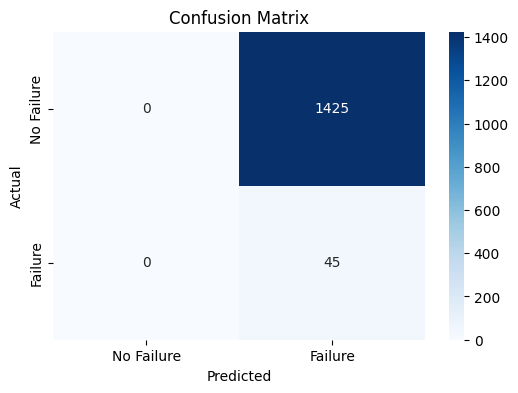

[I 2025-04-01 04:10:39,161] A new study created in memory with name: optuna



Final Test Score (Average Precision): 0.10322217242876804
Accuracy: 0.0306, Precision: 0.0306, Recall: 1.0000, F1 Score: 0.0594, AUC-ROC: 0.5747
Total Training Time: 7459.30 seconds
Results saved to './modelb/model_performance_real1.csv'

======== Round 2 of 10 ========
[flaml.tune.tune: 04-01 04:10:39] {796} INFO - Number of trials: 1/1500, 1 RUNNING, 0 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 04:10:45] {819} INFO - Brief result: {'val_score': 0.005335469963597593}
[flaml.tune.tune: 04-01 04:10:45] {796} INFO - Number of trials: 2/1500, 1 RUNNING, 1 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[flaml.tune.tune: 04-01 04:10:53] {819} INFO - Brief result: {'val_score': 0.005406048441926233}
[flaml.tune.tune: 04-01 04:10:53] {796} INFO - Number of trials: 3/1500, 1 RUNNING, 2 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.9s
[flaml.tune.tune: 04-01 04:11:02] {819} INFO - Brief result: {'val_score': 0.006437472157748243}
[flaml.tune.tune: 04-01 04:11:02] {796} INFO - Number of trials: 4/1500, 1 RUNNING, 3 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[flaml.tune.tune: 04-01 04:11:13] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:11:13] {796} INFO - Number of trials: 5/1500, 1 RUNNING, 4 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[flaml.tune.tune: 04-01 04:11:21] {819} INFO - Brief result: {'val_score': 0.004101861669184884}
[flaml.tune.tune: 04-01 04:11:21] {796} INFO - Number of trials: 6/1500, 1 RUNNING, 5 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:11:24] {819} INFO - Brief result: {'val_score': 0.0034383929744072907}
[flaml.tune.tune: 04-01 04:11:24] {796} INFO - Number of trials: 7/1500, 1 RUNNING, 6 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:11:26] {819} INFO - Brief result: {'val_score': 0.006543658666146196}
[flaml.tune.tune: 04-01 04:11:26] {796} INFO - Number of trials: 8/1500, 1 RUNNING, 7 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:11:29] {819} INFO - Brief result: {'val_score': 0.005768654236518643}
[flaml.tune.tune: 04-01 04:11:29] {796} INFO - Number of trials: 9/1500, 1 RUNNING, 8 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:11:32] {819} INFO - Brief result: {'val_score': 0.0065358848322148635}
[flaml.tune.tune: 04-01 04:11:32] {796} INFO - Number of trials: 10/1500, 1 RUNNING, 9 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:11:34] {819} INFO - Brief result: {'val_score': 0.008742189485497763}
[flaml.tune.tune: 04-01 04:11:34] {796} INFO - Number of trials: 11/1500, 1 RUNNING, 10 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 04:11:38] {819} INFO - Brief result: {'val_score': 0.005712213175269699}
[flaml.tune.tune: 04-01 04:11:38] {796} INFO - Number of trials: 12/1500, 1 RUNNING, 11 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 04:11:42] {819} INFO - Brief result: {'val_score': 0.006889044783528005}
[flaml.tune.tune: 04-01 04:11:42] {796} INFO - Number of trials: 13/1500, 1 RUNNING, 12 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 04:11:48] {819} INFO - Brief result: {'val_score': 0.010796589361727896}
[flaml.tune.tune: 04-01 04:11:48] {796} INFO - Number of trials: 14/1500, 1 RUNNING, 13 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 04:11:51] {819} INFO - Brief result: {'val_score': 0.004609216397906916}
[flaml.tune.tune: 04-01 04:11:51] {796} INFO - Number of trials: 15/1500, 1 RUNNING, 14 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 04:11:58] {819} INFO - Brief result: {'val_score': 0.005283433323685957}
[flaml.tune.tune: 04-01 04:11:58] {796} INFO - Number of trials: 16/1500, 1 RUNNING, 15 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:12:01] {819} INFO - Brief result: {'val_score': 0.00904072619123267}
[flaml.tune.tune: 04-01 04:12:01] {796} INFO - Number of trials: 17/1500, 1 RUNNING, 16 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 04:12:05] {819} INFO - Brief result: {'val_score': 0.012038347309542213}
[flaml.tune.tune: 04-01 04:12:05] {796} INFO - Number of trials: 18/1500, 1 RUNNING, 17 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.3s
[flaml.tune.tune: 04-01 04:12:15] {819} INFO - Brief result: {'val_score': 0.00879217206551908}
[flaml.tune.tune: 04-01 04:12:15] {796} INFO - Number of trials: 19/1500, 1 RUNNING, 18 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 04:12:21] {819} INFO - Brief result: {'val_score': 0.0023057908028197645}
[flaml.tune.tune: 04-01 04:12:21] {796} INFO - Number of trials: 20/1500, 1 RUNNING, 19 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 04:12:28] {819} INFO - Brief result: {'val_score': 0.002734159879917951}
[flaml.tune.tune: 04-01 04:12:28] {796} INFO - Number of trials: 21/1500, 1 RUNNING, 20 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 04:12:34] {819} INFO - Brief result: {'val_score': 0.007261535665971451}
[flaml.tune.tune: 04-01 04:12:34] {796} INFO - Number of trials: 22/1500, 1 RUNNING, 21 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 04:12:40] {819} INFO - Brief result: {'val_score': 0.007538668535555709}
[flaml.tune.tune: 04-01 04:12:40] {796} INFO - Number of trials: 23/1500, 1 RUNNING, 22 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:12:44] {819} INFO - Brief result: {'val_score': 0.0028510408107018997}
[flaml.tune.tune: 04-01 04:12:44] {796} INFO - Number of trials: 24/1500, 1 RUNNING, 23 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 04:12:49] {819} INFO - Brief result: {'val_score': 0.0033512832459743507}
[flaml.tune.tune: 04-01 04:12:49] {796} INFO - Number of trials: 25/1500, 1 RUNNING, 24 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 04:12:53] {819} INFO - Brief result: {'val_score': 0.006006717149670172}
[flaml.tune.tune: 04-01 04:12:53] {796} INFO - Number of trials: 26/1500, 1 RUNNING, 25 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 04:13:00] {819} INFO - Brief result: {'val_score': 0.007214446618269206}
[flaml.tune.tune: 04-01 04:13:00] {796} INFO - Number of trials: 27/1500, 1 RUNNING, 26 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 04:13:04] {819} INFO - Brief result: {'val_score': 0.002486601002181939}
[flaml.tune.tune: 04-01 04:13:04] {796} INFO - Number of trials: 28/1500, 1 RUNNING, 27 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:13:08] {819} INFO - Brief result: {'val_score': 0.011292805817583284}
[flaml.tune.tune: 04-01 04:13:08] {796} INFO - Number of trials: 29/1500, 1 RUNNING, 28 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 04:13:14] {819} INFO - Brief result: {'val_score': 0.009224188818781016}
[flaml.tune.tune: 04-01 04:13:14] {796} INFO - Number of trials: 30/1500, 1 RUNNING, 29 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 04:13:18] {819} INFO - Brief result: {'val_score': 0.002895519770457254}
[flaml.tune.tune: 04-01 04:13:18] {796} INFO - Number of trials: 31/1500, 1 RUNNING, 30 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 04:13:22] {819} INFO - Brief result: {'val_score': 0.007541244003890122}
[flaml.tune.tune: 04-01 04:13:22] {796} INFO - Number of trials: 32/1500, 1 RUNNING, 31 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:13:26] {819} INFO - Brief result: {'val_score': 0.016114163002086408}
[flaml.tune.tune: 04-01 04:13:26] {796} INFO - Number of trials: 33/1500, 1 RUNNING, 32 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:13:30] {819} INFO - Brief result: {'val_score': 0.012038347309542213}
[flaml.tune.tune: 04-01 04:13:30] {796} INFO - Number of trials: 34/1500, 1 RUNNING, 33 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:13:32] {819} INFO - Brief result: {'val_score': 0.0037279241141576053}
[flaml.tune.tune: 04-01 04:13:32] {796} INFO - Number of trials: 35/1500, 1 RUNNING, 34 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 04:13:34] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:13:34] {796} INFO - Number of trials: 36/1500, 1 RUNNING, 35 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:13:37] {819} INFO - Brief result: {'val_score': 0.004109989225940991}
[flaml.tune.tune: 04-01 04:13:37] {796} INFO - Number of trials: 37/1500, 1 RUNNING, 36 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 04:13:39] {819} INFO - Brief result: {'val_score': 0.001937657588404763}
[flaml.tune.tune: 04-01 04:13:39] {796} INFO - Number of trials: 38/1500, 1 RUNNING, 37 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 04:13:41] {819} INFO - Brief result: {'val_score': 0.006938332698436495}
[flaml.tune.tune: 04-01 04:13:41] {796} INFO - Number of trials: 39/1500, 1 RUNNING, 38 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 04:13:43] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:13:43] {796} INFO - Number of trials: 40/1500, 1 RUNNING, 39 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.4s
[flaml.tune.tune: 04-01 04:13:44] {819} INFO - Brief result: {'val_score': 0.003094034014327905}
[flaml.tune.tune: 04-01 04:13:44] {796} INFO - Number of trials: 41/1500, 1 RUNNING, 40 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 04:13:50] {819} INFO - Brief result: {'val_score': 0.004474913339394694}
[flaml.tune.tune: 04-01 04:13:50] {796} INFO - Number of trials: 42/1500, 1 RUNNING, 41 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:13:53] {819} INFO - Brief result: {'val_score': 0.007452642199396059}
[flaml.tune.tune: 04-01 04:13:53] {796} INFO - Number of trials: 43/1500, 1 RUNNING, 42 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 04:13:55] {819} INFO - Brief result: {'val_score': 0.0031732671001927664}
[flaml.tune.tune: 04-01 04:13:55] {796} INFO - Number of trials: 44/1500, 1 RUNNING, 43 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[flaml.tune.tune: 04-01 04:13:56] {819} INFO - Brief result: {'val_score': 0.0019763513801739673}
[flaml.tune.tune: 04-01 04:13:56] {796} INFO - Number of trials: 45/1500, 1 RUNNING, 44 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 04:14:01] {819} INFO - Brief result: {'val_score': 0.0033227510846573598}
[flaml.tune.tune: 04-01 04:14:01] {796} INFO - Number of trials: 46/1500, 1 RUNNING, 45 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.4s
[flaml.tune.tune: 04-01 04:14:02] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:14:02] {796} INFO - Number of trials: 47/1500, 1 RUNNING, 46 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:14:05] {819} INFO - Brief result: {'val_score': 0.005596865513576117}
[flaml.tune.tune: 04-01 04:14:05] {796} INFO - Number of trials: 48/1500, 1 RUNNING, 47 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 04:14:09] {819} INFO - Brief result: {'val_score': 0.005116501487513305}
[flaml.tune.tune: 04-01 04:14:09] {796} INFO - Number of trials: 49/1500, 1 RUNNING, 48 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:14:12] {819} INFO - Brief result: {'val_score': 0.013643041840323722}
[flaml.tune.tune: 04-01 04:14:12] {796} INFO - Number of trials: 50/1500, 1 RUNNING, 49 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 04:14:14] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:14:14] {796} INFO - Number of trials: 51/1500, 1 RUNNING, 50 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:14:17] {819} INFO - Brief result: {'val_score': 0.0057452622421275855}
[flaml.tune.tune: 04-01 04:14:17] {796} INFO - Number of trials: 52/1500, 1 RUNNING, 51 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 04:14:20] {819} INFO - Brief result: {'val_score': 0.007334119748060255}
[flaml.tune.tune: 04-01 04:14:20] {796} INFO - Number of trials: 53/1500, 1 RUNNING, 52 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:14:22] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:14:22] {796} INFO - Number of trials: 54/1500, 1 RUNNING, 53 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:14:24] {819} INFO - Brief result: {'val_score': 0.003772180590816606}
[flaml.tune.tune: 04-01 04:14:24] {796} INFO - Number of trials: 55/1500, 1 RUNNING, 54 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:14:28] {819} INFO - Brief result: {'val_score': 0.008566762422244193}
[flaml.tune.tune: 04-01 04:14:28] {796} INFO - Number of trials: 56/1500, 1 RUNNING, 55 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:14:31] {819} INFO - Brief result: {'val_score': 0.005531879707859935}
[flaml.tune.tune: 04-01 04:14:31] {796} INFO - Number of trials: 57/1500, 1 RUNNING, 56 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:14:33] {819} INFO - Brief result: {'val_score': 0.002012622098658701}
[flaml.tune.tune: 04-01 04:14:33] {796} INFO - Number of trials: 58/1500, 1 RUNNING, 57 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 04:14:38] {819} INFO - Brief result: {'val_score': 0.007180478735412665}
[flaml.tune.tune: 04-01 04:14:38] {796} INFO - Number of trials: 59/1500, 1 RUNNING, 58 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.2s
[flaml.tune.tune: 04-01 04:14:39] {819} INFO - Brief result: {'val_score': 0.0024576054138843303}
[flaml.tune.tune: 04-01 04:14:39] {796} INFO - Number of trials: 60/1500, 1 RUNNING, 59 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:14:41] {819} INFO - Brief result: {'val_score': 0.004700632032036147}
[flaml.tune.tune: 04-01 04:14:41] {796} INFO - Number of trials: 61/1500, 1 RUNNING, 60 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:14:44] {819} INFO - Brief result: {'val_score': 0.004582001109202767}
[flaml.tune.tune: 04-01 04:14:44] {796} INFO - Number of trials: 62/1500, 1 RUNNING, 61 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.4s
[flaml.tune.tune: 04-01 04:14:53] {819} INFO - Brief result: {'val_score': 0.007208312290551515}
[flaml.tune.tune: 04-01 04:14:53] {796} INFO - Number of trials: 63/1500, 1 RUNNING, 62 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.9s
[flaml.tune.tune: 04-01 04:15:06] {819} INFO - Brief result: {'val_score': 0.00511096804603367}
[flaml.tune.tune: 04-01 04:15:06] {796} INFO - Number of trials: 64/1500, 1 RUNNING, 63 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.2s
[flaml.tune.tune: 04-01 04:15:15] {819} INFO - Brief result: {'val_score': 0.00874294036283981}
[flaml.tune.tune: 04-01 04:15:15] {796} INFO - Number of trials: 65/1500, 1 RUNNING, 64 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[flaml.tune.tune: 04-01 04:15:24] {819} INFO - Brief result: {'val_score': 0.00589249297860729}
[flaml.tune.tune: 04-01 04:15:24] {796} INFO - Number of trials: 66/1500, 1 RUNNING, 65 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 04:15:28] {819} INFO - Brief result: {'val_score': 0.004317995960286329}
[flaml.tune.tune: 04-01 04:15:28] {796} INFO - Number of trials: 67/1500, 1 RUNNING, 66 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 04:15:32] {819} INFO - Brief result: {'val_score': 0.004924056093160132}
[flaml.tune.tune: 04-01 04:15:32] {796} INFO - Number of trials: 68/1500, 1 RUNNING, 67 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:15:35] {819} INFO - Brief result: {'val_score': 0.003957421586524939}
[flaml.tune.tune: 04-01 04:15:35] {796} INFO - Number of trials: 69/1500, 1 RUNNING, 68 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[flaml.tune.tune: 04-01 04:15:37] {819} INFO - Brief result: {'val_score': 0.003470966015717425}
[flaml.tune.tune: 04-01 04:15:37] {796} INFO - Number of trials: 70/1500, 1 RUNNING, 69 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 04:15:39] {819} INFO - Brief result: {'val_score': 0.02061454281553967}
[flaml.tune.tune: 04-01 04:15:39] {796} INFO - Number of trials: 71/1500, 1 RUNNING, 70 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:15:41] {819} INFO - Brief result: {'val_score': 0.004362881338261079}
[flaml.tune.tune: 04-01 04:15:41] {796} INFO - Number of trials: 72/1500, 1 RUNNING, 71 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 04:15:43] {819} INFO - Brief result: {'val_score': 0.0020458674154338195}
[flaml.tune.tune: 04-01 04:15:43] {796} INFO - Number of trials: 73/1500, 1 RUNNING, 72 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:15:46] {819} INFO - Brief result: {'val_score': 0.01076001882666798}
[flaml.tune.tune: 04-01 04:15:46] {796} INFO - Number of trials: 74/1500, 1 RUNNING, 73 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:15:49] {819} INFO - Brief result: {'val_score': 0.007753878981960402}
[flaml.tune.tune: 04-01 04:15:49] {796} INFO - Number of trials: 75/1500, 1 RUNNING, 74 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 04:15:54] {819} INFO - Brief result: {'val_score': 0.005287003625608784}
[flaml.tune.tune: 04-01 04:15:54] {796} INFO - Number of trials: 76/1500, 1 RUNNING, 75 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:15:57] {819} INFO - Brief result: {'val_score': 0.0019940932214082075}
[flaml.tune.tune: 04-01 04:15:57] {796} INFO - Number of trials: 77/1500, 1 RUNNING, 76 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 04:16:02] {819} INFO - Brief result: {'val_score': 0.005806806388167569}
[flaml.tune.tune: 04-01 04:16:02] {796} INFO - Number of trials: 78/1500, 1 RUNNING, 77 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:16:06] {819} INFO - Brief result: {'val_score': 0.005819278347475648}
[flaml.tune.tune: 04-01 04:16:06] {796} INFO - Number of trials: 79/1500, 1 RUNNING, 78 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:16:08] {819} INFO - Brief result: {'val_score': 0.018278908174935878}
[flaml.tune.tune: 04-01 04:16:08] {796} INFO - Number of trials: 80/1500, 1 RUNNING, 79 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:16:11] {819} INFO - Brief result: {'val_score': 0.0031033933350724176}
[flaml.tune.tune: 04-01 04:16:11] {796} INFO - Number of trials: 81/1500, 1 RUNNING, 80 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:16:14] {819} INFO - Brief result: {'val_score': 0.01516695574455545}
[flaml.tune.tune: 04-01 04:16:14] {796} INFO - Number of trials: 82/1500, 1 RUNNING, 81 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   18.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   18.1s
[flaml.tune.tune: 04-01 04:16:33] {819} INFO - Brief result: {'val_score': 0.004312658967923179}
[flaml.tune.tune: 04-01 04:16:33] {796} INFO - Number of trials: 83/1500, 1 RUNNING, 82 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:16:36] {819} INFO - Brief result: {'val_score': 0.017514395529381978}
[flaml.tune.tune: 04-01 04:16:36] {796} INFO - Number of trials: 84/1500, 1 RUNNING, 83 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:16:40] {819} INFO - Brief result: {'val_score': 0.013459372248249824}
[flaml.tune.tune: 04-01 04:16:40] {796} INFO - Number of trials: 85/1500, 1 RUNNING, 84 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 04:16:44] {819} INFO - Brief result: {'val_score': 0.001830632642992263}
[flaml.tune.tune: 04-01 04:16:44] {796} INFO - Number of trials: 86/1500, 1 RUNNING, 85 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 04:16:46] {819} INFO - Brief result: {'val_score': 0.008317933022916063}
[flaml.tune.tune: 04-01 04:16:46] {796} INFO - Number of trials: 87/1500, 1 RUNNING, 86 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:16:49] {819} INFO - Brief result: {'val_score': 0.016122643339934302}
[flaml.tune.tune: 04-01 04:16:49] {796} INFO - Number of trials: 88/1500, 1 RUNNING, 87 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:16:51] {819} INFO - Brief result: {'val_score': 0.009635278263073938}
[flaml.tune.tune: 04-01 04:16:51] {796} INFO - Number of trials: 89/1500, 1 RUNNING, 88 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[flaml.tune.tune: 04-01 04:16:59] {819} INFO - Brief result: {'val_score': 0.006447469049707212}
[flaml.tune.tune: 04-01 04:16:59] {796} INFO - Number of trials: 90/1500, 1 RUNNING, 89 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:17:02] {819} INFO - Brief result: {'val_score': 0.0017978988090440295}
[flaml.tune.tune: 04-01 04:17:02] {796} INFO - Number of trials: 91/1500, 1 RUNNING, 90 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:17:04] {819} INFO - Brief result: {'val_score': 0.007613404466347275}
[flaml.tune.tune: 04-01 04:17:04] {796} INFO - Number of trials: 92/1500, 1 RUNNING, 91 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:17:07] {819} INFO - Brief result: {'val_score': 0.01256644540622819}
[flaml.tune.tune: 04-01 04:17:07] {796} INFO - Number of trials: 93/1500, 1 RUNNING, 92 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:17:09] {819} INFO - Brief result: {'val_score': 0.002429931957645481}
[flaml.tune.tune: 04-01 04:17:09] {796} INFO - Number of trials: 94/1500, 1 RUNNING, 93 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:17:11] {819} INFO - Brief result: {'val_score': 0.010326586133351506}
[flaml.tune.tune: 04-01 04:17:11] {796} INFO - Number of trials: 95/1500, 1 RUNNING, 94 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 04:17:13] {819} INFO - Brief result: {'val_score': 0.004982324717835455}
[flaml.tune.tune: 04-01 04:17:13] {796} INFO - Number of trials: 96/1500, 1 RUNNING, 95 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 04:17:17] {819} INFO - Brief result: {'val_score': 0.005781549654590016}
[flaml.tune.tune: 04-01 04:17:17] {796} INFO - Number of trials: 97/1500, 1 RUNNING, 96 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 04:17:22] {819} INFO - Brief result: {'val_score': 0.02123972534653002}
[flaml.tune.tune: 04-01 04:17:22] {796} INFO - Number of trials: 98/1500, 1 RUNNING, 97 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:17:24] {819} INFO - Brief result: {'val_score': 0.02228009374920919}
[flaml.tune.tune: 04-01 04:17:24] {796} INFO - Number of trials: 99/1500, 1 RUNNING, 98 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 04:17:26] {819} INFO - Brief result: {'val_score': 0.02123972534653002}
[flaml.tune.tune: 04-01 04:17:26] {796} INFO - Number of trials: 100/1500, 1 RUNNING, 99 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:17:28] {819} INFO - Brief result: {'val_score': 0.0065569438316481115}
[flaml.tune.tune: 04-01 04:17:28] {796} INFO - Number of trials: 101/1500, 1 RUNNING, 100 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 04:17:30] {819} INFO - Brief result: {'val_score': 0.0024527568500221303}
[flaml.tune.tune: 04-01 04:17:30] {796} INFO - Number of trials: 102/1500, 1 RUNNING, 101 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 04:17:32] {819} INFO - Brief result: {'val_score': 0.009879191214207656}
[flaml.tune.tune: 04-01 04:17:32] {796} INFO - Number of trials: 103/1500, 1 RUNNING, 102 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:17:35] {819} INFO - Brief result: {'val_score': 0.007604601903831926}
[flaml.tune.tune: 04-01 04:17:35] {796} INFO - Number of trials: 104/1500, 1 RUNNING, 103 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 04:17:37] {819} INFO - Brief result: {'val_score': 0.00799818362505592}
[flaml.tune.tune: 04-01 04:17:37] {796} INFO - Number of trials: 105/1500, 1 RUNNING, 104 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 04:17:39] {819} INFO - Brief result: {'val_score': 0.006510440554142091}
[flaml.tune.tune: 04-01 04:17:39] {796} INFO - Number of trials: 106/1500, 1 RUNNING, 105 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:17:41] {819} INFO - Brief result: {'val_score': 0.008856623933284345}
[flaml.tune.tune: 04-01 04:17:41] {796} INFO - Number of trials: 107/1500, 1 RUNNING, 106 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:17:43] {819} INFO - Brief result: {'val_score': 0.013590086980925611}
[flaml.tune.tune: 04-01 04:17:43] {796} INFO - Number of trials: 108/1500, 1 RUNNING, 107 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:17:46] {819} INFO - Brief result: {'val_score': 0.028298827715564967}
[flaml.tune.tune: 04-01 04:17:46] {796} INFO - Number of trials: 109/1500, 1 RUNNING, 108 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:17:49] {819} INFO - Brief result: {'val_score': 0.005606846630271507}
[flaml.tune.tune: 04-01 04:17:49] {796} INFO - Number of trials: 110/1500, 1 RUNNING, 109 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 04:17:54] {819} INFO - Brief result: {'val_score': 0.005713973028894607}
[flaml.tune.tune: 04-01 04:17:54] {796} INFO - Number of trials: 111/1500, 1 RUNNING, 110 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:17:57] {819} INFO - Brief result: {'val_score': 0.006913460832792613}
[flaml.tune.tune: 04-01 04:17:57] {796} INFO - Number of trials: 112/1500, 1 RUNNING, 111 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:18:00] {819} INFO - Brief result: {'val_score': 0.021292140626203212}
[flaml.tune.tune: 04-01 04:18:00] {796} INFO - Number of trials: 113/1500, 1 RUNNING, 112 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:18:03] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:18:03] {796} INFO - Number of trials: 114/1500, 1 RUNNING, 113 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 04:18:04] {819} INFO - Brief result: {'val_score': 0.009926697520779642}
[flaml.tune.tune: 04-01 04:18:04] {796} INFO - Number of trials: 115/1500, 1 RUNNING, 114 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 04:18:09] {819} INFO - Brief result: {'val_score': 0.006142223528023657}
[flaml.tune.tune: 04-01 04:18:09] {796} INFO - Number of trials: 116/1500, 1 RUNNING, 115 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 04:18:13] {819} INFO - Brief result: {'val_score': 0.0031539479527578295}
[flaml.tune.tune: 04-01 04:18:13] {796} INFO - Number of trials: 117/1500, 1 RUNNING, 116 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:18:16] {819} INFO - Brief result: {'val_score': 0.006983087894268587}
[flaml.tune.tune: 04-01 04:18:16] {796} INFO - Number of trials: 118/1500, 1 RUNNING, 117 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 04:18:19] {819} INFO - Brief result: {'val_score': 0.022843832104464182}
[flaml.tune.tune: 04-01 04:18:19] {796} INFO - Number of trials: 119/1500, 1 RUNNING, 118 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:18:23] {819} INFO - Brief result: {'val_score': 0.003605137891134804}
[flaml.tune.tune: 04-01 04:18:23] {796} INFO - Number of trials: 120/1500, 1 RUNNING, 119 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:18:25] {819} INFO - Brief result: {'val_score': 0.0028819939662174366}
[flaml.tune.tune: 04-01 04:18:25] {796} INFO - Number of trials: 121/1500, 1 RUNNING, 120 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:18:28] {819} INFO - Brief result: {'val_score': 0.012582917203072235}
[flaml.tune.tune: 04-01 04:18:28] {796} INFO - Number of trials: 122/1500, 1 RUNNING, 121 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 04:18:32] {819} INFO - Brief result: {'val_score': 0.00842236656919701}
[flaml.tune.tune: 04-01 04:18:32] {796} INFO - Number of trials: 123/1500, 1 RUNNING, 122 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:18:35] {819} INFO - Brief result: {'val_score': 0.027480586760988624}
[flaml.tune.tune: 04-01 04:18:35] {796} INFO - Number of trials: 124/1500, 1 RUNNING, 123 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 04:18:40] {819} INFO - Brief result: {'val_score': 0.0047304933882585274}
[flaml.tune.tune: 04-01 04:18:40] {796} INFO - Number of trials: 125/1500, 1 RUNNING, 124 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:18:42] {819} INFO - Brief result: {'val_score': 0.0021994316032541905}
[flaml.tune.tune: 04-01 04:18:42] {796} INFO - Number of trials: 126/1500, 1 RUNNING, 125 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:18:45] {819} INFO - Brief result: {'val_score': 0.018258810607296106}
[flaml.tune.tune: 04-01 04:18:45] {796} INFO - Number of trials: 127/1500, 1 RUNNING, 126 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:18:47] {819} INFO - Brief result: {'val_score': 0.005340342382827989}
[flaml.tune.tune: 04-01 04:18:47] {796} INFO - Number of trials: 128/1500, 1 RUNNING, 127 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 04:18:52] {819} INFO - Brief result: {'val_score': 0.010535216105853075}
[flaml.tune.tune: 04-01 04:18:52] {796} INFO - Number of trials: 129/1500, 1 RUNNING, 128 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:18:54] {819} INFO - Brief result: {'val_score': 0.0034384530589660492}
[flaml.tune.tune: 04-01 04:18:54] {796} INFO - Number of trials: 130/1500, 1 RUNNING, 129 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 04:18:59] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:18:59] {796} INFO - Number of trials: 131/1500, 1 RUNNING, 130 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:19:02] {819} INFO - Brief result: {'val_score': 0.005042325302694343}
[flaml.tune.tune: 04-01 04:19:02] {796} INFO - Number of trials: 132/1500, 1 RUNNING, 131 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 04:19:06] {819} INFO - Brief result: {'val_score': 0.003859149575061123}
[flaml.tune.tune: 04-01 04:19:06] {796} INFO - Number of trials: 133/1500, 1 RUNNING, 132 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 04:19:09] {819} INFO - Brief result: {'val_score': 0.019205475358766773}
[flaml.tune.tune: 04-01 04:19:09] {796} INFO - Number of trials: 134/1500, 1 RUNNING, 133 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:19:12] {819} INFO - Brief result: {'val_score': 0.012296872468182101}
[flaml.tune.tune: 04-01 04:19:12] {796} INFO - Number of trials: 135/1500, 1 RUNNING, 134 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 04:19:17] {819} INFO - Brief result: {'val_score': 0.010165673786871941}
[flaml.tune.tune: 04-01 04:19:17] {796} INFO - Number of trials: 136/1500, 1 RUNNING, 135 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 04:19:21] {819} INFO - Brief result: {'val_score': 0.00823087350298959}
[flaml.tune.tune: 04-01 04:19:21] {796} INFO - Number of trials: 137/1500, 1 RUNNING, 136 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 04:19:26] {819} INFO - Brief result: {'val_score': 0.010296571845790768}
[flaml.tune.tune: 04-01 04:19:26] {796} INFO - Number of trials: 138/1500, 1 RUNNING, 137 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 04:19:28] {819} INFO - Brief result: {'val_score': 0.0025763222553742003}
[flaml.tune.tune: 04-01 04:19:28] {796} INFO - Number of trials: 139/1500, 1 RUNNING, 138 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 04:19:32] {819} INFO - Brief result: {'val_score': 0.00841620989655374}
[flaml.tune.tune: 04-01 04:19:32] {796} INFO - Number of trials: 140/1500, 1 RUNNING, 139 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 04:19:38] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:19:38] {796} INFO - Number of trials: 141/1500, 1 RUNNING, 140 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:19:41] {819} INFO - Brief result: {'val_score': 0.01868382585959192}
[flaml.tune.tune: 04-01 04:19:41] {796} INFO - Number of trials: 142/1500, 1 RUNNING, 141 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:19:44] {819} INFO - Brief result: {'val_score': 0.0021726505799064518}
[flaml.tune.tune: 04-01 04:19:44] {796} INFO - Number of trials: 143/1500, 1 RUNNING, 142 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:19:47] {819} INFO - Brief result: {'val_score': 0.013777270693145544}
[flaml.tune.tune: 04-01 04:19:47] {796} INFO - Number of trials: 144/1500, 1 RUNNING, 143 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[flaml.tune.tune: 04-01 04:19:49] {819} INFO - Brief result: {'val_score': 0.022946642586650395}
[flaml.tune.tune: 04-01 04:19:49] {796} INFO - Number of trials: 145/1500, 1 RUNNING, 144 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.3s
[flaml.tune.tune: 04-01 04:19:58] {819} INFO - Brief result: {'val_score': 0.0066506864933996625}
[flaml.tune.tune: 04-01 04:19:58] {796} INFO - Number of trials: 146/1500, 1 RUNNING, 145 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.3s
[flaml.tune.tune: 04-01 04:20:07] {819} INFO - Brief result: {'val_score': 0.010298098784767807}
[flaml.tune.tune: 04-01 04:20:07] {796} INFO - Number of trials: 147/1500, 1 RUNNING, 146 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:20:10] {819} INFO - Brief result: {'val_score': 0.014877035915529612}
[flaml.tune.tune: 04-01 04:20:10] {796} INFO - Number of trials: 148/1500, 1 RUNNING, 147 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:20:13] {819} INFO - Brief result: {'val_score': 0.015944820342085626}
[flaml.tune.tune: 04-01 04:20:13] {796} INFO - Number of trials: 149/1500, 1 RUNNING, 148 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:20:16] {819} INFO - Brief result: {'val_score': 0.00437532479057868}
[flaml.tune.tune: 04-01 04:20:16] {796} INFO - Number of trials: 150/1500, 1 RUNNING, 149 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:20:18] {819} INFO - Brief result: {'val_score': 0.009926675454812132}
[flaml.tune.tune: 04-01 04:20:18] {796} INFO - Number of trials: 151/1500, 1 RUNNING, 150 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[flaml.tune.tune: 04-01 04:20:25] {819} INFO - Brief result: {'val_score': 0.00455807797713232}
[flaml.tune.tune: 04-01 04:20:25] {796} INFO - Number of trials: 152/1500, 1 RUNNING, 151 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:20:28] {819} INFO - Brief result: {'val_score': 0.00646209979442502}
[flaml.tune.tune: 04-01 04:20:28] {796} INFO - Number of trials: 153/1500, 1 RUNNING, 152 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[flaml.tune.tune: 04-01 04:20:36] {819} INFO - Brief result: {'val_score': 0.003926554209097611}
[flaml.tune.tune: 04-01 04:20:36] {796} INFO - Number of trials: 154/1500, 1 RUNNING, 153 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:20:39] {819} INFO - Brief result: {'val_score': 0.008437859643881034}
[flaml.tune.tune: 04-01 04:20:39] {796} INFO - Number of trials: 155/1500, 1 RUNNING, 154 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:20:42] {819} INFO - Brief result: {'val_score': 0.011659106056371337}
[flaml.tune.tune: 04-01 04:20:42] {796} INFO - Number of trials: 156/1500, 1 RUNNING, 155 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:20:44] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:20:44] {796} INFO - Number of trials: 157/1500, 1 RUNNING, 156 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 04:20:49] {819} INFO - Brief result: {'val_score': 0.005811609186703724}
[flaml.tune.tune: 04-01 04:20:49] {796} INFO - Number of trials: 158/1500, 1 RUNNING, 157 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[flaml.tune.tune: 04-01 04:20:56] {819} INFO - Brief result: {'val_score': 0.004029257686768807}
[flaml.tune.tune: 04-01 04:20:56] {796} INFO - Number of trials: 159/1500, 1 RUNNING, 158 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 04:21:01] {819} INFO - Brief result: {'val_score': 0.015805098810627652}
[flaml.tune.tune: 04-01 04:21:01] {796} INFO - Number of trials: 160/1500, 1 RUNNING, 159 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 04:21:03] {819} INFO - Brief result: {'val_score': 0.03588041146379179}
[flaml.tune.tune: 04-01 04:21:03] {796} INFO - Number of trials: 161/1500, 1 RUNNING, 160 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:21:06] {819} INFO - Brief result: {'val_score': 0.004056266928325401}
[flaml.tune.tune: 04-01 04:21:06] {796} INFO - Number of trials: 162/1500, 1 RUNNING, 161 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 04:21:12] {819} INFO - Brief result: {'val_score': 0.008243833862604024}
[flaml.tune.tune: 04-01 04:21:12] {796} INFO - Number of trials: 163/1500, 1 RUNNING, 162 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.2s
[flaml.tune.tune: 04-01 04:21:13] {819} INFO - Brief result: {'val_score': 0.00422764064219954}
[flaml.tune.tune: 04-01 04:21:13] {796} INFO - Number of trials: 164/1500, 1 RUNNING, 163 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:21:16] {819} INFO - Brief result: {'val_score': 0.023387436657214454}
[flaml.tune.tune: 04-01 04:21:16] {796} INFO - Number of trials: 165/1500, 1 RUNNING, 164 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 04:21:19] {819} INFO - Brief result: {'val_score': 0.004122485460885547}
[flaml.tune.tune: 04-01 04:21:19] {796} INFO - Number of trials: 166/1500, 1 RUNNING, 165 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:21:23] {819} INFO - Brief result: {'val_score': 0.00625380849292827}
[flaml.tune.tune: 04-01 04:21:23] {796} INFO - Number of trials: 167/1500, 1 RUNNING, 166 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[flaml.tune.tune: 04-01 04:21:32] {819} INFO - Brief result: {'val_score': 0.005532738921094777}
[flaml.tune.tune: 04-01 04:21:32] {796} INFO - Number of trials: 168/1500, 1 RUNNING, 167 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:21:34] {819} INFO - Brief result: {'val_score': 0.00548506537555654}
[flaml.tune.tune: 04-01 04:21:34] {796} INFO - Number of trials: 169/1500, 1 RUNNING, 168 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 04:21:37] {819} INFO - Brief result: {'val_score': 0.009886807408720222}
[flaml.tune.tune: 04-01 04:21:37] {796} INFO - Number of trials: 170/1500, 1 RUNNING, 169 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 04:21:39] {819} INFO - Brief result: {'val_score': 0.02850367944271486}
[flaml.tune.tune: 04-01 04:21:39] {796} INFO - Number of trials: 171/1500, 1 RUNNING, 170 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:21:43] {819} INFO - Brief result: {'val_score': 0.004797906930809233}
[flaml.tune.tune: 04-01 04:21:43] {796} INFO - Number of trials: 172/1500, 1 RUNNING, 171 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:21:46] {819} INFO - Brief result: {'val_score': 0.003658797893966678}
[flaml.tune.tune: 04-01 04:21:46] {796} INFO - Number of trials: 173/1500, 1 RUNNING, 172 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 04:21:48] {819} INFO - Brief result: {'val_score': 0.02453774046336568}
[flaml.tune.tune: 04-01 04:21:48] {796} INFO - Number of trials: 174/1500, 1 RUNNING, 173 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 04:21:50] {819} INFO - Brief result: {'val_score': 0.02377615403145862}
[flaml.tune.tune: 04-01 04:21:50] {796} INFO - Number of trials: 175/1500, 1 RUNNING, 174 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 04:21:53] {819} INFO - Brief result: {'val_score': 0.018325772723038005}
[flaml.tune.tune: 04-01 04:21:53] {796} INFO - Number of trials: 176/1500, 1 RUNNING, 175 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[flaml.tune.tune: 04-01 04:21:54] {819} INFO - Brief result: {'val_score': 0.0054660190657099894}
[flaml.tune.tune: 04-01 04:21:54] {796} INFO - Number of trials: 177/1500, 1 RUNNING, 176 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:21:58] {819} INFO - Brief result: {'val_score': 0.027759859716404316}
[flaml.tune.tune: 04-01 04:21:58] {796} INFO - Number of trials: 178/1500, 1 RUNNING, 177 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 04:22:00] {819} INFO - Brief result: {'val_score': 0.0066126721546354}
[flaml.tune.tune: 04-01 04:22:00] {796} INFO - Number of trials: 179/1500, 1 RUNNING, 178 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 04:22:06] {819} INFO - Brief result: {'val_score': 0.0040005534195162356}
[flaml.tune.tune: 04-01 04:22:06] {796} INFO - Number of trials: 180/1500, 1 RUNNING, 179 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 04:22:08] {819} INFO - Brief result: {'val_score': 0.01747373524153212}
[flaml.tune.tune: 04-01 04:22:08] {796} INFO - Number of trials: 181/1500, 1 RUNNING, 180 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:22:12] {819} INFO - Brief result: {'val_score': 0.010592694637669865}
[flaml.tune.tune: 04-01 04:22:12] {796} INFO - Number of trials: 182/1500, 1 RUNNING, 181 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:22:14] {819} INFO - Brief result: {'val_score': 0.004982637554761338}
[flaml.tune.tune: 04-01 04:22:14] {796} INFO - Number of trials: 183/1500, 1 RUNNING, 182 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:22:17] {819} INFO - Brief result: {'val_score': 0.014168815203490937}
[flaml.tune.tune: 04-01 04:22:17] {796} INFO - Number of trials: 184/1500, 1 RUNNING, 183 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[flaml.tune.tune: 04-01 04:22:18] {819} INFO - Brief result: {'val_score': 0.017323434983469464}
[flaml.tune.tune: 04-01 04:22:18] {796} INFO - Number of trials: 185/1500, 1 RUNNING, 184 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 04:22:22] {819} INFO - Brief result: {'val_score': 0.052094966315188986}
[flaml.tune.tune: 04-01 04:22:22] {796} INFO - Number of trials: 186/1500, 1 RUNNING, 185 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:22:25] {819} INFO - Brief result: {'val_score': 0.010829139399785378}
[flaml.tune.tune: 04-01 04:22:25] {796} INFO - Number of trials: 187/1500, 1 RUNNING, 186 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 04:22:32] {819} INFO - Brief result: {'val_score': 0.0035421769138880405}
[flaml.tune.tune: 04-01 04:22:32] {796} INFO - Number of trials: 188/1500, 1 RUNNING, 187 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:22:35] {819} INFO - Brief result: {'val_score': 0.006370513820049261}
[flaml.tune.tune: 04-01 04:22:35] {796} INFO - Number of trials: 189/1500, 1 RUNNING, 188 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:22:39] {819} INFO - Brief result: {'val_score': 0.008061772670902786}
[flaml.tune.tune: 04-01 04:22:39] {796} INFO - Number of trials: 190/1500, 1 RUNNING, 189 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 04:22:43] {819} INFO - Brief result: {'val_score': 0.003973711507707242}
[flaml.tune.tune: 04-01 04:22:43] {796} INFO - Number of trials: 191/1500, 1 RUNNING, 190 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:22:46] {819} INFO - Brief result: {'val_score': 0.004613055475736265}
[flaml.tune.tune: 04-01 04:22:46] {796} INFO - Number of trials: 192/1500, 1 RUNNING, 191 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[flaml.tune.tune: 04-01 04:22:54] {819} INFO - Brief result: {'val_score': 0.007541458997547807}
[flaml.tune.tune: 04-01 04:22:54] {796} INFO - Number of trials: 193/1500, 1 RUNNING, 192 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.4s
[flaml.tune.tune: 04-01 04:23:09] {819} INFO - Brief result: {'val_score': 0.004014263681917673}
[flaml.tune.tune: 04-01 04:23:09] {796} INFO - Number of trials: 194/1500, 1 RUNNING, 193 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   23.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   23.4s
[flaml.tune.tune: 04-01 04:23:33] {819} INFO - Brief result: {'val_score': 0.00999243938970467}
[flaml.tune.tune: 04-01 04:23:33] {796} INFO - Number of trials: 195/1500, 1 RUNNING, 194 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:23:35] {819} INFO - Brief result: {'val_score': 0.013314748522962517}
[flaml.tune.tune: 04-01 04:23:35] {796} INFO - Number of trials: 196/1500, 1 RUNNING, 195 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   22.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   22.6s
[flaml.tune.tune: 04-01 04:23:58] {819} INFO - Brief result: {'val_score': 0.0033490837356103726}
[flaml.tune.tune: 04-01 04:23:58] {796} INFO - Number of trials: 197/1500, 1 RUNNING, 196 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 04:24:01] {819} INFO - Brief result: {'val_score': 0.036739331411627066}
[flaml.tune.tune: 04-01 04:24:01] {796} INFO - Number of trials: 198/1500, 1 RUNNING, 197 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:24:04] {819} INFO - Brief result: {'val_score': 0.002629949981450276}
[flaml.tune.tune: 04-01 04:24:04] {796} INFO - Number of trials: 199/1500, 1 RUNNING, 198 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[flaml.tune.tune: 04-01 04:24:12] {819} INFO - Brief result: {'val_score': 0.0030417767427309865}
[flaml.tune.tune: 04-01 04:24:12] {796} INFO - Number of trials: 200/1500, 1 RUNNING, 199 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:24:14] {819} INFO - Brief result: {'val_score': 0.007070503070664244}
[flaml.tune.tune: 04-01 04:24:14] {796} INFO - Number of trials: 201/1500, 1 RUNNING, 200 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 04:24:20] {819} INFO - Brief result: {'val_score': 0.003099460564693961}
[flaml.tune.tune: 04-01 04:24:20] {796} INFO - Number of trials: 202/1500, 1 RUNNING, 201 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 04:24:27] {819} INFO - Brief result: {'val_score': 0.0037968458579584565}
[flaml.tune.tune: 04-01 04:24:27] {796} INFO - Number of trials: 203/1500, 1 RUNNING, 202 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:24:30] {819} INFO - Brief result: {'val_score': 0.012967230476403632}
[flaml.tune.tune: 04-01 04:24:30] {796} INFO - Number of trials: 204/1500, 1 RUNNING, 203 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.5s
[flaml.tune.tune: 04-01 04:24:38] {819} INFO - Brief result: {'val_score': 0.004258002775229862}
[flaml.tune.tune: 04-01 04:24:38] {796} INFO - Number of trials: 205/1500, 1 RUNNING, 204 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:24:41] {819} INFO - Brief result: {'val_score': 0.02955714313071181}
[flaml.tune.tune: 04-01 04:24:41] {796} INFO - Number of trials: 206/1500, 1 RUNNING, 205 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 04:24:46] {819} INFO - Brief result: {'val_score': 0.006813761169658884}
[flaml.tune.tune: 04-01 04:24:46] {796} INFO - Number of trials: 207/1500, 1 RUNNING, 206 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.9s
[flaml.tune.tune: 04-01 04:25:03] {819} INFO - Brief result: {'val_score': 0.017218409264718897}
[flaml.tune.tune: 04-01 04:25:03] {796} INFO - Number of trials: 208/1500, 1 RUNNING, 207 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.9s
[flaml.tune.tune: 04-01 04:25:15] {819} INFO - Brief result: {'val_score': 0.005172566538826753}
[flaml.tune.tune: 04-01 04:25:15] {796} INFO - Number of trials: 209/1500, 1 RUNNING, 208 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:25:17] {819} INFO - Brief result: {'val_score': 0.012610138111943711}
[flaml.tune.tune: 04-01 04:25:17] {796} INFO - Number of trials: 210/1500, 1 RUNNING, 209 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.5s
[flaml.tune.tune: 04-01 04:25:26] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:25:26] {796} INFO - Number of trials: 211/1500, 1 RUNNING, 210 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:25:29] {819} INFO - Brief result: {'val_score': 0.010588546303862748}
[flaml.tune.tune: 04-01 04:25:29] {796} INFO - Number of trials: 212/1500, 1 RUNNING, 211 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 04:25:35] {819} INFO - Brief result: {'val_score': 0.0042232086204739006}
[flaml.tune.tune: 04-01 04:25:35] {796} INFO - Number of trials: 213/1500, 1 RUNNING, 212 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 04:25:41] {819} INFO - Brief result: {'val_score': 0.004087243297467399}
[flaml.tune.tune: 04-01 04:25:41] {796} INFO - Number of trials: 214/1500, 1 RUNNING, 213 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[flaml.tune.tune: 04-01 04:25:47] {819} INFO - Brief result: {'val_score': 0.007060999565726693}
[flaml.tune.tune: 04-01 04:25:47] {796} INFO - Number of trials: 215/1500, 1 RUNNING, 214 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:25:50] {819} INFO - Brief result: {'val_score': 0.013475570810746653}
[flaml.tune.tune: 04-01 04:25:50] {796} INFO - Number of trials: 216/1500, 1 RUNNING, 215 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 04:25:57] {819} INFO - Brief result: {'val_score': 0.010551465097774732}
[flaml.tune.tune: 04-01 04:25:57] {796} INFO - Number of trials: 217/1500, 1 RUNNING, 216 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:25:59] {819} INFO - Brief result: {'val_score': 0.0073312664222793785}
[flaml.tune.tune: 04-01 04:25:59] {796} INFO - Number of trials: 218/1500, 1 RUNNING, 217 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:26:02] {819} INFO - Brief result: {'val_score': 0.028258291812475116}
[flaml.tune.tune: 04-01 04:26:02] {796} INFO - Number of trials: 219/1500, 1 RUNNING, 218 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.3s
[flaml.tune.tune: 04-01 04:26:10] {819} INFO - Brief result: {'val_score': 0.004096751138127305}
[flaml.tune.tune: 04-01 04:26:10] {796} INFO - Number of trials: 220/1500, 1 RUNNING, 219 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 04:26:17] {819} INFO - Brief result: {'val_score': 0.007360315117874529}
[flaml.tune.tune: 04-01 04:26:17] {796} INFO - Number of trials: 221/1500, 1 RUNNING, 220 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 04:26:20] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:26:20] {796} INFO - Number of trials: 222/1500, 1 RUNNING, 221 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 04:26:24] {819} INFO - Brief result: {'val_score': 0.00608036339933886}
[flaml.tune.tune: 04-01 04:26:24] {796} INFO - Number of trials: 223/1500, 1 RUNNING, 222 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.5s
[flaml.tune.tune: 04-01 04:26:36] {819} INFO - Brief result: {'val_score': 0.00642846015444523}
[flaml.tune.tune: 04-01 04:26:36] {796} INFO - Number of trials: 224/1500, 1 RUNNING, 223 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 04:26:41] {819} INFO - Brief result: {'val_score': 0.004716913053661914}
[flaml.tune.tune: 04-01 04:26:41] {796} INFO - Number of trials: 225/1500, 1 RUNNING, 224 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 04:26:46] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:26:46] {796} INFO - Number of trials: 226/1500, 1 RUNNING, 225 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:26:48] {819} INFO - Brief result: {'val_score': 0.007432121727653951}
[flaml.tune.tune: 04-01 04:26:48] {796} INFO - Number of trials: 227/1500, 1 RUNNING, 226 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.3s
[flaml.tune.tune: 04-01 04:26:59] {819} INFO - Brief result: {'val_score': 0.005136579254902192}
[flaml.tune.tune: 04-01 04:26:59] {796} INFO - Number of trials: 228/1500, 1 RUNNING, 227 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 04:27:04] {819} INFO - Brief result: {'val_score': 0.0059029815082931305}
[flaml.tune.tune: 04-01 04:27:04] {796} INFO - Number of trials: 229/1500, 1 RUNNING, 228 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:27:07] {819} INFO - Brief result: {'val_score': 0.012945043256368688}
[flaml.tune.tune: 04-01 04:27:07] {796} INFO - Number of trials: 230/1500, 1 RUNNING, 229 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:27:09] {819} INFO - Brief result: {'val_score': 0.008902687944473613}
[flaml.tune.tune: 04-01 04:27:09] {796} INFO - Number of trials: 231/1500, 1 RUNNING, 230 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.6s
[flaml.tune.tune: 04-01 04:27:19] {819} INFO - Brief result: {'val_score': 0.004222043910371584}
[flaml.tune.tune: 04-01 04:27:19] {796} INFO - Number of trials: 232/1500, 1 RUNNING, 231 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 04:27:21] {819} INFO - Brief result: {'val_score': 0.01948537533092452}
[flaml.tune.tune: 04-01 04:27:21] {796} INFO - Number of trials: 233/1500, 1 RUNNING, 232 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[flaml.tune.tune: 04-01 04:27:29] {819} INFO - Brief result: {'val_score': 0.0071240732943338}
[flaml.tune.tune: 04-01 04:27:29] {796} INFO - Number of trials: 234/1500, 1 RUNNING, 233 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 04:27:32] {819} INFO - Brief result: {'val_score': 0.003433401489001596}
[flaml.tune.tune: 04-01 04:27:32] {796} INFO - Number of trials: 235/1500, 1 RUNNING, 234 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:27:36] {819} INFO - Brief result: {'val_score': 0.0028934589639482175}
[flaml.tune.tune: 04-01 04:27:36] {796} INFO - Number of trials: 236/1500, 1 RUNNING, 235 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 04:27:40] {819} INFO - Brief result: {'val_score': 0.010502488369693527}
[flaml.tune.tune: 04-01 04:27:40] {796} INFO - Number of trials: 237/1500, 1 RUNNING, 236 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:27:43] {819} INFO - Brief result: {'val_score': 0.011159184292778516}
[flaml.tune.tune: 04-01 04:27:43] {796} INFO - Number of trials: 238/1500, 1 RUNNING, 237 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 04:27:50] {819} INFO - Brief result: {'val_score': 0.00299243938970467}
[flaml.tune.tune: 04-01 04:27:50] {796} INFO - Number of trials: 239/1500, 1 RUNNING, 238 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 04:27:54] {819} INFO - Brief result: {'val_score': 0.02448165726314985}
[flaml.tune.tune: 04-01 04:27:54] {796} INFO - Number of trials: 240/1500, 1 RUNNING, 239 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 04:27:59] {819} INFO - Brief result: {'val_score': 0.007493303843369954}
[flaml.tune.tune: 04-01 04:27:59] {796} INFO - Number of trials: 241/1500, 1 RUNNING, 240 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 04:28:02] {819} INFO - Brief result: {'val_score': 0.004582221105195062}
[flaml.tune.tune: 04-01 04:28:02] {796} INFO - Number of trials: 242/1500, 1 RUNNING, 241 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:28:05] {819} INFO - Brief result: {'val_score': 0.008911954637020748}
[flaml.tune.tune: 04-01 04:28:05] {796} INFO - Number of trials: 243/1500, 1 RUNNING, 242 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.4s
[flaml.tune.tune: 04-01 04:28:14] {819} INFO - Brief result: {'val_score': 0.005182045092599014}
[flaml.tune.tune: 04-01 04:28:14] {796} INFO - Number of trials: 244/1500, 1 RUNNING, 243 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.7s
[flaml.tune.tune: 04-01 04:28:25] {819} INFO - Brief result: {'val_score': 0.008690594908747207}
[flaml.tune.tune: 04-01 04:28:25] {796} INFO - Number of trials: 245/1500, 1 RUNNING, 244 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:28:28] {819} INFO - Brief result: {'val_score': 0.0036353159583730637}
[flaml.tune.tune: 04-01 04:28:28] {796} INFO - Number of trials: 246/1500, 1 RUNNING, 245 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 04:28:33] {819} INFO - Brief result: {'val_score': 0.006705037187958297}
[flaml.tune.tune: 04-01 04:28:33] {796} INFO - Number of trials: 247/1500, 1 RUNNING, 246 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:28:36] {819} INFO - Brief result: {'val_score': 0.021368286954513406}
[flaml.tune.tune: 04-01 04:28:36] {796} INFO - Number of trials: 248/1500, 1 RUNNING, 247 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:28:40] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:28:40] {796} INFO - Number of trials: 249/1500, 1 RUNNING, 248 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 04:28:45] {819} INFO - Brief result: {'val_score': 0.007201074253643876}
[flaml.tune.tune: 04-01 04:28:45] {796} INFO - Number of trials: 250/1500, 1 RUNNING, 249 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 04:28:50] {819} INFO - Brief result: {'val_score': 0.006532961232063236}
[flaml.tune.tune: 04-01 04:28:50] {796} INFO - Number of trials: 251/1500, 1 RUNNING, 250 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:28:53] {819} INFO - Brief result: {'val_score': 0.002533430263783659}
[flaml.tune.tune: 04-01 04:28:53] {796} INFO - Number of trials: 252/1500, 1 RUNNING, 251 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.4s
[flaml.tune.tune: 04-01 04:29:03] {819} INFO - Brief result: {'val_score': 0.005875074894126136}
[flaml.tune.tune: 04-01 04:29:03] {796} INFO - Number of trials: 253/1500, 1 RUNNING, 252 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:29:06] {819} INFO - Brief result: {'val_score': 0.002853917581203126}
[flaml.tune.tune: 04-01 04:29:06] {796} INFO - Number of trials: 254/1500, 1 RUNNING, 253 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:29:09] {819} INFO - Brief result: {'val_score': 0.003959730708578584}
[flaml.tune.tune: 04-01 04:29:09] {796} INFO - Number of trials: 255/1500, 1 RUNNING, 254 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.0s
[flaml.tune.tune: 04-01 04:29:17] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:29:17] {796} INFO - Number of trials: 256/1500, 1 RUNNING, 255 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:29:20] {819} INFO - Brief result: {'val_score': 0.0038740858117684517}
[flaml.tune.tune: 04-01 04:29:20] {796} INFO - Number of trials: 257/1500, 1 RUNNING, 256 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 04:29:27] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:29:27] {796} INFO - Number of trials: 258/1500, 1 RUNNING, 257 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[flaml.tune.tune: 04-01 04:29:35] {819} INFO - Brief result: {'val_score': 0.003640329511835244}
[flaml.tune.tune: 04-01 04:29:35] {796} INFO - Number of trials: 259/1500, 1 RUNNING, 258 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:29:39] {819} INFO - Brief result: {'val_score': 0.002144327955917533}
[flaml.tune.tune: 04-01 04:29:39] {796} INFO - Number of trials: 260/1500, 1 RUNNING, 259 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[flaml.tune.tune: 04-01 04:29:46] {819} INFO - Brief result: {'val_score': 0.008967459961513415}
[flaml.tune.tune: 04-01 04:29:46] {796} INFO - Number of trials: 261/1500, 1 RUNNING, 260 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:29:49] {819} INFO - Brief result: {'val_score': 0.00773176713998488}
[flaml.tune.tune: 04-01 04:29:49] {796} INFO - Number of trials: 262/1500, 1 RUNNING, 261 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:29:53] {819} INFO - Brief result: {'val_score': 0.00266899207281466}
[flaml.tune.tune: 04-01 04:29:53] {796} INFO - Number of trials: 263/1500, 1 RUNNING, 262 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 04:29:57] {819} INFO - Brief result: {'val_score': 0.008830247074277079}
[flaml.tune.tune: 04-01 04:29:57] {796} INFO - Number of trials: 264/1500, 1 RUNNING, 263 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.7s
[flaml.tune.tune: 04-01 04:30:08] {819} INFO - Brief result: {'val_score': 0.004233279689969213}
[flaml.tune.tune: 04-01 04:30:08] {796} INFO - Number of trials: 265/1500, 1 RUNNING, 264 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.6s
[flaml.tune.tune: 04-01 04:30:18] {819} INFO - Brief result: {'val_score': 0.00297468053639786}
[flaml.tune.tune: 04-01 04:30:18] {796} INFO - Number of trials: 266/1500, 1 RUNNING, 265 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   19.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   19.2s
[flaml.tune.tune: 04-01 04:30:37] {819} INFO - Brief result: {'val_score': 0.005760744129969077}
[flaml.tune.tune: 04-01 04:30:37] {796} INFO - Number of trials: 267/1500, 1 RUNNING, 266 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:30:40] {819} INFO - Brief result: {'val_score': 0.00531253035228268}
[flaml.tune.tune: 04-01 04:30:40] {796} INFO - Number of trials: 268/1500, 1 RUNNING, 267 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[flaml.tune.tune: 04-01 04:30:42] {819} INFO - Brief result: {'val_score': 0.008725916551361169}
[flaml.tune.tune: 04-01 04:30:42] {796} INFO - Number of trials: 269/1500, 1 RUNNING, 268 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 04:30:48] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:30:48] {796} INFO - Number of trials: 270/1500, 1 RUNNING, 269 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:30:51] {819} INFO - Brief result: {'val_score': 0.007801493287537706}
[flaml.tune.tune: 04-01 04:30:51] {796} INFO - Number of trials: 271/1500, 1 RUNNING, 270 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 04:30:58] {819} INFO - Brief result: {'val_score': 0.007403157369805978}
[flaml.tune.tune: 04-01 04:30:58] {796} INFO - Number of trials: 272/1500, 1 RUNNING, 271 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 04:31:03] {819} INFO - Brief result: {'val_score': 0.004128385834614912}
[flaml.tune.tune: 04-01 04:31:03] {796} INFO - Number of trials: 273/1500, 1 RUNNING, 272 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 04:31:07] {819} INFO - Brief result: {'val_score': 0.010962120418593294}
[flaml.tune.tune: 04-01 04:31:07] {796} INFO - Number of trials: 274/1500, 1 RUNNING, 273 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 04:31:11] {819} INFO - Brief result: {'val_score': 0.002878403257835601}
[flaml.tune.tune: 04-01 04:31:11] {796} INFO - Number of trials: 275/1500, 1 RUNNING, 274 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   18.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   18.1s
[flaml.tune.tune: 04-01 04:31:29] {819} INFO - Brief result: {'val_score': 0.009331006672167916}
[flaml.tune.tune: 04-01 04:31:29] {796} INFO - Number of trials: 276/1500, 1 RUNNING, 275 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.4s
[flaml.tune.tune: 04-01 04:31:42] {819} INFO - Brief result: {'val_score': 0.006821500190401918}
[flaml.tune.tune: 04-01 04:31:42] {796} INFO - Number of trials: 277/1500, 1 RUNNING, 276 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 04:31:46] {819} INFO - Brief result: {'val_score': 0.004315882555990457}
[flaml.tune.tune: 04-01 04:31:46] {796} INFO - Number of trials: 278/1500, 1 RUNNING, 277 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 04:31:50] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:31:50] {796} INFO - Number of trials: 279/1500, 1 RUNNING, 278 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:31:53] {819} INFO - Brief result: {'val_score': 0.008567855954124206}
[flaml.tune.tune: 04-01 04:31:53] {796} INFO - Number of trials: 280/1500, 1 RUNNING, 279 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[flaml.tune.tune: 04-01 04:31:59] {819} INFO - Brief result: {'val_score': 0.0033255577293803164}
[flaml.tune.tune: 04-01 04:31:59] {796} INFO - Number of trials: 281/1500, 1 RUNNING, 280 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[flaml.tune.tune: 04-01 04:32:06] {819} INFO - Brief result: {'val_score': 0.0036626930441839554}
[flaml.tune.tune: 04-01 04:32:06] {796} INFO - Number of trials: 282/1500, 1 RUNNING, 281 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 04:32:10] {819} INFO - Brief result: {'val_score': 0.0035271252463808704}
[flaml.tune.tune: 04-01 04:32:10] {796} INFO - Number of trials: 283/1500, 1 RUNNING, 282 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.6s
[flaml.tune.tune: 04-01 04:32:21] {819} INFO - Brief result: {'val_score': 0.003993608677371278}
[flaml.tune.tune: 04-01 04:32:21] {796} INFO - Number of trials: 284/1500, 1 RUNNING, 283 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 04:32:25] {819} INFO - Brief result: {'val_score': 0.017655495381269308}
[flaml.tune.tune: 04-01 04:32:25] {796} INFO - Number of trials: 285/1500, 1 RUNNING, 284 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:32:28] {819} INFO - Brief result: {'val_score': 0.0032391745973168818}
[flaml.tune.tune: 04-01 04:32:28] {796} INFO - Number of trials: 286/1500, 1 RUNNING, 285 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[flaml.tune.tune: 04-01 04:32:34] {819} INFO - Brief result: {'val_score': 0.004093525190737814}
[flaml.tune.tune: 04-01 04:32:34] {796} INFO - Number of trials: 287/1500, 1 RUNNING, 286 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:32:37] {819} INFO - Brief result: {'val_score': 0.011659106056371337}
[flaml.tune.tune: 04-01 04:32:37] {796} INFO - Number of trials: 288/1500, 1 RUNNING, 287 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 04:32:43] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:32:43] {796} INFO - Number of trials: 289/1500, 1 RUNNING, 288 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:32:45] {819} INFO - Brief result: {'val_score': 0.014576567860995293}
[flaml.tune.tune: 04-01 04:32:45] {796} INFO - Number of trials: 290/1500, 1 RUNNING, 289 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:32:49] {819} INFO - Brief result: {'val_score': 0.007541458997547807}
[flaml.tune.tune: 04-01 04:32:49] {796} INFO - Number of trials: 291/1500, 1 RUNNING, 290 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[flaml.tune.tune: 04-01 04:32:55] {819} INFO - Brief result: {'val_score': 0.003137199311589344}
[flaml.tune.tune: 04-01 04:32:55] {796} INFO - Number of trials: 292/1500, 1 RUNNING, 291 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 04:32:58] {819} INFO - Brief result: {'val_score': 0.0057647211754860315}
[flaml.tune.tune: 04-01 04:32:58] {796} INFO - Number of trials: 293/1500, 1 RUNNING, 292 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:33:01] {819} INFO - Brief result: {'val_score': 0.034992439389704665}
[flaml.tune.tune: 04-01 04:33:01] {796} INFO - Number of trials: 294/1500, 1 RUNNING, 293 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 04:33:07] {819} INFO - Brief result: {'val_score': 0.004784106056371336}
[flaml.tune.tune: 04-01 04:33:07] {796} INFO - Number of trials: 295/1500, 1 RUNNING, 294 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:33:10] {819} INFO - Brief result: {'val_score': 0.009566156684529394}
[flaml.tune.tune: 04-01 04:33:10] {796} INFO - Number of trials: 296/1500, 1 RUNNING, 295 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:33:13] {819} INFO - Brief result: {'val_score': 0.014104458343349951}
[flaml.tune.tune: 04-01 04:33:13] {796} INFO - Number of trials: 297/1500, 1 RUNNING, 296 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.0s
[flaml.tune.tune: 04-01 04:33:24] {819} INFO - Brief result: {'val_score': 0.0032781173117698856}
[flaml.tune.tune: 04-01 04:33:24] {796} INFO - Number of trials: 298/1500, 1 RUNNING, 297 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[flaml.tune.tune: 04-01 04:33:32] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:33:32] {796} INFO - Number of trials: 299/1500, 1 RUNNING, 298 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 04:33:38] {819} INFO - Brief result: {'val_score': 0.01156357533768147}
[flaml.tune.tune: 04-01 04:33:38] {796} INFO - Number of trials: 300/1500, 1 RUNNING, 299 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:33:40] {819} INFO - Brief result: {'val_score': 0.006435697761026144}
[flaml.tune.tune: 04-01 04:33:40] {796} INFO - Number of trials: 301/1500, 1 RUNNING, 300 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[flaml.tune.tune: 04-01 04:33:49] {819} INFO - Brief result: {'val_score': 0.007788660559875542}
[flaml.tune.tune: 04-01 04:33:49] {796} INFO - Number of trials: 302/1500, 1 RUNNING, 301 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 04:33:55] {819} INFO - Brief result: {'val_score': 0.0036985586803813786}
[flaml.tune.tune: 04-01 04:33:55] {796} INFO - Number of trials: 303/1500, 1 RUNNING, 302 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:33:59] {819} INFO - Brief result: {'val_score': 0.015134267838112652}
[flaml.tune.tune: 04-01 04:33:59] {796} INFO - Number of trials: 304/1500, 1 RUNNING, 303 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:34:02] {819} INFO - Brief result: {'val_score': 0.007842442424901324}
[flaml.tune.tune: 04-01 04:34:02] {796} INFO - Number of trials: 305/1500, 1 RUNNING, 304 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 04:34:08] {819} INFO - Brief result: {'val_score': 0.004792136406038181}
[flaml.tune.tune: 04-01 04:34:08] {796} INFO - Number of trials: 306/1500, 1 RUNNING, 305 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.3s
[flaml.tune.tune: 04-01 04:34:18] {819} INFO - Brief result: {'val_score': 0.003676059107363277}
[flaml.tune.tune: 04-01 04:34:18] {796} INFO - Number of trials: 307/1500, 1 RUNNING, 306 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:34:20] {819} INFO - Brief result: {'val_score': 0.013931046372456757}
[flaml.tune.tune: 04-01 04:34:21] {796} INFO - Number of trials: 308/1500, 1 RUNNING, 307 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 04:34:26] {819} INFO - Brief result: {'val_score': 0.03571239356515654}
[flaml.tune.tune: 04-01 04:34:26] {796} INFO - Number of trials: 309/1500, 1 RUNNING, 308 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[flaml.tune.tune: 04-01 04:34:35] {819} INFO - Brief result: {'val_score': 0.0040021586617620016}
[flaml.tune.tune: 04-01 04:34:35] {796} INFO - Number of trials: 310/1500, 1 RUNNING, 309 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[flaml.tune.tune: 04-01 04:34:42] {819} INFO - Brief result: {'val_score': 0.008916805369061595}
[flaml.tune.tune: 04-01 04:34:42] {796} INFO - Number of trials: 311/1500, 1 RUNNING, 310 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:34:46] {819} INFO - Brief result: {'val_score': 0.006880383581203811}
[flaml.tune.tune: 04-01 04:34:46] {796} INFO - Number of trials: 312/1500, 1 RUNNING, 311 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:34:48] {819} INFO - Brief result: {'val_score': 0.024386823952195026}
[flaml.tune.tune: 04-01 04:34:48] {796} INFO - Number of trials: 313/1500, 1 RUNNING, 312 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[flaml.tune.tune: 04-01 04:34:58] {819} INFO - Brief result: {'val_score': 0.0065158339227221265}
[flaml.tune.tune: 04-01 04:34:58] {796} INFO - Number of trials: 314/1500, 1 RUNNING, 313 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 04:35:03] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:35:03] {796} INFO - Number of trials: 315/1500, 1 RUNNING, 314 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:35:06] {819} INFO - Brief result: {'val_score': 0.018423921611467713}
[flaml.tune.tune: 04-01 04:35:06] {796} INFO - Number of trials: 316/1500, 1 RUNNING, 315 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:35:09] {819} INFO - Brief result: {'val_score': 0.006922263951108179}
[flaml.tune.tune: 04-01 04:35:09] {796} INFO - Number of trials: 317/1500, 1 RUNNING, 316 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 04:35:13] {819} INFO - Brief result: {'val_score': 0.002813214460539784}
[flaml.tune.tune: 04-01 04:35:13] {796} INFO - Number of trials: 318/1500, 1 RUNNING, 317 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:35:16] {819} INFO - Brief result: {'val_score': 0.006465010383981241}
[flaml.tune.tune: 04-01 04:35:16] {796} INFO - Number of trials: 319/1500, 1 RUNNING, 318 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 04:35:23] {819} INFO - Brief result: {'val_score': 0.004783378083373972}
[flaml.tune.tune: 04-01 04:35:23] {796} INFO - Number of trials: 320/1500, 1 RUNNING, 319 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 04:35:29] {819} INFO - Brief result: {'val_score': 0.010883254982300606}
[flaml.tune.tune: 04-01 04:35:29] {796} INFO - Number of trials: 321/1500, 1 RUNNING, 320 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[flaml.tune.tune: 04-01 04:35:36] {819} INFO - Brief result: {'val_score': 0.003482217194770006}
[flaml.tune.tune: 04-01 04:35:37] {796} INFO - Number of trials: 322/1500, 1 RUNNING, 321 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:35:40] {819} INFO - Brief result: {'val_score': 0.006389781243309331}
[flaml.tune.tune: 04-01 04:35:40] {796} INFO - Number of trials: 323/1500, 1 RUNNING, 322 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 04:35:46] {819} INFO - Brief result: {'val_score': 0.003881328278593559}
[flaml.tune.tune: 04-01 04:35:46] {796} INFO - Number of trials: 324/1500, 1 RUNNING, 323 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[flaml.tune.tune: 04-01 04:35:54] {819} INFO - Brief result: {'val_score': 0.0034257109854370247}
[flaml.tune.tune: 04-01 04:35:54] {796} INFO - Number of trials: 325/1500, 1 RUNNING, 324 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:35:58] {819} INFO - Brief result: {'val_score': 0.019068042305399425}
[flaml.tune.tune: 04-01 04:35:58] {796} INFO - Number of trials: 326/1500, 1 RUNNING, 325 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[flaml.tune.tune: 04-01 04:36:07] {819} INFO - Brief result: {'val_score': 0.004696094000341862}
[flaml.tune.tune: 04-01 04:36:07] {796} INFO - Number of trials: 327/1500, 1 RUNNING, 326 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   12.5s
[flaml.tune.tune: 04-01 04:36:20] {819} INFO - Brief result: {'val_score': 0.011406840334484383}
[flaml.tune.tune: 04-01 04:36:20] {796} INFO - Number of trials: 328/1500, 1 RUNNING, 327 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[flaml.tune.tune: 04-01 04:36:28] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:36:28] {796} INFO - Number of trials: 329/1500, 1 RUNNING, 328 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:36:31] {819} INFO - Brief result: {'val_score': 0.018907488942527417}
[flaml.tune.tune: 04-01 04:36:31] {796} INFO - Number of trials: 330/1500, 1 RUNNING, 329 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[flaml.tune.tune: 04-01 04:36:37] {819} INFO - Brief result: {'val_score': 0.007754755663199195}
[flaml.tune.tune: 04-01 04:36:37] {796} INFO - Number of trials: 331/1500, 1 RUNNING, 330 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 04:36:42] {819} INFO - Brief result: {'val_score': 0.004695194990598536}
[flaml.tune.tune: 04-01 04:36:42] {796} INFO - Number of trials: 332/1500, 1 RUNNING, 331 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 04:36:48] {819} INFO - Brief result: {'val_score': 0.0033984093958657558}
[flaml.tune.tune: 04-01 04:36:48] {796} INFO - Number of trials: 333/1500, 1 RUNNING, 332 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 04:36:53] {819} INFO - Brief result: {'val_score': 0.01574579406983457}
[flaml.tune.tune: 04-01 04:36:53] {796} INFO - Number of trials: 334/1500, 1 RUNNING, 333 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[flaml.tune.tune: 04-01 04:37:02] {819} INFO - Brief result: {'val_score': 0.014830980096969532}
[flaml.tune.tune: 04-01 04:37:02] {796} INFO - Number of trials: 335/1500, 1 RUNNING, 334 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:37:04] {819} INFO - Brief result: {'val_score': 0.02043972282533587}
[flaml.tune.tune: 04-01 04:37:04] {796} INFO - Number of trials: 336/1500, 1 RUNNING, 335 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:37:08] {819} INFO - Brief result: {'val_score': 0.005857581157266386}
[flaml.tune.tune: 04-01 04:37:08] {796} INFO - Number of trials: 337/1500, 1 RUNNING, 336 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[flaml.tune.tune: 04-01 04:37:15] {819} INFO - Brief result: {'val_score': 0.004761993599965072}
[flaml.tune.tune: 04-01 04:37:15] {796} INFO - Number of trials: 338/1500, 1 RUNNING, 337 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:37:18] {819} INFO - Brief result: {'val_score': 0.010138963548167101}
[flaml.tune.tune: 04-01 04:37:18] {796} INFO - Number of trials: 339/1500, 1 RUNNING, 338 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[flaml.tune.tune: 04-01 04:37:25] {819} INFO - Brief result: {'val_score': 0.0040229963990034}
[flaml.tune.tune: 04-01 04:37:25] {796} INFO - Number of trials: 340/1500, 1 RUNNING, 339 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[flaml.tune.tune: 04-01 04:37:33] {819} INFO - Brief result: {'val_score': 0.004090573742960582}
[flaml.tune.tune: 04-01 04:37:33] {796} INFO - Number of trials: 341/1500, 1 RUNNING, 340 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.9s
[flaml.tune.tune: 04-01 04:37:47] {819} INFO - Brief result: {'val_score': 0.015944820342085626}
[flaml.tune.tune: 04-01 04:37:47] {796} INFO - Number of trials: 342/1500, 1 RUNNING, 341 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 04:37:52] {819} INFO - Brief result: {'val_score': 0.006982795043813284}
[flaml.tune.tune: 04-01 04:37:52] {796} INFO - Number of trials: 343/1500, 1 RUNNING, 342 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[flaml.tune.tune: 04-01 04:38:02] {819} INFO - Brief result: {'val_score': 0.0039026490989460226}
[flaml.tune.tune: 04-01 04:38:02] {796} INFO - Number of trials: 344/1500, 1 RUNNING, 343 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 04:38:06] {819} INFO - Brief result: {'val_score': 0.00761433082265676}
[flaml.tune.tune: 04-01 04:38:06] {796} INFO - Number of trials: 345/1500, 1 RUNNING, 344 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.9s
[flaml.tune.tune: 04-01 04:38:17] {819} INFO - Brief result: {'val_score': 0.01081332548113416}
[flaml.tune.tune: 04-01 04:38:17] {796} INFO - Number of trials: 346/1500, 1 RUNNING, 345 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[flaml.tune.tune: 04-01 04:38:25] {819} INFO - Brief result: {'val_score': 0.00891016946205214}
[flaml.tune.tune: 04-01 04:38:25] {796} INFO - Number of trials: 347/1500, 1 RUNNING, 346 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 04:38:32] {819} INFO - Brief result: {'val_score': 0.0060884170507824985}
[flaml.tune.tune: 04-01 04:38:32] {796} INFO - Number of trials: 348/1500, 1 RUNNING, 347 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.5s
[flaml.tune.tune: 04-01 04:38:42] {819} INFO - Brief result: {'val_score': 0.004368303843369953}
[flaml.tune.tune: 04-01 04:38:42] {796} INFO - Number of trials: 349/1500, 1 RUNNING, 348 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:38:45] {819} INFO - Brief result: {'val_score': 0.02246992327613444}
[flaml.tune.tune: 04-01 04:38:45] {796} INFO - Number of trials: 350/1500, 1 RUNNING, 349 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 04:38:52] {819} INFO - Brief result: {'val_score': 0.0074343366517688175}
[flaml.tune.tune: 04-01 04:38:52] {796} INFO - Number of trials: 351/1500, 1 RUNNING, 350 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:38:55] {819} INFO - Brief result: {'val_score': 0.03890808211912969}
[flaml.tune.tune: 04-01 04:38:55] {796} INFO - Number of trials: 352/1500, 1 RUNNING, 351 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 04:39:00] {819} INFO - Brief result: {'val_score': 0.0018841162879388751}
[flaml.tune.tune: 04-01 04:39:00] {796} INFO - Number of trials: 353/1500, 1 RUNNING, 352 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.4s
[flaml.tune.tune: 04-01 04:39:08] {819} INFO - Brief result: {'val_score': 0.003226885404609038}
[flaml.tune.tune: 04-01 04:39:08] {796} INFO - Number of trials: 354/1500, 1 RUNNING, 353 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[flaml.tune.tune: 04-01 04:39:19] {819} INFO - Brief result: {'val_score': 0.0022506070390450107}
[flaml.tune.tune: 04-01 04:39:19] {796} INFO - Number of trials: 355/1500, 1 RUNNING, 354 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[flaml.tune.tune: 04-01 04:39:29] {819} INFO - Brief result: {'val_score': 0.0040735954704913405}
[flaml.tune.tune: 04-01 04:39:29] {796} INFO - Number of trials: 356/1500, 1 RUNNING, 355 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 04:39:31] {819} INFO - Brief result: {'val_score': 0.016065863907426765}
[flaml.tune.tune: 04-01 04:39:31] {796} INFO - Number of trials: 357/1500, 1 RUNNING, 356 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[flaml.tune.tune: 04-01 04:39:42] {819} INFO - Brief result: {'val_score': 0.0029409423447649317}
[flaml.tune.tune: 04-01 04:39:42] {796} INFO - Number of trials: 358/1500, 1 RUNNING, 357 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:39:45] {819} INFO - Brief result: {'val_score': 0.003720654206012365}
[flaml.tune.tune: 04-01 04:39:45] {796} INFO - Number of trials: 359/1500, 1 RUNNING, 358 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 04:39:51] {819} INFO - Brief result: {'val_score': 0.009460149527028715}
[flaml.tune.tune: 04-01 04:39:51] {796} INFO - Number of trials: 360/1500, 1 RUNNING, 359 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 04:39:56] {819} INFO - Brief result: {'val_score': 0.004186582166853806}
[flaml.tune.tune: 04-01 04:39:56] {796} INFO - Number of trials: 361/1500, 1 RUNNING, 360 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:39:59] {819} INFO - Brief result: {'val_score': 0.01017289107636575}
[flaml.tune.tune: 04-01 04:39:59] {796} INFO - Number of trials: 362/1500, 1 RUNNING, 361 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:40:02] {819} INFO - Brief result: {'val_score': 0.05188736702419783}
[flaml.tune.tune: 04-01 04:40:02] {796} INFO - Number of trials: 363/1500, 1 RUNNING, 362 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.9s
[flaml.tune.tune: 04-01 04:40:08] {819} INFO - Brief result: {'val_score': 0.005057587123689478}
[flaml.tune.tune: 04-01 04:40:08] {796} INFO - Number of trials: 364/1500, 1 RUNNING, 363 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:40:10] {819} INFO - Brief result: {'val_score': 0.022882640271199132}
[flaml.tune.tune: 04-01 04:40:10] {796} INFO - Number of trials: 365/1500, 1 RUNNING, 364 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 04:40:15] {819} INFO - Brief result: {'val_score': 0.003383028993748132}
[flaml.tune.tune: 04-01 04:40:15] {796} INFO - Number of trials: 366/1500, 1 RUNNING, 365 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:40:18] {819} INFO - Brief result: {'val_score': 0.01807435363503009}
[flaml.tune.tune: 04-01 04:40:18] {796} INFO - Number of trials: 367/1500, 1 RUNNING, 366 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[flaml.tune.tune: 04-01 04:40:28] {819} INFO - Brief result: {'val_score': 0.007099612020041826}
[flaml.tune.tune: 04-01 04:40:28] {796} INFO - Number of trials: 368/1500, 1 RUNNING, 367 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   20.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   20.4s
[flaml.tune.tune: 04-01 04:40:48] {819} INFO - Brief result: {'val_score': 0.009734491164781207}
[flaml.tune.tune: 04-01 04:40:48] {796} INFO - Number of trials: 369/1500, 1 RUNNING, 368 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.3s
[flaml.tune.tune: 04-01 04:40:57] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:40:57] {796} INFO - Number of trials: 370/1500, 1 RUNNING, 369 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[flaml.tune.tune: 04-01 04:41:05] {819} INFO - Brief result: {'val_score': 0.006722563511060963}
[flaml.tune.tune: 04-01 04:41:05] {796} INFO - Number of trials: 371/1500, 1 RUNNING, 370 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:41:08] {819} INFO - Brief result: {'val_score': 0.013100961010859247}
[flaml.tune.tune: 04-01 04:41:08] {796} INFO - Number of trials: 372/1500, 1 RUNNING, 371 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:41:10] {819} INFO - Brief result: {'val_score': 0.021976736207366943}
[flaml.tune.tune: 04-01 04:41:10] {796} INFO - Number of trials: 373/1500, 1 RUNNING, 372 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.1s
[flaml.tune.tune: 04-01 04:41:21] {819} INFO - Brief result: {'val_score': 0.0035047413380429196}
[flaml.tune.tune: 04-01 04:41:21] {796} INFO - Number of trials: 374/1500, 1 RUNNING, 373 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[flaml.tune.tune: 04-01 04:41:30] {819} INFO - Brief result: {'val_score': 0.008843879000511286}
[flaml.tune.tune: 04-01 04:41:30] {796} INFO - Number of trials: 375/1500, 1 RUNNING, 374 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:41:32] {819} INFO - Brief result: {'val_score': 0.01963881230225622}
[flaml.tune.tune: 04-01 04:41:32] {796} INFO - Number of trials: 376/1500, 1 RUNNING, 375 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 04:41:38] {819} INFO - Brief result: {'val_score': 0.0026204295242521114}
[flaml.tune.tune: 04-01 04:41:38] {796} INFO - Number of trials: 377/1500, 1 RUNNING, 376 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:41:41] {819} INFO - Brief result: {'val_score': 0.03808054809040047}
[flaml.tune.tune: 04-01 04:41:41] {796} INFO - Number of trials: 378/1500, 1 RUNNING, 377 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.0s
[flaml.tune.tune: 04-01 04:41:56] {819} INFO - Brief result: {'val_score': 0.004386420258597231}
[flaml.tune.tune: 04-01 04:41:56] {796} INFO - Number of trials: 379/1500, 1 RUNNING, 378 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 04:42:00] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:42:00] {796} INFO - Number of trials: 380/1500, 1 RUNNING, 379 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 04:42:06] {819} INFO - Brief result: {'val_score': 0.00447812983434496}
[flaml.tune.tune: 04-01 04:42:06] {796} INFO - Number of trials: 381/1500, 1 RUNNING, 380 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:42:09] {819} INFO - Brief result: {'val_score': 0.006807826681233994}
[flaml.tune.tune: 04-01 04:42:09] {796} INFO - Number of trials: 382/1500, 1 RUNNING, 381 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[flaml.tune.tune: 04-01 04:42:17] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:42:17] {796} INFO - Number of trials: 383/1500, 1 RUNNING, 382 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 04:42:21] {819} INFO - Brief result: {'val_score': 0.005230534627799908}
[flaml.tune.tune: 04-01 04:42:21] {796} INFO - Number of trials: 384/1500, 1 RUNNING, 383 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 04:42:26] {819} INFO - Brief result: {'val_score': 0.004927536273453469}
[flaml.tune.tune: 04-01 04:42:26] {796} INFO - Number of trials: 385/1500, 1 RUNNING, 384 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 04:42:31] {819} INFO - Brief result: {'val_score': 0.005880588171788695}
[flaml.tune.tune: 04-01 04:42:31] {796} INFO - Number of trials: 386/1500, 1 RUNNING, 385 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[flaml.tune.tune: 04-01 04:42:39] {819} INFO - Brief result: {'val_score': 0.002528456280104954}
[flaml.tune.tune: 04-01 04:42:39] {796} INFO - Number of trials: 387/1500, 1 RUNNING, 386 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 04:42:43] {819} INFO - Brief result: {'val_score': 0.004761667470143258}
[flaml.tune.tune: 04-01 04:42:43] {796} INFO - Number of trials: 388/1500, 1 RUNNING, 387 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.4s
[flaml.tune.tune: 04-01 04:42:53] {819} INFO - Brief result: {'val_score': 0.008793038443109085}
[flaml.tune.tune: 04-01 04:42:53] {796} INFO - Number of trials: 389/1500, 1 RUNNING, 388 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[flaml.tune.tune: 04-01 04:43:03] {819} INFO - Brief result: {'val_score': 0.0065105388704393505}
[flaml.tune.tune: 04-01 04:43:03] {796} INFO - Number of trials: 390/1500, 1 RUNNING, 389 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.3s
[flaml.tune.tune: 04-01 04:43:18] {819} INFO - Brief result: {'val_score': 0.0035457688524788435}
[flaml.tune.tune: 04-01 04:43:18] {796} INFO - Number of trials: 391/1500, 1 RUNNING, 390 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:43:21] {819} INFO - Brief result: {'val_score': 0.01041139225889057}
[flaml.tune.tune: 04-01 04:43:21] {796} INFO - Number of trials: 392/1500, 1 RUNNING, 391 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.2s
[flaml.tune.tune: 04-01 04:43:32] {819} INFO - Brief result: {'val_score': 0.005913740523961019}
[flaml.tune.tune: 04-01 04:43:32] {796} INFO - Number of trials: 393/1500, 1 RUNNING, 392 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[flaml.tune.tune: 04-01 04:43:40] {819} INFO - Brief result: {'val_score': 0.003156241259141333}
[flaml.tune.tune: 04-01 04:43:40] {796} INFO - Number of trials: 394/1500, 1 RUNNING, 393 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 04:43:44] {819} INFO - Brief result: {'val_score': 0.0021283746307887673}
[flaml.tune.tune: 04-01 04:43:44] {796} INFO - Number of trials: 395/1500, 1 RUNNING, 394 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:43:46] {819} INFO - Brief result: {'val_score': 0.02075496255671798}
[flaml.tune.tune: 04-01 04:43:46] {796} INFO - Number of trials: 396/1500, 1 RUNNING, 395 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:43:50] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:43:50] {796} INFO - Number of trials: 397/1500, 1 RUNNING, 396 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:43:54] {819} INFO - Brief result: {'val_score': 0.0052179752654507045}
[flaml.tune.tune: 04-01 04:43:54] {796} INFO - Number of trials: 398/1500, 1 RUNNING, 397 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 04:43:59] {819} INFO - Brief result: {'val_score': 0.004713316517581197}
[flaml.tune.tune: 04-01 04:43:59] {796} INFO - Number of trials: 399/1500, 1 RUNNING, 398 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 04:44:03] {819} INFO - Brief result: {'val_score': 0.0038714493024226415}
[flaml.tune.tune: 04-01 04:44:03] {796} INFO - Number of trials: 400/1500, 1 RUNNING, 399 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:44:06] {819} INFO - Brief result: {'val_score': 0.005865834931284628}
[flaml.tune.tune: 04-01 04:44:06] {796} INFO - Number of trials: 401/1500, 1 RUNNING, 400 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:44:09] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:44:09] {796} INFO - Number of trials: 402/1500, 1 RUNNING, 401 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:44:12] {819} INFO - Brief result: {'val_score': 0.009972187160553682}
[flaml.tune.tune: 04-01 04:44:12] {796} INFO - Number of trials: 403/1500, 1 RUNNING, 402 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 04:44:17] {819} INFO - Brief result: {'val_score': 0.004268642554740523}
[flaml.tune.tune: 04-01 04:44:17] {796} INFO - Number of trials: 404/1500, 1 RUNNING, 403 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 04:44:22] {819} INFO - Brief result: {'val_score': 0.007258088789606513}
[flaml.tune.tune: 04-01 04:44:22] {796} INFO - Number of trials: 405/1500, 1 RUNNING, 404 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:44:24] {819} INFO - Brief result: {'val_score': 0.02757213370604759}
[flaml.tune.tune: 04-01 04:44:24] {796} INFO - Number of trials: 406/1500, 1 RUNNING, 405 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 04:44:30] {819} INFO - Brief result: {'val_score': 0.003735466606727486}
[flaml.tune.tune: 04-01 04:44:30] {796} INFO - Number of trials: 407/1500, 1 RUNNING, 406 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:44:33] {819} INFO - Brief result: {'val_score': 0.024270377767986843}
[flaml.tune.tune: 04-01 04:44:33] {796} INFO - Number of trials: 408/1500, 1 RUNNING, 407 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 04:44:39] {819} INFO - Brief result: {'val_score': 0.0057051759161115675}
[flaml.tune.tune: 04-01 04:44:39] {796} INFO - Number of trials: 409/1500, 1 RUNNING, 408 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[flaml.tune.tune: 04-01 04:44:46] {819} INFO - Brief result: {'val_score': 0.004406357465448428}
[flaml.tune.tune: 04-01 04:44:46] {796} INFO - Number of trials: 410/1500, 1 RUNNING, 409 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:44:49] {819} INFO - Brief result: {'val_score': 0.022828830044788896}
[flaml.tune.tune: 04-01 04:44:49] {796} INFO - Number of trials: 411/1500, 1 RUNNING, 410 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:44:52] {819} INFO - Brief result: {'val_score': 0.0042810845087277016}
[flaml.tune.tune: 04-01 04:44:52] {796} INFO - Number of trials: 412/1500, 1 RUNNING, 411 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.4s
[flaml.tune.tune: 04-01 04:45:06] {819} INFO - Brief result: {'val_score': 0.00999119180709332}
[flaml.tune.tune: 04-01 04:45:06] {796} INFO - Number of trials: 413/1500, 1 RUNNING, 412 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 04:45:12] {819} INFO - Brief result: {'val_score': 0.012065134109218625}
[flaml.tune.tune: 04-01 04:45:12] {796} INFO - Number of trials: 414/1500, 1 RUNNING, 413 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   14.3s
[flaml.tune.tune: 04-01 04:45:26] {819} INFO - Brief result: {'val_score': 0.004304938253816086}
[flaml.tune.tune: 04-01 04:45:26] {796} INFO - Number of trials: 415/1500, 1 RUNNING, 414 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 04:45:33] {819} INFO - Brief result: {'val_score': 0.016386702111768223}
[flaml.tune.tune: 04-01 04:45:33] {796} INFO - Number of trials: 416/1500, 1 RUNNING, 415 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 04:45:38] {819} INFO - Brief result: {'val_score': 0.011279050634958512}
[flaml.tune.tune: 04-01 04:45:38] {796} INFO - Number of trials: 417/1500, 1 RUNNING, 416 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 04:45:41] {819} INFO - Brief result: {'val_score': 0.004293774622813471}
[flaml.tune.tune: 04-01 04:45:41] {796} INFO - Number of trials: 418/1500, 1 RUNNING, 417 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.8s
[flaml.tune.tune: 04-01 04:45:50] {819} INFO - Brief result: {'val_score': 0.010750015147280429}
[flaml.tune.tune: 04-01 04:45:50] {796} INFO - Number of trials: 419/1500, 1 RUNNING, 418 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:45:52] {819} INFO - Brief result: {'val_score': 0.013370573728495164}
[flaml.tune.tune: 04-01 04:45:52] {796} INFO - Number of trials: 420/1500, 1 RUNNING, 419 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[flaml.tune.tune: 04-01 04:46:01] {819} INFO - Brief result: {'val_score': 0.003711808515243288}
[flaml.tune.tune: 04-01 04:46:01] {796} INFO - Number of trials: 421/1500, 1 RUNNING, 420 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 04:46:07] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:46:07] {796} INFO - Number of trials: 422/1500, 1 RUNNING, 421 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 04:46:13] {819} INFO - Brief result: {'val_score': 0.003868016674872093}
[flaml.tune.tune: 04-01 04:46:13] {796} INFO - Number of trials: 423/1500, 1 RUNNING, 422 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   33.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   33.9s
[flaml.tune.tune: 04-01 04:46:47] {819} INFO - Brief result: {'val_score': 0.004494324482241291}
[flaml.tune.tune: 04-01 04:46:47] {796} INFO - Number of trials: 424/1500, 1 RUNNING, 423 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[flaml.tune.tune: 04-01 04:46:55] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:46:55] {796} INFO - Number of trials: 425/1500, 1 RUNNING, 424 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[flaml.tune.tune: 04-01 04:47:04] {819} INFO - Brief result: {'val_score': 0.007144493269409365}
[flaml.tune.tune: 04-01 04:47:04] {796} INFO - Number of trials: 426/1500, 1 RUNNING, 425 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:47:07] {819} INFO - Brief result: {'val_score': 0.007179219519299678}
[flaml.tune.tune: 04-01 04:47:07] {796} INFO - Number of trials: 427/1500, 1 RUNNING, 426 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 04:47:13] {819} INFO - Brief result: {'val_score': 0.0030913650667350845}
[flaml.tune.tune: 04-01 04:47:13] {796} INFO - Number of trials: 428/1500, 1 RUNNING, 427 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:47:17] {819} INFO - Brief result: {'val_score': 0.014638751667286723}
[flaml.tune.tune: 04-01 04:47:17] {796} INFO - Number of trials: 429/1500, 1 RUNNING, 428 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:47:19] {819} INFO - Brief result: {'val_score': 0.01516475873616065}
[flaml.tune.tune: 04-01 04:47:19] {796} INFO - Number of trials: 430/1500, 1 RUNNING, 429 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 04:47:26] {819} INFO - Brief result: {'val_score': 0.006815387726019043}
[flaml.tune.tune: 04-01 04:47:26] {796} INFO - Number of trials: 431/1500, 1 RUNNING, 430 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:47:29] {819} INFO - Brief result: {'val_score': 0.053830471437190754}
[flaml.tune.tune: 04-01 04:47:29] {796} INFO - Number of trials: 432/1500, 1 RUNNING, 431 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 04:47:35] {819} INFO - Brief result: {'val_score': 0.0072852153965785055}
[flaml.tune.tune: 04-01 04:47:35] {796} INFO - Number of trials: 433/1500, 1 RUNNING, 432 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[flaml.tune.tune: 04-01 04:47:42] {819} INFO - Brief result: {'val_score': 0.005773212456513443}
[flaml.tune.tune: 04-01 04:47:42] {796} INFO - Number of trials: 434/1500, 1 RUNNING, 433 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 04:47:48] {819} INFO - Brief result: {'val_score': 0.014358649810666433}
[flaml.tune.tune: 04-01 04:47:48] {796} INFO - Number of trials: 435/1500, 1 RUNNING, 434 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 04:47:54] {819} INFO - Brief result: {'val_score': 0.009021524978273432}
[flaml.tune.tune: 04-01 04:47:54] {796} INFO - Number of trials: 436/1500, 1 RUNNING, 435 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:47:57] {819} INFO - Brief result: {'val_score': 0.007552787713481427}
[flaml.tune.tune: 04-01 04:47:57] {796} INFO - Number of trials: 437/1500, 1 RUNNING, 436 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 04:48:04] {819} INFO - Brief result: {'val_score': 0.008283366064668878}
[flaml.tune.tune: 04-01 04:48:04] {796} INFO - Number of trials: 438/1500, 1 RUNNING, 437 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 04:48:08] {819} INFO - Brief result: {'val_score': 0.027683069047788094}
[flaml.tune.tune: 04-01 04:48:08] {796} INFO - Number of trials: 439/1500, 1 RUNNING, 438 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 04:48:14] {819} INFO - Brief result: {'val_score': 0.008064498524521818}
[flaml.tune.tune: 04-01 04:48:14] {796} INFO - Number of trials: 440/1500, 1 RUNNING, 439 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 04:48:18] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:48:18] {796} INFO - Number of trials: 441/1500, 1 RUNNING, 440 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 04:48:22] {819} INFO - Brief result: {'val_score': 0.005011576589001155}
[flaml.tune.tune: 04-01 04:48:22] {796} INFO - Number of trials: 442/1500, 1 RUNNING, 441 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 04:48:27] {819} INFO - Brief result: {'val_score': 0.01814763083408098}
[flaml.tune.tune: 04-01 04:48:27] {796} INFO - Number of trials: 443/1500, 1 RUNNING, 442 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 04:48:32] {819} INFO - Brief result: {'val_score': 0.005204502975540342}
[flaml.tune.tune: 04-01 04:48:32] {796} INFO - Number of trials: 444/1500, 1 RUNNING, 443 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 04:48:36] {819} INFO - Brief result: {'val_score': 0.009291928047682696}
[flaml.tune.tune: 04-01 04:48:36] {796} INFO - Number of trials: 445/1500, 1 RUNNING, 444 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 04:48:43] {819} INFO - Brief result: {'val_score': 0.0031797167893982846}
[flaml.tune.tune: 04-01 04:48:43] {796} INFO - Number of trials: 446/1500, 1 RUNNING, 445 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 04:48:47] {819} INFO - Brief result: {'val_score': 0.012912186611581541}
[flaml.tune.tune: 04-01 04:48:47] {796} INFO - Number of trials: 447/1500, 1 RUNNING, 446 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 04:48:52] {819} INFO - Brief result: {'val_score': 0.010781597329950637}
[flaml.tune.tune: 04-01 04:48:52] {796} INFO - Number of trials: 448/1500, 1 RUNNING, 447 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 04:48:56] {819} INFO - Brief result: {'val_score': 0.00522131676984963}
[flaml.tune.tune: 04-01 04:48:56] {796} INFO - Number of trials: 449/1500, 1 RUNNING, 448 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 04:49:01] {819} INFO - Brief result: {'val_score': 0.003728386634988759}
[flaml.tune.tune: 04-01 04:49:01] {796} INFO - Number of trials: 450/1500, 1 RUNNING, 449 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 04:49:03] {819} INFO - Brief result: {'val_score': 0.017996496666865428}
[flaml.tune.tune: 04-01 04:49:03] {796} INFO - Number of trials: 451/1500, 1 RUNNING, 450 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:49:06] {819} INFO - Brief result: {'val_score': 0.004764387756172782}
[flaml.tune.tune: 04-01 04:49:06] {796} INFO - Number of trials: 452/1500, 1 RUNNING, 451 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 04:49:11] {819} INFO - Brief result: {'val_score': 0.007031140217113284}
[flaml.tune.tune: 04-01 04:49:11] {796} INFO - Number of trials: 453/1500, 1 RUNNING, 452 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:49:13] {819} INFO - Brief result: {'val_score': 0.024785255291172127}
[flaml.tune.tune: 04-01 04:49:13] {796} INFO - Number of trials: 454/1500, 1 RUNNING, 453 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:49:16] {819} INFO - Brief result: {'val_score': 0.005998114216250215}
[flaml.tune.tune: 04-01 04:49:16] {796} INFO - Number of trials: 455/1500, 1 RUNNING, 454 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 04:49:23] {819} INFO - Brief result: {'val_score': 0.004259329484395595}
[flaml.tune.tune: 04-01 04:49:23] {796} INFO - Number of trials: 456/1500, 1 RUNNING, 455 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 04:49:25] {819} INFO - Brief result: {'val_score': 0.023367526571172827}
[flaml.tune.tune: 04-01 04:49:25] {796} INFO - Number of trials: 457/1500, 1 RUNNING, 456 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:49:28] {819} INFO - Brief result: {'val_score': 0.0045661133387458535}
[flaml.tune.tune: 04-01 04:49:28] {796} INFO - Number of trials: 458/1500, 1 RUNNING, 457 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:49:30] {819} INFO - Brief result: {'val_score': 0.02786482105341153}
[flaml.tune.tune: 04-01 04:49:30] {796} INFO - Number of trials: 459/1500, 1 RUNNING, 458 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 04:49:32] {819} INFO - Brief result: {'val_score': 0.021295699349524102}
[flaml.tune.tune: 04-01 04:49:32] {796} INFO - Number of trials: 460/1500, 1 RUNNING, 459 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:49:35] {819} INFO - Brief result: {'val_score': 0.007449026671946107}
[flaml.tune.tune: 04-01 04:49:35] {796} INFO - Number of trials: 461/1500, 1 RUNNING, 460 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:49:38] {819} INFO - Brief result: {'val_score': 0.005127898402064621}
[flaml.tune.tune: 04-01 04:49:38] {796} INFO - Number of trials: 462/1500, 1 RUNNING, 461 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:49:41] {819} INFO - Brief result: {'val_score': 0.0522851265040228}
[flaml.tune.tune: 04-01 04:49:41] {796} INFO - Number of trials: 463/1500, 1 RUNNING, 462 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:49:44] {819} INFO - Brief result: {'val_score': 0.005145248030898767}
[flaml.tune.tune: 04-01 04:49:44] {796} INFO - Number of trials: 464/1500, 1 RUNNING, 463 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 04:49:49] {819} INFO - Brief result: {'val_score': 0.002264951668774256}
[flaml.tune.tune: 04-01 04:49:49] {796} INFO - Number of trials: 465/1500, 1 RUNNING, 464 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 04:49:52] {819} INFO - Brief result: {'val_score': 0.008485099255445171}
[flaml.tune.tune: 04-01 04:49:52] {796} INFO - Number of trials: 466/1500, 1 RUNNING, 465 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:49:56] {819} INFO - Brief result: {'val_score': 0.01903705089146307}
[flaml.tune.tune: 04-01 04:49:56] {796} INFO - Number of trials: 467/1500, 1 RUNNING, 466 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:49:59] {819} INFO - Brief result: {'val_score': 0.005496488037272462}
[flaml.tune.tune: 04-01 04:49:59] {796} INFO - Number of trials: 468/1500, 1 RUNNING, 467 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 04:50:04] {819} INFO - Brief result: {'val_score': 0.0038599974373376505}
[flaml.tune.tune: 04-01 04:50:04] {796} INFO - Number of trials: 469/1500, 1 RUNNING, 468 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 04:50:08] {819} INFO - Brief result: {'val_score': 0.016894596112301943}
[flaml.tune.tune: 04-01 04:50:08] {796} INFO - Number of trials: 470/1500, 1 RUNNING, 469 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 04:50:15] {819} INFO - Brief result: {'val_score': 0.004027269465243783}
[flaml.tune.tune: 04-01 04:50:15] {796} INFO - Number of trials: 471/1500, 1 RUNNING, 470 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:50:18] {819} INFO - Brief result: {'val_score': 0.005903972885155618}
[flaml.tune.tune: 04-01 04:50:18] {796} INFO - Number of trials: 472/1500, 1 RUNNING, 471 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:50:21] {819} INFO - Brief result: {'val_score': 0.004668274087518675}
[flaml.tune.tune: 04-01 04:50:21] {796} INFO - Number of trials: 473/1500, 1 RUNNING, 472 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 04:50:23] {819} INFO - Brief result: {'val_score': 0.007831754965092131}
[flaml.tune.tune: 04-01 04:50:23] {796} INFO - Number of trials: 474/1500, 1 RUNNING, 473 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 04:50:27] {819} INFO - Brief result: {'val_score': 0.01152308068890999}
[flaml.tune.tune: 04-01 04:50:27] {796} INFO - Number of trials: 475/1500, 1 RUNNING, 474 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 04:50:32] {819} INFO - Brief result: {'val_score': 0.004352793246497269}
[flaml.tune.tune: 04-01 04:50:32] {796} INFO - Number of trials: 476/1500, 1 RUNNING, 475 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:50:34] {819} INFO - Brief result: {'val_score': 0.015256247339523308}
[flaml.tune.tune: 04-01 04:50:34] {796} INFO - Number of trials: 477/1500, 1 RUNNING, 476 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:50:37] {819} INFO - Brief result: {'val_score': 0.0042135415690263914}
[flaml.tune.tune: 04-01 04:50:37] {796} INFO - Number of trials: 478/1500, 1 RUNNING, 477 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:50:40] {819} INFO - Brief result: {'val_score': 0.011293993468623923}
[flaml.tune.tune: 04-01 04:50:40] {796} INFO - Number of trials: 479/1500, 1 RUNNING, 478 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 04:50:45] {819} INFO - Brief result: {'val_score': 0.005623036930646902}
[flaml.tune.tune: 04-01 04:50:45] {796} INFO - Number of trials: 480/1500, 1 RUNNING, 479 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:50:48] {819} INFO - Brief result: {'val_score': 0.015763080930719323}
[flaml.tune.tune: 04-01 04:50:48] {796} INFO - Number of trials: 481/1500, 1 RUNNING, 480 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 04:50:54] {819} INFO - Brief result: {'val_score': 0.02210695762180869}
[flaml.tune.tune: 04-01 04:50:54] {796} INFO - Number of trials: 482/1500, 1 RUNNING, 481 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 04:50:58] {819} INFO - Brief result: {'val_score': 0.004019911650120526}
[flaml.tune.tune: 04-01 04:50:58] {796} INFO - Number of trials: 483/1500, 1 RUNNING, 482 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:51:00] {819} INFO - Brief result: {'val_score': 0.0036220022375500196}
[flaml.tune.tune: 04-01 04:51:00] {796} INFO - Number of trials: 484/1500, 1 RUNNING, 483 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 04:51:06] {819} INFO - Brief result: {'val_score': 0.01177226972795249}
[flaml.tune.tune: 04-01 04:51:06] {796} INFO - Number of trials: 485/1500, 1 RUNNING, 484 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 04:51:11] {819} INFO - Brief result: {'val_score': 0.012531741437703924}
[flaml.tune.tune: 04-01 04:51:11] {796} INFO - Number of trials: 486/1500, 1 RUNNING, 485 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:51:14] {819} INFO - Brief result: {'val_score': 0.004039078206738803}
[flaml.tune.tune: 04-01 04:51:14] {796} INFO - Number of trials: 487/1500, 1 RUNNING, 486 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:51:17] {819} INFO - Brief result: {'val_score': 0.0537481746211106}
[flaml.tune.tune: 04-01 04:51:17] {796} INFO - Number of trials: 488/1500, 1 RUNNING, 487 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.9s
[flaml.tune.tune: 04-01 04:51:27] {819} INFO - Brief result: {'val_score': 0.004960025866588396}
[flaml.tune.tune: 04-01 04:51:27] {796} INFO - Number of trials: 489/1500, 1 RUNNING, 488 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:51:31] {819} INFO - Brief result: {'val_score': 0.02456186616912865}
[flaml.tune.tune: 04-01 04:51:31] {796} INFO - Number of trials: 490/1500, 1 RUNNING, 489 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:51:34] {819} INFO - Brief result: {'val_score': 0.004516033919856507}
[flaml.tune.tune: 04-01 04:51:34] {796} INFO - Number of trials: 491/1500, 1 RUNNING, 490 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:51:37] {819} INFO - Brief result: {'val_score': 0.004884697514326553}
[flaml.tune.tune: 04-01 04:51:37] {796} INFO - Number of trials: 492/1500, 1 RUNNING, 491 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 04:51:41] {819} INFO - Brief result: {'val_score': 0.005113798798484513}
[flaml.tune.tune: 04-01 04:51:41] {796} INFO - Number of trials: 493/1500, 1 RUNNING, 492 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:51:44] {819} INFO - Brief result: {'val_score': 0.01028497051003662}
[flaml.tune.tune: 04-01 04:51:44] {796} INFO - Number of trials: 494/1500, 1 RUNNING, 493 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 04:51:46] {819} INFO - Brief result: {'val_score': 0.0049060738228924065}
[flaml.tune.tune: 04-01 04:51:46] {796} INFO - Number of trials: 495/1500, 1 RUNNING, 494 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:51:49] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:51:49] {796} INFO - Number of trials: 496/1500, 1 RUNNING, 495 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:51:53] {819} INFO - Brief result: {'val_score': 0.006418356984312408}
[flaml.tune.tune: 04-01 04:51:53] {796} INFO - Number of trials: 497/1500, 1 RUNNING, 496 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:51:57] {819} INFO - Brief result: {'val_score': 0.012984034366385977}
[flaml.tune.tune: 04-01 04:51:57] {796} INFO - Number of trials: 498/1500, 1 RUNNING, 497 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 04:52:01] {819} INFO - Brief result: {'val_score': 0.008915098093895662}
[flaml.tune.tune: 04-01 04:52:01] {796} INFO - Number of trials: 499/1500, 1 RUNNING, 498 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 04:52:05] {819} INFO - Brief result: {'val_score': 0.01415910605637134}
[flaml.tune.tune: 04-01 04:52:05] {796} INFO - Number of trials: 500/1500, 1 RUNNING, 499 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:52:08] {819} INFO - Brief result: {'val_score': 0.021103520535847287}
[flaml.tune.tune: 04-01 04:52:08] {796} INFO - Number of trials: 501/1500, 1 RUNNING, 500 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 04:52:13] {819} INFO - Brief result: {'val_score': 0.0037496638407317068}
[flaml.tune.tune: 04-01 04:52:13] {796} INFO - Number of trials: 502/1500, 1 RUNNING, 501 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:52:17] {819} INFO - Brief result: {'val_score': 0.013205781747333964}
[flaml.tune.tune: 04-01 04:52:17] {796} INFO - Number of trials: 503/1500, 1 RUNNING, 502 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:52:21] {819} INFO - Brief result: {'val_score': 0.007756330814343548}
[flaml.tune.tune: 04-01 04:52:21] {796} INFO - Number of trials: 504/1500, 1 RUNNING, 503 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:52:23] {819} INFO - Brief result: {'val_score': 0.007004282540768243}
[flaml.tune.tune: 04-01 04:52:23] {796} INFO - Number of trials: 505/1500, 1 RUNNING, 504 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:52:26] {819} INFO - Brief result: {'val_score': 0.005673719245258236}
[flaml.tune.tune: 04-01 04:52:26] {796} INFO - Number of trials: 506/1500, 1 RUNNING, 505 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:52:30] {819} INFO - Brief result: {'val_score': 0.023021167995416075}
[flaml.tune.tune: 04-01 04:52:30] {796} INFO - Number of trials: 507/1500, 1 RUNNING, 506 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.4s
[flaml.tune.tune: 04-01 04:52:38] {819} INFO - Brief result: {'val_score': 0.003303366736646178}
[flaml.tune.tune: 04-01 04:52:38] {796} INFO - Number of trials: 508/1500, 1 RUNNING, 507 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:52:41] {819} INFO - Brief result: {'val_score': 0.019645401983672522}
[flaml.tune.tune: 04-01 04:52:41] {796} INFO - Number of trials: 509/1500, 1 RUNNING, 508 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:52:43] {819} INFO - Brief result: {'val_score': 0.009914949556972643}
[flaml.tune.tune: 04-01 04:52:43] {796} INFO - Number of trials: 510/1500, 1 RUNNING, 509 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:52:46] {819} INFO - Brief result: {'val_score': 0.027755514963956462}
[flaml.tune.tune: 04-01 04:52:46] {796} INFO - Number of trials: 511/1500, 1 RUNNING, 510 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:52:49] {819} INFO - Brief result: {'val_score': 0.006432398972325425}
[flaml.tune.tune: 04-01 04:52:49] {796} INFO - Number of trials: 512/1500, 1 RUNNING, 511 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 04:52:53] {819} INFO - Brief result: {'val_score': 0.020860115629109197}
[flaml.tune.tune: 04-01 04:52:53] {796} INFO - Number of trials: 513/1500, 1 RUNNING, 512 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 04:52:58] {819} INFO - Brief result: {'val_score': 0.010798700580306993}
[flaml.tune.tune: 04-01 04:52:58] {796} INFO - Number of trials: 514/1500, 1 RUNNING, 513 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 04:53:01] {819} INFO - Brief result: {'val_score': 0.01563846607239208}
[flaml.tune.tune: 04-01 04:53:01] {796} INFO - Number of trials: 515/1500, 1 RUNNING, 514 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 04:53:03] {819} INFO - Brief result: {'val_score': 0.015221061133596763}
[flaml.tune.tune: 04-01 04:53:03] {796} INFO - Number of trials: 516/1500, 1 RUNNING, 515 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:53:06] {819} INFO - Brief result: {'val_score': 0.0023347817320470126}
[flaml.tune.tune: 04-01 04:53:06] {796} INFO - Number of trials: 517/1500, 1 RUNNING, 516 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:53:10] {819} INFO - Brief result: {'val_score': 0.007403531935049712}
[flaml.tune.tune: 04-01 04:53:10] {796} INFO - Number of trials: 518/1500, 1 RUNNING, 517 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 04:53:16] {819} INFO - Brief result: {'val_score': 0.004276557501524765}
[flaml.tune.tune: 04-01 04:53:16] {796} INFO - Number of trials: 519/1500, 1 RUNNING, 518 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 04:53:20] {819} INFO - Brief result: {'val_score': 0.022397531084105693}
[flaml.tune.tune: 04-01 04:53:20] {796} INFO - Number of trials: 520/1500, 1 RUNNING, 519 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 04:53:25] {819} INFO - Brief result: {'val_score': 0.01220710092800004}
[flaml.tune.tune: 04-01 04:53:25] {796} INFO - Number of trials: 521/1500, 1 RUNNING, 520 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.6s
[flaml.tune.tune: 04-01 04:53:34] {819} INFO - Brief result: {'val_score': 0.002223862814126079}
[flaml.tune.tune: 04-01 04:53:34] {796} INFO - Number of trials: 522/1500, 1 RUNNING, 521 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 04:53:39] {819} INFO - Brief result: {'val_score': 0.03693025510330101}
[flaml.tune.tune: 04-01 04:53:39] {796} INFO - Number of trials: 523/1500, 1 RUNNING, 522 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:53:43] {819} INFO - Brief result: {'val_score': 0.018593881014183057}
[flaml.tune.tune: 04-01 04:53:43] {796} INFO - Number of trials: 524/1500, 1 RUNNING, 523 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 04:53:47] {819} INFO - Brief result: {'val_score': 0.005107381918440302}
[flaml.tune.tune: 04-01 04:53:47] {796} INFO - Number of trials: 525/1500, 1 RUNNING, 524 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 04:53:51] {819} INFO - Brief result: {'val_score': 0.011414305960615594}
[flaml.tune.tune: 04-01 04:53:51] {796} INFO - Number of trials: 526/1500, 1 RUNNING, 525 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:53:54] {819} INFO - Brief result: {'val_score': 0.008447351705286089}
[flaml.tune.tune: 04-01 04:53:54] {796} INFO - Number of trials: 527/1500, 1 RUNNING, 526 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[flaml.tune.tune: 04-01 04:54:02] {819} INFO - Brief result: {'val_score': 0.003587339648939345}
[flaml.tune.tune: 04-01 04:54:02] {796} INFO - Number of trials: 528/1500, 1 RUNNING, 527 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:54:04] {819} INFO - Brief result: {'val_score': 0.01974556114243728}
[flaml.tune.tune: 04-01 04:54:04] {796} INFO - Number of trials: 529/1500, 1 RUNNING, 528 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 04:54:08] {819} INFO - Brief result: {'val_score': 0.004623175286488791}
[flaml.tune.tune: 04-01 04:54:08] {796} INFO - Number of trials: 530/1500, 1 RUNNING, 529 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:54:11] {819} INFO - Brief result: {'val_score': 0.016869419378653955}
[flaml.tune.tune: 04-01 04:54:11] {796} INFO - Number of trials: 531/1500, 1 RUNNING, 530 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:54:13] {819} INFO - Brief result: {'val_score': 0.013698143470352036}
[flaml.tune.tune: 04-01 04:54:13] {796} INFO - Number of trials: 532/1500, 1 RUNNING, 531 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:54:16] {819} INFO - Brief result: {'val_score': 0.004721811170057886}
[flaml.tune.tune: 04-01 04:54:16] {796} INFO - Number of trials: 533/1500, 1 RUNNING, 532 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 04:54:20] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:54:20] {796} INFO - Number of trials: 534/1500, 1 RUNNING, 533 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:54:23] {819} INFO - Brief result: {'val_score': 0.03464201969843743}
[flaml.tune.tune: 04-01 04:54:23] {796} INFO - Number of trials: 535/1500, 1 RUNNING, 534 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:54:25] {819} INFO - Brief result: {'val_score': 0.0292684125105222}
[flaml.tune.tune: 04-01 04:54:25] {796} INFO - Number of trials: 536/1500, 1 RUNNING, 535 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:54:28] {819} INFO - Brief result: {'val_score': 0.005303263869471911}
[flaml.tune.tune: 04-01 04:54:28] {796} INFO - Number of trials: 537/1500, 1 RUNNING, 536 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:54:30] {819} INFO - Brief result: {'val_score': 0.03584290735248635}
[flaml.tune.tune: 04-01 04:54:30] {796} INFO - Number of trials: 538/1500, 1 RUNNING, 537 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 04:54:37] {819} INFO - Brief result: {'val_score': 0.003427528717851516}
[flaml.tune.tune: 04-01 04:54:37] {796} INFO - Number of trials: 539/1500, 1 RUNNING, 538 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[flaml.tune.tune: 04-01 04:54:43] {819} INFO - Brief result: {'val_score': 0.004294570072988281}
[flaml.tune.tune: 04-01 04:54:43] {796} INFO - Number of trials: 540/1500, 1 RUNNING, 539 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:54:45] {819} INFO - Brief result: {'val_score': 0.014946270627356298}
[flaml.tune.tune: 04-01 04:54:45] {796} INFO - Number of trials: 541/1500, 1 RUNNING, 540 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 04:54:50] {819} INFO - Brief result: {'val_score': 0.004213753228891509}
[flaml.tune.tune: 04-01 04:54:50] {796} INFO - Number of trials: 542/1500, 1 RUNNING, 541 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:54:53] {819} INFO - Brief result: {'val_score': 0.0075481966843368165}
[flaml.tune.tune: 04-01 04:54:53] {796} INFO - Number of trials: 543/1500, 1 RUNNING, 542 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:54:55] {819} INFO - Brief result: {'val_score': 0.014251367846438712}
[flaml.tune.tune: 04-01 04:54:55] {796} INFO - Number of trials: 544/1500, 1 RUNNING, 543 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.2s
[flaml.tune.tune: 04-01 04:55:05] {819} INFO - Brief result: {'val_score': 0.003486018216271998}
[flaml.tune.tune: 04-01 04:55:05] {796} INFO - Number of trials: 545/1500, 1 RUNNING, 544 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   16.7s
[flaml.tune.tune: 04-01 04:55:22] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:55:22] {796} INFO - Number of trials: 546/1500, 1 RUNNING, 545 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:55:24] {819} INFO - Brief result: {'val_score': 0.02297732634221681}
[flaml.tune.tune: 04-01 04:55:24] {796} INFO - Number of trials: 547/1500, 1 RUNNING, 546 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 04:55:29] {819} INFO - Brief result: {'val_score': 0.0051927700527452875}
[flaml.tune.tune: 04-01 04:55:29] {796} INFO - Number of trials: 548/1500, 1 RUNNING, 547 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:55:31] {819} INFO - Brief result: {'val_score': 0.0130524717236775}
[flaml.tune.tune: 04-01 04:55:31] {796} INFO - Number of trials: 549/1500, 1 RUNNING, 548 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:55:35] {819} INFO - Brief result: {'val_score': 0.007876060705762153}
[flaml.tune.tune: 04-01 04:55:35] {796} INFO - Number of trials: 550/1500, 1 RUNNING, 549 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:55:38] {819} INFO - Brief result: {'val_score': 0.007640850652681605}
[flaml.tune.tune: 04-01 04:55:38] {796} INFO - Number of trials: 551/1500, 1 RUNNING, 550 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 04:55:43] {819} INFO - Brief result: {'val_score': 0.007541244003890122}
[flaml.tune.tune: 04-01 04:55:43] {796} INFO - Number of trials: 552/1500, 1 RUNNING, 551 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:55:47] {819} INFO - Brief result: {'val_score': 0.0537732811596832}
[flaml.tune.tune: 04-01 04:55:47] {796} INFO - Number of trials: 553/1500, 1 RUNNING, 552 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:55:50] {819} INFO - Brief result: {'val_score': 0.0037645389200695193}
[flaml.tune.tune: 04-01 04:55:50] {796} INFO - Number of trials: 554/1500, 1 RUNNING, 553 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:55:54] {819} INFO - Brief result: {'val_score': 0.02354479589481691}
[flaml.tune.tune: 04-01 04:55:54] {796} INFO - Number of trials: 555/1500, 1 RUNNING, 554 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:55:57] {819} INFO - Brief result: {'val_score': 0.015481989841113205}
[flaml.tune.tune: 04-01 04:55:57] {796} INFO - Number of trials: 556/1500, 1 RUNNING, 555 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 04:56:03] {819} INFO - Brief result: {'val_score': 0.003724159435743199}
[flaml.tune.tune: 04-01 04:56:03] {796} INFO - Number of trials: 557/1500, 1 RUNNING, 556 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:56:06] {819} INFO - Brief result: {'val_score': 0.0041776407195750894}
[flaml.tune.tune: 04-01 04:56:06] {796} INFO - Number of trials: 558/1500, 1 RUNNING, 557 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:56:09] {819} INFO - Brief result: {'val_score': 0.013464440802599209}
[flaml.tune.tune: 04-01 04:56:09] {796} INFO - Number of trials: 559/1500, 1 RUNNING, 558 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:56:12] {819} INFO - Brief result: {'val_score': 0.007770551510884798}
[flaml.tune.tune: 04-01 04:56:12] {796} INFO - Number of trials: 560/1500, 1 RUNNING, 559 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:56:16] {819} INFO - Brief result: {'val_score': 0.006190572496730012}
[flaml.tune.tune: 04-01 04:56:16] {796} INFO - Number of trials: 561/1500, 1 RUNNING, 560 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 04:56:19] {819} INFO - Brief result: {'val_score': 0.01649113887038705}
[flaml.tune.tune: 04-01 04:56:19] {796} INFO - Number of trials: 562/1500, 1 RUNNING, 561 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 04:56:23] {819} INFO - Brief result: {'val_score': 0.00979753964025281}
[flaml.tune.tune: 04-01 04:56:23] {796} INFO - Number of trials: 563/1500, 1 RUNNING, 562 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:56:25] {819} INFO - Brief result: {'val_score': 0.016069719999538157}
[flaml.tune.tune: 04-01 04:56:25] {796} INFO - Number of trials: 564/1500, 1 RUNNING, 563 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:56:28] {819} INFO - Brief result: {'val_score': 0.007255788216726161}
[flaml.tune.tune: 04-01 04:56:28] {796} INFO - Number of trials: 565/1500, 1 RUNNING, 564 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:56:30] {819} INFO - Brief result: {'val_score': 0.03615345922447203}
[flaml.tune.tune: 04-01 04:56:30] {796} INFO - Number of trials: 566/1500, 1 RUNNING, 565 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 04:56:35] {819} INFO - Brief result: {'val_score': 0.005246915105623428}
[flaml.tune.tune: 04-01 04:56:35] {796} INFO - Number of trials: 567/1500, 1 RUNNING, 566 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:56:38] {819} INFO - Brief result: {'val_score': 0.0232924748056388}
[flaml.tune.tune: 04-01 04:56:38] {796} INFO - Number of trials: 568/1500, 1 RUNNING, 567 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:56:41] {819} INFO - Brief result: {'val_score': 0.01111397483904095}
[flaml.tune.tune: 04-01 04:56:41] {796} INFO - Number of trials: 569/1500, 1 RUNNING, 568 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:56:44] {819} INFO - Brief result: {'val_score': 0.015934768904302517}
[flaml.tune.tune: 04-01 04:56:44] {796} INFO - Number of trials: 570/1500, 1 RUNNING, 569 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 04:56:46] {819} INFO - Brief result: {'val_score': 0.029064147156531057}
[flaml.tune.tune: 04-01 04:56:46] {796} INFO - Number of trials: 571/1500, 1 RUNNING, 570 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:56:48] {819} INFO - Brief result: {'val_score': 0.004889927705093019}
[flaml.tune.tune: 04-01 04:56:48] {796} INFO - Number of trials: 572/1500, 1 RUNNING, 571 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 04:56:52] {819} INFO - Brief result: {'val_score': 0.006072726795740658}
[flaml.tune.tune: 04-01 04:56:52] {796} INFO - Number of trials: 573/1500, 1 RUNNING, 572 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 04:56:55] {819} INFO - Brief result: {'val_score': 0.004519149609052675}
[flaml.tune.tune: 04-01 04:56:55] {796} INFO - Number of trials: 574/1500, 1 RUNNING, 573 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 04:56:58] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:56:58] {796} INFO - Number of trials: 575/1500, 1 RUNNING, 574 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:57:00] {819} INFO - Brief result: {'val_score': 0.005300785322235292}
[flaml.tune.tune: 04-01 04:57:00] {796} INFO - Number of trials: 576/1500, 1 RUNNING, 575 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 04:57:06] {819} INFO - Brief result: {'val_score': 0.0037641039536870846}
[flaml.tune.tune: 04-01 04:57:06] {796} INFO - Number of trials: 577/1500, 1 RUNNING, 576 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:57:09] {819} INFO - Brief result: {'val_score': 0.0024587505471944555}
[flaml.tune.tune: 04-01 04:57:09] {796} INFO - Number of trials: 578/1500, 1 RUNNING, 577 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 04:57:11] {819} INFO - Brief result: {'val_score': 0.018514670087747605}
[flaml.tune.tune: 04-01 04:57:11] {796} INFO - Number of trials: 579/1500, 1 RUNNING, 578 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:57:13] {819} INFO - Brief result: {'val_score': 0.004992053967592996}
[flaml.tune.tune: 04-01 04:57:13] {796} INFO - Number of trials: 580/1500, 1 RUNNING, 579 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:57:16] {819} INFO - Brief result: {'val_score': 0.005659106056371337}
[flaml.tune.tune: 04-01 04:57:16] {796} INFO - Number of trials: 581/1500, 1 RUNNING, 580 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 04:57:18] {819} INFO - Brief result: {'val_score': 0.0041398384314029835}
[flaml.tune.tune: 04-01 04:57:18] {796} INFO - Number of trials: 582/1500, 1 RUNNING, 581 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 04:57:21] {819} INFO - Brief result: {'val_score': 0.008942335412351763}
[flaml.tune.tune: 04-01 04:57:21] {796} INFO - Number of trials: 583/1500, 1 RUNNING, 582 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:57:24] {819} INFO - Brief result: {'val_score': 0.013458950484933382}
[flaml.tune.tune: 04-01 04:57:24] {796} INFO - Number of trials: 584/1500, 1 RUNNING, 583 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:57:27] {819} INFO - Brief result: {'val_score': 0.007860305907353442}
[flaml.tune.tune: 04-01 04:57:27] {796} INFO - Number of trials: 585/1500, 1 RUNNING, 584 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:57:30] {819} INFO - Brief result: {'val_score': 0.017320181021831787}
[flaml.tune.tune: 04-01 04:57:30] {796} INFO - Number of trials: 586/1500, 1 RUNNING, 585 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 04:57:34] {819} INFO - Brief result: {'val_score': 0.0048817970736159625}
[flaml.tune.tune: 04-01 04:57:34] {796} INFO - Number of trials: 587/1500, 1 RUNNING, 586 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:57:36] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:57:36] {796} INFO - Number of trials: 588/1500, 1 RUNNING, 587 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:57:39] {819} INFO - Brief result: {'val_score': 0.007763032535799279}
[flaml.tune.tune: 04-01 04:57:39] {796} INFO - Number of trials: 589/1500, 1 RUNNING, 588 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:57:42] {819} INFO - Brief result: {'val_score': 0.01694704872212085}
[flaml.tune.tune: 04-01 04:57:42] {796} INFO - Number of trials: 590/1500, 1 RUNNING, 589 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 04:57:44] {819} INFO - Brief result: {'val_score': 0.03724012735549661}
[flaml.tune.tune: 04-01 04:57:44] {796} INFO - Number of trials: 591/1500, 1 RUNNING, 590 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 04:57:48] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:57:48] {796} INFO - Number of trials: 592/1500, 1 RUNNING, 591 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 04:57:50] {819} INFO - Brief result: {'val_score': 0.005423853002703365}
[flaml.tune.tune: 04-01 04:57:50] {796} INFO - Number of trials: 593/1500, 1 RUNNING, 592 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:57:52] {819} INFO - Brief result: {'val_score': 0.006498048340201254}
[flaml.tune.tune: 04-01 04:57:52] {796} INFO - Number of trials: 594/1500, 1 RUNNING, 593 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:57:55] {819} INFO - Brief result: {'val_score': 0.022748943915602105}
[flaml.tune.tune: 04-01 04:57:55] {796} INFO - Number of trials: 595/1500, 1 RUNNING, 594 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 04:57:59] {819} INFO - Brief result: {'val_score': 0.011407436427635836}
[flaml.tune.tune: 04-01 04:57:59] {796} INFO - Number of trials: 596/1500, 1 RUNNING, 595 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 04:58:01] {819} INFO - Brief result: {'val_score': 0.020177583004481463}
[flaml.tune.tune: 04-01 04:58:01] {796} INFO - Number of trials: 597/1500, 1 RUNNING, 596 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:58:03] {819} INFO - Brief result: {'val_score': 0.003268425551197607}
[flaml.tune.tune: 04-01 04:58:03] {796} INFO - Number of trials: 598/1500, 1 RUNNING, 597 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 04:58:08] {819} INFO - Brief result: {'val_score': 0.0213142636084618}
[flaml.tune.tune: 04-01 04:58:08] {796} INFO - Number of trials: 599/1500, 1 RUNNING, 598 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 04:58:11] {819} INFO - Brief result: {'val_score': 0.0033431899683345817}
[flaml.tune.tune: 04-01 04:58:11] {796} INFO - Number of trials: 600/1500, 1 RUNNING, 599 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 04:58:16] {819} INFO - Brief result: {'val_score': 0.0043338902079876895}
[flaml.tune.tune: 04-01 04:58:16] {796} INFO - Number of trials: 601/1500, 1 RUNNING, 600 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:58:18] {819} INFO - Brief result: {'val_score': 0.008739062943566338}
[flaml.tune.tune: 04-01 04:58:18] {796} INFO - Number of trials: 602/1500, 1 RUNNING, 601 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 04:58:21] {819} INFO - Brief result: {'val_score': 0.018325772723038005}
[flaml.tune.tune: 04-01 04:58:21] {796} INFO - Number of trials: 603/1500, 1 RUNNING, 602 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:58:25] {819} INFO - Brief result: {'val_score': 0.006827652580694177}
[flaml.tune.tune: 04-01 04:58:25] {796} INFO - Number of trials: 604/1500, 1 RUNNING, 603 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[flaml.tune.tune: 04-01 04:58:27] {819} INFO - Brief result: {'val_score': 0.02810828322896991}
[flaml.tune.tune: 04-01 04:58:27] {796} INFO - Number of trials: 605/1500, 1 RUNNING, 604 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:58:29] {819} INFO - Brief result: {'val_score': 0.02379249379512158}
[flaml.tune.tune: 04-01 04:58:29] {796} INFO - Number of trials: 606/1500, 1 RUNNING, 605 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 04:58:34] {819} INFO - Brief result: {'val_score': 0.05347127511846941}
[flaml.tune.tune: 04-01 04:58:34] {796} INFO - Number of trials: 607/1500, 1 RUNNING, 606 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 04:58:40] {819} INFO - Brief result: {'val_score': 0.01192126055105296}
[flaml.tune.tune: 04-01 04:58:40] {796} INFO - Number of trials: 608/1500, 1 RUNNING, 607 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 04:58:43] {819} INFO - Brief result: {'val_score': 0.0053559249821979495}
[flaml.tune.tune: 04-01 04:58:43] {796} INFO - Number of trials: 609/1500, 1 RUNNING, 608 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:58:45] {819} INFO - Brief result: {'val_score': 0.019496414442721495}
[flaml.tune.tune: 04-01 04:58:45] {796} INFO - Number of trials: 610/1500, 1 RUNNING, 609 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 04:58:50] {819} INFO - Brief result: {'val_score': 0.0047031007978206455}
[flaml.tune.tune: 04-01 04:58:50] {796} INFO - Number of trials: 611/1500, 1 RUNNING, 610 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:58:52] {819} INFO - Brief result: {'val_score': 0.006378223780407007}
[flaml.tune.tune: 04-01 04:58:52] {796} INFO - Number of trials: 612/1500, 1 RUNNING, 611 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:58:55] {819} INFO - Brief result: {'val_score': 0.018445333426414936}
[flaml.tune.tune: 04-01 04:58:55] {796} INFO - Number of trials: 613/1500, 1 RUNNING, 612 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 04:58:57] {819} INFO - Brief result: {'val_score': 0.006009996286593567}
[flaml.tune.tune: 04-01 04:58:57] {796} INFO - Number of trials: 614/1500, 1 RUNNING, 613 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:59:00] {819} INFO - Brief result: {'val_score': 0.006768707563856729}
[flaml.tune.tune: 04-01 04:59:00] {796} INFO - Number of trials: 615/1500, 1 RUNNING, 614 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 04:59:04] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 04:59:04] {796} INFO - Number of trials: 616/1500, 1 RUNNING, 615 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:59:08] {819} INFO - Brief result: {'val_score': 0.019951131739405464}
[flaml.tune.tune: 04-01 04:59:08] {796} INFO - Number of trials: 617/1500, 1 RUNNING, 616 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 04:59:10] {819} INFO - Brief result: {'val_score': 0.0226862604155157}
[flaml.tune.tune: 04-01 04:59:10] {796} INFO - Number of trials: 618/1500, 1 RUNNING, 617 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:59:12] {819} INFO - Brief result: {'val_score': 0.004329661200814213}
[flaml.tune.tune: 04-01 04:59:12] {796} INFO - Number of trials: 619/1500, 1 RUNNING, 618 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 04:59:15] {819} INFO - Brief result: {'val_score': 0.005426738845001941}
[flaml.tune.tune: 04-01 04:59:15] {796} INFO - Number of trials: 620/1500, 1 RUNNING, 619 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:59:17] {819} INFO - Brief result: {'val_score': 0.005456202808641694}
[flaml.tune.tune: 04-01 04:59:17] {796} INFO - Number of trials: 621/1500, 1 RUNNING, 620 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 04:59:21] {819} INFO - Brief result: {'val_score': 0.004754257346161517}
[flaml.tune.tune: 04-01 04:59:21] {796} INFO - Number of trials: 622/1500, 1 RUNNING, 621 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:59:23] {819} INFO - Brief result: {'val_score': 0.018325772723038005}
[flaml.tune.tune: 04-01 04:59:23] {796} INFO - Number of trials: 623/1500, 1 RUNNING, 622 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:59:26] {819} INFO - Brief result: {'val_score': 0.012306307126782113}
[flaml.tune.tune: 04-01 04:59:26] {796} INFO - Number of trials: 624/1500, 1 RUNNING, 623 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 04:59:28] {819} INFO - Brief result: {'val_score': 0.011793095568618314}
[flaml.tune.tune: 04-01 04:59:28] {796} INFO - Number of trials: 625/1500, 1 RUNNING, 624 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 04:59:31] {819} INFO - Brief result: {'val_score': 0.0040306792231758325}
[flaml.tune.tune: 04-01 04:59:31] {796} INFO - Number of trials: 626/1500, 1 RUNNING, 625 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 04:59:34] {819} INFO - Brief result: {'val_score': 0.02303821958538673}
[flaml.tune.tune: 04-01 04:59:34] {796} INFO - Number of trials: 627/1500, 1 RUNNING, 626 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 04:59:35] {819} INFO - Brief result: {'val_score': 0.007523040384412065}
[flaml.tune.tune: 04-01 04:59:35] {796} INFO - Number of trials: 628/1500, 1 RUNNING, 627 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:59:38] {819} INFO - Brief result: {'val_score': 0.01561185306013724}
[flaml.tune.tune: 04-01 04:59:38] {796} INFO - Number of trials: 629/1500, 1 RUNNING, 628 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:59:41] {819} INFO - Brief result: {'val_score': 0.014064201690639258}
[flaml.tune.tune: 04-01 04:59:41] {796} INFO - Number of trials: 630/1500, 1 RUNNING, 629 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 04:59:44] {819} INFO - Brief result: {'val_score': 0.005658248746951221}
[flaml.tune.tune: 04-01 04:59:44] {796} INFO - Number of trials: 631/1500, 1 RUNNING, 630 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 04:59:47] {819} INFO - Brief result: {'val_score': 0.005579716604695634}
[flaml.tune.tune: 04-01 04:59:47] {796} INFO - Number of trials: 632/1500, 1 RUNNING, 631 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:59:50] {819} INFO - Brief result: {'val_score': 0.005464403537545874}
[flaml.tune.tune: 04-01 04:59:50] {796} INFO - Number of trials: 633/1500, 1 RUNNING, 632 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 04:59:52] {819} INFO - Brief result: {'val_score': 0.003473388131352441}
[flaml.tune.tune: 04-01 04:59:52] {796} INFO - Number of trials: 634/1500, 1 RUNNING, 633 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 04:59:55] {819} INFO - Brief result: {'val_score': 0.005962051646294516}
[flaml.tune.tune: 04-01 04:59:55] {796} INFO - Number of trials: 635/1500, 1 RUNNING, 634 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 04:59:58] {819} INFO - Brief result: {'val_score': 0.014350255979416665}
[flaml.tune.tune: 04-01 04:59:58] {796} INFO - Number of trials: 636/1500, 1 RUNNING, 635 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 05:00:03] {819} INFO - Brief result: {'val_score': 0.00898057028036626}
[flaml.tune.tune: 04-01 05:00:03] {796} INFO - Number of trials: 637/1500, 1 RUNNING, 636 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:00:06] {819} INFO - Brief result: {'val_score': 0.005920211755386998}
[flaml.tune.tune: 04-01 05:00:06] {796} INFO - Number of trials: 638/1500, 1 RUNNING, 637 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 05:00:11] {819} INFO - Brief result: {'val_score': 0.01980884133322636}
[flaml.tune.tune: 04-01 05:00:11] {796} INFO - Number of trials: 639/1500, 1 RUNNING, 638 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:00:15] {819} INFO - Brief result: {'val_score': 0.0051723092383278765}
[flaml.tune.tune: 04-01 05:00:15] {796} INFO - Number of trials: 640/1500, 1 RUNNING, 639 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:00:17] {819} INFO - Brief result: {'val_score': 0.019628901945233725}
[flaml.tune.tune: 04-01 05:00:17] {796} INFO - Number of trials: 641/1500, 1 RUNNING, 640 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 05:00:21] {819} INFO - Brief result: {'val_score': 0.005146562403974026}
[flaml.tune.tune: 04-01 05:00:21] {796} INFO - Number of trials: 642/1500, 1 RUNNING, 641 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 05:00:25] {819} INFO - Brief result: {'val_score': 0.012973287197411879}
[flaml.tune.tune: 04-01 05:00:25] {796} INFO - Number of trials: 643/1500, 1 RUNNING, 642 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:00:28] {819} INFO - Brief result: {'val_score': 0.051826871698279264}
[flaml.tune.tune: 04-01 05:00:28] {796} INFO - Number of trials: 644/1500, 1 RUNNING, 643 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 05:00:32] {819} INFO - Brief result: {'val_score': 0.0041081236316224175}
[flaml.tune.tune: 04-01 05:00:32] {796} INFO - Number of trials: 645/1500, 1 RUNNING, 644 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:00:35] {819} INFO - Brief result: {'val_score': 0.005843011502942879}
[flaml.tune.tune: 04-01 05:00:35] {796} INFO - Number of trials: 646/1500, 1 RUNNING, 645 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:00:38] {819} INFO - Brief result: {'val_score': 0.010882414218757935}
[flaml.tune.tune: 04-01 05:00:38] {796} INFO - Number of trials: 647/1500, 1 RUNNING, 646 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:00:40] {819} INFO - Brief result: {'val_score': 0.012480553279920615}
[flaml.tune.tune: 04-01 05:00:40] {796} INFO - Number of trials: 648/1500, 1 RUNNING, 647 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:00:43] {819} INFO - Brief result: {'val_score': 0.018659254190382002}
[flaml.tune.tune: 04-01 05:00:43] {796} INFO - Number of trials: 649/1500, 1 RUNNING, 648 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:00:45] {819} INFO - Brief result: {'val_score': 0.006444624553982389}
[flaml.tune.tune: 04-01 05:00:45] {796} INFO - Number of trials: 650/1500, 1 RUNNING, 649 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 05:00:47] {819} INFO - Brief result: {'val_score': 0.022670777139865882}
[flaml.tune.tune: 04-01 05:00:47] {796} INFO - Number of trials: 651/1500, 1 RUNNING, 650 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:00:49] {819} INFO - Brief result: {'val_score': 0.014007490822168886}
[flaml.tune.tune: 04-01 05:00:49] {796} INFO - Number of trials: 652/1500, 1 RUNNING, 651 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:00:53] {819} INFO - Brief result: {'val_score': 0.0123719626318188}
[flaml.tune.tune: 04-01 05:00:53] {796} INFO - Number of trials: 653/1500, 1 RUNNING, 652 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 05:00:55] {819} INFO - Brief result: {'val_score': 0.02302696506827804}
[flaml.tune.tune: 04-01 05:00:55] {796} INFO - Number of trials: 654/1500, 1 RUNNING, 653 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 05:01:00] {819} INFO - Brief result: {'val_score': 0.003217269507601894}
[flaml.tune.tune: 04-01 05:01:00] {796} INFO - Number of trials: 655/1500, 1 RUNNING, 654 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.6s
[flaml.tune.tune: 04-01 05:01:02] {819} INFO - Brief result: {'val_score': 0.0043697500838459245}
[flaml.tune.tune: 04-01 05:01:02] {796} INFO - Number of trials: 656/1500, 1 RUNNING, 655 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:01:05] {819} INFO - Brief result: {'val_score': 0.004326315501838611}
[flaml.tune.tune: 04-01 05:01:05] {796} INFO - Number of trials: 657/1500, 1 RUNNING, 656 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:01:08] {819} INFO - Brief result: {'val_score': 0.013841661766648939}
[flaml.tune.tune: 04-01 05:01:08] {796} INFO - Number of trials: 658/1500, 1 RUNNING, 657 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 05:01:12] {819} INFO - Brief result: {'val_score': 0.0073884311816106345}
[flaml.tune.tune: 04-01 05:01:12] {796} INFO - Number of trials: 659/1500, 1 RUNNING, 658 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:01:14] {819} INFO - Brief result: {'val_score': 0.017083365884877556}
[flaml.tune.tune: 04-01 05:01:14] {796} INFO - Number of trials: 660/1500, 1 RUNNING, 659 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:01:17] {819} INFO - Brief result: {'val_score': 0.006459837816396983}
[flaml.tune.tune: 04-01 05:01:17] {796} INFO - Number of trials: 661/1500, 1 RUNNING, 660 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:01:20] {819} INFO - Brief result: {'val_score': 0.008570350995081253}
[flaml.tune.tune: 04-01 05:01:20] {796} INFO - Number of trials: 662/1500, 1 RUNNING, 661 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:01:23] {819} INFO - Brief result: {'val_score': 0.0041899627828783014}
[flaml.tune.tune: 04-01 05:01:23] {796} INFO - Number of trials: 663/1500, 1 RUNNING, 662 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:01:25] {819} INFO - Brief result: {'val_score': 0.0038340927310821617}
[flaml.tune.tune: 04-01 05:01:25] {796} INFO - Number of trials: 664/1500, 1 RUNNING, 663 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:01:28] {819} INFO - Brief result: {'val_score': 0.004752319829076018}
[flaml.tune.tune: 04-01 05:01:28] {796} INFO - Number of trials: 665/1500, 1 RUNNING, 664 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:01:30] {819} INFO - Brief result: {'val_score': 0.025113139325429763}
[flaml.tune.tune: 04-01 05:01:30] {796} INFO - Number of trials: 666/1500, 1 RUNNING, 665 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 05:01:34] {819} INFO - Brief result: {'val_score': 0.0035742566134343372}
[flaml.tune.tune: 04-01 05:01:34] {796} INFO - Number of trials: 667/1500, 1 RUNNING, 666 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:01:38] {819} INFO - Brief result: {'val_score': 0.0050386198397150035}
[flaml.tune.tune: 04-01 05:01:38] {796} INFO - Number of trials: 668/1500, 1 RUNNING, 667 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:01:41] {819} INFO - Brief result: {'val_score': 0.008545244768103756}
[flaml.tune.tune: 04-01 05:01:41] {796} INFO - Number of trials: 669/1500, 1 RUNNING, 668 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:01:44] {819} INFO - Brief result: {'val_score': 0.006273592017993539}
[flaml.tune.tune: 04-01 05:01:44] {796} INFO - Number of trials: 670/1500, 1 RUNNING, 669 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:01:46] {819} INFO - Brief result: {'val_score': 0.027558100654969754}
[flaml.tune.tune: 04-01 05:01:46] {796} INFO - Number of trials: 671/1500, 1 RUNNING, 670 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 05:01:50] {819} INFO - Brief result: {'val_score': 0.005100753296971503}
[flaml.tune.tune: 04-01 05:01:50] {796} INFO - Number of trials: 672/1500, 1 RUNNING, 671 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 05:01:52] {819} INFO - Brief result: {'val_score': 0.0035709829861607194}
[flaml.tune.tune: 04-01 05:01:52] {796} INFO - Number of trials: 673/1500, 1 RUNNING, 672 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:01:55] {819} INFO - Brief result: {'val_score': 0.008155642466138407}
[flaml.tune.tune: 04-01 05:01:55] {796} INFO - Number of trials: 674/1500, 1 RUNNING, 673 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:01:58] {819} INFO - Brief result: {'val_score': 0.026659106056371333}
[flaml.tune.tune: 04-01 05:01:58] {796} INFO - Number of trials: 675/1500, 1 RUNNING, 674 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 05:02:03] {819} INFO - Brief result: {'val_score': 0.007353233022477408}
[flaml.tune.tune: 04-01 05:02:03] {796} INFO - Number of trials: 676/1500, 1 RUNNING, 675 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.6s
[flaml.tune.tune: 04-01 05:02:10] {819} INFO - Brief result: {'val_score': 0.0234789592662761}
[flaml.tune.tune: 04-01 05:02:10] {796} INFO - Number of trials: 677/1500, 1 RUNNING, 676 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 05:02:15] {819} INFO - Brief result: {'val_score': 0.005267940219412761}
[flaml.tune.tune: 04-01 05:02:15] {796} INFO - Number of trials: 678/1500, 1 RUNNING, 677 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:02:18] {819} INFO - Brief result: {'val_score': 0.036161375702926254}
[flaml.tune.tune: 04-01 05:02:18] {796} INFO - Number of trials: 679/1500, 1 RUNNING, 678 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:02:21] {819} INFO - Brief result: {'val_score': 0.006112505172125157}
[flaml.tune.tune: 04-01 05:02:21] {796} INFO - Number of trials: 680/1500, 1 RUNNING, 679 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:02:24] {819} INFO - Brief result: {'val_score': 0.006062482481468614}
[flaml.tune.tune: 04-01 05:02:24] {796} INFO - Number of trials: 681/1500, 1 RUNNING, 680 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:02:27] {819} INFO - Brief result: {'val_score': 0.006006932143327858}
[flaml.tune.tune: 04-01 05:02:27] {796} INFO - Number of trials: 682/1500, 1 RUNNING, 681 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:02:29] {819} INFO - Brief result: {'val_score': 0.027848167823483365}
[flaml.tune.tune: 04-01 05:02:29] {796} INFO - Number of trials: 683/1500, 1 RUNNING, 682 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 05:02:34] {819} INFO - Brief result: {'val_score': 0.02133615516112119}
[flaml.tune.tune: 04-01 05:02:34] {796} INFO - Number of trials: 684/1500, 1 RUNNING, 683 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 05:02:39] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:02:39] {796} INFO - Number of trials: 685/1500, 1 RUNNING, 684 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 05:02:43] {819} INFO - Brief result: {'val_score': 0.004092403902667459}
[flaml.tune.tune: 04-01 05:02:43] {796} INFO - Number of trials: 686/1500, 1 RUNNING, 685 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:02:45] {819} INFO - Brief result: {'val_score': 0.025615336313994506}
[flaml.tune.tune: 04-01 05:02:45] {796} INFO - Number of trials: 687/1500, 1 RUNNING, 686 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:02:47] {819} INFO - Brief result: {'val_score': 0.003582117380569949}
[flaml.tune.tune: 04-01 05:02:47] {796} INFO - Number of trials: 688/1500, 1 RUNNING, 687 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 05:02:53] {819} INFO - Brief result: {'val_score': 0.007649778760739144}
[flaml.tune.tune: 04-01 05:02:53] {796} INFO - Number of trials: 689/1500, 1 RUNNING, 688 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 05:02:58] {819} INFO - Brief result: {'val_score': 0.004519767861227484}
[flaml.tune.tune: 04-01 05:02:58] {796} INFO - Number of trials: 690/1500, 1 RUNNING, 689 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:03:00] {819} INFO - Brief result: {'val_score': 0.020207947703617418}
[flaml.tune.tune: 04-01 05:03:00] {796} INFO - Number of trials: 691/1500, 1 RUNNING, 690 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:03:03] {819} INFO - Brief result: {'val_score': 0.014744824958156317}
[flaml.tune.tune: 04-01 05:03:03] {796} INFO - Number of trials: 692/1500, 1 RUNNING, 691 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.3s
[flaml.tune.tune: 04-01 05:03:12] {819} INFO - Brief result: {'val_score': 0.027671209013964908}
[flaml.tune.tune: 04-01 05:03:12] {796} INFO - Number of trials: 693/1500, 1 RUNNING, 692 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 05:03:17] {819} INFO - Brief result: {'val_score': 0.0035109579082231884}
[flaml.tune.tune: 04-01 05:03:17] {796} INFO - Number of trials: 694/1500, 1 RUNNING, 693 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 05:03:21] {819} INFO - Brief result: {'val_score': 0.015316305976326102}
[flaml.tune.tune: 04-01 05:03:21] {796} INFO - Number of trials: 695/1500, 1 RUNNING, 694 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:03:24] {819} INFO - Brief result: {'val_score': 0.006262962296694488}
[flaml.tune.tune: 04-01 05:03:24] {796} INFO - Number of trials: 696/1500, 1 RUNNING, 695 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 05:03:28] {819} INFO - Brief result: {'val_score': 0.0037737462231407053}
[flaml.tune.tune: 04-01 05:03:28] {796} INFO - Number of trials: 697/1500, 1 RUNNING, 696 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 05:03:32] {819} INFO - Brief result: {'val_score': 0.02380563441998686}
[flaml.tune.tune: 04-01 05:03:32] {796} INFO - Number of trials: 698/1500, 1 RUNNING, 697 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 05:03:38] {819} INFO - Brief result: {'val_score': 0.008330842485293522}
[flaml.tune.tune: 04-01 05:03:38] {796} INFO - Number of trials: 699/1500, 1 RUNNING, 698 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:03:41] {819} INFO - Brief result: {'val_score': 0.007013726328134967}
[flaml.tune.tune: 04-01 05:03:41] {796} INFO - Number of trials: 700/1500, 1 RUNNING, 699 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 05:03:45] {819} INFO - Brief result: {'val_score': 0.0028144073677394735}
[flaml.tune.tune: 04-01 05:03:45] {796} INFO - Number of trials: 701/1500, 1 RUNNING, 700 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:03:48] {819} INFO - Brief result: {'val_score': 0.01756844614350508}
[flaml.tune.tune: 04-01 05:03:48] {796} INFO - Number of trials: 702/1500, 1 RUNNING, 701 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:03:52] {819} INFO - Brief result: {'val_score': 0.020393714425208265}
[flaml.tune.tune: 04-01 05:03:52] {796} INFO - Number of trials: 703/1500, 1 RUNNING, 702 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:03:55] {819} INFO - Brief result: {'val_score': 0.013216343059056227}
[flaml.tune.tune: 04-01 05:03:55] {796} INFO - Number of trials: 704/1500, 1 RUNNING, 703 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:03:58] {819} INFO - Brief result: {'val_score': 0.01158764849668069}
[flaml.tune.tune: 04-01 05:03:58] {796} INFO - Number of trials: 705/1500, 1 RUNNING, 704 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:04:01] {819} INFO - Brief result: {'val_score': 0.005779358518064032}
[flaml.tune.tune: 04-01 05:04:01] {796} INFO - Number of trials: 706/1500, 1 RUNNING, 705 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:04:03] {819} INFO - Brief result: {'val_score': 0.003987174647945561}
[flaml.tune.tune: 04-01 05:04:03] {796} INFO - Number of trials: 707/1500, 1 RUNNING, 706 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:04:05] {819} INFO - Brief result: {'val_score': 0.004984813473834867}
[flaml.tune.tune: 04-01 05:04:05] {796} INFO - Number of trials: 708/1500, 1 RUNNING, 707 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 05:04:10] {819} INFO - Brief result: {'val_score': 0.007432502470034857}
[flaml.tune.tune: 04-01 05:04:10] {796} INFO - Number of trials: 709/1500, 1 RUNNING, 708 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:04:12] {819} INFO - Brief result: {'val_score': 0.028138107052525303}
[flaml.tune.tune: 04-01 05:04:12] {796} INFO - Number of trials: 710/1500, 1 RUNNING, 709 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:04:16] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:04:16] {796} INFO - Number of trials: 711/1500, 1 RUNNING, 710 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:04:18] {819} INFO - Brief result: {'val_score': 0.036617951529794454}
[flaml.tune.tune: 04-01 05:04:18] {796} INFO - Number of trials: 712/1500, 1 RUNNING, 711 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:04:21] {819} INFO - Brief result: {'val_score': 0.0050541164886378975}
[flaml.tune.tune: 04-01 05:04:21] {796} INFO - Number of trials: 713/1500, 1 RUNNING, 712 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:04:24] {819} INFO - Brief result: {'val_score': 0.013443196276907484}
[flaml.tune.tune: 04-01 05:04:24] {796} INFO - Number of trials: 714/1500, 1 RUNNING, 713 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:04:27] {819} INFO - Brief result: {'val_score': 0.007488546134738185}
[flaml.tune.tune: 04-01 05:04:27] {796} INFO - Number of trials: 715/1500, 1 RUNNING, 714 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 05:04:29] {819} INFO - Brief result: {'val_score': 0.023785803450788616}
[flaml.tune.tune: 04-01 05:04:29] {796} INFO - Number of trials: 716/1500, 1 RUNNING, 715 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:04:31] {819} INFO - Brief result: {'val_score': 0.0018298312336538208}
[flaml.tune.tune: 04-01 05:04:31] {796} INFO - Number of trials: 717/1500, 1 RUNNING, 716 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 05:04:33] {819} INFO - Brief result: {'val_score': 0.02489295705410854}
[flaml.tune.tune: 04-01 05:04:33] {796} INFO - Number of trials: 718/1500, 1 RUNNING, 717 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 05:04:39] {819} INFO - Brief result: {'val_score': 0.0037889382453078686}
[flaml.tune.tune: 04-01 05:04:39] {796} INFO - Number of trials: 719/1500, 1 RUNNING, 718 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:04:42] {819} INFO - Brief result: {'val_score': 0.00728310181608538}
[flaml.tune.tune: 04-01 05:04:42] {796} INFO - Number of trials: 720/1500, 1 RUNNING, 719 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:04:45] {819} INFO - Brief result: {'val_score': 0.02080245238613799}
[flaml.tune.tune: 04-01 05:04:45] {796} INFO - Number of trials: 721/1500, 1 RUNNING, 720 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 05:04:47] {819} INFO - Brief result: {'val_score': 0.007554162147905998}
[flaml.tune.tune: 04-01 05:04:47] {796} INFO - Number of trials: 722/1500, 1 RUNNING, 721 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 05:04:52] {819} INFO - Brief result: {'val_score': 0.0029292297292038286}
[flaml.tune.tune: 04-01 05:04:52] {796} INFO - Number of trials: 723/1500, 1 RUNNING, 722 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 05:04:54] {819} INFO - Brief result: {'val_score': 0.018969012164018147}
[flaml.tune.tune: 04-01 05:04:54] {796} INFO - Number of trials: 724/1500, 1 RUNNING, 723 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:04:57] {819} INFO - Brief result: {'val_score': 0.013711994000066494}
[flaml.tune.tune: 04-01 05:04:57] {796} INFO - Number of trials: 725/1500, 1 RUNNING, 724 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:04:59] {819} INFO - Brief result: {'val_score': 0.015193151433811544}
[flaml.tune.tune: 04-01 05:04:59] {796} INFO - Number of trials: 726/1500, 1 RUNNING, 725 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:05:01] {819} INFO - Brief result: {'val_score': 0.0175730935720058}
[flaml.tune.tune: 04-01 05:05:01] {796} INFO - Number of trials: 727/1500, 1 RUNNING, 726 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:05:03] {819} INFO - Brief result: {'val_score': 0.020487772865527727}
[flaml.tune.tune: 04-01 05:05:03] {796} INFO - Number of trials: 728/1500, 1 RUNNING, 727 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[flaml.tune.tune: 04-01 05:05:11] {819} INFO - Brief result: {'val_score': 0.0038055778946031946}
[flaml.tune.tune: 04-01 05:05:11] {796} INFO - Number of trials: 729/1500, 1 RUNNING, 728 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:05:14] {819} INFO - Brief result: {'val_score': 0.027738817615330924}
[flaml.tune.tune: 04-01 05:05:14] {796} INFO - Number of trials: 730/1500, 1 RUNNING, 729 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:05:16] {819} INFO - Brief result: {'val_score': 0.013050801529501757}
[flaml.tune.tune: 04-01 05:05:16] {796} INFO - Number of trials: 731/1500, 1 RUNNING, 730 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 05:05:21] {819} INFO - Brief result: {'val_score': 0.025382024105891566}
[flaml.tune.tune: 04-01 05:05:21] {796} INFO - Number of trials: 732/1500, 1 RUNNING, 731 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:05:23] {819} INFO - Brief result: {'val_score': 0.0051276365869421855}
[flaml.tune.tune: 04-01 05:05:23] {796} INFO - Number of trials: 733/1500, 1 RUNNING, 732 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:05:25] {819} INFO - Brief result: {'val_score': 0.011055253022159945}
[flaml.tune.tune: 04-01 05:05:25] {796} INFO - Number of trials: 734/1500, 1 RUNNING, 733 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:05:28] {819} INFO - Brief result: {'val_score': 0.01185004355120528}
[flaml.tune.tune: 04-01 05:05:28] {796} INFO - Number of trials: 735/1500, 1 RUNNING, 734 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 05:05:30] {819} INFO - Brief result: {'val_score': 0.014651169412081475}
[flaml.tune.tune: 04-01 05:05:30] {796} INFO - Number of trials: 736/1500, 1 RUNNING, 735 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:05:33] {819} INFO - Brief result: {'val_score': 0.00621685592497966}
[flaml.tune.tune: 04-01 05:05:33] {796} INFO - Number of trials: 737/1500, 1 RUNNING, 736 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:05:36] {819} INFO - Brief result: {'val_score': 0.0033638580671546923}
[flaml.tune.tune: 04-01 05:05:36] {796} INFO - Number of trials: 738/1500, 1 RUNNING, 737 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 05:05:42] {819} INFO - Brief result: {'val_score': 0.012299414767958847}
[flaml.tune.tune: 04-01 05:05:42] {796} INFO - Number of trials: 739/1500, 1 RUNNING, 738 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 05:05:44] {819} INFO - Brief result: {'val_score': 0.02089517056217722}
[flaml.tune.tune: 04-01 05:05:44] {796} INFO - Number of trials: 740/1500, 1 RUNNING, 739 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:05:46] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:05:46] {796} INFO - Number of trials: 741/1500, 1 RUNNING, 740 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:05:50] {819} INFO - Brief result: {'val_score': 0.003298450318666419}
[flaml.tune.tune: 04-01 05:05:50] {796} INFO - Number of trials: 742/1500, 1 RUNNING, 741 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:05:53] {819} INFO - Brief result: {'val_score': 0.021650366053950976}
[flaml.tune.tune: 04-01 05:05:53] {796} INFO - Number of trials: 743/1500, 1 RUNNING, 742 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 05:05:54] {819} INFO - Brief result: {'val_score': 0.00997044858776294}
[flaml.tune.tune: 04-01 05:05:54] {796} INFO - Number of trials: 744/1500, 1 RUNNING, 743 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:05:58] {819} INFO - Brief result: {'val_score': 0.006220263424736144}
[flaml.tune.tune: 04-01 05:05:58] {796} INFO - Number of trials: 745/1500, 1 RUNNING, 744 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:06:00] {819} INFO - Brief result: {'val_score': 0.019702736857022216}
[flaml.tune.tune: 04-01 05:06:00] {796} INFO - Number of trials: 746/1500, 1 RUNNING, 745 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 05:06:02] {819} INFO - Brief result: {'val_score': 0.005365434264535777}
[flaml.tune.tune: 04-01 05:06:02] {796} INFO - Number of trials: 747/1500, 1 RUNNING, 746 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:06:05] {819} INFO - Brief result: {'val_score': 0.003923095220661446}
[flaml.tune.tune: 04-01 05:06:05] {796} INFO - Number of trials: 748/1500, 1 RUNNING, 747 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:06:08] {819} INFO - Brief result: {'val_score': 0.006169892401038545}
[flaml.tune.tune: 04-01 05:06:08] {796} INFO - Number of trials: 749/1500, 1 RUNNING, 748 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 05:06:10] {819} INFO - Brief result: {'val_score': 0.03687895405341056}
[flaml.tune.tune: 04-01 05:06:10] {796} INFO - Number of trials: 750/1500, 1 RUNNING, 749 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:06:12] {819} INFO - Brief result: {'val_score': 0.011404497904589677}
[flaml.tune.tune: 04-01 05:06:12] {796} INFO - Number of trials: 751/1500, 1 RUNNING, 750 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:06:16] {819} INFO - Brief result: {'val_score': 0.0045613691564895765}
[flaml.tune.tune: 04-01 05:06:16] {796} INFO - Number of trials: 752/1500, 1 RUNNING, 751 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:06:18] {819} INFO - Brief result: {'val_score': 0.018830689244211923}
[flaml.tune.tune: 04-01 05:06:18] {796} INFO - Number of trials: 753/1500, 1 RUNNING, 752 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[flaml.tune.tune: 04-01 05:06:26] {819} INFO - Brief result: {'val_score': 0.004455460642505133}
[flaml.tune.tune: 04-01 05:06:26] {796} INFO - Number of trials: 754/1500, 1 RUNNING, 753 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:06:28] {819} INFO - Brief result: {'val_score': 0.05214985555100303}
[flaml.tune.tune: 04-01 05:06:28] {796} INFO - Number of trials: 755/1500, 1 RUNNING, 754 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:06:31] {819} INFO - Brief result: {'val_score': 0.003085058207002457}
[flaml.tune.tune: 04-01 05:06:31] {796} INFO - Number of trials: 756/1500, 1 RUNNING, 755 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:06:33] {819} INFO - Brief result: {'val_score': 0.0212433720841083}
[flaml.tune.tune: 04-01 05:06:33] {796} INFO - Number of trials: 757/1500, 1 RUNNING, 756 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:06:36] {819} INFO - Brief result: {'val_score': 0.006180352283174402}
[flaml.tune.tune: 04-01 05:06:36] {796} INFO - Number of trials: 758/1500, 1 RUNNING, 757 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:06:38] {819} INFO - Brief result: {'val_score': 0.005892426650387497}
[flaml.tune.tune: 04-01 05:06:38] {796} INFO - Number of trials: 759/1500, 1 RUNNING, 758 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:06:41] {819} INFO - Brief result: {'val_score': 0.010262509217233286}
[flaml.tune.tune: 04-01 05:06:41] {796} INFO - Number of trials: 760/1500, 1 RUNNING, 759 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 05:06:46] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:06:46] {796} INFO - Number of trials: 761/1500, 1 RUNNING, 760 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:06:49] {819} INFO - Brief result: {'val_score': 0.004555386419024179}
[flaml.tune.tune: 04-01 05:06:49] {796} INFO - Number of trials: 762/1500, 1 RUNNING, 761 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:06:51] {819} INFO - Brief result: {'val_score': 0.029773437605142783}
[flaml.tune.tune: 04-01 05:06:51] {796} INFO - Number of trials: 763/1500, 1 RUNNING, 762 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:06:54] {819} INFO - Brief result: {'val_score': 0.01044429159120407}
[flaml.tune.tune: 04-01 05:06:54] {796} INFO - Number of trials: 764/1500, 1 RUNNING, 763 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:06:56] {819} INFO - Brief result: {'val_score': 0.010828626068278537}
[flaml.tune.tune: 04-01 05:06:56] {796} INFO - Number of trials: 765/1500, 1 RUNNING, 764 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 05:07:00] {819} INFO - Brief result: {'val_score': 0.002254129157951745}
[flaml.tune.tune: 04-01 05:07:00] {796} INFO - Number of trials: 766/1500, 1 RUNNING, 765 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:07:03] {819} INFO - Brief result: {'val_score': 0.004405872947300041}
[flaml.tune.tune: 04-01 05:07:03] {796} INFO - Number of trials: 767/1500, 1 RUNNING, 766 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:07:05] {819} INFO - Brief result: {'val_score': 0.024639074966939126}
[flaml.tune.tune: 04-01 05:07:05] {796} INFO - Number of trials: 768/1500, 1 RUNNING, 767 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[flaml.tune.tune: 04-01 05:07:12] {819} INFO - Brief result: {'val_score': 0.00234876122878513}
[flaml.tune.tune: 04-01 05:07:12] {796} INFO - Number of trials: 769/1500, 1 RUNNING, 768 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:07:14] {819} INFO - Brief result: {'val_score': 0.013813652275011598}
[flaml.tune.tune: 04-01 05:07:14] {796} INFO - Number of trials: 770/1500, 1 RUNNING, 769 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:07:17] {819} INFO - Brief result: {'val_score': 0.0050634582088841034}
[flaml.tune.tune: 04-01 05:07:17] {796} INFO - Number of trials: 771/1500, 1 RUNNING, 770 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[flaml.tune.tune: 04-01 05:07:25] {819} INFO - Brief result: {'val_score': 0.00738065343641712}
[flaml.tune.tune: 04-01 05:07:25] {796} INFO - Number of trials: 772/1500, 1 RUNNING, 771 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:07:27] {819} INFO - Brief result: {'val_score': 0.024603735060999662}
[flaml.tune.tune: 04-01 05:07:27] {796} INFO - Number of trials: 773/1500, 1 RUNNING, 772 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:07:30] {819} INFO - Brief result: {'val_score': 0.015602478205163278}
[flaml.tune.tune: 04-01 05:07:30] {796} INFO - Number of trials: 774/1500, 1 RUNNING, 773 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 05:07:32] {819} INFO - Brief result: {'val_score': 0.008107795261935532}
[flaml.tune.tune: 04-01 05:07:32] {796} INFO - Number of trials: 775/1500, 1 RUNNING, 774 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:07:34] {819} INFO - Brief result: {'val_score': 0.016240855361253286}
[flaml.tune.tune: 04-01 05:07:34] {796} INFO - Number of trials: 776/1500, 1 RUNNING, 775 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:07:37] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:07:37] {796} INFO - Number of trials: 777/1500, 1 RUNNING, 776 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 05:07:39] {819} INFO - Brief result: {'val_score': 0.005314755101653337}
[flaml.tune.tune: 04-01 05:07:39] {796} INFO - Number of trials: 778/1500, 1 RUNNING, 777 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:07:42] {819} INFO - Brief result: {'val_score': 0.004860238190272912}
[flaml.tune.tune: 04-01 05:07:42] {796} INFO - Number of trials: 779/1500, 1 RUNNING, 778 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:07:44] {819} INFO - Brief result: {'val_score': 0.007235053375384869}
[flaml.tune.tune: 04-01 05:07:44] {796} INFO - Number of trials: 780/1500, 1 RUNNING, 779 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:07:47] {819} INFO - Brief result: {'val_score': 0.004286921147602973}
[flaml.tune.tune: 04-01 05:07:47] {796} INFO - Number of trials: 781/1500, 1 RUNNING, 780 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:07:50] {819} INFO - Brief result: {'val_score': 0.00907589816523965}
[flaml.tune.tune: 04-01 05:07:50] {796} INFO - Number of trials: 782/1500, 1 RUNNING, 781 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:07:53] {819} INFO - Brief result: {'val_score': 0.005443521398984622}
[flaml.tune.tune: 04-01 05:07:53] {796} INFO - Number of trials: 783/1500, 1 RUNNING, 782 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 05:07:58] {819} INFO - Brief result: {'val_score': 0.004230784991314315}
[flaml.tune.tune: 04-01 05:07:58] {796} INFO - Number of trials: 784/1500, 1 RUNNING, 783 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:08:00] {819} INFO - Brief result: {'val_score': 0.008651548195285113}
[flaml.tune.tune: 04-01 05:08:00] {796} INFO - Number of trials: 785/1500, 1 RUNNING, 784 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:08:03] {819} INFO - Brief result: {'val_score': 0.021023588725636064}
[flaml.tune.tune: 04-01 05:08:03] {796} INFO - Number of trials: 786/1500, 1 RUNNING, 785 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 05:08:05] {819} INFO - Brief result: {'val_score': 0.019845947214137887}
[flaml.tune.tune: 04-01 05:08:05] {796} INFO - Number of trials: 787/1500, 1 RUNNING, 786 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:08:08] {819} INFO - Brief result: {'val_score': 0.0054584439407149}
[flaml.tune.tune: 04-01 05:08:08] {796} INFO - Number of trials: 788/1500, 1 RUNNING, 787 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:08:11] {819} INFO - Brief result: {'val_score': 0.05229240104919038}
[flaml.tune.tune: 04-01 05:08:11] {796} INFO - Number of trials: 789/1500, 1 RUNNING, 788 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:08:13] {819} INFO - Brief result: {'val_score': 0.03748646096418271}
[flaml.tune.tune: 04-01 05:08:13] {796} INFO - Number of trials: 790/1500, 1 RUNNING, 789 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 05:08:18] {819} INFO - Brief result: {'val_score': 0.003802573110357294}
[flaml.tune.tune: 04-01 05:08:18] {796} INFO - Number of trials: 791/1500, 1 RUNNING, 790 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:08:21] {819} INFO - Brief result: {'val_score': 0.006063736345272992}
[flaml.tune.tune: 04-01 05:08:21] {796} INFO - Number of trials: 792/1500, 1 RUNNING, 791 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 05:08:27] {819} INFO - Brief result: {'val_score': 0.004596728754603256}
[flaml.tune.tune: 04-01 05:08:27] {796} INFO - Number of trials: 793/1500, 1 RUNNING, 792 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:08:29] {819} INFO - Brief result: {'val_score': 0.05319483516328991}
[flaml.tune.tune: 04-01 05:08:29] {796} INFO - Number of trials: 794/1500, 1 RUNNING, 793 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:08:32] {819} INFO - Brief result: {'val_score': 0.004567306698183598}
[flaml.tune.tune: 04-01 05:08:32] {796} INFO - Number of trials: 795/1500, 1 RUNNING, 794 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 05:08:34] {819} INFO - Brief result: {'val_score': 0.005136370208801431}
[flaml.tune.tune: 04-01 05:08:34] {796} INFO - Number of trials: 796/1500, 1 RUNNING, 795 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:08:38] {819} INFO - Brief result: {'val_score': 0.004071348228435177}
[flaml.tune.tune: 04-01 05:08:38] {796} INFO - Number of trials: 797/1500, 1 RUNNING, 796 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:08:40] {819} INFO - Brief result: {'val_score': 0.0128161896255607}
[flaml.tune.tune: 04-01 05:08:40] {796} INFO - Number of trials: 798/1500, 1 RUNNING, 797 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:08:43] {819} INFO - Brief result: {'val_score': 0.004562516564954938}
[flaml.tune.tune: 04-01 05:08:43] {796} INFO - Number of trials: 799/1500, 1 RUNNING, 798 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:08:46] {819} INFO - Brief result: {'val_score': 0.006768819299151972}
[flaml.tune.tune: 04-01 05:08:46] {796} INFO - Number of trials: 800/1500, 1 RUNNING, 799 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:08:48] {819} INFO - Brief result: {'val_score': 0.01613417685924297}
[flaml.tune.tune: 04-01 05:08:48] {796} INFO - Number of trials: 801/1500, 1 RUNNING, 800 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:08:52] {819} INFO - Brief result: {'val_score': 0.004641163797143544}
[flaml.tune.tune: 04-01 05:08:52] {796} INFO - Number of trials: 802/1500, 1 RUNNING, 801 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:08:54] {819} INFO - Brief result: {'val_score': 0.015560881729706067}
[flaml.tune.tune: 04-01 05:08:54] {796} INFO - Number of trials: 803/1500, 1 RUNNING, 802 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:08:56] {819} INFO - Brief result: {'val_score': 0.020914386846897608}
[flaml.tune.tune: 04-01 05:08:56] {796} INFO - Number of trials: 804/1500, 1 RUNNING, 803 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 05:08:58] {819} INFO - Brief result: {'val_score': 0.0057586205159446905}
[flaml.tune.tune: 04-01 05:08:58] {796} INFO - Number of trials: 805/1500, 1 RUNNING, 804 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:09:01] {819} INFO - Brief result: {'val_score': 0.017232344182628666}
[flaml.tune.tune: 04-01 05:09:01] {796} INFO - Number of trials: 806/1500, 1 RUNNING, 805 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:09:04] {819} INFO - Brief result: {'val_score': 0.0049139219314767}
[flaml.tune.tune: 04-01 05:09:04] {796} INFO - Number of trials: 807/1500, 1 RUNNING, 806 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[flaml.tune.tune: 04-01 05:09:06] {819} INFO - Brief result: {'val_score': 0.008194099405309605}
[flaml.tune.tune: 04-01 05:09:06] {796} INFO - Number of trials: 808/1500, 1 RUNNING, 807 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:09:09] {819} INFO - Brief result: {'val_score': 0.0028583323333984437}
[flaml.tune.tune: 04-01 05:09:09] {796} INFO - Number of trials: 809/1500, 1 RUNNING, 808 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 05:09:14] {819} INFO - Brief result: {'val_score': 0.00388326729721329}
[flaml.tune.tune: 04-01 05:09:14] {796} INFO - Number of trials: 810/1500, 1 RUNNING, 809 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:09:16] {819} INFO - Brief result: {'val_score': 0.016980613138186676}
[flaml.tune.tune: 04-01 05:09:16] {796} INFO - Number of trials: 811/1500, 1 RUNNING, 810 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:09:20] {819} INFO - Brief result: {'val_score': 0.018228790142961058}
[flaml.tune.tune: 04-01 05:09:20] {796} INFO - Number of trials: 812/1500, 1 RUNNING, 811 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 05:09:24] {819} INFO - Brief result: {'val_score': 0.0032028750069395236}
[flaml.tune.tune: 04-01 05:09:24] {796} INFO - Number of trials: 813/1500, 1 RUNNING, 812 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:09:27] {819} INFO - Brief result: {'val_score': 0.0067170204993509935}
[flaml.tune.tune: 04-01 05:09:27] {796} INFO - Number of trials: 814/1500, 1 RUNNING, 813 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:09:30] {819} INFO - Brief result: {'val_score': 0.00436180875907404}
[flaml.tune.tune: 04-01 05:09:30] {796} INFO - Number of trials: 815/1500, 1 RUNNING, 814 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:09:33] {819} INFO - Brief result: {'val_score': 0.00492145845703032}
[flaml.tune.tune: 04-01 05:09:33] {796} INFO - Number of trials: 816/1500, 1 RUNNING, 815 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:09:35] {819} INFO - Brief result: {'val_score': 0.05455949636524027}
[flaml.tune.tune: 04-01 05:09:35] {796} INFO - Number of trials: 817/1500, 1 RUNNING, 816 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:09:38] {819} INFO - Brief result: {'val_score': 0.017172298386566795}
[flaml.tune.tune: 04-01 05:09:38] {796} INFO - Number of trials: 818/1500, 1 RUNNING, 817 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:09:42] {819} INFO - Brief result: {'val_score': 0.009747249738643377}
[flaml.tune.tune: 04-01 05:09:42] {796} INFO - Number of trials: 819/1500, 1 RUNNING, 818 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:09:44] {819} INFO - Brief result: {'val_score': 0.006099432515461279}
[flaml.tune.tune: 04-01 05:09:44] {796} INFO - Number of trials: 820/1500, 1 RUNNING, 819 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:09:47] {819} INFO - Brief result: {'val_score': 0.015679848853906865}
[flaml.tune.tune: 04-01 05:09:47] {796} INFO - Number of trials: 821/1500, 1 RUNNING, 820 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 05:09:53] {819} INFO - Brief result: {'val_score': 0.0040417413179896465}
[flaml.tune.tune: 04-01 05:09:53] {796} INFO - Number of trials: 822/1500, 1 RUNNING, 821 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:09:56] {819} INFO - Brief result: {'val_score': 0.023026885549501164}
[flaml.tune.tune: 04-01 05:09:56] {796} INFO - Number of trials: 823/1500, 1 RUNNING, 822 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:10:00] {819} INFO - Brief result: {'val_score': 0.005232085471553847}
[flaml.tune.tune: 04-01 05:10:00] {796} INFO - Number of trials: 824/1500, 1 RUNNING, 823 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:10:03] {819} INFO - Brief result: {'val_score': 0.009917956825130778}
[flaml.tune.tune: 04-01 05:10:03] {796} INFO - Number of trials: 825/1500, 1 RUNNING, 824 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 05:10:07] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:10:07] {796} INFO - Number of trials: 826/1500, 1 RUNNING, 825 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:10:10] {819} INFO - Brief result: {'val_score': 0.00873488359838671}
[flaml.tune.tune: 04-01 05:10:10] {796} INFO - Number of trials: 827/1500, 1 RUNNING, 826 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[flaml.tune.tune: 04-01 05:10:17] {819} INFO - Brief result: {'val_score': 0.006986604482102715}
[flaml.tune.tune: 04-01 05:10:17] {796} INFO - Number of trials: 828/1500, 1 RUNNING, 827 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:10:20] {819} INFO - Brief result: {'val_score': 0.00552928907918306}
[flaml.tune.tune: 04-01 05:10:20] {796} INFO - Number of trials: 829/1500, 1 RUNNING, 828 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:10:23] {819} INFO - Brief result: {'val_score': 0.0364850453002384}
[flaml.tune.tune: 04-01 05:10:23] {796} INFO - Number of trials: 830/1500, 1 RUNNING, 829 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 05:10:28] {819} INFO - Brief result: {'val_score': 0.008718558335550644}
[flaml.tune.tune: 04-01 05:10:28] {796} INFO - Number of trials: 831/1500, 1 RUNNING, 830 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 05:10:35] {819} INFO - Brief result: {'val_score': 0.016378377103443215}
[flaml.tune.tune: 04-01 05:10:35] {796} INFO - Number of trials: 832/1500, 1 RUNNING, 831 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:10:38] {819} INFO - Brief result: {'val_score': 0.014582461079492287}
[flaml.tune.tune: 04-01 05:10:38] {796} INFO - Number of trials: 833/1500, 1 RUNNING, 832 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:10:40] {819} INFO - Brief result: {'val_score': 0.03731265958049685}
[flaml.tune.tune: 04-01 05:10:40] {796} INFO - Number of trials: 834/1500, 1 RUNNING, 833 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 05:10:45] {819} INFO - Brief result: {'val_score': 0.004398482216745678}
[flaml.tune.tune: 04-01 05:10:45] {796} INFO - Number of trials: 835/1500, 1 RUNNING, 834 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:10:47] {819} INFO - Brief result: {'val_score': 0.0072627188175076116}
[flaml.tune.tune: 04-01 05:10:47] {796} INFO - Number of trials: 836/1500, 1 RUNNING, 835 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 05:10:52] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:10:52] {796} INFO - Number of trials: 837/1500, 1 RUNNING, 836 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:10:56] {819} INFO - Brief result: {'val_score': 0.01830987472459601}
[flaml.tune.tune: 04-01 05:10:56] {796} INFO - Number of trials: 838/1500, 1 RUNNING, 837 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:10:58] {819} INFO - Brief result: {'val_score': 0.01183285262881965}
[flaml.tune.tune: 04-01 05:10:58] {796} INFO - Number of trials: 839/1500, 1 RUNNING, 838 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:11:01] {819} INFO - Brief result: {'val_score': 0.004164988271128454}
[flaml.tune.tune: 04-01 05:11:01] {796} INFO - Number of trials: 840/1500, 1 RUNNING, 839 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:11:04] {819} INFO - Brief result: {'val_score': 0.019182133630603997}
[flaml.tune.tune: 04-01 05:11:04] {796} INFO - Number of trials: 841/1500, 1 RUNNING, 840 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[flaml.tune.tune: 04-01 05:11:12] {819} INFO - Brief result: {'val_score': 0.003758067349251784}
[flaml.tune.tune: 04-01 05:11:12] {796} INFO - Number of trials: 842/1500, 1 RUNNING, 841 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:11:14] {819} INFO - Brief result: {'val_score': 0.02822771864177494}
[flaml.tune.tune: 04-01 05:11:14] {796} INFO - Number of trials: 843/1500, 1 RUNNING, 842 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:11:17] {819} INFO - Brief result: {'val_score': 0.0071097849481861}
[flaml.tune.tune: 04-01 05:11:17] {796} INFO - Number of trials: 844/1500, 1 RUNNING, 843 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:11:20] {819} INFO - Brief result: {'val_score': 0.006819751705746595}
[flaml.tune.tune: 04-01 05:11:20] {796} INFO - Number of trials: 845/1500, 1 RUNNING, 844 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.5s
[flaml.tune.tune: 04-01 05:11:29] {819} INFO - Brief result: {'val_score': 0.0029540517312480813}
[flaml.tune.tune: 04-01 05:11:29] {796} INFO - Number of trials: 846/1500, 1 RUNNING, 845 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:11:32] {819} INFO - Brief result: {'val_score': 0.024735147960468874}
[flaml.tune.tune: 04-01 05:11:32] {796} INFO - Number of trials: 847/1500, 1 RUNNING, 846 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:11:35] {819} INFO - Brief result: {'val_score': 0.027981184752471928}
[flaml.tune.tune: 04-01 05:11:35] {796} INFO - Number of trials: 848/1500, 1 RUNNING, 847 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 05:11:39] {819} INFO - Brief result: {'val_score': 0.011695430385848301}
[flaml.tune.tune: 04-01 05:11:39] {796} INFO - Number of trials: 849/1500, 1 RUNNING, 848 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:11:43] {819} INFO - Brief result: {'val_score': 0.0033036334637262755}
[flaml.tune.tune: 04-01 05:11:43] {796} INFO - Number of trials: 850/1500, 1 RUNNING, 849 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 05:11:45] {819} INFO - Brief result: {'val_score': 0.03715273713222581}
[flaml.tune.tune: 04-01 05:11:45] {796} INFO - Number of trials: 851/1500, 1 RUNNING, 850 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 05:11:49] {819} INFO - Brief result: {'val_score': 0.007740858977312981}
[flaml.tune.tune: 04-01 05:11:49] {796} INFO - Number of trials: 852/1500, 1 RUNNING, 851 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:11:52] {819} INFO - Brief result: {'val_score': 0.008426835460125412}
[flaml.tune.tune: 04-01 05:11:52] {796} INFO - Number of trials: 853/1500, 1 RUNNING, 852 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 05:11:59] {819} INFO - Brief result: {'val_score': 0.003407467676679617}
[flaml.tune.tune: 04-01 05:11:59] {796} INFO - Number of trials: 854/1500, 1 RUNNING, 853 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:12:01] {819} INFO - Brief result: {'val_score': 0.028494793573719757}
[flaml.tune.tune: 04-01 05:12:01] {796} INFO - Number of trials: 855/1500, 1 RUNNING, 854 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:12:05] {819} INFO - Brief result: {'val_score': 0.0047292288664546826}
[flaml.tune.tune: 04-01 05:12:05] {796} INFO - Number of trials: 856/1500, 1 RUNNING, 855 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:12:07] {819} INFO - Brief result: {'val_score': 0.03661056356592135}
[flaml.tune.tune: 04-01 05:12:07] {796} INFO - Number of trials: 857/1500, 1 RUNNING, 856 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 05:12:12] {819} INFO - Brief result: {'val_score': 0.005083051143305135}
[flaml.tune.tune: 04-01 05:12:12] {796} INFO - Number of trials: 858/1500, 1 RUNNING, 857 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:12:16] {819} INFO - Brief result: {'val_score': 0.004143129320283174}
[flaml.tune.tune: 04-01 05:12:16] {796} INFO - Number of trials: 859/1500, 1 RUNNING, 858 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:12:20] {819} INFO - Brief result: {'val_score': 0.01725614150018361}
[flaml.tune.tune: 04-01 05:12:20] {796} INFO - Number of trials: 860/1500, 1 RUNNING, 859 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:12:22] {819} INFO - Brief result: {'val_score': 0.01959419681611769}
[flaml.tune.tune: 04-01 05:12:22] {796} INFO - Number of trials: 861/1500, 1 RUNNING, 860 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:12:26] {819} INFO - Brief result: {'val_score': 0.0020994196970748834}
[flaml.tune.tune: 04-01 05:12:26] {796} INFO - Number of trials: 862/1500, 1 RUNNING, 861 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:12:28] {819} INFO - Brief result: {'val_score': 0.036851560238595954}
[flaml.tune.tune: 04-01 05:12:28] {796} INFO - Number of trials: 863/1500, 1 RUNNING, 862 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 05:12:33] {819} INFO - Brief result: {'val_score': 0.009501516032147606}
[flaml.tune.tune: 04-01 05:12:33] {796} INFO - Number of trials: 864/1500, 1 RUNNING, 863 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:12:37] {819} INFO - Brief result: {'val_score': 0.005121197690720634}
[flaml.tune.tune: 04-01 05:12:37] {796} INFO - Number of trials: 865/1500, 1 RUNNING, 864 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 05:12:42] {819} INFO - Brief result: {'val_score': 0.0032889553233835427}
[flaml.tune.tune: 04-01 05:12:42] {796} INFO - Number of trials: 866/1500, 1 RUNNING, 865 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:12:44] {819} INFO - Brief result: {'val_score': 0.023529754413238298}
[flaml.tune.tune: 04-01 05:12:44] {796} INFO - Number of trials: 867/1500, 1 RUNNING, 866 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 05:12:50] {819} INFO - Brief result: {'val_score': 0.008155739348344881}
[flaml.tune.tune: 04-01 05:12:50] {796} INFO - Number of trials: 868/1500, 1 RUNNING, 867 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:12:53] {819} INFO - Brief result: {'val_score': 0.030151106020748775}
[flaml.tune.tune: 04-01 05:12:53] {796} INFO - Number of trials: 869/1500, 1 RUNNING, 868 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:12:55] {819} INFO - Brief result: {'val_score': 0.012448170174370695}
[flaml.tune.tune: 04-01 05:12:55] {796} INFO - Number of trials: 870/1500, 1 RUNNING, 869 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 05:12:59] {819} INFO - Brief result: {'val_score': 0.014399349085072682}
[flaml.tune.tune: 04-01 05:12:59] {796} INFO - Number of trials: 871/1500, 1 RUNNING, 870 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 05:13:03] {819} INFO - Brief result: {'val_score': 0.004472777288248906}
[flaml.tune.tune: 04-01 05:13:03] {796} INFO - Number of trials: 872/1500, 1 RUNNING, 871 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:13:06] {819} INFO - Brief result: {'val_score': 0.010369153353917618}
[flaml.tune.tune: 04-01 05:13:06] {796} INFO - Number of trials: 873/1500, 1 RUNNING, 872 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:13:09] {819} INFO - Brief result: {'val_score': 0.02260037129062236}
[flaml.tune.tune: 04-01 05:13:09] {796} INFO - Number of trials: 874/1500, 1 RUNNING, 873 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:13:12] {819} INFO - Brief result: {'val_score': 0.007819240970882036}
[flaml.tune.tune: 04-01 05:13:12] {796} INFO - Number of trials: 875/1500, 1 RUNNING, 874 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:13:15] {819} INFO - Brief result: {'val_score': 0.009817142356049077}
[flaml.tune.tune: 04-01 05:13:15] {796} INFO - Number of trials: 876/1500, 1 RUNNING, 875 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:13:18] {819} INFO - Brief result: {'val_score': 0.0018497307573701383}
[flaml.tune.tune: 04-01 05:13:18] {796} INFO - Number of trials: 877/1500, 1 RUNNING, 876 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:13:21] {819} INFO - Brief result: {'val_score': 0.023835105112138724}
[flaml.tune.tune: 04-01 05:13:21] {796} INFO - Number of trials: 878/1500, 1 RUNNING, 877 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[flaml.tune.tune: 04-01 05:13:28] {819} INFO - Brief result: {'val_score': 0.01230146736677594}
[flaml.tune.tune: 04-01 05:13:28] {796} INFO - Number of trials: 879/1500, 1 RUNNING, 878 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 05:13:32] {819} INFO - Brief result: {'val_score': 0.019589549163854712}
[flaml.tune.tune: 04-01 05:13:32] {796} INFO - Number of trials: 880/1500, 1 RUNNING, 879 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:13:35] {819} INFO - Brief result: {'val_score': 0.027355501420624383}
[flaml.tune.tune: 04-01 05:13:35] {796} INFO - Number of trials: 881/1500, 1 RUNNING, 880 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:13:38] {819} INFO - Brief result: {'val_score': 0.023520970890431068}
[flaml.tune.tune: 04-01 05:13:38] {796} INFO - Number of trials: 882/1500, 1 RUNNING, 881 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:13:42] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:13:42] {796} INFO - Number of trials: 883/1500, 1 RUNNING, 882 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 05:13:48] {819} INFO - Brief result: {'val_score': 0.006663772635301525}
[flaml.tune.tune: 04-01 05:13:48] {796} INFO - Number of trials: 884/1500, 1 RUNNING, 883 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:13:51] {819} INFO - Brief result: {'val_score': 0.0056577682665410935}
[flaml.tune.tune: 04-01 05:13:51] {796} INFO - Number of trials: 885/1500, 1 RUNNING, 884 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:13:54] {819} INFO - Brief result: {'val_score': 0.004280919176731813}
[flaml.tune.tune: 04-01 05:13:54] {796} INFO - Number of trials: 886/1500, 1 RUNNING, 885 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:13:57] {819} INFO - Brief result: {'val_score': 0.026652440389554694}
[flaml.tune.tune: 04-01 05:13:57] {796} INFO - Number of trials: 887/1500, 1 RUNNING, 886 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 05:14:04] {819} INFO - Brief result: {'val_score': 0.00421441759845622}
[flaml.tune.tune: 04-01 05:14:04] {796} INFO - Number of trials: 888/1500, 1 RUNNING, 887 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:14:07] {819} INFO - Brief result: {'val_score': 0.02209437182451971}
[flaml.tune.tune: 04-01 05:14:07] {796} INFO - Number of trials: 889/1500, 1 RUNNING, 888 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:14:09] {819} INFO - Brief result: {'val_score': 0.009333458489360066}
[flaml.tune.tune: 04-01 05:14:09] {796} INFO - Number of trials: 890/1500, 1 RUNNING, 889 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:14:13] {819} INFO - Brief result: {'val_score': 0.007286073868785907}
[flaml.tune.tune: 04-01 05:14:13] {796} INFO - Number of trials: 891/1500, 1 RUNNING, 890 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:14:16] {819} INFO - Brief result: {'val_score': 0.02713828727020428}
[flaml.tune.tune: 04-01 05:14:16] {796} INFO - Number of trials: 892/1500, 1 RUNNING, 891 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:14:19] {819} INFO - Brief result: {'val_score': 0.0029774452442232298}
[flaml.tune.tune: 04-01 05:14:19] {796} INFO - Number of trials: 893/1500, 1 RUNNING, 892 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:14:23] {819} INFO - Brief result: {'val_score': 0.009117985956599343}
[flaml.tune.tune: 04-01 05:14:23] {796} INFO - Number of trials: 894/1500, 1 RUNNING, 893 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 05:14:27] {819} INFO - Brief result: {'val_score': 0.003113611040424188}
[flaml.tune.tune: 04-01 05:14:27] {796} INFO - Number of trials: 895/1500, 1 RUNNING, 894 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:14:29] {819} INFO - Brief result: {'val_score': 0.007464139460240426}
[flaml.tune.tune: 04-01 05:14:29] {796} INFO - Number of trials: 896/1500, 1 RUNNING, 895 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 05:14:34] {819} INFO - Brief result: {'val_score': 0.012959129059748156}
[flaml.tune.tune: 04-01 05:14:34] {796} INFO - Number of trials: 897/1500, 1 RUNNING, 896 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 05:14:40] {819} INFO - Brief result: {'val_score': 0.0074898506805132865}
[flaml.tune.tune: 04-01 05:14:40] {796} INFO - Number of trials: 898/1500, 1 RUNNING, 897 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:14:43] {819} INFO - Brief result: {'val_score': 0.008524907356346933}
[flaml.tune.tune: 04-01 05:14:43] {796} INFO - Number of trials: 899/1500, 1 RUNNING, 898 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:14:45] {819} INFO - Brief result: {'val_score': 0.017986205077183095}
[flaml.tune.tune: 04-01 05:14:45] {796} INFO - Number of trials: 900/1500, 1 RUNNING, 899 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:14:49] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:14:49] {796} INFO - Number of trials: 901/1500, 1 RUNNING, 900 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:14:52] {819} INFO - Brief result: {'val_score': 0.053789537066307305}
[flaml.tune.tune: 04-01 05:14:52] {796} INFO - Number of trials: 902/1500, 1 RUNNING, 901 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:14:56] {819} INFO - Brief result: {'val_score': 0.02170870658544365}
[flaml.tune.tune: 04-01 05:14:56] {796} INFO - Number of trials: 903/1500, 1 RUNNING, 902 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.8s
[flaml.tune.tune: 04-01 05:15:05] {819} INFO - Brief result: {'val_score': 0.00256139547242202}
[flaml.tune.tune: 04-01 05:15:05] {796} INFO - Number of trials: 904/1500, 1 RUNNING, 903 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 05:15:10] {819} INFO - Brief result: {'val_score': 0.023630743818991995}
[flaml.tune.tune: 04-01 05:15:10] {796} INFO - Number of trials: 905/1500, 1 RUNNING, 904 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:15:13] {819} INFO - Brief result: {'val_score': 0.052700321988010924}
[flaml.tune.tune: 04-01 05:15:13] {796} INFO - Number of trials: 906/1500, 1 RUNNING, 905 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:15:17] {819} INFO - Brief result: {'val_score': 0.005097738160918775}
[flaml.tune.tune: 04-01 05:15:17] {796} INFO - Number of trials: 907/1500, 1 RUNNING, 906 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 05:15:23] {819} INFO - Brief result: {'val_score': 0.0036485911987682576}
[flaml.tune.tune: 04-01 05:15:23] {796} INFO - Number of trials: 908/1500, 1 RUNNING, 907 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:15:26] {819} INFO - Brief result: {'val_score': 0.02286225964270685}
[flaml.tune.tune: 04-01 05:15:26] {796} INFO - Number of trials: 909/1500, 1 RUNNING, 908 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.8s
[flaml.tune.tune: 04-01 05:15:28] {819} INFO - Brief result: {'val_score': 0.014351264241118405}
[flaml.tune.tune: 04-01 05:15:28] {796} INFO - Number of trials: 910/1500, 1 RUNNING, 909 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:15:31] {819} INFO - Brief result: {'val_score': 0.0050995876891491276}
[flaml.tune.tune: 04-01 05:15:31] {796} INFO - Number of trials: 911/1500, 1 RUNNING, 910 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 05:15:36] {819} INFO - Brief result: {'val_score': 0.019003259595582345}
[flaml.tune.tune: 04-01 05:15:36] {796} INFO - Number of trials: 912/1500, 1 RUNNING, 911 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:15:39] {819} INFO - Brief result: {'val_score': 0.008206440901100941}
[flaml.tune.tune: 04-01 05:15:39] {796} INFO - Number of trials: 913/1500, 1 RUNNING, 912 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[flaml.tune.tune: 04-01 05:15:46] {819} INFO - Brief result: {'val_score': 0.003470841040278499}
[flaml.tune.tune: 04-01 05:15:46] {796} INFO - Number of trials: 914/1500, 1 RUNNING, 913 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:15:49] {819} INFO - Brief result: {'val_score': 0.028014489007370847}
[flaml.tune.tune: 04-01 05:15:49] {796} INFO - Number of trials: 915/1500, 1 RUNNING, 914 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:15:52] {819} INFO - Brief result: {'val_score': 0.00861332644696339}
[flaml.tune.tune: 04-01 05:15:52] {796} INFO - Number of trials: 916/1500, 1 RUNNING, 915 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:15:55] {819} INFO - Brief result: {'val_score': 0.01052111991128994}
[flaml.tune.tune: 04-01 05:15:55] {796} INFO - Number of trials: 917/1500, 1 RUNNING, 916 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:15:58] {819} INFO - Brief result: {'val_score': 0.006529653439349588}
[flaml.tune.tune: 04-01 05:15:58] {796} INFO - Number of trials: 918/1500, 1 RUNNING, 917 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:16:01] {819} INFO - Brief result: {'val_score': 0.012347770514412942}
[flaml.tune.tune: 04-01 05:16:01] {796} INFO - Number of trials: 919/1500, 1 RUNNING, 918 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:16:04] {819} INFO - Brief result: {'val_score': 0.012770217167482448}
[flaml.tune.tune: 04-01 05:16:04] {796} INFO - Number of trials: 920/1500, 1 RUNNING, 919 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:16:07] {819} INFO - Brief result: {'val_score': 0.009632317985666862}
[flaml.tune.tune: 04-01 05:16:07] {796} INFO - Number of trials: 921/1500, 1 RUNNING, 920 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:16:10] {819} INFO - Brief result: {'val_score': 0.028413624253875586}
[flaml.tune.tune: 04-01 05:16:10] {796} INFO - Number of trials: 922/1500, 1 RUNNING, 921 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:16:13] {819} INFO - Brief result: {'val_score': 0.004366180863434128}
[flaml.tune.tune: 04-01 05:16:13] {796} INFO - Number of trials: 923/1500, 1 RUNNING, 922 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.6s
[flaml.tune.tune: 04-01 05:16:21] {819} INFO - Brief result: {'val_score': 0.004015971697901481}
[flaml.tune.tune: 04-01 05:16:21] {796} INFO - Number of trials: 924/1500, 1 RUNNING, 923 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:16:23] {819} INFO - Brief result: {'val_score': 0.02384654978207597}
[flaml.tune.tune: 04-01 05:16:23] {796} INFO - Number of trials: 925/1500, 1 RUNNING, 924 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 05:16:28] {819} INFO - Brief result: {'val_score': 0.023072978085027923}
[flaml.tune.tune: 04-01 05:16:28] {796} INFO - Number of trials: 926/1500, 1 RUNNING, 925 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 05:16:34] {819} INFO - Brief result: {'val_score': 0.0024460319619778793}
[flaml.tune.tune: 04-01 05:16:34] {796} INFO - Number of trials: 927/1500, 1 RUNNING, 926 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   11.7s
[flaml.tune.tune: 04-01 05:16:46] {819} INFO - Brief result: {'val_score': 0.03660776116548137}
[flaml.tune.tune: 04-01 05:16:46] {796} INFO - Number of trials: 928/1500, 1 RUNNING, 927 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[flaml.tune.tune: 04-01 05:16:53] {819} INFO - Brief result: {'val_score': 0.004189078111595592}
[flaml.tune.tune: 04-01 05:16:53] {796} INFO - Number of trials: 929/1500, 1 RUNNING, 928 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:16:55] {819} INFO - Brief result: {'val_score': 0.012808210437064626}
[flaml.tune.tune: 04-01 05:16:55] {796} INFO - Number of trials: 930/1500, 1 RUNNING, 929 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 05:17:00] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:17:00] {796} INFO - Number of trials: 931/1500, 1 RUNNING, 930 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:17:02] {819} INFO - Brief result: {'val_score': 0.014020348098327256}
[flaml.tune.tune: 04-01 05:17:02] {796} INFO - Number of trials: 932/1500, 1 RUNNING, 931 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:17:06] {819} INFO - Brief result: {'val_score': 0.021421817730589425}
[flaml.tune.tune: 04-01 05:17:06] {796} INFO - Number of trials: 933/1500, 1 RUNNING, 932 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:17:08] {819} INFO - Brief result: {'val_score': 0.02030869807740964}
[flaml.tune.tune: 04-01 05:17:08] {796} INFO - Number of trials: 934/1500, 1 RUNNING, 933 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[flaml.tune.tune: 04-01 05:17:17] {819} INFO - Brief result: {'val_score': 0.0038507008823197874}
[flaml.tune.tune: 04-01 05:17:17] {796} INFO - Number of trials: 935/1500, 1 RUNNING, 934 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[flaml.tune.tune: 04-01 05:17:25] {819} INFO - Brief result: {'val_score': 0.0030616832265891727}
[flaml.tune.tune: 04-01 05:17:25] {796} INFO - Number of trials: 936/1500, 1 RUNNING, 935 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:17:27] {819} INFO - Brief result: {'val_score': 0.02282949501205014}
[flaml.tune.tune: 04-01 05:17:27] {796} INFO - Number of trials: 937/1500, 1 RUNNING, 936 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 05:17:31] {819} INFO - Brief result: {'val_score': 0.004854067960441852}
[flaml.tune.tune: 04-01 05:17:31] {796} INFO - Number of trials: 938/1500, 1 RUNNING, 937 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:17:33] {819} INFO - Brief result: {'val_score': 0.027858537294055314}
[flaml.tune.tune: 04-01 05:17:33] {796} INFO - Number of trials: 939/1500, 1 RUNNING, 938 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 05:17:40] {819} INFO - Brief result: {'val_score': 0.02364547188898063}
[flaml.tune.tune: 04-01 05:17:40] {796} INFO - Number of trials: 940/1500, 1 RUNNING, 939 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.4s
[flaml.tune.tune: 04-01 05:17:48] {819} INFO - Brief result: {'val_score': 0.007116125194132482}
[flaml.tune.tune: 04-01 05:17:48] {796} INFO - Number of trials: 941/1500, 1 RUNNING, 940 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:17:51] {819} INFO - Brief result: {'val_score': 0.019290025499441893}
[flaml.tune.tune: 04-01 05:17:51] {796} INFO - Number of trials: 942/1500, 1 RUNNING, 941 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 05:17:57] {819} INFO - Brief result: {'val_score': 0.004200464074299861}
[flaml.tune.tune: 04-01 05:17:57] {796} INFO - Number of trials: 943/1500, 1 RUNNING, 942 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:18:00] {819} INFO - Brief result: {'val_score': 0.027946248567963655}
[flaml.tune.tune: 04-01 05:18:00] {796} INFO - Number of trials: 944/1500, 1 RUNNING, 943 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 05:18:04] {819} INFO - Brief result: {'val_score': 0.005316707161984889}
[flaml.tune.tune: 04-01 05:18:04] {796} INFO - Number of trials: 945/1500, 1 RUNNING, 944 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:18:07] {819} INFO - Brief result: {'val_score': 0.010299187400956042}
[flaml.tune.tune: 04-01 05:18:07] {796} INFO - Number of trials: 946/1500, 1 RUNNING, 945 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 05:18:11] {819} INFO - Brief result: {'val_score': 0.0037219755750820824}
[flaml.tune.tune: 04-01 05:18:11] {796} INFO - Number of trials: 947/1500, 1 RUNNING, 946 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 05:18:16] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:18:16] {796} INFO - Number of trials: 948/1500, 1 RUNNING, 947 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:18:19] {819} INFO - Brief result: {'val_score': 0.004576955260264103}
[flaml.tune.tune: 04-01 05:18:19] {796} INFO - Number of trials: 949/1500, 1 RUNNING, 948 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 05:18:25] {819} INFO - Brief result: {'val_score': 0.0044160559519613885}
[flaml.tune.tune: 04-01 05:18:25] {796} INFO - Number of trials: 950/1500, 1 RUNNING, 949 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:18:27] {819} INFO - Brief result: {'val_score': 0.023097790426228906}
[flaml.tune.tune: 04-01 05:18:27] {796} INFO - Number of trials: 951/1500, 1 RUNNING, 950 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 05:18:31] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:18:31] {796} INFO - Number of trials: 952/1500, 1 RUNNING, 951 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:18:34] {819} INFO - Brief result: {'val_score': 0.004057916811982712}
[flaml.tune.tune: 04-01 05:18:34] {796} INFO - Number of trials: 953/1500, 1 RUNNING, 952 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[flaml.tune.tune: 04-01 05:18:42] {819} INFO - Brief result: {'val_score': 0.023042062753030997}
[flaml.tune.tune: 04-01 05:18:42] {796} INFO - Number of trials: 954/1500, 1 RUNNING, 953 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:18:44] {819} INFO - Brief result: {'val_score': 0.03631686508510813}
[flaml.tune.tune: 04-01 05:18:44] {796} INFO - Number of trials: 955/1500, 1 RUNNING, 954 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:18:48] {819} INFO - Brief result: {'val_score': 0.004202477870270444}
[flaml.tune.tune: 04-01 05:18:48] {796} INFO - Number of trials: 956/1500, 1 RUNNING, 955 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:18:50] {819} INFO - Brief result: {'val_score': 0.013527119628252902}
[flaml.tune.tune: 04-01 05:18:50] {796} INFO - Number of trials: 957/1500, 1 RUNNING, 956 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 05:18:56] {819} INFO - Brief result: {'val_score': 0.012441219360344567}
[flaml.tune.tune: 04-01 05:18:56] {796} INFO - Number of trials: 958/1500, 1 RUNNING, 957 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:18:59] {819} INFO - Brief result: {'val_score': 0.028658430091993887}
[flaml.tune.tune: 04-01 05:18:59] {796} INFO - Number of trials: 959/1500, 1 RUNNING, 958 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 05:19:03] {819} INFO - Brief result: {'val_score': 0.003435788149765488}
[flaml.tune.tune: 04-01 05:19:03] {796} INFO - Number of trials: 960/1500, 1 RUNNING, 959 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:19:06] {819} INFO - Brief result: {'val_score': 0.013099242259748026}
[flaml.tune.tune: 04-01 05:19:06] {796} INFO - Number of trials: 961/1500, 1 RUNNING, 960 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:19:09] {819} INFO - Brief result: {'val_score': 0.005079801856368045}
[flaml.tune.tune: 04-01 05:19:09] {796} INFO - Number of trials: 962/1500, 1 RUNNING, 961 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:19:12] {819} INFO - Brief result: {'val_score': 0.015662540773726953}
[flaml.tune.tune: 04-01 05:19:12] {796} INFO - Number of trials: 963/1500, 1 RUNNING, 962 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:19:14] {819} INFO - Brief result: {'val_score': 0.01722518043530737}
[flaml.tune.tune: 04-01 05:19:14] {796} INFO - Number of trials: 964/1500, 1 RUNNING, 963 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 05:19:19] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:19:19] {796} INFO - Number of trials: 965/1500, 1 RUNNING, 964 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[flaml.tune.tune: 04-01 05:19:26] {819} INFO - Brief result: {'val_score': 0.006197852053791699}
[flaml.tune.tune: 04-01 05:19:26] {796} INFO - Number of trials: 966/1500, 1 RUNNING, 965 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:19:29] {819} INFO - Brief result: {'val_score': 0.006592332207177321}
[flaml.tune.tune: 04-01 05:19:29] {796} INFO - Number of trials: 967/1500, 1 RUNNING, 966 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[flaml.tune.tune: 04-01 05:19:35] {819} INFO - Brief result: {'val_score': 0.0036498309883084973}
[flaml.tune.tune: 04-01 05:19:35] {796} INFO - Number of trials: 968/1500, 1 RUNNING, 967 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:19:38] {819} INFO - Brief result: {'val_score': 0.03639039696980308}
[flaml.tune.tune: 04-01 05:19:38] {796} INFO - Number of trials: 969/1500, 1 RUNNING, 968 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.1s
[flaml.tune.tune: 04-01 05:19:46] {819} INFO - Brief result: {'val_score': 0.0052546561470717314}
[flaml.tune.tune: 04-01 05:19:46] {796} INFO - Number of trials: 970/1500, 1 RUNNING, 969 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:19:49] {819} INFO - Brief result: {'val_score': 0.01775493034760797}
[flaml.tune.tune: 04-01 05:19:49] {796} INFO - Number of trials: 971/1500, 1 RUNNING, 970 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:19:51] {819} INFO - Brief result: {'val_score': 0.03711980891846792}
[flaml.tune.tune: 04-01 05:19:51] {796} INFO - Number of trials: 972/1500, 1 RUNNING, 971 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 05:19:56] {819} INFO - Brief result: {'val_score': 0.003853822993143802}
[flaml.tune.tune: 04-01 05:19:56] {796} INFO - Number of trials: 973/1500, 1 RUNNING, 972 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 05:20:02] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:20:02] {796} INFO - Number of trials: 974/1500, 1 RUNNING, 973 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 05:20:08] {819} INFO - Brief result: {'val_score': 0.024061101582189545}
[flaml.tune.tune: 04-01 05:20:08] {796} INFO - Number of trials: 975/1500, 1 RUNNING, 974 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 05:20:10] {819} INFO - Brief result: {'val_score': 0.005892902618968327}
[flaml.tune.tune: 04-01 05:20:10] {796} INFO - Number of trials: 976/1500, 1 RUNNING, 975 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.9s
[flaml.tune.tune: 04-01 05:20:18] {819} INFO - Brief result: {'val_score': 0.004511559909700675}
[flaml.tune.tune: 04-01 05:20:18] {796} INFO - Number of trials: 977/1500, 1 RUNNING, 976 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:20:20] {819} INFO - Brief result: {'val_score': 0.016345573466146672}
[flaml.tune.tune: 04-01 05:20:20] {796} INFO - Number of trials: 978/1500, 1 RUNNING, 977 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[flaml.tune.tune: 04-01 05:20:27] {819} INFO - Brief result: {'val_score': 0.009815772928234011}
[flaml.tune.tune: 04-01 05:20:27] {796} INFO - Number of trials: 979/1500, 1 RUNNING, 978 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 05:20:34] {819} INFO - Brief result: {'val_score': 0.013370785359353654}
[flaml.tune.tune: 04-01 05:20:34] {796} INFO - Number of trials: 980/1500, 1 RUNNING, 979 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:20:36] {819} INFO - Brief result: {'val_score': 0.00670358852014743}
[flaml.tune.tune: 04-01 05:20:36] {796} INFO - Number of trials: 981/1500, 1 RUNNING, 980 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:20:40] {819} INFO - Brief result: {'val_score': 0.00564456282617397}
[flaml.tune.tune: 04-01 05:20:40] {796} INFO - Number of trials: 982/1500, 1 RUNNING, 981 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:20:42] {819} INFO - Brief result: {'val_score': 0.02880691171108112}
[flaml.tune.tune: 04-01 05:20:42] {796} INFO - Number of trials: 983/1500, 1 RUNNING, 982 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 05:20:46] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:20:46] {796} INFO - Number of trials: 984/1500, 1 RUNNING, 983 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:20:49] {819} INFO - Brief result: {'val_score': 0.015581214173538546}
[flaml.tune.tune: 04-01 05:20:49] {796} INFO - Number of trials: 985/1500, 1 RUNNING, 984 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:20:52] {819} INFO - Brief result: {'val_score': 0.02364516010494041}
[flaml.tune.tune: 04-01 05:20:52] {796} INFO - Number of trials: 986/1500, 1 RUNNING, 985 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[flaml.tune.tune: 04-01 05:20:59] {819} INFO - Brief result: {'val_score': 0.0037443667428036773}
[flaml.tune.tune: 04-01 05:20:59] {796} INFO - Number of trials: 987/1500, 1 RUNNING, 986 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 05:21:04] {819} INFO - Brief result: {'val_score': 0.009540393879369249}
[flaml.tune.tune: 04-01 05:21:04] {796} INFO - Number of trials: 988/1500, 1 RUNNING, 987 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:21:06] {819} INFO - Brief result: {'val_score': 0.004594825450455028}
[flaml.tune.tune: 04-01 05:21:06] {796} INFO - Number of trials: 989/1500, 1 RUNNING, 988 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:21:09] {819} INFO - Brief result: {'val_score': 0.021517774376785377}
[flaml.tune.tune: 04-01 05:21:09] {796} INFO - Number of trials: 990/1500, 1 RUNNING, 989 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 05:21:15] {819} INFO - Brief result: {'val_score': 0.010180227427032668}
[flaml.tune.tune: 04-01 05:21:15] {796} INFO - Number of trials: 991/1500, 1 RUNNING, 990 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:21:18] {819} INFO - Brief result: {'val_score': 0.02250965502572982}
[flaml.tune.tune: 04-01 05:21:18] {796} INFO - Number of trials: 992/1500, 1 RUNNING, 991 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:21:21] {819} INFO - Brief result: {'val_score': 0.005726644439269009}
[flaml.tune.tune: 04-01 05:21:21] {796} INFO - Number of trials: 993/1500, 1 RUNNING, 992 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:21:24] {819} INFO - Brief result: {'val_score': 0.023341211575658053}
[flaml.tune.tune: 04-01 05:21:24] {796} INFO - Number of trials: 994/1500, 1 RUNNING, 993 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.2s
[flaml.tune.tune: 04-01 05:21:32] {819} INFO - Brief result: {'val_score': 0.003952317086280121}
[flaml.tune.tune: 04-01 05:21:32] {796} INFO - Number of trials: 995/1500, 1 RUNNING, 994 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:21:35] {819} INFO - Brief result: {'val_score': 0.014798514218698955}
[flaml.tune.tune: 04-01 05:21:35] {796} INFO - Number of trials: 996/1500, 1 RUNNING, 995 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:21:38] {819} INFO - Brief result: {'val_score': 0.009053703712909911}
[flaml.tune.tune: 04-01 05:21:38] {796} INFO - Number of trials: 997/1500, 1 RUNNING, 996 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:21:41] {819} INFO - Brief result: {'val_score': 0.017804067485074154}
[flaml.tune.tune: 04-01 05:21:41] {796} INFO - Number of trials: 998/1500, 1 RUNNING, 997 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.5s
[flaml.tune.tune: 04-01 05:21:52] {819} INFO - Brief result: {'val_score': 0.00860862698578592}
[flaml.tune.tune: 04-01 05:21:52] {796} INFO - Number of trials: 999/1500, 1 RUNNING, 998 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:21:54] {819} INFO - Brief result: {'val_score': 0.008959457823210065}
[flaml.tune.tune: 04-01 05:21:54] {796} INFO - Number of trials: 1000/1500, 1 RUNNING, 999 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:21:58] {819} INFO - Brief result: {'val_score': 0.003645225220072739}
[flaml.tune.tune: 04-01 05:21:58] {796} INFO - Number of trials: 1001/1500, 1 RUNNING, 1000 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:22:01] {819} INFO - Brief result: {'val_score': 0.005032862727667971}
[flaml.tune.tune: 04-01 05:22:01] {796} INFO - Number of trials: 1002/1500, 1 RUNNING, 1001 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:22:04] {819} INFO - Brief result: {'val_score': 0.012870166313679437}
[flaml.tune.tune: 04-01 05:22:04] {796} INFO - Number of trials: 1003/1500, 1 RUNNING, 1002 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:22:08] {819} INFO - Brief result: {'val_score': 0.02300158824229223}
[flaml.tune.tune: 04-01 05:22:08] {796} INFO - Number of trials: 1004/1500, 1 RUNNING, 1003 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 05:22:14] {819} INFO - Brief result: {'val_score': 0.011328743402238843}
[flaml.tune.tune: 04-01 05:22:14] {796} INFO - Number of trials: 1005/1500, 1 RUNNING, 1004 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 05:22:16] {819} INFO - Brief result: {'val_score': 0.03665207142923096}
[flaml.tune.tune: 04-01 05:22:16] {796} INFO - Number of trials: 1006/1500, 1 RUNNING, 1005 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:22:19] {819} INFO - Brief result: {'val_score': 0.006298529823544613}
[flaml.tune.tune: 04-01 05:22:19] {796} INFO - Number of trials: 1007/1500, 1 RUNNING, 1006 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[flaml.tune.tune: 04-01 05:22:26] {819} INFO - Brief result: {'val_score': 0.007909106056371337}
[flaml.tune.tune: 04-01 05:22:26] {796} INFO - Number of trials: 1008/1500, 1 RUNNING, 1007 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:22:29] {819} INFO - Brief result: {'val_score': 0.017518952095118386}
[flaml.tune.tune: 04-01 05:22:29] {796} INFO - Number of trials: 1009/1500, 1 RUNNING, 1008 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:22:31] {819} INFO - Brief result: {'val_score': 0.022953044099847424}
[flaml.tune.tune: 04-01 05:22:31] {796} INFO - Number of trials: 1010/1500, 1 RUNNING, 1009 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.6s
[flaml.tune.tune: 04-01 05:22:36] {819} INFO - Brief result: {'val_score': 0.0058127995918826735}
[flaml.tune.tune: 04-01 05:22:36] {796} INFO - Number of trials: 1011/1500, 1 RUNNING, 1010 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:22:40] {819} INFO - Brief result: {'val_score': 0.027942689095327468}
[flaml.tune.tune: 04-01 05:22:40] {796} INFO - Number of trials: 1012/1500, 1 RUNNING, 1011 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:22:42] {819} INFO - Brief result: {'val_score': 0.03699482413935624}
[flaml.tune.tune: 04-01 05:22:42] {796} INFO - Number of trials: 1013/1500, 1 RUNNING, 1012 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:22:45] {819} INFO - Brief result: {'val_score': 0.015345771412219666}
[flaml.tune.tune: 04-01 05:22:45] {796} INFO - Number of trials: 1014/1500, 1 RUNNING, 1013 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[flaml.tune.tune: 04-01 05:22:52] {819} INFO - Brief result: {'val_score': 0.005148631817567617}
[flaml.tune.tune: 04-01 05:22:52] {796} INFO - Number of trials: 1015/1500, 1 RUNNING, 1014 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:22:55] {819} INFO - Brief result: {'val_score': 0.005770949162117662}
[flaml.tune.tune: 04-01 05:22:55] {796} INFO - Number of trials: 1016/1500, 1 RUNNING, 1015 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.1s
[flaml.tune.tune: 04-01 05:23:04] {819} INFO - Brief result: {'val_score': 0.005385988460272447}
[flaml.tune.tune: 04-01 05:23:04] {796} INFO - Number of trials: 1017/1500, 1 RUNNING, 1016 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   10.1s
[flaml.tune.tune: 04-01 05:23:14] {819} INFO - Brief result: {'val_score': 0.016289567080945346}
[flaml.tune.tune: 04-01 05:23:14] {796} INFO - Number of trials: 1018/1500, 1 RUNNING, 1017 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   15.9s
[flaml.tune.tune: 04-01 05:23:30] {819} INFO - Brief result: {'val_score': 0.022860759900512232}
[flaml.tune.tune: 04-01 05:23:30] {796} INFO - Number of trials: 1019/1500, 1 RUNNING, 1018 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.7s
[flaml.tune.tune: 04-01 05:23:38] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:23:38] {796} INFO - Number of trials: 1020/1500, 1 RUNNING, 1019 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:23:42] {819} INFO - Brief result: {'val_score': 0.028269482445809645}
[flaml.tune.tune: 04-01 05:23:42] {796} INFO - Number of trials: 1021/1500, 1 RUNNING, 1020 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:23:45] {819} INFO - Brief result: {'val_score': 0.0200794307935742}
[flaml.tune.tune: 04-01 05:23:45] {796} INFO - Number of trials: 1022/1500, 1 RUNNING, 1021 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   29.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   29.0s
[flaml.tune.tune: 04-01 05:24:14] {819} INFO - Brief result: {'val_score': 0.005147530825085866}
[flaml.tune.tune: 04-01 05:24:14] {796} INFO - Number of trials: 1023/1500, 1 RUNNING, 1022 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:24:16] {819} INFO - Brief result: {'val_score': 0.019232177077386815}
[flaml.tune.tune: 04-01 05:24:16] {796} INFO - Number of trials: 1024/1500, 1 RUNNING, 1023 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.0s
[flaml.tune.tune: 04-01 05:24:23] {819} INFO - Brief result: {'val_score': 0.0042214238518493265}
[flaml.tune.tune: 04-01 05:24:23] {796} INFO - Number of trials: 1025/1500, 1 RUNNING, 1024 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:24:27] {819} INFO - Brief result: {'val_score': 0.007702361804282462}
[flaml.tune.tune: 04-01 05:24:27] {796} INFO - Number of trials: 1026/1500, 1 RUNNING, 1025 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:24:30] {819} INFO - Brief result: {'val_score': 0.008793561311543652}
[flaml.tune.tune: 04-01 05:24:30] {796} INFO - Number of trials: 1027/1500, 1 RUNNING, 1026 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:24:33] {819} INFO - Brief result: {'val_score': 0.007720348914886524}
[flaml.tune.tune: 04-01 05:24:33] {796} INFO - Number of trials: 1028/1500, 1 RUNNING, 1027 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 05:24:38] {819} INFO - Brief result: {'val_score': 0.010737351462417572}
[flaml.tune.tune: 04-01 05:24:38] {796} INFO - Number of trials: 1029/1500, 1 RUNNING, 1028 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:24:41] {819} INFO - Brief result: {'val_score': 0.10322217242876804}
[flaml.tune.tune: 04-01 05:24:41] {796} INFO - Number of trials: 1030/1500, 1 RUNNING, 1029 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:24:44] {819} INFO - Brief result: {'val_score': 0.014985991859566302}
[flaml.tune.tune: 04-01 05:24:44] {796} INFO - Number of trials: 1031/1500, 1 RUNNING, 1030 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:24:47] {819} INFO - Brief result: {'val_score': 0.02880458495797846}
[flaml.tune.tune: 04-01 05:24:47] {796} INFO - Number of trials: 1032/1500, 1 RUNNING, 1031 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 05:24:53] {819} INFO - Brief result: {'val_score': 0.0032981581141608}
[flaml.tune.tune: 04-01 05:24:53] {796} INFO - Number of trials: 1033/1500, 1 RUNNING, 1032 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:24:55] {819} INFO - Brief result: {'val_score': 0.023488670685715644}
[flaml.tune.tune: 04-01 05:24:55] {796} INFO - Number of trials: 1034/1500, 1 RUNNING, 1033 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 05:25:01] {819} INFO - Brief result: {'val_score': 0.00446412413392419}
[flaml.tune.tune: 04-01 05:25:01] {796} INFO - Number of trials: 1035/1500, 1 RUNNING, 1034 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.4s
[flaml.tune.tune: 04-01 05:25:10] {819} INFO - Brief result: {'val_score': 0.004851056440468719}
[flaml.tune.tune: 04-01 05:25:10] {796} INFO - Number of trials: 1036/1500, 1 RUNNING, 1035 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 05:25:17] {819} INFO - Brief result: {'val_score': 0.005025875801270138}
[flaml.tune.tune: 04-01 05:25:17] {796} INFO - Number of trials: 1037/1500, 1 RUNNING, 1036 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:25:20] {819} INFO - Brief result: {'val_score': 0.005657227481188256}
[flaml.tune.tune: 04-01 05:25:20] {796} INFO - Number of trials: 1038/1500, 1 RUNNING, 1037 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:25:23] {819} INFO - Brief result: {'val_score': 0.005818888394052628}
[flaml.tune.tune: 04-01 05:25:23] {796} INFO - Number of trials: 1039/1500, 1 RUNNING, 1038 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:25:26] {819} INFO - Brief result: {'val_score': 0.0069494692853550935}
[flaml.tune.tune: 04-01 05:25:26] {796} INFO - Number of trials: 1040/1500, 1 RUNNING, 1039 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:25:30] {819} INFO - Brief result: {'val_score': 0.005746592628680496}
[flaml.tune.tune: 04-01 05:25:30] {796} INFO - Number of trials: 1041/1500, 1 RUNNING, 1040 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:25:32] {819} INFO - Brief result: {'val_score': 0.007719642644979992}
[flaml.tune.tune: 04-01 05:25:32] {796} INFO - Number of trials: 1042/1500, 1 RUNNING, 1041 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:25:35] {819} INFO - Brief result: {'val_score': 0.016024130787571957}
[flaml.tune.tune: 04-01 05:25:35] {796} INFO - Number of trials: 1043/1500, 1 RUNNING, 1042 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:25:38] {819} INFO - Brief result: {'val_score': 0.0074503775713414475}
[flaml.tune.tune: 04-01 05:25:38] {796} INFO - Number of trials: 1044/1500, 1 RUNNING, 1043 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:25:41] {819} INFO - Brief result: {'val_score': 0.001967748031679979}
[flaml.tune.tune: 04-01 05:25:41] {796} INFO - Number of trials: 1045/1500, 1 RUNNING, 1044 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:25:43] {819} INFO - Brief result: {'val_score': 0.028884172949036897}
[flaml.tune.tune: 04-01 05:25:43] {796} INFO - Number of trials: 1046/1500, 1 RUNNING, 1045 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:25:46] {819} INFO - Brief result: {'val_score': 0.0037617373323945193}
[flaml.tune.tune: 04-01 05:25:46] {796} INFO - Number of trials: 1047/1500, 1 RUNNING, 1046 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:25:49] {819} INFO - Brief result: {'val_score': 0.019933566553974245}
[flaml.tune.tune: 04-01 05:25:49] {796} INFO - Number of trials: 1048/1500, 1 RUNNING, 1047 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.4s
[flaml.tune.tune: 04-01 05:25:59] {819} INFO - Brief result: {'val_score': 0.004773940721634709}
[flaml.tune.tune: 04-01 05:25:59] {796} INFO - Number of trials: 1049/1500, 1 RUNNING, 1048 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:26:01] {819} INFO - Brief result: {'val_score': 0.004110731636440689}
[flaml.tune.tune: 04-01 05:26:01] {796} INFO - Number of trials: 1050/1500, 1 RUNNING, 1049 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:26:04] {819} INFO - Brief result: {'val_score': 0.006944445332333236}
[flaml.tune.tune: 04-01 05:26:04] {796} INFO - Number of trials: 1051/1500, 1 RUNNING, 1050 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:26:08] {819} INFO - Brief result: {'val_score': 0.003838220942859621}
[flaml.tune.tune: 04-01 05:26:08] {796} INFO - Number of trials: 1052/1500, 1 RUNNING, 1051 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:26:11] {819} INFO - Brief result: {'val_score': 0.0034894606501880516}
[flaml.tune.tune: 04-01 05:26:11] {796} INFO - Number of trials: 1053/1500, 1 RUNNING, 1052 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:26:14] {819} INFO - Brief result: {'val_score': 0.009219912497232849}
[flaml.tune.tune: 04-01 05:26:14] {796} INFO - Number of trials: 1054/1500, 1 RUNNING, 1053 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:26:18] {819} INFO - Brief result: {'val_score': 0.006332890385735654}
[flaml.tune.tune: 04-01 05:26:18] {796} INFO - Number of trials: 1055/1500, 1 RUNNING, 1054 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:26:21] {819} INFO - Brief result: {'val_score': 0.003970867041888757}
[flaml.tune.tune: 04-01 05:26:21] {796} INFO - Number of trials: 1056/1500, 1 RUNNING, 1055 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:26:24] {819} INFO - Brief result: {'val_score': 0.01589391712201211}
[flaml.tune.tune: 04-01 05:26:24] {796} INFO - Number of trials: 1057/1500, 1 RUNNING, 1056 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 05:26:26] {819} INFO - Brief result: {'val_score': 0.0036695842595664786}
[flaml.tune.tune: 04-01 05:26:26] {796} INFO - Number of trials: 1058/1500, 1 RUNNING, 1057 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 05:26:30] {819} INFO - Brief result: {'val_score': 0.003928486785411865}
[flaml.tune.tune: 04-01 05:26:30] {796} INFO - Number of trials: 1059/1500, 1 RUNNING, 1058 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:26:33] {819} INFO - Brief result: {'val_score': 0.005507212556828248}
[flaml.tune.tune: 04-01 05:26:33] {796} INFO - Number of trials: 1060/1500, 1 RUNNING, 1059 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:26:36] {819} INFO - Brief result: {'val_score': 0.019814270940616597}
[flaml.tune.tune: 04-01 05:26:36] {796} INFO - Number of trials: 1061/1500, 1 RUNNING, 1060 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:26:39] {819} INFO - Brief result: {'val_score': 0.024001464163445247}
[flaml.tune.tune: 04-01 05:26:39] {796} INFO - Number of trials: 1062/1500, 1 RUNNING, 1061 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 05:26:43] {819} INFO - Brief result: {'val_score': 0.0038103574175995907}
[flaml.tune.tune: 04-01 05:26:43] {796} INFO - Number of trials: 1063/1500, 1 RUNNING, 1062 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:26:46] {819} INFO - Brief result: {'val_score': 0.005047901591998915}
[flaml.tune.tune: 04-01 05:26:46] {796} INFO - Number of trials: 1064/1500, 1 RUNNING, 1063 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:26:49] {819} INFO - Brief result: {'val_score': 0.01315148694462456}
[flaml.tune.tune: 04-01 05:26:49] {796} INFO - Number of trials: 1065/1500, 1 RUNNING, 1064 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:26:52] {819} INFO - Brief result: {'val_score': 0.020168284451002515}
[flaml.tune.tune: 04-01 05:26:52] {796} INFO - Number of trials: 1066/1500, 1 RUNNING, 1065 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 05:26:57] {819} INFO - Brief result: {'val_score': 0.005840750166709048}
[flaml.tune.tune: 04-01 05:26:57] {796} INFO - Number of trials: 1067/1500, 1 RUNNING, 1066 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:27:00] {819} INFO - Brief result: {'val_score': 0.005597274884007154}
[flaml.tune.tune: 04-01 05:27:00] {796} INFO - Number of trials: 1068/1500, 1 RUNNING, 1067 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:27:03] {819} INFO - Brief result: {'val_score': 0.028829476662147684}
[flaml.tune.tune: 04-01 05:27:03] {796} INFO - Number of trials: 1069/1500, 1 RUNNING, 1068 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:27:05] {819} INFO - Brief result: {'val_score': 0.023908582213744426}
[flaml.tune.tune: 04-01 05:27:05] {796} INFO - Number of trials: 1070/1500, 1 RUNNING, 1069 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 05:27:10] {819} INFO - Brief result: {'val_score': 0.005029056795110949}
[flaml.tune.tune: 04-01 05:27:10] {796} INFO - Number of trials: 1071/1500, 1 RUNNING, 1070 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 05:27:16] {819} INFO - Brief result: {'val_score': 0.003973095350520902}
[flaml.tune.tune: 04-01 05:27:16] {796} INFO - Number of trials: 1072/1500, 1 RUNNING, 1071 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:27:18] {819} INFO - Brief result: {'val_score': 0.028754892760152213}
[flaml.tune.tune: 04-01 05:27:18] {796} INFO - Number of trials: 1073/1500, 1 RUNNING, 1072 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 05:27:23] {819} INFO - Brief result: {'val_score': 0.0033368499512143185}
[flaml.tune.tune: 04-01 05:27:23] {796} INFO - Number of trials: 1074/1500, 1 RUNNING, 1073 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:27:26] {819} INFO - Brief result: {'val_score': 0.028655008319291676}
[flaml.tune.tune: 04-01 05:27:26] {796} INFO - Number of trials: 1075/1500, 1 RUNNING, 1074 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:27:29] {819} INFO - Brief result: {'val_score': 0.003429079893054225}
[flaml.tune.tune: 04-01 05:27:29] {796} INFO - Number of trials: 1076/1500, 1 RUNNING, 1075 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:27:32] {819} INFO - Brief result: {'val_score': 0.02892630196597946}
[flaml.tune.tune: 04-01 05:27:32] {796} INFO - Number of trials: 1077/1500, 1 RUNNING, 1076 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:27:36] {819} INFO - Brief result: {'val_score': 0.0033876006346767263}
[flaml.tune.tune: 04-01 05:27:36] {796} INFO - Number of trials: 1078/1500, 1 RUNNING, 1077 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:27:38] {819} INFO - Brief result: {'val_score': 0.023755644040274776}
[flaml.tune.tune: 04-01 05:27:38] {796} INFO - Number of trials: 1079/1500, 1 RUNNING, 1078 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:27:41] {819} INFO - Brief result: {'val_score': 0.017772116082192195}
[flaml.tune.tune: 04-01 05:27:41] {796} INFO - Number of trials: 1080/1500, 1 RUNNING, 1079 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:27:44] {819} INFO - Brief result: {'val_score': 0.0054888217568889435}
[flaml.tune.tune: 04-01 05:27:44] {796} INFO - Number of trials: 1081/1500, 1 RUNNING, 1080 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:27:47] {819} INFO - Brief result: {'val_score': 0.014203856294616037}
[flaml.tune.tune: 04-01 05:27:47] {796} INFO - Number of trials: 1082/1500, 1 RUNNING, 1081 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:27:49] {819} INFO - Brief result: {'val_score': 0.029705974979964512}
[flaml.tune.tune: 04-01 05:27:49] {796} INFO - Number of trials: 1083/1500, 1 RUNNING, 1082 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 05:27:55] {819} INFO - Brief result: {'val_score': 0.0038685039151329474}
[flaml.tune.tune: 04-01 05:27:55] {796} INFO - Number of trials: 1084/1500, 1 RUNNING, 1083 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:27:59] {819} INFO - Brief result: {'val_score': 0.023668871162708067}
[flaml.tune.tune: 04-01 05:27:59] {796} INFO - Number of trials: 1085/1500, 1 RUNNING, 1084 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:28:02] {819} INFO - Brief result: {'val_score': 0.019895085306861165}
[flaml.tune.tune: 04-01 05:28:02] {796} INFO - Number of trials: 1086/1500, 1 RUNNING, 1085 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:28:05] {819} INFO - Brief result: {'val_score': 0.003916185585706448}
[flaml.tune.tune: 04-01 05:28:05] {796} INFO - Number of trials: 1087/1500, 1 RUNNING, 1086 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.9s
[flaml.tune.tune: 04-01 05:28:07] {819} INFO - Brief result: {'val_score': 0.003613574328044441}
[flaml.tune.tune: 04-01 05:28:07] {796} INFO - Number of trials: 1088/1500, 1 RUNNING, 1087 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:28:10] {819} INFO - Brief result: {'val_score': 0.008964106664209482}
[flaml.tune.tune: 04-01 05:28:10] {796} INFO - Number of trials: 1089/1500, 1 RUNNING, 1088 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 05:28:14] {819} INFO - Brief result: {'val_score': 0.015654416983048054}
[flaml.tune.tune: 04-01 05:28:14] {796} INFO - Number of trials: 1090/1500, 1 RUNNING, 1089 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:28:17] {819} INFO - Brief result: {'val_score': 0.0036995831294238564}
[flaml.tune.tune: 04-01 05:28:17] {796} INFO - Number of trials: 1091/1500, 1 RUNNING, 1090 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:28:21] {819} INFO - Brief result: {'val_score': 0.004370786716036863}
[flaml.tune.tune: 04-01 05:28:21] {796} INFO - Number of trials: 1092/1500, 1 RUNNING, 1091 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 05:28:25] {819} INFO - Brief result: {'val_score': 0.013747275636789843}
[flaml.tune.tune: 04-01 05:28:25] {796} INFO - Number of trials: 1093/1500, 1 RUNNING, 1092 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:28:28] {819} INFO - Brief result: {'val_score': 0.004198249983638195}
[flaml.tune.tune: 04-01 05:28:28] {796} INFO - Number of trials: 1094/1500, 1 RUNNING, 1093 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:28:31] {819} INFO - Brief result: {'val_score': 0.004830941281752916}
[flaml.tune.tune: 04-01 05:28:31] {796} INFO - Number of trials: 1095/1500, 1 RUNNING, 1094 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:28:35] {819} INFO - Brief result: {'val_score': 0.004684093178983302}
[flaml.tune.tune: 04-01 05:28:35] {796} INFO - Number of trials: 1096/1500, 1 RUNNING, 1095 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:28:38] {819} INFO - Brief result: {'val_score': 0.020176284593675237}
[flaml.tune.tune: 04-01 05:28:38] {796} INFO - Number of trials: 1097/1500, 1 RUNNING, 1096 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:28:41] {819} INFO - Brief result: {'val_score': 0.004765468950415773}
[flaml.tune.tune: 04-01 05:28:41] {796} INFO - Number of trials: 1098/1500, 1 RUNNING, 1097 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 05:28:46] {819} INFO - Brief result: {'val_score': 0.004917498095955994}
[flaml.tune.tune: 04-01 05:28:46] {796} INFO - Number of trials: 1099/1500, 1 RUNNING, 1098 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:28:48] {819} INFO - Brief result: {'val_score': 0.004674275606705287}
[flaml.tune.tune: 04-01 05:28:48] {796} INFO - Number of trials: 1100/1500, 1 RUNNING, 1099 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:28:52] {819} INFO - Brief result: {'val_score': 0.005853907672231554}
[flaml.tune.tune: 04-01 05:28:52] {796} INFO - Number of trials: 1101/1500, 1 RUNNING, 1100 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 05:28:54] {819} INFO - Brief result: {'val_score': 0.024714257725542053}
[flaml.tune.tune: 04-01 05:28:54] {796} INFO - Number of trials: 1102/1500, 1 RUNNING, 1101 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.6s
[flaml.tune.tune: 04-01 05:29:04] {819} INFO - Brief result: {'val_score': 0.003054984758519627}
[flaml.tune.tune: 04-01 05:29:04] {796} INFO - Number of trials: 1103/1500, 1 RUNNING, 1102 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:29:07] {819} INFO - Brief result: {'val_score': 0.005006436361886891}
[flaml.tune.tune: 04-01 05:29:07] {796} INFO - Number of trials: 1104/1500, 1 RUNNING, 1103 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:29:10] {819} INFO - Brief result: {'val_score': 0.0034722023455863874}
[flaml.tune.tune: 04-01 05:29:10] {796} INFO - Number of trials: 1105/1500, 1 RUNNING, 1104 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:29:12] {819} INFO - Brief result: {'val_score': 0.013988506758095936}
[flaml.tune.tune: 04-01 05:29:12] {796} INFO - Number of trials: 1106/1500, 1 RUNNING, 1105 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:29:14] {819} INFO - Brief result: {'val_score': 0.003318703146843723}
[flaml.tune.tune: 04-01 05:29:15] {796} INFO - Number of trials: 1107/1500, 1 RUNNING, 1106 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:29:17] {819} INFO - Brief result: {'val_score': 0.0533288741964353}
[flaml.tune.tune: 04-01 05:29:17] {796} INFO - Number of trials: 1108/1500, 1 RUNNING, 1107 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:29:21] {819} INFO - Brief result: {'val_score': 0.004395878154491406}
[flaml.tune.tune: 04-01 05:29:21] {796} INFO - Number of trials: 1109/1500, 1 RUNNING, 1108 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 05:29:27] {819} INFO - Brief result: {'val_score': 0.004873515606692525}
[flaml.tune.tune: 04-01 05:29:27] {796} INFO - Number of trials: 1110/1500, 1 RUNNING, 1109 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:29:29] {819} INFO - Brief result: {'val_score': 0.020185333316845137}
[flaml.tune.tune: 04-01 05:29:29] {796} INFO - Number of trials: 1111/1500, 1 RUNNING, 1110 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:29:33] {819} INFO - Brief result: {'val_score': 0.0026495060291785487}
[flaml.tune.tune: 04-01 05:29:33] {796} INFO - Number of trials: 1112/1500, 1 RUNNING, 1111 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:29:36] {819} INFO - Brief result: {'val_score': 0.013936898375045576}
[flaml.tune.tune: 04-01 05:29:36] {796} INFO - Number of trials: 1113/1500, 1 RUNNING, 1112 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:29:38] {819} INFO - Brief result: {'val_score': 0.005438213537468452}
[flaml.tune.tune: 04-01 05:29:38] {796} INFO - Number of trials: 1114/1500, 1 RUNNING, 1113 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 05:29:43] {819} INFO - Brief result: {'val_score': 0.004028151655885383}
[flaml.tune.tune: 04-01 05:29:43] {796} INFO - Number of trials: 1115/1500, 1 RUNNING, 1114 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:29:45] {819} INFO - Brief result: {'val_score': 0.02358703950425305}
[flaml.tune.tune: 04-01 05:29:45] {796} INFO - Number of trials: 1116/1500, 1 RUNNING, 1115 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 05:29:50] {819} INFO - Brief result: {'val_score': 0.004070710996573338}
[flaml.tune.tune: 04-01 05:29:50] {796} INFO - Number of trials: 1117/1500, 1 RUNNING, 1116 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:29:52] {819} INFO - Brief result: {'val_score': 0.02862382295135863}
[flaml.tune.tune: 04-01 05:29:52] {796} INFO - Number of trials: 1118/1500, 1 RUNNING, 1117 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 05:29:57] {819} INFO - Brief result: {'val_score': 0.007147273391148752}
[flaml.tune.tune: 04-01 05:29:57] {796} INFO - Number of trials: 1119/1500, 1 RUNNING, 1118 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.3s
[flaml.tune.tune: 04-01 05:30:04] {819} INFO - Brief result: {'val_score': 0.02041065219895858}
[flaml.tune.tune: 04-01 05:30:04] {796} INFO - Number of trials: 1120/1500, 1 RUNNING, 1119 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.9s
[flaml.tune.tune: 04-01 05:30:11] {819} INFO - Brief result: {'val_score': 0.0033753688844515425}
[flaml.tune.tune: 04-01 05:30:11] {796} INFO - Number of trials: 1121/1500, 1 RUNNING, 1120 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:30:15] {819} INFO - Brief result: {'val_score': 0.005856569519038665}
[flaml.tune.tune: 04-01 05:30:15] {796} INFO - Number of trials: 1122/1500, 1 RUNNING, 1121 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 05:30:21] {819} INFO - Brief result: {'val_score': 0.005110385259351727}
[flaml.tune.tune: 04-01 05:30:21] {796} INFO - Number of trials: 1123/1500, 1 RUNNING, 1122 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 05:30:26] {819} INFO - Brief result: {'val_score': 0.004538359020062518}
[flaml.tune.tune: 04-01 05:30:26] {796} INFO - Number of trials: 1124/1500, 1 RUNNING, 1123 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:30:28] {819} INFO - Brief result: {'val_score': 0.028044733142150325}
[flaml.tune.tune: 04-01 05:30:28] {796} INFO - Number of trials: 1125/1500, 1 RUNNING, 1124 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:30:30] {819} INFO - Brief result: {'val_score': 0.0369466454610081}
[flaml.tune.tune: 04-01 05:30:30] {796} INFO - Number of trials: 1126/1500, 1 RUNNING, 1125 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:30:34] {819} INFO - Brief result: {'val_score': 0.01796279874609083}
[flaml.tune.tune: 04-01 05:30:34] {796} INFO - Number of trials: 1127/1500, 1 RUNNING, 1126 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 05:30:38] {819} INFO - Brief result: {'val_score': 0.0062737628842354995}
[flaml.tune.tune: 04-01 05:30:38] {796} INFO - Number of trials: 1128/1500, 1 RUNNING, 1127 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:30:41] {819} INFO - Brief result: {'val_score': 0.007173338047819058}
[flaml.tune.tune: 04-01 05:30:41] {796} INFO - Number of trials: 1129/1500, 1 RUNNING, 1128 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:30:45] {819} INFO - Brief result: {'val_score': 0.007233575210393047}
[flaml.tune.tune: 04-01 05:30:45] {796} INFO - Number of trials: 1130/1500, 1 RUNNING, 1129 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:30:47] {819} INFO - Brief result: {'val_score': 0.005602677838729653}
[flaml.tune.tune: 04-01 05:30:47] {796} INFO - Number of trials: 1131/1500, 1 RUNNING, 1130 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 05:30:51] {819} INFO - Brief result: {'val_score': 0.005193785659715832}
[flaml.tune.tune: 04-01 05:30:51] {796} INFO - Number of trials: 1132/1500, 1 RUNNING, 1131 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:30:54] {819} INFO - Brief result: {'val_score': 0.005312848138692646}
[flaml.tune.tune: 04-01 05:30:54] {796} INFO - Number of trials: 1133/1500, 1 RUNNING, 1132 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:30:56] {819} INFO - Brief result: {'val_score': 0.028644454072234288}
[flaml.tune.tune: 04-01 05:30:56] {796} INFO - Number of trials: 1134/1500, 1 RUNNING, 1133 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.1s
[flaml.tune.tune: 04-01 05:31:03] {819} INFO - Brief result: {'val_score': 0.0030718291590674865}
[flaml.tune.tune: 04-01 05:31:03] {796} INFO - Number of trials: 1135/1500, 1 RUNNING, 1134 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:31:06] {819} INFO - Brief result: {'val_score': 0.01335804600074234}
[flaml.tune.tune: 04-01 05:31:06] {796} INFO - Number of trials: 1136/1500, 1 RUNNING, 1135 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:31:10] {819} INFO - Brief result: {'val_score': 0.010392388909404051}
[flaml.tune.tune: 04-01 05:31:10] {796} INFO - Number of trials: 1137/1500, 1 RUNNING, 1136 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:31:13] {819} INFO - Brief result: {'val_score': 0.017814853355408125}
[flaml.tune.tune: 04-01 05:31:13] {796} INFO - Number of trials: 1138/1500, 1 RUNNING, 1137 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:31:16] {819} INFO - Brief result: {'val_score': 0.003503289520853328}
[flaml.tune.tune: 04-01 05:31:16] {796} INFO - Number of trials: 1139/1500, 1 RUNNING, 1138 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 05:31:21] {819} INFO - Brief result: {'val_score': 0.004292557617765526}
[flaml.tune.tune: 04-01 05:31:21] {796} INFO - Number of trials: 1140/1500, 1 RUNNING, 1139 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:31:24] {819} INFO - Brief result: {'val_score': 0.013050368334831555}
[flaml.tune.tune: 04-01 05:31:24] {796} INFO - Number of trials: 1141/1500, 1 RUNNING, 1140 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:31:27] {819} INFO - Brief result: {'val_score': 0.00454082760649788}
[flaml.tune.tune: 04-01 05:31:27] {796} INFO - Number of trials: 1142/1500, 1 RUNNING, 1141 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 05:31:31] {819} INFO - Brief result: {'val_score': 0.007562196002559784}
[flaml.tune.tune: 04-01 05:31:31] {796} INFO - Number of trials: 1143/1500, 1 RUNNING, 1142 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:31:35] {819} INFO - Brief result: {'val_score': 0.0036110436637947774}
[flaml.tune.tune: 04-01 05:31:35] {796} INFO - Number of trials: 1144/1500, 1 RUNNING, 1143 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:31:38] {819} INFO - Brief result: {'val_score': 0.007745850452145037}
[flaml.tune.tune: 04-01 05:31:38] {796} INFO - Number of trials: 1145/1500, 1 RUNNING, 1144 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:31:41] {819} INFO - Brief result: {'val_score': 0.004322345798825034}
[flaml.tune.tune: 04-01 05:31:41] {796} INFO - Number of trials: 1146/1500, 1 RUNNING, 1145 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:31:44] {819} INFO - Brief result: {'val_score': 0.015726776385838144}
[flaml.tune.tune: 04-01 05:31:44] {796} INFO - Number of trials: 1147/1500, 1 RUNNING, 1146 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:31:47] {819} INFO - Brief result: {'val_score': 0.005658422074391172}
[flaml.tune.tune: 04-01 05:31:47] {796} INFO - Number of trials: 1148/1500, 1 RUNNING, 1147 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 05:31:52] {819} INFO - Brief result: {'val_score': 0.003576210201408115}
[flaml.tune.tune: 04-01 05:31:52] {796} INFO - Number of trials: 1149/1500, 1 RUNNING, 1148 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 05:31:56] {819} INFO - Brief result: {'val_score': 0.003412624602372411}
[flaml.tune.tune: 04-01 05:31:56] {796} INFO - Number of trials: 1150/1500, 1 RUNNING, 1149 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:31:59] {819} INFO - Brief result: {'val_score': 0.013268987410530194}
[flaml.tune.tune: 04-01 05:31:59] {796} INFO - Number of trials: 1151/1500, 1 RUNNING, 1150 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 05:32:05] {819} INFO - Brief result: {'val_score': 0.005164015225351544}
[flaml.tune.tune: 04-01 05:32:05] {796} INFO - Number of trials: 1152/1500, 1 RUNNING, 1151 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:32:08] {819} INFO - Brief result: {'val_score': 0.012997606256706692}
[flaml.tune.tune: 04-01 05:32:08] {796} INFO - Number of trials: 1153/1500, 1 RUNNING, 1152 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:32:11] {819} INFO - Brief result: {'val_score': 0.009615679043916836}
[flaml.tune.tune: 04-01 05:32:11] {796} INFO - Number of trials: 1154/1500, 1 RUNNING, 1153 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:32:14] {819} INFO - Brief result: {'val_score': 0.0058680988669596685}
[flaml.tune.tune: 04-01 05:32:14] {796} INFO - Number of trials: 1155/1500, 1 RUNNING, 1154 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 05:32:20] {819} INFO - Brief result: {'val_score': 0.004373737285060024}
[flaml.tune.tune: 04-01 05:32:20] {796} INFO - Number of trials: 1156/1500, 1 RUNNING, 1155 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:32:24] {819} INFO - Brief result: {'val_score': 0.004353584364879192}
[flaml.tune.tune: 04-01 05:32:24] {796} INFO - Number of trials: 1157/1500, 1 RUNNING, 1156 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 05:32:29] {819} INFO - Brief result: {'val_score': 0.002933751864857756}
[flaml.tune.tune: 04-01 05:32:29] {796} INFO - Number of trials: 1158/1500, 1 RUNNING, 1157 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:32:31] {819} INFO - Brief result: {'val_score': 0.028729870612326968}
[flaml.tune.tune: 04-01 05:32:31] {796} INFO - Number of trials: 1159/1500, 1 RUNNING, 1158 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:32:34] {819} INFO - Brief result: {'val_score': 0.009753391730183306}
[flaml.tune.tune: 04-01 05:32:34] {796} INFO - Number of trials: 1160/1500, 1 RUNNING, 1159 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:32:37] {819} INFO - Brief result: {'val_score': 0.0066386669555987725}
[flaml.tune.tune: 04-01 05:32:37] {796} INFO - Number of trials: 1161/1500, 1 RUNNING, 1160 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 05:32:43] {819} INFO - Brief result: {'val_score': 0.006802830758634591}
[flaml.tune.tune: 04-01 05:32:43] {796} INFO - Number of trials: 1162/1500, 1 RUNNING, 1161 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 05:32:47] {819} INFO - Brief result: {'val_score': 0.003936765020655902}
[flaml.tune.tune: 04-01 05:32:47] {796} INFO - Number of trials: 1163/1500, 1 RUNNING, 1162 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:32:50] {819} INFO - Brief result: {'val_score': 0.003946850699402236}
[flaml.tune.tune: 04-01 05:32:50] {796} INFO - Number of trials: 1164/1500, 1 RUNNING, 1163 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:32:53] {819} INFO - Brief result: {'val_score': 0.005214185641458561}
[flaml.tune.tune: 04-01 05:32:53] {796} INFO - Number of trials: 1165/1500, 1 RUNNING, 1164 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:32:56] {819} INFO - Brief result: {'val_score': 0.0061780378891695634}
[flaml.tune.tune: 04-01 05:32:56] {796} INFO - Number of trials: 1166/1500, 1 RUNNING, 1165 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:33:00] {819} INFO - Brief result: {'val_score': 0.0049396754688711035}
[flaml.tune.tune: 04-01 05:33:00] {796} INFO - Number of trials: 1167/1500, 1 RUNNING, 1166 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:33:03] {819} INFO - Brief result: {'val_score': 0.013571641296150416}
[flaml.tune.tune: 04-01 05:33:03] {796} INFO - Number of trials: 1168/1500, 1 RUNNING, 1167 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 05:33:09] {819} INFO - Brief result: {'val_score': 0.003306304354971793}
[flaml.tune.tune: 04-01 05:33:09] {796} INFO - Number of trials: 1169/1500, 1 RUNNING, 1168 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:33:12] {819} INFO - Brief result: {'val_score': 0.0059545919805804644}
[flaml.tune.tune: 04-01 05:33:12] {796} INFO - Number of trials: 1170/1500, 1 RUNNING, 1169 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:33:14] {819} INFO - Brief result: {'val_score': 0.02354283976235268}
[flaml.tune.tune: 04-01 05:33:14] {796} INFO - Number of trials: 1171/1500, 1 RUNNING, 1170 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:33:17] {819} INFO - Brief result: {'val_score': 0.028080422243209023}
[flaml.tune.tune: 04-01 05:33:17] {796} INFO - Number of trials: 1172/1500, 1 RUNNING, 1171 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 05:33:23] {819} INFO - Brief result: {'val_score': 0.006153733458374121}
[flaml.tune.tune: 04-01 05:33:23] {796} INFO - Number of trials: 1173/1500, 1 RUNNING, 1172 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 05:33:27] {819} INFO - Brief result: {'val_score': 0.005341074706675919}
[flaml.tune.tune: 04-01 05:33:27] {796} INFO - Number of trials: 1174/1500, 1 RUNNING, 1173 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:33:30] {819} INFO - Brief result: {'val_score': 0.023388685338270935}
[flaml.tune.tune: 04-01 05:33:30] {796} INFO - Number of trials: 1175/1500, 1 RUNNING, 1174 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:33:32] {819} INFO - Brief result: {'val_score': 0.00284303097095188}
[flaml.tune.tune: 04-01 05:33:32] {796} INFO - Number of trials: 1176/1500, 1 RUNNING, 1175 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 05:33:37] {819} INFO - Brief result: {'val_score': 0.003908493427612565}
[flaml.tune.tune: 04-01 05:33:37] {796} INFO - Number of trials: 1177/1500, 1 RUNNING, 1176 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:33:40] {819} INFO - Brief result: {'val_score': 0.011760238186014602}
[flaml.tune.tune: 04-01 05:33:40] {796} INFO - Number of trials: 1178/1500, 1 RUNNING, 1177 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 05:33:45] {819} INFO - Brief result: {'val_score': 0.004563251853169255}
[flaml.tune.tune: 04-01 05:33:45] {796} INFO - Number of trials: 1179/1500, 1 RUNNING, 1178 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 05:33:50] {819} INFO - Brief result: {'val_score': 0.00330941129937306}
[flaml.tune.tune: 04-01 05:33:50] {796} INFO - Number of trials: 1180/1500, 1 RUNNING, 1179 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:33:53] {819} INFO - Brief result: {'val_score': 0.011036950800499736}
[flaml.tune.tune: 04-01 05:33:53] {796} INFO - Number of trials: 1181/1500, 1 RUNNING, 1180 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:33:55] {819} INFO - Brief result: {'val_score': 0.006230858756643895}
[flaml.tune.tune: 04-01 05:33:55] {796} INFO - Number of trials: 1182/1500, 1 RUNNING, 1181 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 05:33:59] {819} INFO - Brief result: {'val_score': 0.004054204875556505}
[flaml.tune.tune: 04-01 05:33:59] {796} INFO - Number of trials: 1183/1500, 1 RUNNING, 1182 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:34:03] {819} INFO - Brief result: {'val_score': 0.004282569121489097}
[flaml.tune.tune: 04-01 05:34:03] {796} INFO - Number of trials: 1184/1500, 1 RUNNING, 1183 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 05:34:05] {819} INFO - Brief result: {'val_score': 0.052744098640918224}
[flaml.tune.tune: 04-01 05:34:05] {796} INFO - Number of trials: 1185/1500, 1 RUNNING, 1184 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 05:34:10] {819} INFO - Brief result: {'val_score': 0.015570997258793087}
[flaml.tune.tune: 04-01 05:34:10] {796} INFO - Number of trials: 1186/1500, 1 RUNNING, 1185 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:34:13] {819} INFO - Brief result: {'val_score': 0.003979896461642719}
[flaml.tune.tune: 04-01 05:34:13] {796} INFO - Number of trials: 1187/1500, 1 RUNNING, 1186 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:34:16] {819} INFO - Brief result: {'val_score': 0.03640950381536971}
[flaml.tune.tune: 04-01 05:34:16] {796} INFO - Number of trials: 1188/1500, 1 RUNNING, 1187 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 05:34:21] {819} INFO - Brief result: {'val_score': 0.003279250851065834}
[flaml.tune.tune: 04-01 05:34:21] {796} INFO - Number of trials: 1189/1500, 1 RUNNING, 1188 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[flaml.tune.tune: 04-01 05:34:28] {819} INFO - Brief result: {'val_score': 0.004922928934666174}
[flaml.tune.tune: 04-01 05:34:28] {796} INFO - Number of trials: 1190/1500, 1 RUNNING, 1189 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:34:30] {819} INFO - Brief result: {'val_score': 0.019880665815149284}
[flaml.tune.tune: 04-01 05:34:30] {796} INFO - Number of trials: 1191/1500, 1 RUNNING, 1190 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:34:34] {819} INFO - Brief result: {'val_score': 0.00910734930342198}
[flaml.tune.tune: 04-01 05:34:34] {796} INFO - Number of trials: 1192/1500, 1 RUNNING, 1191 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:34:37] {819} INFO - Brief result: {'val_score': 0.003598855612046905}
[flaml.tune.tune: 04-01 05:34:37] {796} INFO - Number of trials: 1193/1500, 1 RUNNING, 1192 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:34:40] {819} INFO - Brief result: {'val_score': 0.006974781031918345}
[flaml.tune.tune: 04-01 05:34:40] {796} INFO - Number of trials: 1194/1500, 1 RUNNING, 1193 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:34:43] {819} INFO - Brief result: {'val_score': 0.009306307652898702}
[flaml.tune.tune: 04-01 05:34:43] {796} INFO - Number of trials: 1195/1500, 1 RUNNING, 1194 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:34:46] {819} INFO - Brief result: {'val_score': 0.016586297658245444}
[flaml.tune.tune: 04-01 05:34:46] {796} INFO - Number of trials: 1196/1500, 1 RUNNING, 1195 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:34:49] {819} INFO - Brief result: {'val_score': 0.0031883527862436407}
[flaml.tune.tune: 04-01 05:34:49] {796} INFO - Number of trials: 1197/1500, 1 RUNNING, 1196 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 05:34:51] {819} INFO - Brief result: {'val_score': 0.004989286982263009}
[flaml.tune.tune: 04-01 05:34:51] {796} INFO - Number of trials: 1198/1500, 1 RUNNING, 1197 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 05:34:55] {819} INFO - Brief result: {'val_score': 0.0070770192701627545}
[flaml.tune.tune: 04-01 05:34:55] {796} INFO - Number of trials: 1199/1500, 1 RUNNING, 1198 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:34:58] {819} INFO - Brief result: {'val_score': 0.003806940782602715}
[flaml.tune.tune: 04-01 05:34:58] {796} INFO - Number of trials: 1200/1500, 1 RUNNING, 1199 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:35:01] {819} INFO - Brief result: {'val_score': 0.0022881555300011723}
[flaml.tune.tune: 04-01 05:35:01] {796} INFO - Number of trials: 1201/1500, 1 RUNNING, 1200 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:35:04] {819} INFO - Brief result: {'val_score': 0.0024788999388039336}
[flaml.tune.tune: 04-01 05:35:04] {796} INFO - Number of trials: 1202/1500, 1 RUNNING, 1201 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:35:06] {819} INFO - Brief result: {'val_score': 0.012729075972451414}
[flaml.tune.tune: 04-01 05:35:06] {796} INFO - Number of trials: 1203/1500, 1 RUNNING, 1202 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 05:35:12] {819} INFO - Brief result: {'val_score': 0.003710852363296391}
[flaml.tune.tune: 04-01 05:35:12] {796} INFO - Number of trials: 1204/1500, 1 RUNNING, 1203 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:35:15] {819} INFO - Brief result: {'val_score': 0.028981600231781774}
[flaml.tune.tune: 04-01 05:35:15] {796} INFO - Number of trials: 1205/1500, 1 RUNNING, 1204 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:35:18] {819} INFO - Brief result: {'val_score': 0.006124376105121906}
[flaml.tune.tune: 04-01 05:35:18] {796} INFO - Number of trials: 1206/1500, 1 RUNNING, 1205 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:35:21] {819} INFO - Brief result: {'val_score': 0.011494505767768838}
[flaml.tune.tune: 04-01 05:35:21] {796} INFO - Number of trials: 1207/1500, 1 RUNNING, 1206 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:35:25] {819} INFO - Brief result: {'val_score': 0.005156759185483743}
[flaml.tune.tune: 04-01 05:35:25] {796} INFO - Number of trials: 1208/1500, 1 RUNNING, 1207 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:35:27] {819} INFO - Brief result: {'val_score': 0.01385315933995022}
[flaml.tune.tune: 04-01 05:35:27] {796} INFO - Number of trials: 1209/1500, 1 RUNNING, 1208 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:35:30] {819} INFO - Brief result: {'val_score': 0.008486934710901154}
[flaml.tune.tune: 04-01 05:35:30] {796} INFO - Number of trials: 1210/1500, 1 RUNNING, 1209 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:35:33] {819} INFO - Brief result: {'val_score': 0.036895252973782995}
[flaml.tune.tune: 04-01 05:35:33] {796} INFO - Number of trials: 1211/1500, 1 RUNNING, 1210 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:35:36] {819} INFO - Brief result: {'val_score': 0.05322141758277395}
[flaml.tune.tune: 04-01 05:35:36] {796} INFO - Number of trials: 1212/1500, 1 RUNNING, 1211 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[flaml.tune.tune: 04-01 05:35:38] {819} INFO - Brief result: {'val_score': 0.05354651305669228}
[flaml.tune.tune: 04-01 05:35:38] {796} INFO - Number of trials: 1213/1500, 1 RUNNING, 1212 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:35:42] {819} INFO - Brief result: {'val_score': 0.003293247238409903}
[flaml.tune.tune: 04-01 05:35:42] {796} INFO - Number of trials: 1214/1500, 1 RUNNING, 1213 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:35:45] {819} INFO - Brief result: {'val_score': 0.020339543691545232}
[flaml.tune.tune: 04-01 05:35:45] {796} INFO - Number of trials: 1215/1500, 1 RUNNING, 1214 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:35:48] {819} INFO - Brief result: {'val_score': 0.00461469829712848}
[flaml.tune.tune: 04-01 05:35:48] {796} INFO - Number of trials: 1216/1500, 1 RUNNING, 1215 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:35:51] {819} INFO - Brief result: {'val_score': 0.017789815248811344}
[flaml.tune.tune: 04-01 05:35:51] {796} INFO - Number of trials: 1217/1500, 1 RUNNING, 1216 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:35:54] {819} INFO - Brief result: {'val_score': 0.005583346063595014}
[flaml.tune.tune: 04-01 05:35:54] {796} INFO - Number of trials: 1218/1500, 1 RUNNING, 1217 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:35:57] {819} INFO - Brief result: {'val_score': 0.004732031380267302}
[flaml.tune.tune: 04-01 05:35:57] {796} INFO - Number of trials: 1219/1500, 1 RUNNING, 1218 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:36:01] {819} INFO - Brief result: {'val_score': 0.028369532108398366}
[flaml.tune.tune: 04-01 05:36:01] {796} INFO - Number of trials: 1220/1500, 1 RUNNING, 1219 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:36:03] {819} INFO - Brief result: {'val_score': 0.009130983124707993}
[flaml.tune.tune: 04-01 05:36:03] {796} INFO - Number of trials: 1221/1500, 1 RUNNING, 1220 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 05:36:07] {819} INFO - Brief result: {'val_score': 0.0041147614888812365}
[flaml.tune.tune: 04-01 05:36:07] {796} INFO - Number of trials: 1222/1500, 1 RUNNING, 1221 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 05:36:12] {819} INFO - Brief result: {'val_score': 0.006531938222205229}
[flaml.tune.tune: 04-01 05:36:12] {796} INFO - Number of trials: 1223/1500, 1 RUNNING, 1222 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:36:15] {819} INFO - Brief result: {'val_score': 0.010998950816272736}
[flaml.tune.tune: 04-01 05:36:15] {796} INFO - Number of trials: 1224/1500, 1 RUNNING, 1223 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:36:17] {819} INFO - Brief result: {'val_score': 0.00575189512098273}
[flaml.tune.tune: 04-01 05:36:17] {796} INFO - Number of trials: 1225/1500, 1 RUNNING, 1224 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:36:21] {819} INFO - Brief result: {'val_score': 0.006381437309611396}
[flaml.tune.tune: 04-01 05:36:21] {796} INFO - Number of trials: 1226/1500, 1 RUNNING, 1225 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:36:25] {819} INFO - Brief result: {'val_score': 0.0042291621836884116}
[flaml.tune.tune: 04-01 05:36:25] {796} INFO - Number of trials: 1227/1500, 1 RUNNING, 1226 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:36:27] {819} INFO - Brief result: {'val_score': 0.013959652953539639}
[flaml.tune.tune: 04-01 05:36:27] {796} INFO - Number of trials: 1228/1500, 1 RUNNING, 1227 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 05:36:32] {819} INFO - Brief result: {'val_score': 0.0036972995765857664}
[flaml.tune.tune: 04-01 05:36:32] {796} INFO - Number of trials: 1229/1500, 1 RUNNING, 1228 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:36:35] {819} INFO - Brief result: {'val_score': 0.023482690415670308}
[flaml.tune.tune: 04-01 05:36:35] {796} INFO - Number of trials: 1230/1500, 1 RUNNING, 1229 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:36:37] {819} INFO - Brief result: {'val_score': 0.003405732170544409}
[flaml.tune.tune: 04-01 05:36:37] {796} INFO - Number of trials: 1231/1500, 1 RUNNING, 1230 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:36:41] {819} INFO - Brief result: {'val_score': 0.004070056085275707}
[flaml.tune.tune: 04-01 05:36:41] {796} INFO - Number of trials: 1232/1500, 1 RUNNING, 1231 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:36:44] {819} INFO - Brief result: {'val_score': 0.03700076704250154}
[flaml.tune.tune: 04-01 05:36:44] {796} INFO - Number of trials: 1233/1500, 1 RUNNING, 1232 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:36:46] {819} INFO - Brief result: {'val_score': 0.015439171854542886}
[flaml.tune.tune: 04-01 05:36:46] {796} INFO - Number of trials: 1234/1500, 1 RUNNING, 1233 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:36:49] {819} INFO - Brief result: {'val_score': 0.009166101145844648}
[flaml.tune.tune: 04-01 05:36:49] {796} INFO - Number of trials: 1235/1500, 1 RUNNING, 1234 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:36:52] {819} INFO - Brief result: {'val_score': 0.004221898057569441}
[flaml.tune.tune: 04-01 05:36:52] {796} INFO - Number of trials: 1236/1500, 1 RUNNING, 1235 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:36:55] {819} INFO - Brief result: {'val_score': 0.023078394034762344}
[flaml.tune.tune: 04-01 05:36:55] {796} INFO - Number of trials: 1237/1500, 1 RUNNING, 1236 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:36:58] {819} INFO - Brief result: {'val_score': 0.01948413202276355}
[flaml.tune.tune: 04-01 05:36:58] {796} INFO - Number of trials: 1238/1500, 1 RUNNING, 1237 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:37:01] {819} INFO - Brief result: {'val_score': 0.009193242077402453}
[flaml.tune.tune: 04-01 05:37:01] {796} INFO - Number of trials: 1239/1500, 1 RUNNING, 1238 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:37:03] {819} INFO - Brief result: {'val_score': 0.021173133314778013}
[flaml.tune.tune: 04-01 05:37:03] {796} INFO - Number of trials: 1240/1500, 1 RUNNING, 1239 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:37:07] {819} INFO - Brief result: {'val_score': 0.004274641175245104}
[flaml.tune.tune: 04-01 05:37:07] {796} INFO - Number of trials: 1241/1500, 1 RUNNING, 1240 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 05:37:12] {819} INFO - Brief result: {'val_score': 0.006235945979586904}
[flaml.tune.tune: 04-01 05:37:12] {796} INFO - Number of trials: 1242/1500, 1 RUNNING, 1241 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:37:15] {819} INFO - Brief result: {'val_score': 0.006437734504403643}
[flaml.tune.tune: 04-01 05:37:15] {796} INFO - Number of trials: 1243/1500, 1 RUNNING, 1242 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 05:37:20] {819} INFO - Brief result: {'val_score': 0.013850069387205222}
[flaml.tune.tune: 04-01 05:37:20] {796} INFO - Number of trials: 1244/1500, 1 RUNNING, 1243 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:37:23] {819} INFO - Brief result: {'val_score': 0.004848023861176094}
[flaml.tune.tune: 04-01 05:37:23] {796} INFO - Number of trials: 1245/1500, 1 RUNNING, 1244 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:37:26] {819} INFO - Brief result: {'val_score': 0.010787560440743305}
[flaml.tune.tune: 04-01 05:37:26] {796} INFO - Number of trials: 1246/1500, 1 RUNNING, 1245 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:37:29] {819} INFO - Brief result: {'val_score': 0.003517642837268419}
[flaml.tune.tune: 04-01 05:37:29] {796} INFO - Number of trials: 1247/1500, 1 RUNNING, 1246 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:37:32] {819} INFO - Brief result: {'val_score': 0.028869897612960976}
[flaml.tune.tune: 04-01 05:37:32] {796} INFO - Number of trials: 1248/1500, 1 RUNNING, 1247 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 05:37:36] {819} INFO - Brief result: {'val_score': 0.003557989982361613}
[flaml.tune.tune: 04-01 05:37:36] {796} INFO - Number of trials: 1249/1500, 1 RUNNING, 1248 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 05:37:40] {819} INFO - Brief result: {'val_score': 0.009030454963615217}
[flaml.tune.tune: 04-01 05:37:40] {796} INFO - Number of trials: 1250/1500, 1 RUNNING, 1249 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:37:43] {819} INFO - Brief result: {'val_score': 0.008234437807170088}
[flaml.tune.tune: 04-01 05:37:43] {796} INFO - Number of trials: 1251/1500, 1 RUNNING, 1250 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 05:37:49] {819} INFO - Brief result: {'val_score': 0.0057043560758977836}
[flaml.tune.tune: 04-01 05:37:49] {796} INFO - Number of trials: 1252/1500, 1 RUNNING, 1251 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:37:52] {819} INFO - Brief result: {'val_score': 0.020426465248259272}
[flaml.tune.tune: 04-01 05:37:52] {796} INFO - Number of trials: 1253/1500, 1 RUNNING, 1252 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 05:37:57] {819} INFO - Brief result: {'val_score': 0.0037185747769610477}
[flaml.tune.tune: 04-01 05:37:57] {796} INFO - Number of trials: 1254/1500, 1 RUNNING, 1253 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 05:38:03] {819} INFO - Brief result: {'val_score': 0.01636018938276351}
[flaml.tune.tune: 04-01 05:38:03] {796} INFO - Number of trials: 1255/1500, 1 RUNNING, 1254 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:38:06] {819} INFO - Brief result: {'val_score': 0.00627741660066766}
[flaml.tune.tune: 04-01 05:38:06] {796} INFO - Number of trials: 1256/1500, 1 RUNNING, 1255 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:38:09] {819} INFO - Brief result: {'val_score': 0.011242757851861324}
[flaml.tune.tune: 04-01 05:38:09] {796} INFO - Number of trials: 1257/1500, 1 RUNNING, 1256 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.8s
[flaml.tune.tune: 04-01 05:38:18] {819} INFO - Brief result: {'val_score': 0.0033807612703081144}
[flaml.tune.tune: 04-01 05:38:18] {796} INFO - Number of trials: 1258/1500, 1 RUNNING, 1257 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 05:38:22] {819} INFO - Brief result: {'val_score': 0.014091731610520148}
[flaml.tune.tune: 04-01 05:38:22] {796} INFO - Number of trials: 1259/1500, 1 RUNNING, 1258 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:38:25] {819} INFO - Brief result: {'val_score': 0.0034202472315712517}
[flaml.tune.tune: 04-01 05:38:25] {796} INFO - Number of trials: 1260/1500, 1 RUNNING, 1259 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:38:28] {819} INFO - Brief result: {'val_score': 0.010152994796855507}
[flaml.tune.tune: 04-01 05:38:28] {796} INFO - Number of trials: 1261/1500, 1 RUNNING, 1260 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:38:30] {819} INFO - Brief result: {'val_score': 0.037581674655723464}
[flaml.tune.tune: 04-01 05:38:30] {796} INFO - Number of trials: 1262/1500, 1 RUNNING, 1261 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:38:33] {819} INFO - Brief result: {'val_score': 0.013783292285517796}
[flaml.tune.tune: 04-01 05:38:33] {796} INFO - Number of trials: 1263/1500, 1 RUNNING, 1262 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:38:36] {819} INFO - Brief result: {'val_score': 0.005244989561424074}
[flaml.tune.tune: 04-01 05:38:36] {796} INFO - Number of trials: 1264/1500, 1 RUNNING, 1263 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 05:38:40] {819} INFO - Brief result: {'val_score': 0.0033456491009383645}
[flaml.tune.tune: 04-01 05:38:40] {796} INFO - Number of trials: 1265/1500, 1 RUNNING, 1264 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:38:43] {819} INFO - Brief result: {'val_score': 0.02923527020103725}
[flaml.tune.tune: 04-01 05:38:43] {796} INFO - Number of trials: 1266/1500, 1 RUNNING, 1265 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 05:38:48] {819} INFO - Brief result: {'val_score': 0.007983837251220347}
[flaml.tune.tune: 04-01 05:38:48] {796} INFO - Number of trials: 1267/1500, 1 RUNNING, 1266 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 05:38:53] {819} INFO - Brief result: {'val_score': 0.004006573838531098}
[flaml.tune.tune: 04-01 05:38:53] {796} INFO - Number of trials: 1268/1500, 1 RUNNING, 1267 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:38:55] {819} INFO - Brief result: {'val_score': 0.019786644463191706}
[flaml.tune.tune: 04-01 05:38:55] {796} INFO - Number of trials: 1269/1500, 1 RUNNING, 1268 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:38:59] {819} INFO - Brief result: {'val_score': 0.005939718374386088}
[flaml.tune.tune: 04-01 05:38:59] {796} INFO - Number of trials: 1270/1500, 1 RUNNING, 1269 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:39:01] {819} INFO - Brief result: {'val_score': 0.003963489872836185}
[flaml.tune.tune: 04-01 05:39:01] {796} INFO - Number of trials: 1271/1500, 1 RUNNING, 1270 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:39:04] {819} INFO - Brief result: {'val_score': 0.02830696513011808}
[flaml.tune.tune: 04-01 05:39:04] {796} INFO - Number of trials: 1272/1500, 1 RUNNING, 1271 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 05:39:08] {819} INFO - Brief result: {'val_score': 0.005866456630632517}
[flaml.tune.tune: 04-01 05:39:08] {796} INFO - Number of trials: 1273/1500, 1 RUNNING, 1272 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.8s
[flaml.tune.tune: 04-01 05:39:16] {819} INFO - Brief result: {'val_score': 0.003254460723782191}
[flaml.tune.tune: 04-01 05:39:16] {796} INFO - Number of trials: 1274/1500, 1 RUNNING, 1273 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:39:19] {819} INFO - Brief result: {'val_score': 0.021182010420328107}
[flaml.tune.tune: 04-01 05:39:19] {796} INFO - Number of trials: 1275/1500, 1 RUNNING, 1274 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:39:21] {819} INFO - Brief result: {'val_score': 0.023386334401406816}
[flaml.tune.tune: 04-01 05:39:21] {796} INFO - Number of trials: 1276/1500, 1 RUNNING, 1275 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:39:25] {819} INFO - Brief result: {'val_score': 0.004955573659784749}
[flaml.tune.tune: 04-01 05:39:25] {796} INFO - Number of trials: 1277/1500, 1 RUNNING, 1276 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:39:28] {819} INFO - Brief result: {'val_score': 0.002333093246838602}
[flaml.tune.tune: 04-01 05:39:28] {796} INFO - Number of trials: 1278/1500, 1 RUNNING, 1277 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:39:31] {819} INFO - Brief result: {'val_score': 0.00813838379320821}
[flaml.tune.tune: 04-01 05:39:31] {796} INFO - Number of trials: 1279/1500, 1 RUNNING, 1278 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:39:34] {819} INFO - Brief result: {'val_score': 0.03665279371283394}
[flaml.tune.tune: 04-01 05:39:34] {796} INFO - Number of trials: 1280/1500, 1 RUNNING, 1279 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:39:38] {819} INFO - Brief result: {'val_score': 0.0077507266713819105}
[flaml.tune.tune: 04-01 05:39:38] {796} INFO - Number of trials: 1281/1500, 1 RUNNING, 1280 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:39:40] {819} INFO - Brief result: {'val_score': 0.020023655051373074}
[flaml.tune.tune: 04-01 05:39:40] {796} INFO - Number of trials: 1282/1500, 1 RUNNING, 1281 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:39:44] {819} INFO - Brief result: {'val_score': 0.010695938239500078}
[flaml.tune.tune: 04-01 05:39:44] {796} INFO - Number of trials: 1283/1500, 1 RUNNING, 1282 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:39:46] {819} INFO - Brief result: {'val_score': 0.023155398420194834}
[flaml.tune.tune: 04-01 05:39:46] {796} INFO - Number of trials: 1284/1500, 1 RUNNING, 1283 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:39:49] {819} INFO - Brief result: {'val_score': 0.006269075705804169}
[flaml.tune.tune: 04-01 05:39:49] {796} INFO - Number of trials: 1285/1500, 1 RUNNING, 1284 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:39:52] {819} INFO - Brief result: {'val_score': 0.020236940081480727}
[flaml.tune.tune: 04-01 05:39:52] {796} INFO - Number of trials: 1286/1500, 1 RUNNING, 1285 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:39:55] {819} INFO - Brief result: {'val_score': 0.004506571982586369}
[flaml.tune.tune: 04-01 05:39:55] {796} INFO - Number of trials: 1287/1500, 1 RUNNING, 1286 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:39:57] {819} INFO - Brief result: {'val_score': 0.016838698287364715}
[flaml.tune.tune: 04-01 05:39:57] {796} INFO - Number of trials: 1288/1500, 1 RUNNING, 1287 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:40:01] {819} INFO - Brief result: {'val_score': 0.00555666541231053}
[flaml.tune.tune: 04-01 05:40:01] {796} INFO - Number of trials: 1289/1500, 1 RUNNING, 1288 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 05:40:05] {819} INFO - Brief result: {'val_score': 0.0038829568516067286}
[flaml.tune.tune: 04-01 05:40:05] {796} INFO - Number of trials: 1290/1500, 1 RUNNING, 1289 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:40:08] {819} INFO - Brief result: {'val_score': 0.0050277003370731155}
[flaml.tune.tune: 04-01 05:40:08] {796} INFO - Number of trials: 1291/1500, 1 RUNNING, 1290 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:40:10] {819} INFO - Brief result: {'val_score': 0.001975848273490195}
[flaml.tune.tune: 04-01 05:40:10] {796} INFO - Number of trials: 1292/1500, 1 RUNNING, 1291 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.3s
[flaml.tune.tune: 04-01 05:40:15] {819} INFO - Brief result: {'val_score': 0.008225669490306365}
[flaml.tune.tune: 04-01 05:40:15] {796} INFO - Number of trials: 1293/1500, 1 RUNNING, 1292 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 05:40:20] {819} INFO - Brief result: {'val_score': 0.0033663659323213955}
[flaml.tune.tune: 04-01 05:40:20] {796} INFO - Number of trials: 1294/1500, 1 RUNNING, 1293 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:40:22] {819} INFO - Brief result: {'val_score': 0.028631626929673033}
[flaml.tune.tune: 04-01 05:40:22] {796} INFO - Number of trials: 1295/1500, 1 RUNNING, 1294 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 05:40:27] {819} INFO - Brief result: {'val_score': 0.024205857368928406}
[flaml.tune.tune: 04-01 05:40:27] {796} INFO - Number of trials: 1296/1500, 1 RUNNING, 1295 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:40:30] {819} INFO - Brief result: {'val_score': 0.003200678224056791}
[flaml.tune.tune: 04-01 05:40:30] {796} INFO - Number of trials: 1297/1500, 1 RUNNING, 1296 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:40:33] {819} INFO - Brief result: {'val_score': 0.00407260567010257}
[flaml.tune.tune: 04-01 05:40:33] {796} INFO - Number of trials: 1298/1500, 1 RUNNING, 1297 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 05:40:39] {819} INFO - Brief result: {'val_score': 0.0075310212166449205}
[flaml.tune.tune: 04-01 05:40:39] {796} INFO - Number of trials: 1299/1500, 1 RUNNING, 1298 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:40:42] {819} INFO - Brief result: {'val_score': 0.015366906857943152}
[flaml.tune.tune: 04-01 05:40:42] {796} INFO - Number of trials: 1300/1500, 1 RUNNING, 1299 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:40:45] {819} INFO - Brief result: {'val_score': 0.008848633538671803}
[flaml.tune.tune: 04-01 05:40:45] {796} INFO - Number of trials: 1301/1500, 1 RUNNING, 1300 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:40:48] {819} INFO - Brief result: {'val_score': 0.02839396811560404}
[flaml.tune.tune: 04-01 05:40:48] {796} INFO - Number of trials: 1302/1500, 1 RUNNING, 1301 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 05:40:52] {819} INFO - Brief result: {'val_score': 0.006805530423435652}
[flaml.tune.tune: 04-01 05:40:52] {796} INFO - Number of trials: 1303/1500, 1 RUNNING, 1302 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 05:40:58] {819} INFO - Brief result: {'val_score': 0.004374323538345927}
[flaml.tune.tune: 04-01 05:40:58] {796} INFO - Number of trials: 1304/1500, 1 RUNNING, 1303 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:41:01] {819} INFO - Brief result: {'val_score': 0.019701451622264575}
[flaml.tune.tune: 04-01 05:41:01] {796} INFO - Number of trials: 1305/1500, 1 RUNNING, 1304 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:41:04] {819} INFO - Brief result: {'val_score': 0.00430409013667247}
[flaml.tune.tune: 04-01 05:41:04] {796} INFO - Number of trials: 1306/1500, 1 RUNNING, 1305 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:41:06] {819} INFO - Brief result: {'val_score': 0.017206113797456395}
[flaml.tune.tune: 04-01 05:41:06] {796} INFO - Number of trials: 1307/1500, 1 RUNNING, 1306 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 05:41:11] {819} INFO - Brief result: {'val_score': 0.012422385724036814}
[flaml.tune.tune: 04-01 05:41:11] {796} INFO - Number of trials: 1308/1500, 1 RUNNING, 1307 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:41:15] {819} INFO - Brief result: {'val_score': 0.00944959796540298}
[flaml.tune.tune: 04-01 05:41:15] {796} INFO - Number of trials: 1309/1500, 1 RUNNING, 1308 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
[flaml.tune.tune: 04-01 05:41:22] {819} INFO - Brief result: {'val_score': 0.003503793651636944}
[flaml.tune.tune: 04-01 05:41:22] {796} INFO - Number of trials: 1310/1500, 1 RUNNING, 1309 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:41:25] {819} INFO - Brief result: {'val_score': 0.020284912332939574}
[flaml.tune.tune: 04-01 05:41:25] {796} INFO - Number of trials: 1311/1500, 1 RUNNING, 1310 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:41:27] {819} INFO - Brief result: {'val_score': 0.01623043154044749}
[flaml.tune.tune: 04-01 05:41:27] {796} INFO - Number of trials: 1312/1500, 1 RUNNING, 1311 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:41:31] {819} INFO - Brief result: {'val_score': 0.004174226052221866}
[flaml.tune.tune: 04-01 05:41:31] {796} INFO - Number of trials: 1313/1500, 1 RUNNING, 1312 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.1s
[flaml.tune.tune: 04-01 05:41:35] {819} INFO - Brief result: {'val_score': 0.003116520277127139}
[flaml.tune.tune: 04-01 05:41:35] {796} INFO - Number of trials: 1314/1500, 1 RUNNING, 1313 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:41:37] {819} INFO - Brief result: {'val_score': 0.03612235767369907}
[flaml.tune.tune: 04-01 05:41:37] {796} INFO - Number of trials: 1315/1500, 1 RUNNING, 1314 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:41:40] {819} INFO - Brief result: {'val_score': 0.011685827737183772}
[flaml.tune.tune: 04-01 05:41:40] {796} INFO - Number of trials: 1316/1500, 1 RUNNING, 1315 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:41:43] {819} INFO - Brief result: {'val_score': 0.008680688675549221}
[flaml.tune.tune: 04-01 05:41:43] {796} INFO - Number of trials: 1317/1500, 1 RUNNING, 1316 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.7s
[flaml.tune.tune: 04-01 05:41:48] {819} INFO - Brief result: {'val_score': 0.0036386006807413046}
[flaml.tune.tune: 04-01 05:41:48] {796} INFO - Number of trials: 1318/1500, 1 RUNNING, 1317 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:41:51] {819} INFO - Brief result: {'val_score': 0.02832056734876695}
[flaml.tune.tune: 04-01 05:41:51] {796} INFO - Number of trials: 1319/1500, 1 RUNNING, 1318 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:41:54] {819} INFO - Brief result: {'val_score': 0.005929097358051359}
[flaml.tune.tune: 04-01 05:41:54] {796} INFO - Number of trials: 1320/1500, 1 RUNNING, 1319 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:41:57] {819} INFO - Brief result: {'val_score': 0.03793944314699933}
[flaml.tune.tune: 04-01 05:41:57] {796} INFO - Number of trials: 1321/1500, 1 RUNNING, 1320 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:41:59] {819} INFO - Brief result: {'val_score': 0.026896806885637385}
[flaml.tune.tune: 04-01 05:41:59] {796} INFO - Number of trials: 1322/1500, 1 RUNNING, 1321 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:42:03] {819} INFO - Brief result: {'val_score': 0.004738527169329174}
[flaml.tune.tune: 04-01 05:42:03] {796} INFO - Number of trials: 1323/1500, 1 RUNNING, 1322 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:42:06] {819} INFO - Brief result: {'val_score': 0.021438416281257984}
[flaml.tune.tune: 04-01 05:42:06] {796} INFO - Number of trials: 1324/1500, 1 RUNNING, 1323 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 05:42:10] {819} INFO - Brief result: {'val_score': 0.0033450678557596413}
[flaml.tune.tune: 04-01 05:42:10] {796} INFO - Number of trials: 1325/1500, 1 RUNNING, 1324 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:42:12] {819} INFO - Brief result: {'val_score': 0.009354178546079799}
[flaml.tune.tune: 04-01 05:42:12] {796} INFO - Number of trials: 1326/1500, 1 RUNNING, 1325 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:42:15] {819} INFO - Brief result: {'val_score': 0.0019853390237072194}
[flaml.tune.tune: 04-01 05:42:15] {796} INFO - Number of trials: 1327/1500, 1 RUNNING, 1326 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 05:42:20] {819} INFO - Brief result: {'val_score': 0.0106735981305188}
[flaml.tune.tune: 04-01 05:42:20] {796} INFO - Number of trials: 1328/1500, 1 RUNNING, 1327 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:42:24] {819} INFO - Brief result: {'val_score': 0.03731821291809763}
[flaml.tune.tune: 04-01 05:42:24] {796} INFO - Number of trials: 1329/1500, 1 RUNNING, 1328 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 05:42:30] {819} INFO - Brief result: {'val_score': 0.005041964374654049}
[flaml.tune.tune: 04-01 05:42:30] {796} INFO - Number of trials: 1330/1500, 1 RUNNING, 1329 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:42:32] {819} INFO - Brief result: {'val_score': 0.03701365790727315}
[flaml.tune.tune: 04-01 05:42:32] {796} INFO - Number of trials: 1331/1500, 1 RUNNING, 1330 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:42:34] {819} INFO - Brief result: {'val_score': 0.028193829022895363}
[flaml.tune.tune: 04-01 05:42:34] {796} INFO - Number of trials: 1332/1500, 1 RUNNING, 1331 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:42:38] {819} INFO - Brief result: {'val_score': 0.00472686589520078}
[flaml.tune.tune: 04-01 05:42:38] {796} INFO - Number of trials: 1333/1500, 1 RUNNING, 1332 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 05:42:42] {819} INFO - Brief result: {'val_score': 0.004527720318986016}
[flaml.tune.tune: 04-01 05:42:42] {796} INFO - Number of trials: 1334/1500, 1 RUNNING, 1333 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:42:45] {819} INFO - Brief result: {'val_score': 0.019889180667591707}
[flaml.tune.tune: 04-01 05:42:45] {796} INFO - Number of trials: 1335/1500, 1 RUNNING, 1334 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:42:48] {819} INFO - Brief result: {'val_score': 0.003915177002987281}
[flaml.tune.tune: 04-01 05:42:48] {796} INFO - Number of trials: 1336/1500, 1 RUNNING, 1335 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:42:51] {819} INFO - Brief result: {'val_score': 0.0056700399877570055}
[flaml.tune.tune: 04-01 05:42:51] {796} INFO - Number of trials: 1337/1500, 1 RUNNING, 1336 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:42:53] {819} INFO - Brief result: {'val_score': 0.006474102008080742}
[flaml.tune.tune: 04-01 05:42:53] {796} INFO - Number of trials: 1338/1500, 1 RUNNING, 1337 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 05:42:59] {819} INFO - Brief result: {'val_score': 0.003503912796571863}
[flaml.tune.tune: 04-01 05:42:59] {796} INFO - Number of trials: 1339/1500, 1 RUNNING, 1338 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:43:03] {819} INFO - Brief result: {'val_score': 0.008341018602783391}
[flaml.tune.tune: 04-01 05:43:03] {796} INFO - Number of trials: 1340/1500, 1 RUNNING, 1339 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:43:05] {819} INFO - Brief result: {'val_score': 0.004742465574714275}
[flaml.tune.tune: 04-01 05:43:05] {796} INFO - Number of trials: 1341/1500, 1 RUNNING, 1340 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:43:09] {819} INFO - Brief result: {'val_score': 0.004078393317752874}
[flaml.tune.tune: 04-01 05:43:09] {796} INFO - Number of trials: 1342/1500, 1 RUNNING, 1341 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:43:12] {819} INFO - Brief result: {'val_score': 0.002334491705948052}
[flaml.tune.tune: 04-01 05:43:12] {796} INFO - Number of trials: 1343/1500, 1 RUNNING, 1342 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:43:15] {819} INFO - Brief result: {'val_score': 0.0044740959720993715}
[flaml.tune.tune: 04-01 05:43:15] {796} INFO - Number of trials: 1344/1500, 1 RUNNING, 1343 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:43:18] {819} INFO - Brief result: {'val_score': 0.0031328974470938957}
[flaml.tune.tune: 04-01 05:43:18] {796} INFO - Number of trials: 1345/1500, 1 RUNNING, 1344 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 05:43:25] {819} INFO - Brief result: {'val_score': 0.006880788389243447}
[flaml.tune.tune: 04-01 05:43:25] {796} INFO - Number of trials: 1346/1500, 1 RUNNING, 1345 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:43:27] {819} INFO - Brief result: {'val_score': 0.005710036535295195}
[flaml.tune.tune: 04-01 05:43:27] {796} INFO - Number of trials: 1347/1500, 1 RUNNING, 1346 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 05:43:31] {819} INFO - Brief result: {'val_score': 0.01379335681388195}
[flaml.tune.tune: 04-01 05:43:31] {796} INFO - Number of trials: 1348/1500, 1 RUNNING, 1347 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:43:34] {819} INFO - Brief result: {'val_score': 0.016798868710776012}
[flaml.tune.tune: 04-01 05:43:34] {796} INFO - Number of trials: 1349/1500, 1 RUNNING, 1348 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:43:37] {819} INFO - Brief result: {'val_score': 0.011970617134490569}
[flaml.tune.tune: 04-01 05:43:37] {796} INFO - Number of trials: 1350/1500, 1 RUNNING, 1349 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 05:43:41] {819} INFO - Brief result: {'val_score': 0.0032193771833195703}
[flaml.tune.tune: 04-01 05:43:41] {796} INFO - Number of trials: 1351/1500, 1 RUNNING, 1350 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.3s
[flaml.tune.tune: 04-01 05:43:47] {819} INFO - Brief result: {'val_score': 0.005027927344844314}
[flaml.tune.tune: 04-01 05:43:47] {796} INFO - Number of trials: 1352/1500, 1 RUNNING, 1351 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:43:50] {819} INFO - Brief result: {'val_score': 0.006175295891184615}
[flaml.tune.tune: 04-01 05:43:50] {796} INFO - Number of trials: 1353/1500, 1 RUNNING, 1352 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:43:54] {819} INFO - Brief result: {'val_score': 0.005726137321999129}
[flaml.tune.tune: 04-01 05:43:54] {796} INFO - Number of trials: 1354/1500, 1 RUNNING, 1353 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:43:57] {819} INFO - Brief result: {'val_score': 0.0024341990671917025}
[flaml.tune.tune: 04-01 05:43:57] {796} INFO - Number of trials: 1355/1500, 1 RUNNING, 1354 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:44:01] {819} INFO - Brief result: {'val_score': 0.029025188791123164}
[flaml.tune.tune: 04-01 05:44:01] {796} INFO - Number of trials: 1356/1500, 1 RUNNING, 1355 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:44:03] {819} INFO - Brief result: {'val_score': 0.022852498919314332}
[flaml.tune.tune: 04-01 05:44:03] {796} INFO - Number of trials: 1357/1500, 1 RUNNING, 1356 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:44:06] {819} INFO - Brief result: {'val_score': 0.0046471096124337564}
[flaml.tune.tune: 04-01 05:44:06] {796} INFO - Number of trials: 1358/1500, 1 RUNNING, 1357 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:44:09] {819} INFO - Brief result: {'val_score': 0.052724972251799694}
[flaml.tune.tune: 04-01 05:44:09] {796} INFO - Number of trials: 1359/1500, 1 RUNNING, 1358 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:44:12] {819} INFO - Brief result: {'val_score': 0.004489817029159406}
[flaml.tune.tune: 04-01 05:44:12] {796} INFO - Number of trials: 1360/1500, 1 RUNNING, 1359 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:44:15] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:44:15] {796} INFO - Number of trials: 1361/1500, 1 RUNNING, 1360 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:44:18] {819} INFO - Brief result: {'val_score': 0.02773453238508381}
[flaml.tune.tune: 04-01 05:44:18] {796} INFO - Number of trials: 1362/1500, 1 RUNNING, 1361 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.4s
[flaml.tune.tune: 04-01 05:44:25] {819} INFO - Brief result: {'val_score': 0.003481999962435101}
[flaml.tune.tune: 04-01 05:44:25] {796} INFO - Number of trials: 1363/1500, 1 RUNNING, 1362 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:44:29] {819} INFO - Brief result: {'val_score': 0.023372165032024217}
[flaml.tune.tune: 04-01 05:44:29] {796} INFO - Number of trials: 1364/1500, 1 RUNNING, 1363 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:44:33] {819} INFO - Brief result: {'val_score': 0.005652561292233712}
[flaml.tune.tune: 04-01 05:44:33] {796} INFO - Number of trials: 1365/1500, 1 RUNNING, 1364 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:44:36] {819} INFO - Brief result: {'val_score': 0.004546970070902201}
[flaml.tune.tune: 04-01 05:44:36] {796} INFO - Number of trials: 1366/1500, 1 RUNNING, 1365 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.6s
[flaml.tune.tune: 04-01 05:44:41] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:44:42] {796} INFO - Number of trials: 1367/1500, 1 RUNNING, 1366 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:44:44] {819} INFO - Brief result: {'val_score': 0.030902977351342}
[flaml.tune.tune: 04-01 05:44:44] {796} INFO - Number of trials: 1368/1500, 1 RUNNING, 1367 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 05:44:51] {819} INFO - Brief result: {'val_score': 0.003154023346699987}
[flaml.tune.tune: 04-01 05:44:51] {796} INFO - Number of trials: 1369/1500, 1 RUNNING, 1368 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.1s
[flaml.tune.tune: 04-01 05:44:53] {819} INFO - Brief result: {'val_score': 0.029040385586908597}
[flaml.tune.tune: 04-01 05:44:53] {796} INFO - Number of trials: 1370/1500, 1 RUNNING, 1369 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.1s
[flaml.tune.tune: 04-01 05:44:59] {819} INFO - Brief result: {'val_score': 0.0037842835581987943}
[flaml.tune.tune: 04-01 05:44:59] {796} INFO - Number of trials: 1371/1500, 1 RUNNING, 1370 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.0s
[flaml.tune.tune: 04-01 05:45:04] {819} INFO - Brief result: {'val_score': 0.0141075844283988}
[flaml.tune.tune: 04-01 05:45:04] {796} INFO - Number of trials: 1372/1500, 1 RUNNING, 1371 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 05:45:10] {819} INFO - Brief result: {'val_score': 0.008515785547570317}
[flaml.tune.tune: 04-01 05:45:10] {796} INFO - Number of trials: 1373/1500, 1 RUNNING, 1372 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:45:13] {819} INFO - Brief result: {'val_score': 0.00294396071871787}
[flaml.tune.tune: 04-01 05:45:13] {796} INFO - Number of trials: 1374/1500, 1 RUNNING, 1373 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:45:16] {819} INFO - Brief result: {'val_score': 0.008041406759684521}
[flaml.tune.tune: 04-01 05:45:16] {796} INFO - Number of trials: 1375/1500, 1 RUNNING, 1374 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:45:20] {819} INFO - Brief result: {'val_score': 0.005392866555208812}
[flaml.tune.tune: 04-01 05:45:20] {796} INFO - Number of trials: 1376/1500, 1 RUNNING, 1375 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:45:23] {819} INFO - Brief result: {'val_score': 0.005253921350602995}
[flaml.tune.tune: 04-01 05:45:23] {796} INFO - Number of trials: 1377/1500, 1 RUNNING, 1376 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 05:45:27] {819} INFO - Brief result: {'val_score': 0.004429521282074695}
[flaml.tune.tune: 04-01 05:45:27] {796} INFO - Number of trials: 1378/1500, 1 RUNNING, 1377 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:45:30] {819} INFO - Brief result: {'val_score': 0.020875668402551065}
[flaml.tune.tune: 04-01 05:45:30] {796} INFO - Number of trials: 1379/1500, 1 RUNNING, 1378 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:45:33] {819} INFO - Brief result: {'val_score': 0.007007084335808489}
[flaml.tune.tune: 04-01 05:45:33] {796} INFO - Number of trials: 1380/1500, 1 RUNNING, 1379 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.5s
[flaml.tune.tune: 04-01 05:45:39] {819} INFO - Brief result: {'val_score': 0.0036791720626600673}
[flaml.tune.tune: 04-01 05:45:39] {796} INFO - Number of trials: 1381/1500, 1 RUNNING, 1380 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:45:41] {819} INFO - Brief result: {'val_score': 0.014374428853625817}
[flaml.tune.tune: 04-01 05:45:41] {796} INFO - Number of trials: 1382/1500, 1 RUNNING, 1381 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.5s
[flaml.tune.tune: 04-01 05:45:46] {819} INFO - Brief result: {'val_score': 0.0036552297590410577}
[flaml.tune.tune: 04-01 05:45:46] {796} INFO - Number of trials: 1383/1500, 1 RUNNING, 1382 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:45:49] {819} INFO - Brief result: {'val_score': 0.004429249478590331}
[flaml.tune.tune: 04-01 05:45:49] {796} INFO - Number of trials: 1384/1500, 1 RUNNING, 1383 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:45:52] {819} INFO - Brief result: {'val_score': 0.027917292103765957}
[flaml.tune.tune: 04-01 05:45:52] {796} INFO - Number of trials: 1385/1500, 1 RUNNING, 1384 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:45:54] {819} INFO - Brief result: {'val_score': 0.023082566586772983}
[flaml.tune.tune: 04-01 05:45:54] {796} INFO - Number of trials: 1386/1500, 1 RUNNING, 1385 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:45:57] {819} INFO - Brief result: {'val_score': 0.002758720223410042}
[flaml.tune.tune: 04-01 05:45:57] {796} INFO - Number of trials: 1387/1500, 1 RUNNING, 1386 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:46:00] {819} INFO - Brief result: {'val_score': 0.00668789869082183}
[flaml.tune.tune: 04-01 05:46:00] {796} INFO - Number of trials: 1388/1500, 1 RUNNING, 1387 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:46:03] {819} INFO - Brief result: {'val_score': 0.006073255770944171}
[flaml.tune.tune: 04-01 05:46:03] {796} INFO - Number of trials: 1389/1500, 1 RUNNING, 1388 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.4s
[flaml.tune.tune: 04-01 05:46:08] {819} INFO - Brief result: {'val_score': 0.0035621029526942}
[flaml.tune.tune: 04-01 05:46:08] {796} INFO - Number of trials: 1390/1500, 1 RUNNING, 1389 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:46:10] {819} INFO - Brief result: {'val_score': 0.002693569886459325}
[flaml.tune.tune: 04-01 05:46:10] {796} INFO - Number of trials: 1391/1500, 1 RUNNING, 1390 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:46:13] {819} INFO - Brief result: {'val_score': 0.007226619866539036}
[flaml.tune.tune: 04-01 05:46:13] {796} INFO - Number of trials: 1392/1500, 1 RUNNING, 1391 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 05:46:18] {819} INFO - Brief result: {'val_score': 0.003113249881332304}
[flaml.tune.tune: 04-01 05:46:18] {796} INFO - Number of trials: 1393/1500, 1 RUNNING, 1392 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.2s
[flaml.tune.tune: 04-01 05:46:22] {819} INFO - Brief result: {'val_score': 0.006659106056371338}
[flaml.tune.tune: 04-01 05:46:22] {796} INFO - Number of trials: 1394/1500, 1 RUNNING, 1393 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 05:46:28] {819} INFO - Brief result: {'val_score': 0.0036040613784462604}
[flaml.tune.tune: 04-01 05:46:28] {796} INFO - Number of trials: 1395/1500, 1 RUNNING, 1394 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 05:46:33] {819} INFO - Brief result: {'val_score': 0.028459246945578286}
[flaml.tune.tune: 04-01 05:46:33] {796} INFO - Number of trials: 1396/1500, 1 RUNNING, 1395 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[flaml.tune.tune: 04-01 05:46:36] {819} INFO - Brief result: {'val_score': 0.005004314307809061}
[flaml.tune.tune: 04-01 05:46:36] {796} INFO - Number of trials: 1397/1500, 1 RUNNING, 1396 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.8s
[flaml.tune.tune: 04-01 05:46:43] {819} INFO - Brief result: {'val_score': 0.003856642977085719}
[flaml.tune.tune: 04-01 05:46:43] {796} INFO - Number of trials: 1398/1500, 1 RUNNING, 1397 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:46:45] {819} INFO - Brief result: {'val_score': 0.02407590584641359}
[flaml.tune.tune: 04-01 05:46:45] {796} INFO - Number of trials: 1399/1500, 1 RUNNING, 1398 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:46:47] {819} INFO - Brief result: {'val_score': 0.02408325584295505}
[flaml.tune.tune: 04-01 05:46:47] {796} INFO - Number of trials: 1400/1500, 1 RUNNING, 1399 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.2s
[flaml.tune.tune: 04-01 05:46:54] {819} INFO - Brief result: {'val_score': 0.0032993920603607042}
[flaml.tune.tune: 04-01 05:46:54] {796} INFO - Number of trials: 1401/1500, 1 RUNNING, 1400 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.7s
[flaml.tune.tune: 04-01 05:47:00] {819} INFO - Brief result: {'val_score': 0.004558463176575064}
[flaml.tune.tune: 04-01 05:47:00] {796} INFO - Number of trials: 1402/1500, 1 RUNNING, 1401 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:47:03] {819} INFO - Brief result: {'val_score': 0.013099543332834297}
[flaml.tune.tune: 04-01 05:47:03] {796} INFO - Number of trials: 1403/1500, 1 RUNNING, 1402 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:47:06] {819} INFO - Brief result: {'val_score': 0.005748195402783432}
[flaml.tune.tune: 04-01 05:47:06] {796} INFO - Number of trials: 1404/1500, 1 RUNNING, 1403 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:47:09] {819} INFO - Brief result: {'val_score': 0.012484733951747084}
[flaml.tune.tune: 04-01 05:47:09] {796} INFO - Number of trials: 1405/1500, 1 RUNNING, 1404 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:47:12] {819} INFO - Brief result: {'val_score': 0.05395323949637888}
[flaml.tune.tune: 04-01 05:47:12] {796} INFO - Number of trials: 1406/1500, 1 RUNNING, 1405 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.6s
[flaml.tune.tune: 04-01 05:47:16] {819} INFO - Brief result: {'val_score': 0.004364024392517863}
[flaml.tune.tune: 04-01 05:47:16] {796} INFO - Number of trials: 1407/1500, 1 RUNNING, 1406 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:47:19] {819} INFO - Brief result: {'val_score': 0.0195194828941418}
[flaml.tune.tune: 04-01 05:47:19] {796} INFO - Number of trials: 1408/1500, 1 RUNNING, 1407 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 05:47:25] {819} INFO - Brief result: {'val_score': 0.004854471807639702}
[flaml.tune.tune: 04-01 05:47:25] {796} INFO - Number of trials: 1409/1500, 1 RUNNING, 1408 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:47:27] {819} INFO - Brief result: {'val_score': 0.0204495260684276}
[flaml.tune.tune: 04-01 05:47:27] {796} INFO - Number of trials: 1410/1500, 1 RUNNING, 1409 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 05:47:32] {819} INFO - Brief result: {'val_score': 0.006318121162391788}
[flaml.tune.tune: 04-01 05:47:32] {796} INFO - Number of trials: 1411/1500, 1 RUNNING, 1410 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:47:35] {819} INFO - Brief result: {'val_score': 0.013574617353734155}
[flaml.tune.tune: 04-01 05:47:35] {796} INFO - Number of trials: 1412/1500, 1 RUNNING, 1411 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:47:38] {819} INFO - Brief result: {'val_score': 0.013997005136133788}
[flaml.tune.tune: 04-01 05:47:38] {796} INFO - Number of trials: 1413/1500, 1 RUNNING, 1412 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    9.0s
[flaml.tune.tune: 04-01 05:47:47] {819} INFO - Brief result: {'val_score': 0.011828120536748777}
[flaml.tune.tune: 04-01 05:47:47] {796} INFO - Number of trials: 1414/1500, 1 RUNNING, 1413 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s
[flaml.tune.tune: 04-01 05:47:49] {819} INFO - Brief result: {'val_score': 0.053518162091653707}
[flaml.tune.tune: 04-01 05:47:49] {796} INFO - Number of trials: 1415/1500, 1 RUNNING, 1414 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.5s
[flaml.tune.tune: 04-01 05:47:53] {819} INFO - Brief result: {'val_score': 0.004048957763038053}
[flaml.tune.tune: 04-01 05:47:53] {796} INFO - Number of trials: 1416/1500, 1 RUNNING, 1415 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:47:55] {819} INFO - Brief result: {'val_score': 0.023412232946356356}
[flaml.tune.tune: 04-01 05:47:55] {796} INFO - Number of trials: 1417/1500, 1 RUNNING, 1416 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:47:59] {819} INFO - Brief result: {'val_score': 0.005171833048163006}
[flaml.tune.tune: 04-01 05:47:59] {796} INFO - Number of trials: 1418/1500, 1 RUNNING, 1417 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:48:01] {819} INFO - Brief result: {'val_score': 0.017936468639001602}
[flaml.tune.tune: 04-01 05:48:01] {796} INFO - Number of trials: 1419/1500, 1 RUNNING, 1418 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:48:04] {819} INFO - Brief result: {'val_score': 0.017712798279272225}
[flaml.tune.tune: 04-01 05:48:04] {796} INFO - Number of trials: 1420/1500, 1 RUNNING, 1419 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:48:07] {819} INFO - Brief result: {'val_score': 0.0036339147752232513}
[flaml.tune.tune: 04-01 05:48:07] {796} INFO - Number of trials: 1421/1500, 1 RUNNING, 1420 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:48:10] {819} INFO - Brief result: {'val_score': 0.024807988504739177}
[flaml.tune.tune: 04-01 05:48:10] {796} INFO - Number of trials: 1422/1500, 1 RUNNING, 1421 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:48:13] {819} INFO - Brief result: {'val_score': 0.0033754686242217446}
[flaml.tune.tune: 04-01 05:48:13] {796} INFO - Number of trials: 1423/1500, 1 RUNNING, 1422 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.4s
[flaml.tune.tune: 04-01 05:48:17] {819} INFO - Brief result: {'val_score': 0.010024940570089697}
[flaml.tune.tune: 04-01 05:48:17] {796} INFO - Number of trials: 1424/1500, 1 RUNNING, 1423 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 05:48:22] {819} INFO - Brief result: {'val_score': 0.008907324705903523}
[flaml.tune.tune: 04-01 05:48:22] {796} INFO - Number of trials: 1425/1500, 1 RUNNING, 1424 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.9s
[flaml.tune.tune: 04-01 05:48:26] {819} INFO - Brief result: {'val_score': 0.004485994719457589}
[flaml.tune.tune: 04-01 05:48:26] {796} INFO - Number of trials: 1426/1500, 1 RUNNING, 1425 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.3s
[flaml.tune.tune: 04-01 05:48:29] {819} INFO - Brief result: {'val_score': 0.0226575287377384}
[flaml.tune.tune: 04-01 05:48:29] {796} INFO - Number of trials: 1427/1500, 1 RUNNING, 1426 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.2s
[flaml.tune.tune: 04-01 05:48:34] {819} INFO - Brief result: {'val_score': 0.005117686407288749}
[flaml.tune.tune: 04-01 05:48:34] {796} INFO - Number of trials: 1428/1500, 1 RUNNING, 1427 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:48:38] {819} INFO - Brief result: {'val_score': 0.004522588213212316}
[flaml.tune.tune: 04-01 05:48:38] {796} INFO - Number of trials: 1429/1500, 1 RUNNING, 1428 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:48:41] {819} INFO - Brief result: {'val_score': 0.02893241500687869}
[flaml.tune.tune: 04-01 05:48:41] {796} INFO - Number of trials: 1430/1500, 1 RUNNING, 1429 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.9s
[flaml.tune.tune: 04-01 05:48:45] {819} INFO - Brief result: {'val_score': 0.006855025746985782}
[flaml.tune.tune: 04-01 05:48:45] {796} INFO - Number of trials: 1431/1500, 1 RUNNING, 1430 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:48:49] {819} INFO - Brief result: {'val_score': 0.0018663599423816995}
[flaml.tune.tune: 04-01 05:48:49] {796} INFO - Number of trials: 1432/1500, 1 RUNNING, 1431 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.8s
[flaml.tune.tune: 04-01 05:48:53] {819} INFO - Brief result: {'val_score': 0.008247141608476238}
[flaml.tune.tune: 04-01 05:48:53] {796} INFO - Number of trials: 1433/1500, 1 RUNNING, 1432 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:48:55] {819} INFO - Brief result: {'val_score': 0.004076640794104817}
[flaml.tune.tune: 04-01 05:48:55] {796} INFO - Number of trials: 1434/1500, 1 RUNNING, 1433 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:48:59] {819} INFO - Brief result: {'val_score': 0.005684779338472533}
[flaml.tune.tune: 04-01 05:48:59] {796} INFO - Number of trials: 1435/1500, 1 RUNNING, 1434 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 05:49:05] {819} INFO - Brief result: {'val_score': 0.0036565994665072495}
[flaml.tune.tune: 04-01 05:49:05] {796} INFO - Number of trials: 1436/1500, 1 RUNNING, 1435 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:49:07] {819} INFO - Brief result: {'val_score': 0.028971436397151395}
[flaml.tune.tune: 04-01 05:49:07] {796} INFO - Number of trials: 1437/1500, 1 RUNNING, 1436 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.7s
[flaml.tune.tune: 04-01 05:49:10] {819} INFO - Brief result: {'val_score': 0.004756005481735657}
[flaml.tune.tune: 04-01 05:49:10] {796} INFO - Number of trials: 1438/1500, 1 RUNNING, 1437 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.0s
[flaml.tune.tune: 04-01 05:49:13] {819} INFO - Brief result: {'val_score': 0.010181628841660814}
[flaml.tune.tune: 04-01 05:49:13] {796} INFO - Number of trials: 1439/1500, 1 RUNNING, 1438 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:49:16] {819} INFO - Brief result: {'val_score': 0.03870779325198749}
[flaml.tune.tune: 04-01 05:49:16] {796} INFO - Number of trials: 1440/1500, 1 RUNNING, 1439 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:49:18] {819} INFO - Brief result: {'val_score': 0.004347868002607192}
[flaml.tune.tune: 04-01 05:49:18] {796} INFO - Number of trials: 1441/1500, 1 RUNNING, 1440 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.2s
[flaml.tune.tune: 04-01 05:49:21] {819} INFO - Brief result: {'val_score': 0.022804689254735663}
[flaml.tune.tune: 04-01 05:49:21] {796} INFO - Number of trials: 1442/1500, 1 RUNNING, 1441 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.1s
[flaml.tune.tune: 04-01 05:49:24] {819} INFO - Brief result: {'val_score': 0.005047395221677127}
[flaml.tune.tune: 04-01 05:49:24] {796} INFO - Number of trials: 1443/1500, 1 RUNNING, 1442 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.7s
[flaml.tune.tune: 04-01 05:49:28] {819} INFO - Brief result: {'val_score': 0.036937165014861544}
[flaml.tune.tune: 04-01 05:49:28] {796} INFO - Number of trials: 1444/1500, 1 RUNNING, 1443 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.0s
[flaml.tune.tune: 04-01 05:49:34] {819} INFO - Brief result: {'val_score': 0.003644635335028342}
[flaml.tune.tune: 04-01 05:49:34] {796} INFO - Number of trials: 1445/1500, 1 RUNNING, 1444 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.6s
[flaml.tune.tune: 04-01 05:49:37] {819} INFO - Brief result: {'val_score': 0.02778590209932406}
[flaml.tune.tune: 04-01 05:49:37] {796} INFO - Number of trials: 1446/1500, 1 RUNNING, 1445 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:49:40] {819} INFO - Brief result: {'val_score': 0.0053514369985409056}
[flaml.tune.tune: 04-01 05:49:40] {796} INFO - Number of trials: 1447/1500, 1 RUNNING, 1446 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[flaml.tune.tune: 04-01 05:49:42] {819} INFO - Brief result: {'val_score': 0.029021377525077646}
[flaml.tune.tune: 04-01 05:49:42] {796} INFO - Number of trials: 1448/1500, 1 RUNNING, 1447 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.8s
[flaml.tune.tune: 04-01 05:49:47] {819} INFO - Brief result: {'val_score': 0.0035441606356042222}
[flaml.tune.tune: 04-01 05:49:47] {796} INFO - Number of trials: 1449/1500, 1 RUNNING, 1448 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.9s
[flaml.tune.tune: 04-01 05:49:50] {819} INFO - Brief result: {'val_score': 0.0031863518262138487}
[flaml.tune.tune: 04-01 05:49:50] {796} INFO - Number of trials: 1450/1500, 1 RUNNING, 1449 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.1s
[flaml.tune.tune: 04-01 05:49:55] {819} INFO - Brief result: {'val_score': 0.0037249546326373686}
[flaml.tune.tune: 04-01 05:49:55] {796} INFO - Number of trials: 1451/1500, 1 RUNNING, 1450 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.5s
[flaml.tune.tune: 04-01 05:49:57] {819} INFO - Brief result: {'val_score': 0.02033053140530712}
[flaml.tune.tune: 04-01 05:49:57] {796} INFO - Number of trials: 1452/1500, 1 RUNNING, 1451 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   25.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   25.1s
[flaml.tune.tune: 04-01 05:50:22] {819} INFO - Brief result: {'val_score': 0.0032338862749336553}
[flaml.tune.tune: 04-01 05:50:22] {796} INFO - Number of trials: 1453/1500, 1 RUNNING, 1452 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    3.3s
[flaml.tune.tune: 04-01 05:50:26] {819} INFO - Brief result: {'val_score': 0.004734309017884767}
[flaml.tune.tune: 04-01 05:50:26] {796} INFO - Number of trials: 1454/1500, 1 RUNNING, 1453 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 05:50:30] {819} INFO - Brief result: {'val_score': 0.006986396534992058}
[flaml.tune.tune: 04-01 05:50:30] {796} INFO - Number of trials: 1455/1500, 1 RUNNING, 1454 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 05:50:35] {819} INFO - Brief result: {'val_score': 0.008844369716749293}
[flaml.tune.tune: 04-01 05:50:35] {796} INFO - Number of trials: 1456/1500, 1 RUNNING, 1455 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[flaml.tune.tune: 04-01 05:50:39] {819} INFO - Brief result: {'val_score': 0.004538617277238246}
[flaml.tune.tune: 04-01 05:50:39] {796} INFO - Number of trials: 1457/1500, 1 RUNNING, 1456 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.4s
[flaml.tune.tune: 04-01 05:50:44] {819} INFO - Brief result: {'val_score': 0.004405470843566418}
[flaml.tune.tune: 04-01 05:50:44] {796} INFO - Number of trials: 1458/1500, 1 RUNNING, 1457 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.7s
[flaml.tune.tune: 04-01 05:50:49] {819} INFO - Brief result: {'val_score': 0.015491032166464974}
[flaml.tune.tune: 04-01 05:50:49] {796} INFO - Number of trials: 1459/1500, 1 RUNNING, 1458 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   51.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   51.9s
[flaml.tune.tune: 04-01 05:51:41] {819} INFO - Brief result: {'val_score': 0.012823887493707406}
[flaml.tune.tune: 04-01 05:51:41] {796} INFO - Number of trials: 1460/1500, 1 RUNNING, 1459 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.3min
[flaml.tune.tune: 04-01 05:52:59] {819} INFO - Brief result: {'val_score': 0.003896508447277471}
[flaml.tune.tune: 04-01 05:52:59] {796} INFO - Number of trials: 1461/1500, 1 RUNNING, 1460 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.5min
[flaml.tune.tune: 04-01 05:54:32] {819} INFO - Brief result: {'val_score': 0.005555742917202115}
[flaml.tune.tune: 04-01 05:54:32] {796} INFO - Number of trials: 1462/1500, 1 RUNNING, 1461 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
[flaml.tune.tune: 04-01 05:55:40] {819} INFO - Brief result: {'val_score': 0.02445955597348374}
[flaml.tune.tune: 04-01 05:55:40] {796} INFO - Number of trials: 1463/1500, 1 RUNNING, 1462 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   23.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   23.2s
[flaml.tune.tune: 04-01 05:56:04] {819} INFO - Brief result: {'val_score': 0.037195846013811415}
[flaml.tune.tune: 04-01 05:56:04] {796} INFO - Number of trials: 1464/1500, 1 RUNNING, 1463 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   34.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   34.4s
[flaml.tune.tune: 04-01 05:56:38] {819} INFO - Brief result: {'val_score': 0.0162229163459627}
[flaml.tune.tune: 04-01 05:56:38] {796} INFO - Number of trials: 1465/1500, 1 RUNNING, 1464 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   13.8s
[flaml.tune.tune: 04-01 05:56:52] {819} INFO - Brief result: {'val_score': 0.009191561194987607}
[flaml.tune.tune: 04-01 05:56:52] {796} INFO - Number of trials: 1466/1500, 1 RUNNING, 1465 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    5.8s
[flaml.tune.tune: 04-01 05:56:58] {819} INFO - Brief result: {'val_score': 0.0032215074562219224}
[flaml.tune.tune: 04-01 05:56:58] {796} INFO - Number of trials: 1467/1500, 1 RUNNING, 1466 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.8min
[flaml.tune.tune: 04-01 05:58:44] {819} INFO - Brief result: {'val_score': 0.003024911606309029}
[flaml.tune.tune: 04-01 05:58:44] {796} INFO - Number of trials: 1468/1500, 1 RUNNING, 1467 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   59.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   59.5s
[flaml.tune.tune: 04-01 05:59:44] {819} INFO - Brief result: {'val_score': 0.006747925119961561}
[flaml.tune.tune: 04-01 05:59:44] {796} INFO - Number of trials: 1469/1500, 1 RUNNING, 1468 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.4min
[flaml.tune.tune: 04-01 06:01:10] {819} INFO - Brief result: {'val_score': 0.010603831577790285}
[flaml.tune.tune: 04-01 06:01:10] {796} INFO - Number of trials: 1470/1500, 1 RUNNING, 1469 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.4min
[flaml.tune.tune: 04-01 06:02:34] {819} INFO - Brief result: {'val_score': 0.011495473055133642}
[flaml.tune.tune: 04-01 06:02:34] {796} INFO - Number of trials: 1471/1500, 1 RUNNING, 1470 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.3min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.3min
[flaml.tune.tune: 04-01 06:04:50] {819} INFO - Brief result: {'val_score': 0.002391491795314382}
[flaml.tune.tune: 04-01 06:04:50] {796} INFO - Number of trials: 1472/1500, 1 RUNNING, 1471 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.0min
[flaml.tune.tune: 04-01 06:06:51] {819} INFO - Brief result: {'val_score': 0.0031792066071151736}
[flaml.tune.tune: 04-01 06:06:51] {796} INFO - Number of trials: 1473/1500, 1 RUNNING, 1472 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.1min
[flaml.tune.tune: 04-01 06:08:58] {819} INFO - Brief result: {'val_score': 0.0042113269119677344}
[flaml.tune.tune: 04-01 06:08:58] {796} INFO - Number of trials: 1474/1500, 1 RUNNING, 1473 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   53.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   53.0s
[flaml.tune.tune: 04-01 06:09:51] {819} INFO - Brief result: {'val_score': 0.02351950096177151}
[flaml.tune.tune: 04-01 06:09:51] {796} INFO - Number of trials: 1475/1500, 1 RUNNING, 1474 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.3min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.3min
[flaml.tune.tune: 04-01 06:11:10] {819} INFO - Brief result: {'val_score': 0.023326407878098705}
[flaml.tune.tune: 04-01 06:11:10] {796} INFO - Number of trials: 1476/1500, 1 RUNNING, 1475 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.0min
[flaml.tune.tune: 04-01 06:12:11] {819} INFO - Brief result: {'val_score': 0.004782634928027593}
[flaml.tune.tune: 04-01 06:12:11] {796} INFO - Number of trials: 1477/1500, 1 RUNNING, 1476 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  3.3min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  3.3min
[flaml.tune.tune: 04-01 06:15:27] {819} INFO - Brief result: {'val_score': 0.004011936399439692}
[flaml.tune.tune: 04-01 06:15:27] {796} INFO - Number of trials: 1478/1500, 1 RUNNING, 1477 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   55.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   55.1s
[flaml.tune.tune: 04-01 06:16:23] {819} INFO - Brief result: {'val_score': 0.02417181772750112}
[flaml.tune.tune: 04-01 06:16:23] {796} INFO - Number of trials: 1479/1500, 1 RUNNING, 1478 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
[flaml.tune.tune: 04-01 06:17:27] {819} INFO - Brief result: {'val_score': 0.005187151245528534}
[flaml.tune.tune: 04-01 06:17:27] {796} INFO - Number of trials: 1480/1500, 1 RUNNING, 1479 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   57.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   57.0s
[flaml.tune.tune: 04-01 06:18:24] {819} INFO - Brief result: {'val_score': 0.009782811814996763}
[flaml.tune.tune: 04-01 06:18:24] {796} INFO - Number of trials: 1481/1500, 1 RUNNING, 1480 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.2min
[flaml.tune.tune: 04-01 06:19:38] {819} INFO - Brief result: {'val_score': 0.0021242223354411044}
[flaml.tune.tune: 04-01 06:19:38] {796} INFO - Number of trials: 1482/1500, 1 RUNNING, 1481 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.8min
[flaml.tune.tune: 04-01 06:21:24] {819} INFO - Brief result: {'val_score': 0.0061945128850463835}
[flaml.tune.tune: 04-01 06:21:24] {796} INFO - Number of trials: 1483/1500, 1 RUNNING, 1482 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.9min
[flaml.tune.tune: 04-01 06:23:19] {819} INFO - Brief result: {'val_score': 0.006789732946863879}
[flaml.tune.tune: 04-01 06:23:19] {796} INFO - Number of trials: 1484/1500, 1 RUNNING, 1483 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.2min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.2min
[flaml.tune.tune: 04-01 06:25:31] {819} INFO - Brief result: {'val_score': 0.01778443440833263}
[flaml.tune.tune: 04-01 06:25:31] {796} INFO - Number of trials: 1485/1500, 1 RUNNING, 1484 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.6min
[flaml.tune.tune: 04-01 06:27:07] {819} INFO - Brief result: {'val_score': 0.0041987975329423905}
[flaml.tune.tune: 04-01 06:27:07] {796} INFO - Number of trials: 1486/1500, 1 RUNNING, 1485 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   59.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   59.3s
[flaml.tune.tune: 04-01 06:28:06] {819} INFO - Brief result: {'val_score': 0.023278738288219226}
[flaml.tune.tune: 04-01 06:28:06] {796} INFO - Number of trials: 1487/1500, 1 RUNNING, 1486 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   55.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   55.4s
[flaml.tune.tune: 04-01 06:29:02] {819} INFO - Brief result: {'val_score': 0.020999530675742634}
[flaml.tune.tune: 04-01 06:29:02] {796} INFO - Number of trials: 1488/1500, 1 RUNNING, 1487 TERMINATED


CV Folds:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
num_rounds = 10
probability_threshold = 0.0001
num_samples = 1500
all_results = []

search_space = {
    'max_depth': tune.randint(3, 10),
    'learning_rate': tune.loguniform(1e-5, 1.0),
    'n_estimators': tune.randint(100, 500),
    'min_child_weight': tune.loguniform(1e-8, 1e5),
    'subsample': tune.uniform(0.5, 1.0),
    'colsample_bytree': tune.uniform(0.5, 1.0),
    'gamma': tune.loguniform(1e-8, 1e2),
    'reg_alpha': tune.loguniform(1e-8, 1e2),
    'reg_lambda': tune.loguniform(1e-8, 1e2)
}

# ใช้ tqdm เพื่อแสดง progress ของรอบต่างๆ
for round_num in tqdm(range(1, num_rounds + 1), desc="Rounds"):
    print(f"\n======== Round {round_num} of {num_rounds} ========")
    val_scores_per_trial = []

    def objective_xgboost(config):
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        val_scores = []

        try:
            # ใช้ tqdm เพื่อแสดงความคืบหน้าของแต่ละ fold ใน cross-validation
            for train_idx, val_idx in tqdm(skf.split(X_train, y_train), total=skf.get_n_splits(), desc="CV Folds", leave=False):
                X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
                y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

                # คำนวณ scale_pos_weight จากสัดส่วนของคลาส
                scale_pos_weight = (y_tr == 0).sum() / (y_tr == 1).sum()

                params = {
                    'objective': 'binary:logistic',
                    'random_state': 42,
                    'use_label_encoder': False,
                    'eval_metric': 'logloss',
                    'scale_pos_weight': scale_pos_weight,  # เพิ่ม class weight
                    **config
                }

                clf = xgb.XGBClassifier(**params)
                clf.fit(X_tr, y_tr)
                y_pred = clf.predict_proba(X_val)[:, 1]
                y_pred[y_pred < probability_threshold] = 0
                score = average_precision_score(y_val, y_pred)
                val_scores.append(score)

            mean_score = np.mean(val_scores)
            val_scores_per_trial.append(mean_score)
            return {"val_score": mean_score}

        except Exception as e:
            logging.error(f"XGBClassifier: Error during trial execution: {e}")
            return {"val_score": 0.0}

    start_time = time.time()
    analysis = tune.run(
        objective_xgboost,
        config=search_space,
        num_samples=num_samples,
        search_alg=BlendSearch(),
        metric="val_score",
        mode="max",
        use_spark=True,
    )
    end_time = time.time()
    total_time = end_time - start_time

    best_config = analysis.best_config
    best_score = analysis.best_result["val_score"]

    print("\nBest Hyperparameters:", best_config)
    print(f"Best Validation Score: {best_score:.6f}")
    print(f"Total Training Time: {total_time:.2f} seconds")

    # คำนวณ scale_pos_weight จากข้อมูลฝึกทั้งหมด สำหรับโมเดลสุดท้าย
    final_scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    final_model = xgb.XGBClassifier(
        **best_config,
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=final_scale_pos_weight
    )
    final_model.fit(X_train, y_train)
    y_test_proba = final_model.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_proba >= probability_threshold).astype(int)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    results_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "AUC-ROC", "Total Training Time"],
    "Value": [accuracy, precision, recall, f1, roc_auc, total_time]
     })
    flaml_best_results_path = "./flaml_best_results.csv"

    results_df.to_csv(
         flaml_best_results_path, 
         mode='a', 
         index=False, 
         header=not os.path.exists(flaml_best_results_path)
    )

print(f"\nResults appended to '{flaml_best_results_path}'")
    all_results.append({
        "round": round_num,
        "best_params": best_config,
        "best_validation_score": best_score,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "total_training_time": total_time
    })

results_summary = pd.DataFrame(all_results)
print("\nSummary of all rounds:")
print(results_summary)


In [ ]:
import matplotlib.pyplot as plt

# Data from both image tables
auc_roc_1 = [0.576203, 0.499602, 0.499602, 0.499602]
total_train_1 = [7993.127, 6197.956, 4074.536, 3001.478]

auc_roc_2 = [0.509622, 0.509622, 0.509622, 0.509622]
total_train_2 = [2770.138, 2353.667, 2334.441, 2497.234]

# Combine data for a single plot
x_values = auc_roc_1 + auc_roc_2
y_values = total_train_1 + total_train_2
# Create the plot with larger, more visible points
plt.figure(figsize=(10, 6))
plt.scatter(auc_roc_1, total_train_1, color='blue', label='optuna', s=100, edgecolor='black')
plt.scatter(auc_roc_2, total_train_2, color='cyan', label='flaml BlendSearch', s=100, edgecolor='black')
plt.xlabel('AUC')
plt.ylabel('Total Training Time')
plt.title('AUC vs Total Training Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()